### Заранее собрали dataframe с нвостями о google за последние 5 лет и предобработали

In [ ]:
import pandas as pd

df = pd.read_csv('./csv/news_google_description.csv')
tmp_df = df.copy()
tmp_df.head()

,Unnamed: 0,goog_publishedat,goog_description
0,0,2025-10-15,Google Gemini Nano-Banana lets you create a va...
1,2,2025-10-15,Google's autonomous taxi subsidiary will hit t...
2,4,2025-10-15,"Google Maps has a lot of helpful features, but..."
3,6,2025-10-15,Dyson Purifier Cool PC1 - TP11 supports smart ...
4,8,2025-10-15,"MUMBAI, Oct 15: Oscar-winning composer A R Ra..."


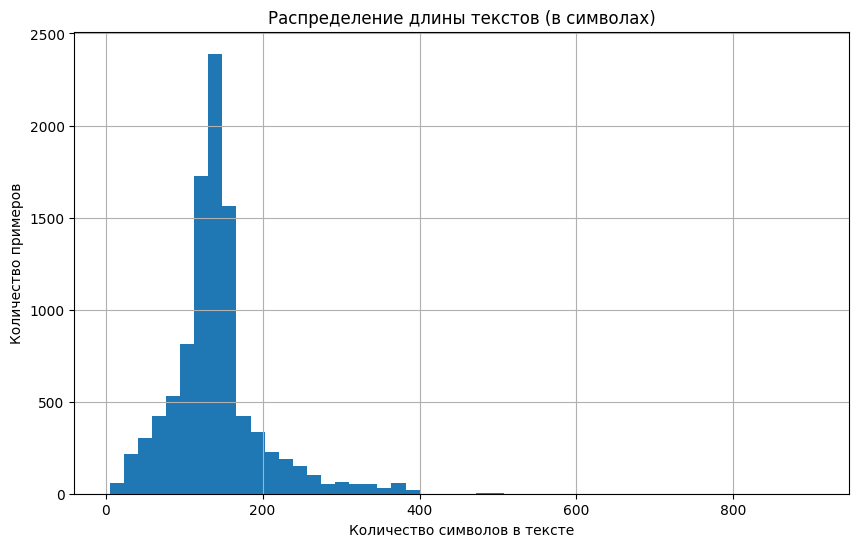

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

col = "goog_description"

tmp_df["text_length"] = tmp_df[col].astype(str).apply(len)

plt.figure(figsize=(10, 6))
plt.hist(tmp_df["text_length"], bins=50)
plt.title("Распределение длины текстов (в символах)")
plt.xlabel("Количество символов в тексте")
plt.ylabel("Количество примеров")
plt.grid(True)
plt.show()


### Подключаем Finbert

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

model_name = "yiyanghkust/finbert-tone"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

finbert = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

Device set to use cpu


### Finbert помогает провести анализ тональности. Если сентимент имеет категорию нейтральный, то score сентимента = 0.0, в противном случае, если он имеет категорию негативный или положительный, то рассчитывается скор функцией finbert'ом. Возможный диапазон значений скора [0;1].

In [ ]:
from tqdm import tqdm

def get_sentiment(stock, df):
    tmp_df = df.copy()
    tmp_df[f'{stock.lower()}_description'] = tmp_df[f'{stock.lower()}_description'].fillna('')
    sentiments = []
    scores = []
    for text in tqdm(tmp_df[f"{stock}_description"], desc="Анализ тональности"):
        print(len(text))
        result = finbert(text)
        sentiments.append(result[0]["label"].lower())
        scores.append(result[0]["score"] if result[0]["label"].lower() != "neutral" else 0.0)
    return sentiments, scores

stocks = ["GOOG"]

for stock in stocks:
    sentiments, scores = get_sentiment(stock.lower(), tmp_df)
    tmp_df[f"{stock.lower()}_sentiment"] = sentiments
    tmp_df[f"{stock.lower()}_sentiment_score"] = scores

tmp_df

Анализ тональности:   0%|          | 0/9791 [00:00<?, ?it/s]

123


Анализ тональности:   0%|          | 1/9791 [00:00<1:13:33,  2.22it/s]

171


Анализ тональности:   0%|          | 3/9791 [00:00<39:44,  4.11it/s]

122
144


Анализ тональности:   0%|          | 4/9791 [00:01<40:16,  4.05it/s]

594


Анализ тональности:   0%|          | 6/9791 [00:01<52:37,  3.10it/s]  

149
152


Анализ тональности:   0%|          | 8/9791 [00:02<40:36,  4.02it/s]

110
484


Анализ тональности:   0%|          | 9/9791 [00:02<55:42,  2.93it/s]

552


Анализ тональности:   0%|          | 11/9791 [00:03<55:42,  2.93it/s]  

59
146


Анализ тональности:   0%|          | 12/9791 [00:03<49:16,  3.31it/s]

362


Анализ тональности:   0%|          | 13/9791 [00:04<57:04,  2.86it/s]

132


Анализ тональности:   0%|          | 14/9791 [00:04<50:14,  3.24it/s]

125


Анализ тональности:   0%|          | 15/9791 [00:04<46:31,  3.50it/s]

153


Анализ тональности:   0%|          | 17/9791 [00:05<37:54,  4.30it/s]

107
145


Анализ тональности:   0%|          | 18/9791 [00:05<34:54,  4.66it/s]

383


Анализ тональности:   0%|          | 20/9791 [00:05<38:59,  4.18it/s]

140
569


Анализ тональности:   0%|          | 22/9791 [00:06<49:54,  3.26it/s]

155
159


Анализ тональности:   0%|          | 24/9791 [00:07<39:33,  4.12it/s]

137
216


Анализ тональности:   0%|          | 26/9791 [00:07<38:10,  4.26it/s]

129
139


Анализ тональности:   0%|          | 28/9791 [00:07<35:01,  4.65it/s]

44
95


Анализ тональности:   0%|          | 29/9791 [00:08<34:10,  4.76it/s]

115


Анализ тональности:   0%|          | 30/9791 [00:08<37:33,  4.33it/s]

150


Анализ тональности:   0%|          | 31/9791 [00:08<40:15,  4.04it/s]

236


Анализ тональности:   0%|          | 33/9791 [00:09<39:13,  4.15it/s]

40
146


Анализ тональности:   0%|          | 34/9791 [00:09<41:05,  3.96it/s]

140


Анализ тональности:   0%|          | 35/9791 [00:09<43:12,  3.76it/s]

296


Анализ тональности:   0%|          | 36/9791 [00:10<56:05,  2.90it/s]

151


Анализ тональности:   0%|          | 37/9791 [00:10<57:22,  2.83it/s]

208


Анализ тональности:   0%|          | 39/9791 [00:11<41:25,  3.92it/s]

58
114


Анализ тональности:   0%|          | 41/9791 [00:11<34:13,  4.75it/s]

164
87


Анализ тональности:   0%|          | 42/9791 [00:11<31:05,  5.23it/s]

283


Анализ тональности:   0%|          | 44/9791 [00:11<34:29,  4.71it/s]

116
52


Анализ тональности:   0%|          | 45/9791 [00:12<30:08,  5.39it/s]

271


Анализ тональности:   0%|          | 46/9791 [00:12<37:41,  4.31it/s]

156


Анализ тональности:   0%|          | 48/9791 [00:12<35:15,  4.61it/s]

132
296


Анализ тональности:   1%|          | 50/9791 [00:13<35:46,  4.54it/s]

138
28


Анализ тональности:   1%|          | 51/9791 [00:13<29:56,  5.42it/s]

346


Анализ тональности:   1%|          | 53/9791 [00:13<34:46,  4.67it/s]

178
392


Анализ тональности:   1%|          | 55/9791 [00:14<39:02,  4.16it/s]

150
153


Анализ тональности:   1%|          | 57/9791 [00:14<33:11,  4.89it/s]

107
127


Анализ тональности:   1%|          | 59/9791 [00:15<31:14,  5.19it/s]

155
200


Анализ тональности:   1%|          | 60/9791 [00:15<34:45,  4.67it/s]

151


Анализ тональности:   1%|          | 61/9791 [00:15<35:05,  4.62it/s]

322


Анализ тональности:   1%|          | 62/9791 [00:16<42:37,  3.80it/s]

23
111


Анализ тональности:   1%|          | 65/9791 [00:16<32:24,  5.00it/s]

115
197


Анализ тональности:   1%|          | 66/9791 [00:16<32:13,  5.03it/s]

148


Анализ тональности:   1%|          | 67/9791 [00:16<32:55,  4.92it/s]

224


Анализ тональности:   1%|          | 69/9791 [00:17<31:10,  5.20it/s]

54
147


Анализ тональности:   1%|          | 71/9791 [00:17<28:26,  5.70it/s]

60
136


Анализ тональности:   1%|          | 73/9791 [00:18<26:37,  6.08it/s]

56
31


Анализ тональности:   1%|          | 75/9791 [00:18<24:29,  6.61it/s]

151
215


Анализ тональности:   1%|          | 77/9791 [00:18<26:49,  6.04it/s]

137
80


Анализ тональности:   1%|          | 79/9791 [00:18<26:41,  6.06it/s]

160
40


Анализ тональности:   1%|          | 81/9791 [00:19<24:01,  6.74it/s]

132
131


Анализ тональности:   1%|          | 83/9791 [00:19<23:41,  6.83it/s]

95
151


Анализ тональности:   1%|          | 85/9791 [00:19<23:39,  6.84it/s]

74
74


Анализ тональности:   1%|          | 86/9791 [00:19<24:26,  6.62it/s]

143


Анализ тональности:   1%|          | 87/9791 [00:20<33:14,  4.86it/s]

149


Анализ тональности:   1%|          | 88/9791 [00:20<37:22,  4.33it/s]

148


Анализ тональности:   1%|          | 89/9791 [00:20<42:28,  3.81it/s]

99


Анализ тональности:   1%|          | 90/9791 [00:21<53:12,  3.04it/s]

130


Анализ тональности:   1%|          | 91/9791 [00:22<1:05:07,  2.48it/s]

250


Анализ тональности:   1%|          | 92/9791 [00:22<1:13:47,  2.19it/s]

123


Анализ тональности:   1%|          | 93/9791 [00:23<1:15:34,  2.14it/s]

131


Анализ тональности:   1%|          | 94/9791 [00:23<1:12:59,  2.21it/s]

121


Анализ тональности:   1%|          | 95/9791 [00:23<1:12:06,  2.24it/s]

210


Анализ тональности:   1%|          | 96/9791 [00:24<1:21:14,  1.99it/s]

287


Анализ тональности:   1%|          | 97/9791 [00:25<1:18:59,  2.05it/s]

153


Анализ тональности:   1%|          | 98/9791 [00:25<1:08:25,  2.36it/s]

293


Анализ тональности:   1%|          | 100/9791 [00:25<58:10,  2.78it/s] 

34
207


Анализ тональности:   1%|          | 101/9791 [00:26<57:36,  2.80it/s]

98


Анализ тональности:   1%|          | 102/9791 [00:26<56:09,  2.88it/s]

272


Анализ тональности:   1%|          | 103/9791 [00:27<1:05:46,  2.45it/s]

115


Анализ тональности:   1%|          | 104/9791 [00:27<58:05,  2.78it/s]  

138


Анализ тональности:   1%|          | 105/9791 [00:27<54:13,  2.98it/s]

135


Анализ тональности:   1%|          | 106/9791 [00:28<52:42,  3.06it/s]

191


Анализ тональности:   1%|          | 107/9791 [00:28<53:13,  3.03it/s]

109


Анализ тональности:   1%|          | 108/9791 [00:28<55:03,  2.93it/s]

94


Анализ тональности:   1%|          | 109/9791 [00:29<52:40,  3.06it/s]

133


Анализ тональности:   1%|          | 110/9791 [00:29<51:37,  3.13it/s]

268


Анализ тональности:   1%|          | 111/9791 [00:29<59:56,  2.69it/s]

351


Анализ тональности:   1%|          | 113/9791 [00:30<56:51,  2.84it/s]  

188
320


Анализ тональности:   1%|          | 115/9791 [00:31<48:52,  3.30it/s]

155
103


Анализ тональности:   1%|          | 117/9791 [00:31<36:58,  4.36it/s]

123
307


Анализ тональности:   1%|          | 118/9791 [00:31<41:10,  3.92it/s]

233


Анализ тональности:   1%|          | 120/9791 [00:32<34:47,  4.63it/s]

83
163


Анализ тональности:   1%|          | 122/9791 [00:32<29:16,  5.50it/s]

124
510


Анализ тональности:   1%|▏         | 123/9791 [00:33<54:02,  2.98it/s]

85


Анализ тональности:   1%|▏         | 124/9791 [00:33<49:35,  3.25it/s]

284


Анализ тональности:   1%|▏         | 125/9791 [00:33<56:50,  2.83it/s]

194


Анализ тональности:   1%|▏         | 126/9791 [00:34<57:19,  2.81it/s]

154


Анализ тональности:   1%|▏         | 127/9791 [00:34<1:02:26,  2.58it/s]

90


Анализ тональности:   1%|▏         | 128/9791 [00:35<1:05:47,  2.45it/s]

118


Анализ тональности:   1%|▏         | 129/9791 [00:35<1:05:31,  2.46it/s]

184


Анализ тональности:   1%|▏         | 130/9791 [00:35<1:09:49,  2.31it/s]

17


Анализ тональности:   1%|▏         | 131/9791 [00:36<59:11,  2.72it/s]  

133


Анализ тональности:   1%|▏         | 133/9791 [00:36<57:12,  2.81it/s]  

22
127


Анализ тональности:   1%|▏         | 134/9791 [00:37<57:09,  2.82it/s]

114


Анализ тональности:   1%|▏         | 135/9791 [00:37<57:28,  2.80it/s]

149


Анализ тональности:   1%|▏         | 137/9791 [00:38<46:06,  3.49it/s]

70
120


Анализ тональности:   1%|▏         | 138/9791 [00:38<39:31,  4.07it/s]

131


Анализ тональности:   1%|▏         | 139/9791 [00:38<38:25,  4.19it/s]

130


Анализ тональности:   1%|▏         | 140/9791 [00:39<59:59,  2.68it/s]

64


Анализ тональности:   1%|▏         | 141/9791 [00:39<1:06:50,  2.41it/s]

148


Анализ тональности:   1%|▏         | 142/9791 [00:40<1:15:55,  2.12it/s]

60


Анализ тональности:   1%|▏         | 143/9791 [00:40<1:14:34,  2.16it/s]

147


Анализ тональности:   1%|▏         | 144/9791 [00:41<1:43:08,  1.56it/s]

274


Анализ тональности:   1%|▏         | 145/9791 [00:42<2:01:49,  1.32it/s]

132


Анализ тональности:   2%|▏         | 147/9791 [00:43<1:16:04,  2.11it/s]

96
81


Анализ тональности:   2%|▏         | 149/9791 [00:43<50:05,  3.21it/s]

170
135


Анализ тональности:   2%|▏         | 151/9791 [00:43<39:46,  4.04it/s]

149
132


Анализ тональности:   2%|▏         | 153/9791 [00:44<31:32,  5.09it/s]

95
104


Анализ тональности:   2%|▏         | 155/9791 [00:44<28:38,  5.61it/s]

129
91


Анализ тональности:   2%|▏         | 157/9791 [00:44<25:19,  6.34it/s]

90
246


Анализ тональности:   2%|▏         | 159/9791 [00:45<33:06,  4.85it/s]

179
81


Анализ тональности:   2%|▏         | 161/9791 [00:45<29:15,  5.49it/s]

141
159


Анализ тональности:   2%|▏         | 163/9791 [00:46<28:54,  5.55it/s]

134
211


Анализ тональности:   2%|▏         | 165/9791 [00:46<30:16,  5.30it/s]

160
126


Анализ тональности:   2%|▏         | 166/9791 [00:46<29:33,  5.43it/s]

386


Анализ тональности:   2%|▏         | 168/9791 [00:47<35:44,  4.49it/s]

140
87


Анализ тональности:   2%|▏         | 170/9791 [00:47<28:16,  5.67it/s]

87
138


Анализ тональности:   2%|▏         | 171/9791 [00:47<28:16,  5.67it/s]

500


Анализ тональности:   2%|▏         | 173/9791 [00:48<44:52,  3.57it/s]

38
372


Анализ тональности:   2%|▏         | 174/9791 [00:49<1:07:37,  2.37it/s]

172


Анализ тональности:   2%|▏         | 176/9791 [00:49<51:36,  3.11it/s]  

44
34


Анализ тональности:   2%|▏         | 177/9791 [00:49<42:51,  3.74it/s]

144


Анализ тональности:   2%|▏         | 179/9791 [00:50<38:50,  4.12it/s]

30
168


Анализ тональности:   2%|▏         | 180/9791 [00:50<42:26,  3.77it/s]

169


Анализ тональности:   2%|▏         | 181/9791 [00:50<44:38,  3.59it/s]

197


Анализ тональности:   2%|▏         | 182/9791 [00:51<47:09,  3.40it/s]

303


Анализ тональности:   2%|▏         | 184/9791 [00:51<42:21,  3.78it/s]

167
115


Анализ тональности:   2%|▏         | 186/9791 [00:52<36:06,  4.43it/s]

135
95


Анализ тональности:   2%|▏         | 188/9791 [00:52<30:53,  5.18it/s]

143
238


Анализ тональности:   2%|▏         | 190/9791 [00:52<30:15,  5.29it/s]

155
78


Анализ тональности:   2%|▏         | 192/9791 [00:53<26:29,  6.04it/s]

130
229


Анализ тональности:   2%|▏         | 194/9791 [00:53<27:22,  5.84it/s]

80
174


Анализ тональности:   2%|▏         | 196/9791 [00:53<26:06,  6.12it/s]

87
117


Анализ тональности:   2%|▏         | 198/9791 [00:54<26:31,  6.03it/s]

130
292


Анализ тональности:   2%|▏         | 200/9791 [00:54<32:42,  4.89it/s]

119
113


Анализ тональности:   2%|▏         | 201/9791 [00:54<31:51,  5.02it/s]

200


Анализ тональности:   2%|▏         | 203/9791 [00:55<32:35,  4.90it/s]

200
127


Анализ тональности:   2%|▏         | 205/9791 [00:55<30:51,  5.18it/s]

152
126


Анализ тональности:   2%|▏         | 206/9791 [00:55<29:01,  5.50it/s]

489


Анализ тональности:   2%|▏         | 207/9791 [00:56<42:55,  3.72it/s]

505


Анализ тональности:   2%|▏         | 208/9791 [00:56<52:31,  3.04it/s]

303


Анализ тональности:   2%|▏         | 210/9791 [00:57<44:21,  3.60it/s]

128
228


Анализ тональности:   2%|▏         | 211/9791 [00:57<42:05,  3.79it/s]

297


Анализ тональности:   2%|▏         | 212/9791 [00:57<45:27,  3.51it/s]

284


Анализ тональности:   2%|▏         | 214/9791 [00:58<36:37,  4.36it/s]

98
137


Анализ тональности:   2%|▏         | 215/9791 [00:58<34:04,  4.68it/s]

250


Анализ тональности:   2%|▏         | 216/9791 [00:58<39:40,  4.02it/s]

314


Анализ тональности:   2%|▏         | 218/9791 [00:59<34:08,  4.67it/s]

42
128


Анализ тональности:   2%|▏         | 220/9791 [00:59<29:17,  5.45it/s]

114
190


Анализ тональности:   2%|▏         | 222/9791 [00:59<28:01,  5.69it/s]

117
68


Анализ тональности:   2%|▏         | 224/9791 [01:00<26:32,  6.01it/s]

153
70


Анализ тональности:   2%|▏         | 226/9791 [01:00<26:59,  5.91it/s]

154
95


Анализ тональности:   2%|▏         | 227/9791 [01:00<26:03,  6.12it/s]

299


Анализ тональности:   2%|▏         | 228/9791 [01:00<36:08,  4.41it/s]

743


Анализ тональности:   2%|▏         | 229/9791 [01:01<57:50,  2.75it/s]

162


Анализ тональности:   2%|▏         | 230/9791 [01:01<55:19,  2.88it/s]

267


Анализ тональности:   2%|▏         | 231/9791 [01:02<1:00:14,  2.64it/s]

171


Анализ тональности:   2%|▏         | 232/9791 [01:02<57:37,  2.76it/s]  

106


Анализ тональности:   2%|▏         | 233/9791 [01:02<51:29,  3.09it/s]

138


Анализ тональности:   2%|▏         | 234/9791 [01:03<48:39,  3.27it/s]

156


Анализ тональности:   2%|▏         | 235/9791 [01:03<47:54,  3.32it/s]

147


Анализ тональности:   2%|▏         | 236/9791 [01:03<46:44,  3.41it/s]

87


Анализ тональности:   2%|▏         | 237/9791 [01:03<43:00,  3.70it/s]

124


Анализ тональности:   2%|▏         | 238/9791 [01:04<40:28,  3.93it/s]

155


Анализ тональности:   2%|▏         | 240/9791 [01:04<35:19,  4.51it/s]

81
108


Анализ тональности:   2%|▏         | 241/9791 [01:04<31:44,  5.01it/s]

17
182


Анализ тональности:   2%|▏         | 244/9791 [01:05<26:37,  5.98it/s]

126
125


Анализ тональности:   3%|▎         | 246/9791 [01:05<26:38,  5.97it/s]

153
138


Анализ тональности:   3%|▎         | 248/9791 [01:05<28:03,  5.67it/s]

201
83


Анализ тональности:   3%|▎         | 250/9791 [01:06<26:06,  6.09it/s]

132
146


Анализ тональности:   3%|▎         | 252/9791 [01:06<25:23,  6.26it/s]

105
133


Анализ тональности:   3%|▎         | 254/9791 [01:06<24:31,  6.48it/s]

126
86


Анализ тональности:   3%|▎         | 256/9791 [01:07<25:07,  6.32it/s]

142
145


Анализ тональности:   3%|▎         | 258/9791 [01:07<24:28,  6.49it/s]

110
8


Анализ тональности:   3%|▎         | 260/9791 [01:07<22:08,  7.18it/s]

137
140


Анализ тональности:   3%|▎         | 262/9791 [01:07<25:10,  6.31it/s]

164
50


Анализ тональности:   3%|▎         | 264/9791 [01:08<24:01,  6.61it/s]

147
265


Анализ тональности:   3%|▎         | 265/9791 [01:08<31:10,  5.09it/s]

8
127


Анализ тональности:   3%|▎         | 268/9791 [01:08<24:11,  6.56it/s]

101
139


Анализ тональности:   3%|▎         | 270/9791 [01:09<25:06,  6.32it/s]

132
93


Анализ тональности:   3%|▎         | 273/9791 [01:09<19:13,  8.25it/s]

8
8
141


Анализ тональности:   3%|▎         | 275/9791 [01:09<22:12,  7.14it/s]

147
84


Анализ тональности:   3%|▎         | 277/9791 [01:10<23:40,  6.70it/s]

178
149


Анализ тональности:   3%|▎         | 279/9791 [01:10<25:14,  6.28it/s]

156
138


Анализ тональности:   3%|▎         | 280/9791 [01:10<26:19,  6.02it/s]

123


Анализ тональности:   3%|▎         | 281/9791 [01:10<29:36,  5.35it/s]

123


Анализ тональности:   3%|▎         | 283/9791 [01:11<29:44,  5.33it/s]

141
327


Анализ тональности:   3%|▎         | 285/9791 [01:11<34:03,  4.65it/s]

125
8


Анализ тональности:   3%|▎         | 287/9791 [01:12<24:10,  6.55it/s]

8
8
8


Анализ тональности:   3%|▎         | 289/9791 [01:12<19:58,  7.93it/s]

367


Анализ тональности:   3%|▎         | 291/9791 [01:12<26:57,  5.87it/s]

153
137


Анализ тональности:   3%|▎         | 293/9791 [01:12<24:54,  6.36it/s]

98
54


Анализ тональности:   3%|▎         | 294/9791 [01:13<22:44,  6.96it/s]

8
140


Анализ тональности:   3%|▎         | 297/9791 [01:13<23:09,  6.83it/s]

161
8


Анализ тональности:   3%|▎         | 300/9791 [01:13<18:25,  8.58it/s]

8
56
8


Анализ тональности:   3%|▎         | 302/9791 [01:13<17:28,  9.05it/s]

78
215


Анализ тональности:   3%|▎         | 304/9791 [01:14<20:05,  7.87it/s]

42
8
131


Анализ тональности:   3%|▎         | 306/9791 [01:14<22:32,  7.01it/s]

115


Анализ тональности:   3%|▎         | 308/9791 [01:15<27:06,  5.83it/s]

115
119


Анализ тональности:   3%|▎         | 309/9791 [01:15<28:48,  5.49it/s]

71


Анализ тональности:   3%|▎         | 310/9791 [01:15<30:30,  5.18it/s]

135


Анализ тональности:   3%|▎         | 311/9791 [01:15<33:41,  4.69it/s]

113


Анализ тональности:   3%|▎         | 313/9791 [01:16<31:24,  5.03it/s]

37
136


Анализ тональности:   3%|▎         | 314/9791 [01:16<33:53,  4.66it/s]

179


Анализ тональности:   3%|▎         | 315/9791 [01:16<38:54,  4.06it/s]

134


Анализ тональности:   3%|▎         | 316/9791 [01:16<38:55,  4.06it/s]

123


Анализ тональности:   3%|▎         | 318/9791 [01:17<32:55,  4.79it/s]

31
175


Анализ тональности:   3%|▎         | 320/9791 [01:17<34:03,  4.64it/s]

155
85


Анализ тональности:   3%|▎         | 322/9791 [01:18<26:45,  5.90it/s]

73
142


Анализ тональности:   3%|▎         | 323/9791 [01:18<27:05,  5.82it/s]

155


Анализ тональности:   3%|▎         | 325/9791 [01:18<25:32,  6.18it/s]

67
367


Анализ тональности:   3%|▎         | 326/9791 [01:18<35:36,  4.43it/s]

204


Анализ тональности:   3%|▎         | 327/9791 [01:19<35:28,  4.45it/s]

28
277


Анализ тональности:   3%|▎         | 330/9791 [01:19<32:16,  4.89it/s]

140
41


Анализ тональности:   3%|▎         | 332/9791 [01:19<24:31,  6.43it/s]

14
38
70


Анализ тональности:   3%|▎         | 335/9791 [01:20<22:24,  7.03it/s]

147
189


Анализ тональности:   3%|▎         | 337/9791 [01:20<24:14,  6.50it/s]

98
214


Анализ тональности:   3%|▎         | 339/9791 [01:21<27:11,  5.79it/s]

123
139


Анализ тональности:   3%|▎         | 341/9791 [01:21<25:53,  6.08it/s]

114
110


Анализ тональности:   4%|▎         | 343/9791 [01:21<23:40,  6.65it/s]

101
117


Анализ тональности:   4%|▎         | 345/9791 [01:21<24:26,  6.44it/s]

116
111


Анализ тональности:   4%|▎         | 347/9791 [01:22<22:13,  7.08it/s]

49
149


Анализ тональности:   4%|▎         | 348/9791 [01:22<23:41,  6.64it/s]

328


Анализ тональности:   4%|▎         | 350/9791 [01:22<29:03,  5.42it/s]

84
194


Анализ тональности:   4%|▎         | 352/9791 [01:23<28:17,  5.56it/s]

119
903


Анализ тональности:   4%|▎         | 354/9791 [01:24<45:18,  3.47it/s]

160
125


Анализ тональности:   4%|▎         | 356/9791 [01:24<33:13,  4.73it/s]

52
119


Анализ тональности:   4%|▎         | 358/9791 [01:24<26:32,  5.92it/s]

58
120


Анализ тональности:   4%|▎         | 360/9791 [01:24<27:05,  5.80it/s]

143
150


Анализ тональности:   4%|▎         | 362/9791 [01:25<24:51,  6.32it/s]

66
23


Анализ тональности:   4%|▎         | 364/9791 [01:25<23:36,  6.65it/s]

178
115


Анализ тональности:   4%|▎         | 366/9791 [01:25<22:40,  6.93it/s]

79
151


Анализ тональности:   4%|▎         | 367/9791 [01:25<24:11,  6.49it/s]

200


Анализ тональности:   4%|▍         | 369/9791 [01:26<26:34,  5.91it/s]

120
140


Анализ тональности:   4%|▍         | 371/9791 [01:26<24:14,  6.48it/s]

69
159


Анализ тональности:   4%|▍         | 373/9791 [01:27<25:36,  6.13it/s]

128
137


Анализ тональности:   4%|▍         | 375/9791 [01:27<27:38,  5.68it/s]

193


Анализ тональности:   4%|▍         | 376/9791 [01:27<28:04,  5.59it/s]

135
690


Анализ тональности:   4%|▍         | 378/9791 [01:28<50:42,  3.09it/s]  

58
145


Анализ тональности:   4%|▍         | 379/9791 [01:28<48:52,  3.21it/s]

204


Анализ тональности:   4%|▍         | 381/9791 [01:29<43:17,  3.62it/s]

80
132


Анализ тональности:   4%|▍         | 382/9791 [01:29<41:54,  3.74it/s]

132


Анализ тональности:   4%|▍         | 383/9791 [01:29<40:55,  3.83it/s]

130


Анализ тональности:   4%|▍         | 384/9791 [01:30<43:19,  3.62it/s]

80


Анализ тональности:   4%|▍         | 385/9791 [01:30<41:59,  3.73it/s]

77


Анализ тональности:   4%|▍         | 387/9791 [01:30<35:25,  4.43it/s]

140
123


Анализ тональности:   4%|▍         | 389/9791 [01:31<29:26,  5.32it/s]

114
28


Анализ тональности:   4%|▍         | 391/9791 [01:31<25:34,  6.13it/s]

109
139


Анализ тональности:   4%|▍         | 393/9791 [01:31<26:25,  5.93it/s]

150
113


Анализ тональности:   4%|▍         | 395/9791 [01:32<25:14,  6.20it/s]

109
96


Анализ тональности:   4%|▍         | 397/9791 [01:32<25:01,  6.26it/s]

121
141


Анализ тональности:   4%|▍         | 399/9791 [01:32<26:39,  5.87it/s]

148
187


Анализ тональности:   4%|▍         | 401/9791 [01:33<26:44,  5.85it/s]

157
166


Анализ тональности:   4%|▍         | 403/9791 [01:33<28:43,  5.45it/s]

144
23


Анализ тональности:   4%|▍         | 405/9791 [01:33<25:06,  6.23it/s]

131
127


Анализ тональности:   4%|▍         | 407/9791 [01:34<24:56,  6.27it/s]

141
178


Анализ тональности:   4%|▍         | 408/9791 [01:34<26:51,  5.82it/s]

391


Анализ тональности:   4%|▍         | 410/9791 [01:34<33:10,  4.71it/s]

135
110


Анализ тональности:   4%|▍         | 412/9791 [01:35<29:10,  5.36it/s]

160
142


Анализ тональности:   4%|▍         | 414/9791 [01:35<26:31,  5.89it/s]

123
126


Анализ тональности:   4%|▍         | 416/9791 [01:35<25:28,  6.13it/s]

117
110


Анализ тональности:   4%|▍         | 418/9791 [01:36<23:04,  6.77it/s]

99
131


Анализ тональности:   4%|▍         | 420/9791 [01:36<21:32,  7.25it/s]

88
140


Анализ тональности:   4%|▍         | 422/9791 [01:36<22:15,  7.02it/s]

55
35


Анализ тональности:   4%|▍         | 424/9791 [01:36<21:54,  7.13it/s]

174
135


Анализ тональности:   4%|▍         | 426/9791 [01:37<23:29,  6.64it/s]

133
136


Анализ тональности:   4%|▍         | 428/9791 [01:37<22:09,  7.04it/s]

85
110


Анализ тональности:   4%|▍         | 430/9791 [01:37<25:10,  6.20it/s]

242
139


Анализ тональности:   4%|▍         | 432/9791 [01:38<24:06,  6.47it/s]

82
99


Анализ тональности:   4%|▍         | 433/9791 [01:38<23:21,  6.68it/s]

32
82


Анализ тональности:   4%|▍         | 436/9791 [01:38<21:57,  7.10it/s]

136
116


Анализ тональности:   4%|▍         | 438/9791 [01:38<23:06,  6.75it/s]

147
41


Анализ тональности:   4%|▍         | 440/9791 [01:39<21:57,  7.10it/s]

132
217


Анализ тональности:   5%|▍         | 442/9791 [01:39<22:07,  7.04it/s]

82
27


Анализ тональности:   5%|▍         | 444/9791 [01:39<20:38,  7.54it/s]

92
124


Анализ тональности:   5%|▍         | 446/9791 [01:40<23:31,  6.62it/s]

184
184


Анализ тональности:   5%|▍         | 448/9791 [01:40<26:07,  5.96it/s]

131
133


Анализ тональности:   5%|▍         | 449/9791 [01:40<26:16,  5.92it/s]

109


Анализ тональности:   5%|▍         | 450/9791 [01:40<28:22,  5.49it/s]

99


Анализ тональности:   5%|▍         | 451/9791 [01:41<29:30,  5.27it/s]

123


Анализ тональности:   5%|▍         | 452/9791 [01:41<32:27,  4.79it/s]

134


Анализ тональности:   5%|▍         | 454/9791 [01:41<29:59,  5.19it/s]

16
141


Анализ тональности:   5%|▍         | 455/9791 [01:41<33:27,  4.65it/s]

192


Анализ тональности:   5%|▍         | 456/9791 [01:42<35:26,  4.39it/s]

125


Анализ тональности:   5%|▍         | 457/9791 [01:42<36:38,  4.25it/s]

279


Анализ тональности:   5%|▍         | 458/9791 [01:42<43:01,  3.62it/s]

133


Анализ тональности:   5%|▍         | 459/9791 [01:43<41:43,  3.73it/s]

129


Анализ тональности:   5%|▍         | 460/9791 [01:43<40:16,  3.86it/s]

297


Анализ тональности:   5%|▍         | 461/9791 [01:43<47:52,  3.25it/s]

118


Анализ тональности:   5%|▍         | 463/9791 [01:44<38:34,  4.03it/s]

123
132


Анализ тональности:   5%|▍         | 465/9791 [01:44<28:49,  5.39it/s]

41
118


Анализ тональности:   5%|▍         | 467/9791 [01:44<25:10,  6.17it/s]

106
201


Анализ тональности:   5%|▍         | 469/9791 [01:45<28:26,  5.46it/s]

150
26


Анализ тональности:   5%|▍         | 471/9791 [01:45<23:46,  6.53it/s]

102
122


Анализ тональности:   5%|▍         | 473/9791 [01:45<24:45,  6.27it/s]

130
127


Анализ тональности:   5%|▍         | 475/9791 [01:46<24:59,  6.21it/s]

128
25


Анализ тональности:   5%|▍         | 477/9791 [01:46<23:51,  6.51it/s]

134
336


Анализ тональности:   5%|▍         | 479/9791 [01:46<29:40,  5.23it/s]

97
22


Анализ тональности:   5%|▍         | 481/9791 [01:47<24:39,  6.29it/s]

152
116


Анализ тональности:   5%|▍         | 483/9791 [01:47<26:21,  5.89it/s]

210


Анализ тональности:   5%|▍         | 484/9791 [01:47<27:44,  5.59it/s]

162
113


Анализ тональности:   5%|▍         | 486/9791 [01:47<23:14,  6.67it/s]

47
31
67


Анализ тональности:   5%|▍         | 489/9791 [01:48<21:14,  7.30it/s]

146
107


Анализ тональности:   5%|▌         | 491/9791 [01:48<21:35,  7.18it/s]

115
79


Анализ тональности:   5%|▌         | 493/9791 [01:48<20:41,  7.49it/s]

79
115


Анализ тональности:   5%|▌         | 495/9791 [01:49<20:03,  7.72it/s]

54
55


Анализ тональности:   5%|▌         | 496/9791 [01:49<19:29,  7.95it/s]

169


Анализ тональности:   5%|▌         | 498/9791 [01:49<23:28,  6.60it/s]

131
89


Анализ тональности:   5%|▌         | 500/9791 [01:49<24:17,  6.38it/s]

160
188


Анализ тональности:   5%|▌         | 502/9791 [01:50<25:10,  6.15it/s]

141
111


Анализ тональности:   5%|▌         | 504/9791 [01:50<26:39,  5.80it/s]

141
132


Анализ тональности:   5%|▌         | 506/9791 [01:50<25:46,  6.00it/s]

124
127


Анализ тональности:   5%|▌         | 508/9791 [01:51<25:13,  6.13it/s]

144
333


Анализ тональности:   5%|▌         | 509/9791 [01:51<36:09,  4.28it/s]

189


Анализ тональности:   5%|▌         | 510/9791 [01:51<36:16,  4.26it/s]

251


Анализ тональности:   5%|▌         | 512/9791 [01:52<34:53,  4.43it/s]

173
111


Анализ тональности:   5%|▌         | 514/9791 [01:52<27:04,  5.71it/s]

41
134


Анализ тональности:   5%|▌         | 516/9791 [01:52<24:04,  6.42it/s]

81
140


Анализ тональности:   5%|▌         | 518/9791 [01:53<26:38,  5.80it/s]

267
97


Анализ тональности:   5%|▌         | 520/9791 [01:53<25:53,  5.97it/s]

165
152


Анализ тональности:   5%|▌         | 522/9791 [01:53<25:08,  6.14it/s]

75
38


Анализ тональности:   5%|▌         | 524/9791 [01:54<22:34,  6.84it/s]

87
108


Анализ тональности:   5%|▌         | 525/9791 [01:54<26:49,  5.76it/s]

99


Анализ тональности:   5%|▌         | 526/9791 [01:54<28:34,  5.40it/s]

130


Анализ тональности:   5%|▌         | 528/9791 [01:54<31:37,  4.88it/s]

100
129


Анализ тональности:   5%|▌         | 530/9791 [01:55<33:37,  4.59it/s]

133
138


Анализ тональности:   5%|▌         | 532/9791 [01:55<34:15,  4.51it/s]

77
154


Анализ тональности:   5%|▌         | 534/9791 [01:56<32:37,  4.73it/s]

22
125


Анализ тональности:   5%|▌         | 536/9791 [01:56<31:27,  4.90it/s]

19
134


Анализ тональности:   5%|▌         | 537/9791 [01:56<34:27,  4.48it/s]

133


Анализ тональности:   6%|▌         | 539/9791 [01:57<33:22,  4.62it/s]

121
53


Анализ тональности:   6%|▌         | 540/9791 [01:57<29:16,  5.27it/s]

295


Анализ тональности:   6%|▌         | 542/9791 [01:58<36:10,  4.26it/s]

150
65


Анализ тональности:   6%|▌         | 544/9791 [01:58<28:11,  5.47it/s]

59
89


Анализ тональности:   6%|▌         | 546/9791 [01:58<28:46,  5.35it/s]

141
172


Анализ тональности:   6%|▌         | 548/9791 [01:59<28:08,  5.48it/s]

111
138


Анализ тональности:   6%|▌         | 550/9791 [01:59<23:18,  6.61it/s]

33
125


Анализ тональности:   6%|▌         | 552/9791 [01:59<23:11,  6.64it/s]

87
140


Анализ тональности:   6%|▌         | 554/9791 [02:00<25:26,  6.05it/s]

134
65


Анализ тональности:   6%|▌         | 556/9791 [02:00<24:52,  6.19it/s]

154
166


Анализ тональности:   6%|▌         | 558/9791 [02:00<26:01,  5.91it/s]

139
14


Анализ тональности:   6%|▌         | 560/9791 [02:00<22:02,  6.98it/s]

97
168


Анализ тональности:   6%|▌         | 562/9791 [02:01<22:18,  6.90it/s]

60
156


Анализ тональности:   6%|▌         | 564/9791 [02:01<24:03,  6.39it/s]

131
263


Анализ тональности:   6%|▌         | 566/9791 [02:02<27:22,  5.62it/s]

136
148


Анализ тональности:   6%|▌         | 568/9791 [02:02<26:31,  5.79it/s]

159
36


Анализ тональности:   6%|▌         | 570/9791 [02:02<25:16,  6.08it/s]

137
49


Анализ тональности:   6%|▌         | 572/9791 [02:02<21:23,  7.18it/s]

43
122


Анализ тональности:   6%|▌         | 574/9791 [02:03<23:38,  6.50it/s]

118
99


Анализ тональности:   6%|▌         | 575/9791 [02:03<23:37,  6.50it/s]

15
127


Анализ тональности:   6%|▌         | 578/9791 [02:03<22:54,  6.70it/s]

141
152


Анализ тональности:   6%|▌         | 580/9791 [02:04<24:22,  6.30it/s]

138
115


Анализ тональности:   6%|▌         | 582/9791 [02:04<25:31,  6.01it/s]

146
56


Анализ тональности:   6%|▌         | 584/9791 [02:04<24:03,  6.38it/s]

137
288


Анализ тональности:   6%|▌         | 586/9791 [02:05<26:59,  5.68it/s]

69
127


Анализ тональности:   6%|▌         | 588/9791 [02:05<23:28,  6.53it/s]

79
62


Анализ тональности:   6%|▌         | 590/9791 [02:05<23:05,  6.64it/s]

145
43


Анализ тональности:   6%|▌         | 592/9791 [02:06<22:09,  6.92it/s]

145
123


Анализ тональности:   6%|▌         | 594/9791 [02:06<22:59,  6.67it/s]

117
63


Анализ тональности:   6%|▌         | 596/9791 [02:06<22:43,  6.74it/s]

122
36


Анализ тональности:   6%|▌         | 598/9791 [02:06<19:34,  7.83it/s]

62
167


Анализ тональности:   6%|▌         | 600/9791 [02:07<23:35,  6.49it/s]

122
97


Анализ тональности:   6%|▌         | 602/9791 [02:07<25:29,  6.01it/s]

49
49


Анализ тональности:   6%|▌         | 603/9791 [02:07<25:39,  5.97it/s]

123


Анализ тональности:   6%|▌         | 604/9791 [02:07<30:04,  5.09it/s]

162


Анализ тональности:   6%|▌         | 605/9791 [02:08<34:42,  4.41it/s]

177


Анализ тональности:   6%|▌         | 606/9791 [02:08<37:26,  4.09it/s]

132


Анализ тональности:   6%|▌         | 608/9791 [02:09<35:27,  4.32it/s]

77
79


Анализ тональности:   6%|▌         | 610/9791 [02:09<31:08,  4.91it/s]

55
91


Анализ тональности:   6%|▋         | 612/9791 [02:09<28:09,  5.43it/s]

28
134


Анализ тональности:   6%|▋         | 613/9791 [02:09<31:47,  4.81it/s]

127


Анализ тональности:   6%|▋         | 614/9791 [02:10<33:24,  4.58it/s]

130


Анализ тональности:   6%|▋         | 615/9791 [02:10<36:02,  4.24it/s]

276


Анализ тональности:   6%|▋         | 617/9791 [02:10<31:57,  4.79it/s]

65
139


Анализ тональности:   6%|▋         | 619/9791 [02:11<28:49,  5.30it/s]

111
95


Анализ тональности:   6%|▋         | 621/9791 [02:11<28:03,  5.45it/s]

164
194


Анализ тональности:   6%|▋         | 622/9791 [02:11<31:01,  4.93it/s]

60
183


Анализ тональности:   6%|▋         | 625/9791 [02:12<25:39,  5.96it/s]

123
162


Анализ тональности:   6%|▋         | 627/9791 [02:12<25:00,  6.11it/s]

78
155


Анализ тональности:   6%|▋         | 629/9791 [02:12<23:59,  6.37it/s]

111
127


Анализ тональности:   6%|▋         | 631/9791 [02:13<24:26,  6.24it/s]

126
116


Анализ тональности:   6%|▋         | 632/9791 [02:13<24:40,  6.19it/s]

176


Анализ тональности:   6%|▋         | 634/9791 [02:13<26:20,  5.79it/s]

140
114


Анализ тональности:   6%|▋         | 636/9791 [02:14<25:21,  6.02it/s]

106
131


Анализ тональности:   7%|▋         | 638/9791 [02:14<24:31,  6.22it/s]

140
138


Анализ тональности:   7%|▋         | 640/9791 [02:14<27:13,  5.60it/s]

155
108


Анализ тональности:   7%|▋         | 642/9791 [02:15<23:28,  6.50it/s]

45
25
115


Анализ тональности:   7%|▋         | 645/9791 [02:15<23:23,  6.52it/s]

94
41


Анализ тональности:   7%|▋         | 647/9791 [02:15<21:28,  7.10it/s]

96
77


Анализ тональности:   7%|▋         | 649/9791 [02:16<20:35,  7.40it/s]

66
58


Анализ тональности:   7%|▋         | 651/9791 [02:16<19:08,  7.96it/s]

51
157


Анализ тональности:   7%|▋         | 653/9791 [02:16<22:13,  6.85it/s]

139
135


Анализ тональности:   7%|▋         | 655/9791 [02:16<23:41,  6.43it/s]

124
129


Анализ тональности:   7%|▋         | 657/9791 [02:17<22:09,  6.87it/s]

64
137


Анализ тональности:   7%|▋         | 659/9791 [02:17<21:00,  7.24it/s]

47
136


Анализ тональности:   7%|▋         | 660/9791 [02:17<22:37,  6.73it/s]

32
71


Анализ тональности:   7%|▋         | 663/9791 [02:18<20:42,  7.35it/s]

118
46


Анализ тональности:   7%|▋         | 664/9791 [02:18<19:26,  7.82it/s]

24
79


Анализ тональности:   7%|▋         | 667/9791 [02:18<19:17,  7.88it/s]

125
99


Анализ тональности:   7%|▋         | 668/9791 [02:18<19:48,  7.67it/s]

230


Анализ тональности:   7%|▋         | 670/9791 [02:18<22:16,  6.82it/s]

76
96


Анализ тональности:   7%|▋         | 672/9791 [02:19<22:12,  6.84it/s]

135
175


Анализ тональности:   7%|▋         | 674/9791 [02:19<23:14,  6.54it/s]

139
100


Анализ тональности:   7%|▋         | 676/9791 [02:19<22:36,  6.72it/s]

74
69


Анализ тональности:   7%|▋         | 677/9791 [02:20<21:15,  7.15it/s]

27
262


Анализ тональности:   7%|▋         | 680/9791 [02:20<22:08,  6.86it/s]

54
145


Анализ тональности:   7%|▋         | 681/9791 [02:20<28:29,  5.33it/s]

130


Анализ тональности:   7%|▋         | 682/9791 [02:21<31:39,  4.79it/s]

215


Анализ тональности:   7%|▋         | 683/9791 [02:21<36:20,  4.18it/s]

133


Анализ тональности:   7%|▋         | 684/9791 [02:21<37:19,  4.07it/s]

127


Анализ тональности:   7%|▋         | 685/9791 [02:21<37:18,  4.07it/s]

192


Анализ тональности:   7%|▋         | 686/9791 [02:22<40:59,  3.70it/s]

148


Анализ тональности:   7%|▋         | 687/9791 [02:22<40:54,  3.71it/s]

311


Анализ тональности:   7%|▋         | 688/9791 [02:22<49:39,  3.05it/s]

137


Анализ тональности:   7%|▋         | 689/9791 [02:23<47:53,  3.17it/s]

152


Анализ тональности:   7%|▋         | 690/9791 [02:23<45:46,  3.31it/s]

120


Анализ тональности:   7%|▋         | 692/9791 [02:23<35:39,  4.25it/s]

59
58


Анализ тональности:   7%|▋         | 694/9791 [02:24<28:54,  5.24it/s]

123
131


Анализ тональности:   7%|▋         | 696/9791 [02:24<28:08,  5.39it/s]

150
109


Анализ тональности:   7%|▋         | 698/9791 [02:24<24:22,  6.22it/s]

90
54


Анализ тональности:   7%|▋         | 700/9791 [02:24<20:23,  7.43it/s]

41
118


Анализ тональности:   7%|▋         | 702/9791 [02:25<22:37,  6.70it/s]

122
117


Анализ тональности:   7%|▋         | 704/9791 [02:25<22:38,  6.69it/s]

129
124


Анализ тональности:   7%|▋         | 706/9791 [02:25<23:23,  6.48it/s]

152
113


Анализ тональности:   7%|▋         | 708/9791 [02:26<20:57,  7.22it/s]

60
84


Анализ тональности:   7%|▋         | 710/9791 [02:26<22:24,  6.75it/s]

137
81


Анализ тональности:   7%|▋         | 712/9791 [02:26<21:50,  6.93it/s]

112
57


Анализ тональности:   7%|▋         | 714/9791 [02:27<22:11,  6.82it/s]

143
187


Анализ тональности:   7%|▋         | 715/9791 [02:27<24:28,  6.18it/s]

217


Анализ тональности:   7%|▋         | 717/9791 [02:27<27:29,  5.50it/s]

153
163


Анализ тональности:   7%|▋         | 718/9791 [02:27<27:23,  5.52it/s]

78


Анализ тональности:   7%|▋         | 719/9791 [02:28<40:42,  3.71it/s]

38


Анализ тональности:   7%|▋         | 720/9791 [02:28<56:16,  2.69it/s]

165


Анализ тональности:   7%|▋         | 721/9791 [02:29<1:13:31,  2.06it/s]

26


Анализ тональности:   7%|▋         | 722/9791 [02:30<1:12:02,  2.10it/s]

118


Анализ тональности:   7%|▋         | 723/9791 [02:30<1:23:42,  1.81it/s]

110


Анализ тональности:   7%|▋         | 724/9791 [02:31<1:26:02,  1.76it/s]

136


Анализ тональности:   7%|▋         | 726/9791 [02:32<1:11:23,  2.12it/s]

143
362


Анализ тональности:   7%|▋         | 727/9791 [02:32<1:08:39,  2.20it/s]

195


Анализ тональности:   7%|▋         | 728/9791 [02:32<58:26,  2.58it/s]  

37
135


Анализ тональности:   7%|▋         | 731/9791 [02:33<36:20,  4.16it/s]

107
77


Анализ тональности:   7%|▋         | 733/9791 [02:33<28:36,  5.28it/s]

50
234


Анализ тональности:   7%|▋         | 734/9791 [02:34<39:06,  3.86it/s]

132


Анализ тональности:   8%|▊         | 735/9791 [02:34<38:21,  3.93it/s]

196


Анализ тональности:   8%|▊         | 737/9791 [02:34<37:23,  4.04it/s]

60
121


Анализ тональности:   8%|▊         | 738/9791 [02:35<37:48,  3.99it/s]

131


Анализ тональности:   8%|▊         | 739/9791 [02:35<37:43,  4.00it/s]

127


Анализ тональности:   8%|▊         | 740/9791 [02:35<37:45,  4.00it/s]

112


Анализ тональности:   8%|▊         | 741/9791 [02:35<36:16,  4.16it/s]

100


Анализ тональности:   8%|▊         | 742/9791 [02:36<36:57,  4.08it/s]

138


Анализ тональности:   8%|▊         | 743/9791 [02:36<37:38,  4.01it/s]

133


Анализ тональности:   8%|▊         | 745/9791 [02:36<32:55,  4.58it/s]

26
36


Анализ тональности:   8%|▊         | 747/9791 [02:37<28:11,  5.35it/s]

109
144


Анализ тональности:   8%|▊         | 748/9791 [02:37<26:43,  5.64it/s]

55
134


Анализ тональности:   8%|▊         | 751/9791 [02:37<21:14,  7.09it/s]

44
26
134


Анализ тональности:   8%|▊         | 754/9791 [02:37<20:56,  7.19it/s]

114
15


Анализ тональности:   8%|▊         | 756/9791 [02:38<20:35,  7.31it/s]

116
51


Анализ тональности:   8%|▊         | 758/9791 [02:38<19:41,  7.65it/s]

68
202


Анализ тональности:   8%|▊         | 761/9791 [02:38<18:52,  7.98it/s]

41
41
170


Анализ тональности:   8%|▊         | 763/9791 [02:39<22:59,  6.54it/s]

151
218


Анализ тональности:   8%|▊         | 765/9791 [02:39<24:38,  6.11it/s]

117
121


Анализ тональности:   8%|▊         | 767/9791 [02:39<23:23,  6.43it/s]

106
125


Анализ тональности:   8%|▊         | 769/9791 [02:40<25:19,  5.94it/s]

183
120


Анализ тональности:   8%|▊         | 771/9791 [02:40<24:44,  6.08it/s]

142
106


Анализ тональности:   8%|▊         | 772/9791 [02:40<23:38,  6.36it/s]

39
145


Анализ тональности:   8%|▊         | 775/9791 [02:41<20:20,  7.39it/s]

38
89


Анализ тональности:   8%|▊         | 776/9791 [02:41<20:38,  7.28it/s]

139


Анализ тональности:   8%|▊         | 778/9791 [02:41<24:47,  6.06it/s]

150
186


Анализ тональности:   8%|▊         | 780/9791 [02:42<25:57,  5.78it/s]

140
135


Анализ тональности:   8%|▊         | 782/9791 [02:42<23:55,  6.28it/s]

64
161


Анализ тональности:   8%|▊         | 784/9791 [02:42<24:42,  6.08it/s]

139
140


Анализ тональности:   8%|▊         | 786/9791 [02:43<24:42,  6.07it/s]

136
115


Анализ тональности:   8%|▊         | 788/9791 [02:43<26:01,  5.77it/s]

178
112


Анализ тональности:   8%|▊         | 790/9791 [02:43<23:47,  6.31it/s]

113
141


Анализ тональности:   8%|▊         | 792/9791 [02:43<22:13,  6.75it/s]

43
155


Анализ тональности:   8%|▊         | 794/9791 [02:44<25:21,  5.92it/s]

155
78


Анализ тональности:   8%|▊         | 796/9791 [02:44<23:34,  6.36it/s]

137
155


Анализ тональности:   8%|▊         | 798/9791 [02:44<23:52,  6.28it/s]

95
209


Анализ тональности:   8%|▊         | 800/9791 [02:45<26:24,  5.67it/s]

78
88


Анализ тональности:   8%|▊         | 802/9791 [02:45<22:59,  6.52it/s]

54
93


Анализ тональности:   8%|▊         | 804/9791 [02:45<21:57,  6.82it/s]

127
87


Анализ тональности:   8%|▊         | 806/9791 [02:46<23:47,  6.29it/s]

145
92


Анализ тональности:   8%|▊         | 808/9791 [02:46<24:07,  6.21it/s]

120
126


Анализ тональности:   8%|▊         | 810/9791 [02:46<23:43,  6.31it/s]

152
191


Анализ тональности:   8%|▊         | 811/9791 [02:47<29:41,  5.04it/s]

131


Анализ тональности:   8%|▊         | 813/9791 [02:47<28:51,  5.19it/s]

55
116


Анализ тональности:   8%|▊         | 814/9791 [02:47<30:50,  4.85it/s]

138


Анализ тональности:   8%|▊         | 815/9791 [02:48<32:42,  4.57it/s]

154


Анализ тональности:   8%|▊         | 816/9791 [02:48<35:05,  4.26it/s]

114


Анализ тональности:   8%|▊         | 818/9791 [02:48<31:23,  4.76it/s]

41
120


Анализ тональности:   8%|▊         | 819/9791 [02:48<32:53,  4.55it/s]

159


Анализ тональности:   8%|▊         | 820/9791 [02:49<36:45,  4.07it/s]

151


Анализ тональности:   8%|▊         | 821/9791 [02:49<39:36,  3.77it/s]

186


Анализ тональности:   8%|▊         | 823/9791 [02:49<35:31,  4.21it/s]

24
9


Анализ тональности:   8%|▊         | 825/9791 [02:50<28:06,  5.32it/s]

114
119


Анализ тональности:   8%|▊         | 827/9791 [02:50<24:59,  5.98it/s]

56
34


Анализ тональности:   8%|▊         | 829/9791 [02:50<22:17,  6.70it/s]

96
88


Анализ тональности:   8%|▊         | 831/9791 [02:51<19:50,  7.52it/s]

37
125


Анализ тональности:   9%|▊         | 833/9791 [02:51<20:50,  7.16it/s]

84
118


Анализ тональности:   9%|▊         | 835/9791 [02:51<21:56,  6.80it/s]

108
113


Анализ тональности:   9%|▊         | 836/9791 [02:51<22:11,  6.72it/s]

232


Анализ тональности:   9%|▊         | 837/9791 [02:52<24:37,  6.06it/s]

232


Анализ тональности:   9%|▊         | 838/9791 [02:52<26:33,  5.62it/s]

21
125


Анализ тональности:   9%|▊         | 840/9791 [02:52<22:46,  6.55it/s]

220


Анализ тональности:   9%|▊         | 842/9791 [02:52<23:38,  6.31it/s]

59
96


Анализ тональности:   9%|▊         | 844/9791 [02:53<21:29,  6.94it/s]

41
31


Анализ тональности:   9%|▊         | 846/9791 [02:53<18:42,  7.97it/s]

48
52


Анализ тональности:   9%|▊         | 848/9791 [02:53<19:38,  7.59it/s]

114
42


Анализ тональности:   9%|▊         | 850/9791 [02:53<20:21,  7.32it/s]

117
159


Анализ тональности:   9%|▊         | 851/9791 [02:54<23:05,  6.45it/s]

26
179


Анализ тональности:   9%|▊         | 854/9791 [02:54<22:45,  6.55it/s]

136
136


Анализ тональности:   9%|▊         | 856/9791 [02:54<24:24,  6.10it/s]

145
151


Анализ тональности:   9%|▉         | 857/9791 [02:55<24:03,  6.19it/s]

191


Анализ тональности:   9%|▉         | 859/9791 [02:55<25:03,  5.94it/s]

135
140


Анализ тональности:   9%|▉         | 861/9791 [02:55<22:24,  6.64it/s]

47
161


Анализ тональности:   9%|▉         | 863/9791 [02:55<22:31,  6.60it/s]

34
137


Анализ тональности:   9%|▉         | 865/9791 [02:56<25:17,  5.88it/s]

151
97


Анализ тональности:   9%|▉         | 867/9791 [02:56<22:33,  6.59it/s]

51
118


Анализ тональности:   9%|▉         | 869/9791 [02:56<25:08,  5.92it/s]

140
108


Анализ тональности:   9%|▉         | 871/9791 [02:57<26:31,  5.60it/s]

150
125


Анализ тональности:   9%|▉         | 873/9791 [02:57<26:39,  5.58it/s]

126
92


Анализ тональности:   9%|▉         | 875/9791 [02:58<26:27,  5.62it/s]

151
154


Анализ тональности:   9%|▉         | 877/9791 [02:58<25:38,  5.79it/s]

111
119


Анализ тональности:   9%|▉         | 879/9791 [02:58<24:20,  6.10it/s]

98
340


Анализ тональности:   9%|▉         | 881/9791 [02:59<29:17,  5.07it/s]

88
137


Анализ тональности:   9%|▉         | 883/9791 [02:59<26:08,  5.68it/s]

113
39


Анализ тональности:   9%|▉         | 885/9791 [02:59<23:05,  6.43it/s]

150
177


Анализ тональности:   9%|▉         | 886/9791 [03:00<25:15,  5.88it/s]

223


Анализ тональности:   9%|▉         | 888/9791 [03:00<31:35,  4.70it/s]

39
129


Анализ тональности:   9%|▉         | 890/9791 [03:00<29:51,  4.97it/s]

56
33


Анализ тональности:   9%|▉         | 891/9791 [03:01<27:29,  5.40it/s]

119


Анализ тональности:   9%|▉         | 892/9791 [03:01<31:01,  4.78it/s]

113


Анализ тональности:   9%|▉         | 893/9791 [03:01<32:12,  4.61it/s]

138


Анализ тональности:   9%|▉         | 894/9791 [03:01<33:07,  4.48it/s]

144


Анализ тональности:   9%|▉         | 895/9791 [03:02<35:16,  4.20it/s]

82


Анализ тональности:   9%|▉         | 896/9791 [03:02<34:28,  4.30it/s]

99


Анализ тональности:   9%|▉         | 897/9791 [03:02<35:11,  4.21it/s]

132


Анализ тональности:   9%|▉         | 898/9791 [03:02<36:59,  4.01it/s]

116


Анализ тональности:   9%|▉         | 899/9791 [03:03<36:30,  4.06it/s]

115


Анализ тональности:   9%|▉         | 901/9791 [03:03<32:35,  4.55it/s]

112
125


Анализ тональности:   9%|▉         | 903/9791 [03:03<28:47,  5.14it/s]

150
151


Анализ тональности:   9%|▉         | 904/9791 [03:04<27:56,  5.30it/s]

169


Анализ тональности:   9%|▉         | 905/9791 [03:04<29:25,  5.03it/s]

26
134


Анализ тональности:   9%|▉         | 908/9791 [03:04<24:23,  6.07it/s]

68
118


Анализ тональности:   9%|▉         | 910/9791 [03:04<23:02,  6.43it/s]

68
109


Анализ тональности:   9%|▉         | 912/9791 [03:05<24:02,  6.15it/s]

151
128


Анализ тональности:   9%|▉         | 914/9791 [03:05<23:51,  6.20it/s]

78
131


Анализ тональности:   9%|▉         | 916/9791 [03:05<24:26,  6.05it/s]

146
147


Анализ тональности:   9%|▉         | 917/9791 [03:06<24:51,  5.95it/s]

22
121


Анализ тональности:   9%|▉         | 920/9791 [03:06<22:49,  6.48it/s]

136
37


Анализ тональности:   9%|▉         | 922/9791 [03:06<20:51,  7.08it/s]

122
86


Анализ тональности:   9%|▉         | 924/9791 [03:07<21:21,  6.92it/s]

138
41


Анализ тональности:   9%|▉         | 926/9791 [03:07<20:40,  7.14it/s]

92
192


Анализ тональности:   9%|▉         | 927/9791 [03:07<24:37,  6.00it/s]

180


Анализ тональности:   9%|▉         | 929/9791 [03:07<23:36,  6.26it/s]

50
121


Анализ тональности:  10%|▉         | 931/9791 [03:08<23:12,  6.36it/s]

116
51


Анализ тональности:  10%|▉         | 933/9791 [03:08<22:00,  6.71it/s]

127
154


Анализ тональности:  10%|▉         | 935/9791 [03:08<25:27,  5.80it/s]

145
31


Анализ тональности:  10%|▉         | 937/9791 [03:09<23:13,  6.35it/s]

124
125


Анализ тональности:  10%|▉         | 938/9791 [03:09<24:08,  6.11it/s]

140


Анализ тональности:  10%|▉         | 940/9791 [03:09<27:13,  5.42it/s]

162
149


Анализ тональности:  10%|▉         | 943/9791 [03:10<20:21,  7.24it/s]

36
53
123


Анализ тональности:  10%|▉         | 945/9791 [03:10<21:53,  6.73it/s]

116
89


Анализ тональности:  10%|▉         | 947/9791 [03:10<22:01,  6.69it/s]

115
241


Анализ тональности:  10%|▉         | 949/9791 [03:11<25:01,  5.89it/s]

150
33


Анализ тональности:  10%|▉         | 951/9791 [03:11<23:11,  6.35it/s]

126
140


Анализ тональности:  10%|▉         | 953/9791 [03:11<26:08,  5.63it/s]

129
254


Анализ тональности:  10%|▉         | 954/9791 [03:12<27:48,  5.30it/s]

26
92


Анализ тональности:  10%|▉         | 957/9791 [03:12<22:59,  6.41it/s]

151
114


Анализ тональности:  10%|▉         | 959/9791 [03:12<23:36,  6.23it/s]

159
323


Анализ тональности:  10%|▉         | 961/9791 [03:13<28:29,  5.17it/s]

74
52


Анализ тональности:  10%|▉         | 963/9791 [03:13<24:26,  6.02it/s]

16
332


Анализ тональности:  10%|▉         | 964/9791 [03:14<40:00,  3.68it/s]

145


Анализ тональности:  10%|▉         | 965/9791 [03:14<40:47,  3.61it/s]

129


Анализ тональности:  10%|▉         | 966/9791 [03:14<40:25,  3.64it/s]

137


Анализ тональности:  10%|▉         | 967/9791 [03:14<38:21,  3.83it/s]

141


Анализ тональности:  10%|▉         | 969/9791 [03:15<33:49,  4.35it/s]

41
111


Анализ тональности:  10%|▉         | 970/9791 [03:15<35:01,  4.20it/s]

105


Анализ тональности:  10%|▉         | 971/9791 [03:15<35:00,  4.20it/s]

127


Анализ тональности:  10%|▉         | 972/9791 [03:16<34:35,  4.25it/s]

133


Анализ тональности:  10%|▉         | 973/9791 [03:16<37:19,  3.94it/s]

199


Анализ тональности:  10%|▉         | 975/9791 [03:16<35:31,  4.14it/s]

199
199


Анализ тональности:  10%|▉         | 977/9791 [03:17<30:54,  4.75it/s]

117
114


Анализ тональности:  10%|▉         | 979/9791 [03:17<28:23,  5.17it/s]

171
113


Анализ тональности:  10%|█         | 981/9791 [03:17<26:32,  5.53it/s]

142
347


Анализ тональности:  10%|█         | 983/9791 [03:18<30:25,  4.83it/s]

111
137


Анализ тональности:  10%|█         | 985/9791 [03:18<27:14,  5.39it/s]

131
110


Анализ тональности:  10%|█         | 987/9791 [03:18<24:20,  6.03it/s]

102
42


Анализ тональности:  10%|█         | 988/9791 [03:19<21:33,  6.81it/s]

299


Анализ тональности:  10%|█         | 990/9791 [03:19<28:33,  5.14it/s]

122
115


Анализ тональности:  10%|█         | 992/9791 [03:19<25:19,  5.79it/s]

107
122


Анализ тональности:  10%|█         | 994/9791 [03:20<24:04,  6.09it/s]

111
200


Анализ тональности:  10%|█         | 996/9791 [03:20<26:51,  5.46it/s]

146
99


Анализ тональности:  10%|█         | 997/9791 [03:20<25:43,  5.70it/s]

158


Анализ тональности:  10%|█         | 999/9791 [03:21<26:11,  5.60it/s]

120
64


Анализ тональности:  10%|█         | 1001/9791 [03:21<24:44,  5.92it/s]

142
99


Анализ тональности:  10%|█         | 1002/9791 [03:21<23:18,  6.29it/s]

240


Анализ тональности:  10%|█         | 1003/9791 [03:21<26:33,  5.52it/s]

243


Анализ тональности:  10%|█         | 1005/9791 [03:22<29:07,  5.03it/s]

168
148


Анализ тональности:  10%|█         | 1007/9791 [03:22<27:21,  5.35it/s]

148
127


Анализ тональности:  10%|█         | 1009/9791 [03:22<23:57,  6.11it/s]

72
132


Анализ тональности:  10%|█         | 1011/9791 [03:23<23:39,  6.18it/s]

137
116


Анализ тональности:  10%|█         | 1013/9791 [03:23<23:50,  6.14it/s]

142
345


Анализ тональности:  10%|█         | 1015/9791 [03:24<30:33,  4.79it/s]

120
138


Анализ тональности:  10%|█         | 1017/9791 [03:24<28:17,  5.17it/s]

136
139


Анализ тональности:  10%|█         | 1020/9791 [03:24<21:05,  6.93it/s]

28
83
126


Анализ тональности:  10%|█         | 1022/9791 [03:25<22:37,  6.46it/s]

152
126


Анализ тональности:  10%|█         | 1024/9791 [03:25<24:14,  6.03it/s]

151
150


Анализ тональности:  10%|█         | 1026/9791 [03:25<24:53,  5.87it/s]

150
114


Анализ тональности:  10%|█         | 1028/9791 [03:26<21:24,  6.82it/s]

44
160


Анализ тональности:  11%|█         | 1029/9791 [03:26<23:12,  6.29it/s]

14
106


Анализ тональности:  11%|█         | 1031/9791 [03:26<20:57,  6.97it/s]

132


Анализ тональности:  11%|█         | 1032/9791 [03:26<25:00,  5.84it/s]

129


Анализ тональности:  11%|█         | 1033/9791 [03:27<27:42,  5.27it/s]

139


Анализ тональности:  11%|█         | 1035/9791 [03:27<26:42,  5.46it/s]

33
149


Анализ тональности:  11%|█         | 1037/9791 [03:27<29:52,  4.88it/s]

76
124


Анализ тональности:  11%|█         | 1038/9791 [03:28<32:41,  4.46it/s]

94


Анализ тональности:  11%|█         | 1039/9791 [03:28<32:31,  4.48it/s]

142


Анализ тональности:  11%|█         | 1040/9791 [03:28<33:18,  4.38it/s]

154


Анализ тональности:  11%|█         | 1041/9791 [03:28<36:13,  4.03it/s]

181


Анализ тональности:  11%|█         | 1042/9791 [03:29<38:24,  3.80it/s]

129


Анализ тональности:  11%|█         | 1043/9791 [03:29<38:24,  3.80it/s]

122


Анализ тональности:  11%|█         | 1044/9791 [03:29<38:39,  3.77it/s]

135


Анализ тональности:  11%|█         | 1046/9791 [03:30<32:23,  4.50it/s]

131
149


Анализ тональности:  11%|█         | 1047/9791 [03:30<30:52,  4.72it/s]

139


Анализ тональности:  11%|█         | 1049/9791 [03:30<27:17,  5.34it/s]

75
83


Анализ тональности:  11%|█         | 1051/9791 [03:30<25:20,  5.75it/s]

152
113


Анализ тональности:  11%|█         | 1054/9791 [03:31<19:06,  7.62it/s]

23
27
33


Анализ тональности:  11%|█         | 1056/9791 [03:31<20:26,  7.12it/s]

147
69


Анализ тональности:  11%|█         | 1058/9791 [03:31<20:39,  7.04it/s]

123
93


Анализ тональности:  11%|█         | 1061/9791 [03:32<17:58,  8.09it/s]

27
49
129


Анализ тональности:  11%|█         | 1063/9791 [03:32<19:52,  7.32it/s]

80
168


Анализ тональности:  11%|█         | 1065/9791 [03:32<20:12,  7.20it/s]

51
113


Анализ тональности:  11%|█         | 1067/9791 [03:33<21:55,  6.63it/s]

138
139


Анализ тональности:  11%|█         | 1069/9791 [03:33<22:31,  6.45it/s]

100
152


Анализ тональности:  11%|█         | 1071/9791 [03:33<21:58,  6.61it/s]

77
75


Анализ тональности:  11%|█         | 1073/9791 [03:34<19:27,  7.47it/s]

21
136


Анализ тональности:  11%|█         | 1076/9791 [03:34<17:35,  8.26it/s]

35
59
157


Анализ тональности:  11%|█         | 1078/9791 [03:34<20:01,  7.25it/s]

108
126


Анализ тональности:  11%|█         | 1080/9791 [03:34<20:25,  7.11it/s]

112
146


Анализ тональности:  11%|█         | 1082/9791 [03:35<22:07,  6.56it/s]

118
113


Анализ тональности:  11%|█         | 1084/9791 [03:35<21:23,  6.78it/s]

75
47


Анализ тональности:  11%|█         | 1086/9791 [03:35<21:12,  6.84it/s]

151
151


Анализ тональности:  11%|█         | 1088/9791 [03:36<25:02,  5.79it/s]

153
190


Анализ тональности:  11%|█         | 1090/9791 [03:36<24:00,  6.04it/s]

58
29
232


Анализ тональности:  11%|█         | 1093/9791 [03:37<23:27,  6.18it/s]

174
124


Анализ тональности:  11%|█         | 1095/9791 [03:37<23:53,  6.06it/s]

131
137


Анализ тональности:  11%|█         | 1097/9791 [03:37<24:33,  5.90it/s]

140
121


Анализ тональности:  11%|█         | 1099/9791 [03:38<22:27,  6.45it/s]

85
130


Анализ тональности:  11%|█         | 1100/9791 [03:38<23:47,  6.09it/s]

267


Анализ тональности:  11%|█▏        | 1102/9791 [03:38<27:31,  5.26it/s]

136
119


Анализ тональности:  11%|█▏        | 1104/9791 [03:39<24:39,  5.87it/s]

122
116


Анализ тональности:  11%|█▏        | 1106/9791 [03:39<23:53,  6.06it/s]

102
125


Анализ тональности:  11%|█▏        | 1108/9791 [03:39<23:24,  6.18it/s]

105
137


Анализ тональности:  11%|█▏        | 1110/9791 [03:39<23:26,  6.17it/s]

40
39


Анализ тональности:  11%|█▏        | 1111/9791 [03:40<22:51,  6.33it/s]

123


Анализ тональности:  11%|█▏        | 1113/9791 [03:40<25:53,  5.59it/s]

74
220


Анализ тональности:  11%|█▏        | 1115/9791 [03:40<25:35,  5.65it/s]

21
185


Анализ тональности:  11%|█▏        | 1116/9791 [03:41<29:27,  4.91it/s]

134


Анализ тональности:  11%|█▏        | 1118/9791 [03:41<30:55,  4.68it/s]

66
32


Анализ тональности:  11%|█▏        | 1119/9791 [03:41<27:16,  5.30it/s]

106


Анализ тональности:  11%|█▏        | 1120/9791 [03:42<30:07,  4.80it/s]

157


Анализ тональности:  11%|█▏        | 1122/9791 [03:42<30:56,  4.67it/s]

42
134


Анализ тональности:  11%|█▏        | 1123/9791 [03:42<34:09,  4.23it/s]

87


Анализ тональности:  11%|█▏        | 1124/9791 [03:42<32:51,  4.40it/s]

89


Анализ тональности:  11%|█▏        | 1125/9791 [03:43<33:02,  4.37it/s]

141


Анализ тональности:  12%|█▏        | 1127/9791 [03:43<29:03,  4.97it/s]

66
155


Анализ тональности:  12%|█▏        | 1129/9791 [03:43<25:36,  5.64it/s]

91
150


Анализ тональности:  12%|█▏        | 1131/9791 [03:44<25:30,  5.66it/s]

140
67


Анализ тональности:  12%|█▏        | 1133/9791 [03:44<22:49,  6.32it/s]

132
91


Анализ тональности:  12%|█▏        | 1134/9791 [03:44<22:48,  6.33it/s]

40
107


Анализ тональности:  12%|█▏        | 1137/9791 [03:45<20:07,  7.17it/s]

94
131


Анализ тональности:  12%|█▏        | 1139/9791 [03:45<23:03,  6.26it/s]

140
159


Анализ тональности:  12%|█▏        | 1141/9791 [03:45<24:00,  6.00it/s]

134
127


Анализ тональности:  12%|█▏        | 1143/9791 [03:46<22:49,  6.31it/s]

119
135


Анализ тональности:  12%|█▏        | 1145/9791 [03:46<21:07,  6.82it/s]

69
133


Анализ тональности:  12%|█▏        | 1147/9791 [03:46<21:02,  6.85it/s]

86
92


Анализ тональности:  12%|█▏        | 1149/9791 [03:46<20:21,  7.07it/s]

76
136


Анализ тональности:  12%|█▏        | 1151/9791 [03:47<19:59,  7.20it/s]

60
20


Анализ тональности:  12%|█▏        | 1153/9791 [03:47<18:35,  7.74it/s]

135
205


Анализ тональности:  12%|█▏        | 1155/9791 [03:47<22:27,  6.41it/s]

125
143


Анализ тональности:  12%|█▏        | 1157/9791 [03:48<23:05,  6.23it/s]

167
150


Анализ тональности:  12%|█▏        | 1158/9791 [03:48<23:06,  6.23it/s]

238


Анализ тональности:  12%|█▏        | 1160/9791 [03:48<25:15,  5.69it/s]

130
56


Анализ тональности:  12%|█▏        | 1162/9791 [03:49<25:20,  5.67it/s]

200
132


Анализ тональности:  12%|█▏        | 1164/9791 [03:49<24:11,  5.94it/s]

133
35


Анализ тональности:  12%|█▏        | 1166/9791 [03:49<20:41,  6.95it/s]

112
41


Анализ тональности:  12%|█▏        | 1167/9791 [03:49<19:46,  7.27it/s]

21
361


Анализ тональности:  12%|█▏        | 1170/9791 [03:50<23:36,  6.09it/s]

144
54


Анализ тональности:  12%|█▏        | 1172/9791 [03:50<20:59,  6.84it/s]

53
96


Анализ тональности:  12%|█▏        | 1174/9791 [03:50<20:46,  6.91it/s]

121
124


Анализ тональности:  12%|█▏        | 1176/9791 [03:51<21:11,  6.78it/s]

103
95


Анализ тональности:  12%|█▏        | 1178/9791 [03:51<20:42,  6.93it/s]

119
138


Анализ тональности:  12%|█▏        | 1180/9791 [03:51<22:02,  6.51it/s]

152
140


Анализ тональности:  12%|█▏        | 1182/9791 [03:52<23:24,  6.13it/s]

140
17


Анализ тональности:  12%|█▏        | 1184/9791 [03:52<20:24,  7.03it/s]

112
125


Анализ тональности:  12%|█▏        | 1186/9791 [03:52<21:26,  6.69it/s]

119
25


Анализ тональности:  12%|█▏        | 1188/9791 [03:52<20:56,  6.84it/s]

130
133


Анализ тональности:  12%|█▏        | 1190/9791 [03:53<22:24,  6.40it/s]

134
116


Анализ тональности:  12%|█▏        | 1191/9791 [03:53<25:13,  5.68it/s]

160


Анализ тональности:  12%|█▏        | 1192/9791 [03:53<29:33,  4.85it/s]

244


Анализ тональности:  12%|█▏        | 1193/9791 [03:54<34:45,  4.12it/s]

124


Анализ тональности:  12%|█▏        | 1195/9791 [03:54<33:30,  4.27it/s]

75
41


Анализ тональности:  12%|█▏        | 1196/9791 [03:54<30:20,  4.72it/s]

210


Анализ тональности:  12%|█▏        | 1197/9791 [03:55<34:51,  4.11it/s]

137


Анализ тональности:  12%|█▏        | 1198/9791 [03:55<35:00,  4.09it/s]

152


Анализ тональности:  12%|█▏        | 1199/9791 [03:55<36:11,  3.96it/s]

111


Анализ тональности:  12%|█▏        | 1201/9791 [03:55<30:18,  4.72it/s]

34
97


Анализ тональности:  12%|█▏        | 1202/9791 [03:56<31:39,  4.52it/s]

160


Анализ тональности:  12%|█▏        | 1203/9791 [03:56<34:36,  4.14it/s]

96


Анализ тональности:  12%|█▏        | 1205/9791 [03:56<31:17,  4.57it/s]

139
123


Анализ тональности:  12%|█▏        | 1206/9791 [03:57<29:16,  4.89it/s]

354


Анализ тональности:  12%|█▏        | 1207/9791 [03:57<37:11,  3.85it/s]

287


Анализ тональности:  12%|█▏        | 1209/9791 [03:57<32:16,  4.43it/s]

59
75


Анализ тональности:  12%|█▏        | 1211/9791 [03:58<26:20,  5.43it/s]

117
267


Анализ тональности:  12%|█▏        | 1213/9791 [03:58<25:11,  5.68it/s]

38
198


Анализ тональности:  12%|█▏        | 1215/9791 [03:58<24:47,  5.77it/s]

100
116


Анализ тональности:  12%|█▏        | 1216/9791 [03:58<24:20,  5.87it/s]

158


Анализ тональности:  12%|█▏        | 1218/9791 [03:59<24:42,  5.78it/s]

107
159


Анализ тональности:  12%|█▏        | 1220/9791 [03:59<25:16,  5.65it/s]

129
117


Анализ тональности:  12%|█▏        | 1222/9791 [04:00<25:17,  5.65it/s]

149
129


Анализ тональности:  13%|█▎        | 1224/9791 [04:00<24:29,  5.83it/s]

101
145


Анализ тональности:  13%|█▎        | 1225/9791 [04:00<25:25,  5.62it/s]

168


Анализ тональности:  13%|█▎        | 1227/9791 [04:00<26:05,  5.47it/s]

114
76


Анализ тональности:  13%|█▎        | 1228/9791 [04:01<24:27,  5.83it/s]

360


Анализ тональности:  13%|█▎        | 1230/9791 [04:01<28:27,  5.01it/s]

107
140


Анализ тональности:  13%|█▎        | 1232/9791 [04:01<25:14,  5.65it/s]

112
121


Анализ тональности:  13%|█▎        | 1234/9791 [04:02<22:19,  6.39it/s]

69
54


Анализ тональности:  13%|█▎        | 1236/9791 [04:02<22:02,  6.47it/s]

164
122


Анализ тональности:  13%|█▎        | 1238/9791 [04:02<23:15,  6.13it/s]

133
116


Анализ тональности:  13%|█▎        | 1240/9791 [04:03<20:24,  6.99it/s]

38
133


Анализ тональности:  13%|█▎        | 1242/9791 [04:03<21:56,  6.50it/s]

105
60


Анализ тональности:  13%|█▎        | 1244/9791 [04:03<19:30,  7.30it/s]

44
150


Анализ тональности:  13%|█▎        | 1246/9791 [04:03<21:02,  6.77it/s]

129
118


Анализ тональности:  13%|█▎        | 1248/9791 [04:04<20:21,  6.99it/s]

73
181


Анализ тональности:  13%|█▎        | 1249/9791 [04:04<23:26,  6.07it/s]

337


Анализ тональности:  13%|█▎        | 1251/9791 [04:04<27:16,  5.22it/s]

116
53


Анализ тональности:  13%|█▎        | 1252/9791 [04:05<24:18,  5.85it/s]

27
112


Анализ тональности:  13%|█▎        | 1254/9791 [04:05<21:14,  6.70it/s]

228


Анализ тональности:  13%|█▎        | 1255/9791 [04:05<24:27,  5.82it/s]

11
102


Анализ тональности:  13%|█▎        | 1257/9791 [04:05<21:57,  6.48it/s]

31
99


Анализ тональности:  13%|█▎        | 1260/9791 [04:06<18:49,  7.55it/s]

48
144


Анализ тональности:  13%|█▎        | 1262/9791 [04:06<20:44,  6.85it/s]

92
77


Анализ тональности:  13%|█▎        | 1263/9791 [04:06<20:42,  6.86it/s]

158


Анализ тональности:  13%|█▎        | 1264/9791 [04:06<26:28,  5.37it/s]

133


Анализ тональности:  13%|█▎        | 1265/9791 [04:07<29:52,  4.76it/s]

153


Анализ тональности:  13%|█▎        | 1266/9791 [04:07<34:42,  4.09it/s]

149


Анализ тональности:  13%|█▎        | 1267/9791 [04:07<36:27,  3.90it/s]

113


Анализ тональности:  13%|█▎        | 1268/9791 [04:08<36:26,  3.90it/s]

138


Анализ тональности:  13%|█▎        | 1269/9791 [04:08<36:22,  3.90it/s]

184


Анализ тональности:  13%|█▎        | 1271/9791 [04:08<33:42,  4.21it/s]

41
149


Анализ тональности:  13%|█▎        | 1272/9791 [04:09<36:09,  3.93it/s]

114


Анализ тональности:  13%|█▎        | 1273/9791 [04:09<35:34,  3.99it/s]

120


Анализ тональности:  13%|█▎        | 1274/9791 [04:09<35:09,  4.04it/s]

123


Анализ тональности:  13%|█▎        | 1275/9791 [04:09<36:18,  3.91it/s]

114


Анализ тональности:  13%|█▎        | 1277/9791 [04:10<30:41,  4.62it/s]

62
116


Анализ тональности:  13%|█▎        | 1279/9791 [04:10<24:42,  5.74it/s]

67
128


Анализ тональности:  13%|█▎        | 1281/9791 [04:10<23:57,  5.92it/s]

141
135


Анализ тональности:  13%|█▎        | 1283/9791 [04:11<23:35,  6.01it/s]

110
92


Анализ тональности:  13%|█▎        | 1284/9791 [04:11<22:46,  6.22it/s]

31
153


Анализ тональности:  13%|█▎        | 1287/9791 [04:11<21:28,  6.60it/s]

126
205


Анализ тональности:  13%|█▎        | 1289/9791 [04:12<23:32,  6.02it/s]

57
54


Анализ тональности:  13%|█▎        | 1291/9791 [04:12<22:40,  6.25it/s]

113
95


Анализ тональности:  13%|█▎        | 1293/9791 [04:12<21:44,  6.51it/s]

112
124


Анализ тональности:  13%|█▎        | 1295/9791 [04:13<22:07,  6.40it/s]

118
129


Анализ тональности:  13%|█▎        | 1297/9791 [04:13<20:55,  6.76it/s]

72
76


Анализ тональности:  13%|█▎        | 1299/9791 [04:13<21:20,  6.63it/s]

130
142


Анализ тональности:  13%|█▎        | 1302/9791 [04:14<18:46,  7.53it/s]

43
40
132


Анализ тональности:  13%|█▎        | 1304/9791 [04:14<18:44,  7.55it/s]

31
154


Анализ тональности:  13%|█▎        | 1306/9791 [04:14<22:50,  6.19it/s]

168
129


Анализ тональности:  13%|█▎        | 1308/9791 [04:15<23:31,  6.01it/s]

127
122


Анализ тональности:  13%|█▎        | 1310/9791 [04:15<25:08,  5.62it/s]

129
131


Анализ тональности:  13%|█▎        | 1312/9791 [04:15<24:23,  5.79it/s]

132
348


Анализ тональности:  13%|█▎        | 1314/9791 [04:16<29:13,  4.84it/s]

118
33


Анализ тональности:  13%|█▎        | 1316/9791 [04:16<25:07,  5.62it/s]

140
120


Анализ тональности:  13%|█▎        | 1318/9791 [04:16<25:26,  5.55it/s]

116
24


Анализ тональности:  13%|█▎        | 1319/9791 [04:17<22:32,  6.26it/s]

365


Анализ тональности:  13%|█▎        | 1320/9791 [04:17<56:28,  2.50it/s]

153


Анализ тональности:  13%|█▎        | 1321/9791 [04:18<1:18:51,  1.79it/s]

131


Анализ тональности:  14%|█▎        | 1322/9791 [04:19<1:28:40,  1.59it/s]

129


Анализ тональности:  14%|█▎        | 1323/9791 [04:20<1:30:41,  1.56it/s]

127


Анализ тональности:  14%|█▎        | 1324/9791 [04:21<1:51:00,  1.27it/s]

47


Анализ тональности:  14%|█▎        | 1325/9791 [04:22<1:45:39,  1.34it/s]

140


Анализ тональности:  14%|█▎        | 1326/9791 [04:22<1:44:22,  1.35it/s]

159


Анализ тональности:  14%|█▎        | 1327/9791 [04:23<1:26:26,  1.63it/s]

110


Анализ тональности:  14%|█▎        | 1328/9791 [04:23<1:12:06,  1.96it/s]

122


Анализ тональности:  14%|█▎        | 1330/9791 [04:23<49:01,  2.88it/s]

145
140


Анализ тональности:  14%|█▎        | 1332/9791 [04:24<36:03,  3.91it/s]

76
174


Анализ тональности:  14%|█▎        | 1334/9791 [04:24<30:02,  4.69it/s]

129
152


Анализ тональности:  14%|█▎        | 1335/9791 [04:24<28:36,  4.92it/s]

177


Анализ тональности:  14%|█▎        | 1337/9791 [04:25<24:46,  5.69it/s]

29
186


Анализ тональности:  14%|█▎        | 1338/9791 [04:25<26:23,  5.34it/s]

220


Анализ тональности:  14%|█▎        | 1339/9791 [04:25<28:07,  5.01it/s]

174


Анализ тональности:  14%|█▎        | 1341/9791 [04:25<25:45,  5.47it/s]

105
150


Анализ тональности:  14%|█▎        | 1342/9791 [04:26<25:24,  5.54it/s]

180


Анализ тональности:  14%|█▎        | 1344/9791 [04:26<26:28,  5.32it/s]

182
279


Анализ тональности:  14%|█▎        | 1346/9791 [04:26<27:53,  5.05it/s]

116
119


Анализ тональности:  14%|█▍        | 1348/9791 [04:27<23:06,  6.09it/s]

31
117


Анализ тональности:  14%|█▍        | 1349/9791 [04:27<23:30,  5.98it/s]

27
113


Анализ тональности:  14%|█▍        | 1352/9791 [04:27<19:10,  7.34it/s]

50
168


Анализ тональности:  14%|█▍        | 1354/9791 [04:28<22:36,  6.22it/s]

168
35


Анализ тональности:  14%|█▍        | 1356/9791 [04:28<19:16,  7.30it/s]

35
29


Анализ тональности:  14%|█▍        | 1358/9791 [04:28<20:02,  7.01it/s]

126
36


Анализ тональности:  14%|█▍        | 1360/9791 [04:28<21:34,  6.51it/s]

154
31


Анализ тональности:  14%|█▍        | 1362/9791 [04:29<18:46,  7.48it/s]

36
39


Анализ тональности:  14%|█▍        | 1364/9791 [04:29<17:27,  8.04it/s]

35
139


Анализ тональности:  14%|█▍        | 1365/9791 [04:29<20:17,  6.92it/s]

179


Анализ тональности:  14%|█▍        | 1367/9791 [04:29<25:06,  5.59it/s]

141
114


Анализ тональности:  14%|█▍        | 1369/9791 [04:30<24:14,  5.79it/s]

40
129


Анализ тональности:  14%|█▍        | 1371/9791 [04:30<24:41,  5.68it/s]

51
136


Анализ тональности:  14%|█▍        | 1373/9791 [04:30<22:33,  6.22it/s]

54
295


Анализ тональности:  14%|█▍        | 1375/9791 [04:31<25:56,  5.41it/s]

36
151


Анализ тональности:  14%|█▍        | 1377/9791 [04:31<26:11,  5.35it/s]

115
144


Анализ тональности:  14%|█▍        | 1379/9791 [04:32<24:53,  5.63it/s]

116
122


Анализ тональности:  14%|█▍        | 1381/9791 [04:32<24:38,  5.69it/s]

136
159


Анализ тональности:  14%|█▍        | 1383/9791 [04:32<21:22,  6.56it/s]

53
32


Анализ тональности:  14%|█▍        | 1385/9791 [04:33<20:04,  6.98it/s]

73
211


Анализ тональности:  14%|█▍        | 1387/9791 [04:33<23:04,  6.07it/s]

126
129


Анализ тональности:  14%|█▍        | 1388/9791 [04:33<23:14,  6.03it/s]

136


Анализ тональности:  14%|█▍        | 1390/9791 [04:33<25:15,  5.55it/s]

56
90


Анализ тональности:  14%|█▍        | 1392/9791 [04:34<26:10,  5.35it/s]

76
52


Анализ тональности:  14%|█▍        | 1393/9791 [04:34<25:22,  5.52it/s]

140


Анализ тональности:  14%|█▍        | 1395/9791 [04:34<25:34,  5.47it/s]

35
163


Анализ тональности:  14%|█▍        | 1397/9791 [04:35<29:41,  4.71it/s]

100
90


Анализ тональности:  14%|█▍        | 1398/9791 [04:35<30:25,  4.60it/s]

140


Анализ тональности:  14%|█▍        | 1399/9791 [04:35<31:58,  4.37it/s]

202


Анализ тональности:  14%|█▍        | 1400/9791 [04:36<36:24,  3.84it/s]

141


Анализ тональности:  14%|█▍        | 1401/9791 [04:36<36:17,  3.85it/s]

123


Анализ тональности:  14%|█▍        | 1402/9791 [04:36<35:53,  3.90it/s]

192


Анализ тональности:  14%|█▍        | 1404/9791 [04:37<33:27,  4.18it/s]

156
110


Анализ тональности:  14%|█▍        | 1405/9791 [04:37<29:08,  4.80it/s]

213


Анализ тональности:  14%|█▍        | 1407/9791 [04:37<28:38,  4.88it/s]

152
60


Анализ тональности:  14%|█▍        | 1409/9791 [04:38<24:26,  5.72it/s]

123
107


Анализ тональности:  14%|█▍        | 1411/9791 [04:38<23:13,  6.01it/s]

111
134


Анализ тональности:  14%|█▍        | 1413/9791 [04:38<23:17,  6.00it/s]

132
158


Анализ тональности:  14%|█▍        | 1415/9791 [04:38<21:05,  6.62it/s]

28
40


Анализ тональности:  14%|█▍        | 1417/9791 [04:39<21:44,  6.42it/s]

192
140


Анализ тональности:  14%|█▍        | 1419/9791 [04:39<20:37,  6.77it/s]

67
113


Анализ тональности:  15%|█▍        | 1421/9791 [04:39<23:07,  6.03it/s]

150


Анализ тональности:  15%|█▍        | 1422/9791 [04:40<23:31,  5.93it/s]

118
23


Анализ тональности:  15%|█▍        | 1424/9791 [04:40<18:54,  7.37it/s]

45
136


Анализ тональности:  15%|█▍        | 1426/9791 [04:40<19:57,  6.98it/s]

77
197


Анализ тональности:  15%|█▍        | 1428/9791 [04:41<22:04,  6.32it/s]

80
97


Анализ тональности:  15%|█▍        | 1429/9791 [04:41<21:41,  6.42it/s]

338


Анализ тональности:  15%|█▍        | 1431/9791 [04:41<29:14,  4.76it/s]

140
119


Анализ тональности:  15%|█▍        | 1432/9791 [04:41<27:27,  5.07it/s]

152


Анализ тональности:  15%|█▍        | 1434/9791 [04:42<24:51,  5.60it/s]

34
31


Анализ тональности:  15%|█▍        | 1435/9791 [04:42<22:04,  6.31it/s]

264


Анализ тональности:  15%|█▍        | 1436/9791 [04:42<27:57,  4.98it/s]

155


Анализ тональности:  15%|█▍        | 1437/9791 [04:42<28:27,  4.89it/s]

264


Анализ тональности:  15%|█▍        | 1439/9791 [04:43<29:40,  4.69it/s]

150
146


Анализ тональности:  15%|█▍        | 1441/9791 [04:43<24:46,  5.62it/s]

82
120


Анализ тональности:  15%|█▍        | 1442/9791 [04:43<23:42,  5.87it/s]

38
159


Анализ тональности:  15%|█▍        | 1445/9791 [04:44<20:39,  6.73it/s]

71
125


Анализ тональности:  15%|█▍        | 1447/9791 [04:44<20:22,  6.82it/s]

69
34


Анализ тональности:  15%|█▍        | 1449/9791 [04:44<18:55,  7.34it/s]

94
102


Анализ тональности:  15%|█▍        | 1451/9791 [04:45<20:08,  6.90it/s]

111
78


Анализ тональности:  15%|█▍        | 1453/9791 [04:45<22:59,  6.04it/s]

151
138


Анализ тональности:  15%|█▍        | 1455/9791 [04:45<22:15,  6.24it/s]

114
30


Анализ тональности:  15%|█▍        | 1457/9791 [04:45<20:50,  6.66it/s]

163
69


Анализ тональности:  15%|█▍        | 1459/9791 [04:46<21:03,  6.59it/s]

83
124


Анализ тональности:  15%|█▍        | 1461/9791 [04:46<19:29,  7.12it/s]

42
140


Анализ тональности:  15%|█▍        | 1463/9791 [04:46<20:28,  6.78it/s]

138
146


Анализ тональности:  15%|█▍        | 1464/9791 [04:47<24:33,  5.65it/s]

115


Анализ тональности:  15%|█▍        | 1465/9791 [04:47<28:22,  4.89it/s]

115


Анализ тональности:  15%|█▍        | 1467/9791 [04:47<28:49,  4.81it/s]

77
138


Анализ тональности:  15%|█▍        | 1468/9791 [04:48<30:53,  4.49it/s]

123


Анализ тональности:  15%|█▌        | 1470/9791 [04:48<30:30,  4.55it/s]

68
184


Анализ тональности:  15%|█▌        | 1472/9791 [04:48<26:36,  5.21it/s]

25
151


Анализ тональности:  15%|█▌        | 1474/9791 [04:49<26:55,  5.15it/s]

51
176


Анализ тональности:  15%|█▌        | 1475/9791 [04:49<32:04,  4.32it/s]

137


Анализ тональности:  15%|█▌        | 1476/9791 [04:49<35:45,  3.87it/s]

163


Анализ тональности:  15%|█▌        | 1478/9791 [04:50<33:08,  4.18it/s]

94
93


Анализ тональности:  15%|█▌        | 1480/9791 [04:50<28:31,  4.86it/s]

127
133


Анализ тональности:  15%|█▌        | 1482/9791 [04:51<24:59,  5.54it/s]

118
17


Анализ тональности:  15%|█▌        | 1484/9791 [04:51<21:44,  6.37it/s]

135
116


Анализ тональности:  15%|█▌        | 1486/9791 [04:51<22:36,  6.12it/s]

137
142


Анализ тональности:  15%|█▌        | 1488/9791 [04:51<21:47,  6.35it/s]

120
76


Анализ тональности:  15%|█▌        | 1490/9791 [04:52<22:22,  6.19it/s]

152
38


Анализ тональности:  15%|█▌        | 1492/9791 [04:52<20:51,  6.63it/s]

154
113


Анализ тональности:  15%|█▌        | 1494/9791 [04:52<23:15,  5.95it/s]

182
42


Анализ тональности:  15%|█▌        | 1496/9791 [04:53<21:26,  6.45it/s]

139
124


Анализ тональности:  15%|█▌        | 1498/9791 [04:53<22:29,  6.15it/s]

105
133


Анализ тональности:  15%|█▌        | 1500/9791 [04:53<24:02,  5.75it/s]

138
37


Анализ тональности:  15%|█▌        | 1502/9791 [04:54<21:10,  6.52it/s]

89
137


Анализ тональности:  15%|█▌        | 1504/9791 [04:54<21:05,  6.55it/s]

60
130


Анализ тональности:  15%|█▌        | 1506/9791 [04:54<22:38,  6.10it/s]

151
149


Анализ тональности:  15%|█▌        | 1508/9791 [04:55<23:26,  5.89it/s]

115
77


Анализ тональности:  15%|█▌        | 1510/9791 [04:55<20:00,  6.90it/s]

70
147


Анализ тональности:  15%|█▌        | 1512/9791 [04:55<22:22,  6.17it/s]

111
120


Анализ тональности:  15%|█▌        | 1514/9791 [04:56<23:02,  5.99it/s]

137
87


Анализ тональности:  15%|█▌        | 1515/9791 [04:56<22:26,  6.14it/s]

28
129


Анализ тональности:  15%|█▌        | 1517/9791 [04:56<19:57,  6.91it/s]

29
152


Анализ тональности:  16%|█▌        | 1520/9791 [04:56<18:24,  7.49it/s]

31
147


Анализ тональности:  16%|█▌        | 1522/9791 [04:57<20:41,  6.66it/s]

118
166


Анализ тональности:  16%|█▌        | 1523/9791 [04:57<22:50,  6.03it/s]

345


Анализ тональности:  16%|█▌        | 1525/9791 [04:57<28:24,  4.85it/s]

152
146


Анализ тональности:  16%|█▌        | 1527/9791 [04:58<25:40,  5.36it/s]

126
120


Анализ тональности:  16%|█▌        | 1528/9791 [04:58<24:03,  5.72it/s]

270


Анализ тональности:  16%|█▌        | 1529/9791 [04:58<27:06,  5.08it/s]

286


Анализ тональности:  16%|█▌        | 1531/9791 [04:59<28:58,  4.75it/s]

104
142


Анализ тональности:  16%|█▌        | 1533/9791 [04:59<26:06,  5.27it/s]

153
115


Анализ тональности:  16%|█▌        | 1534/9791 [04:59<31:29,  4.37it/s]

149


Анализ тональности:  16%|█▌        | 1535/9791 [05:00<33:35,  4.10it/s]

144


Анализ тональности:  16%|█▌        | 1536/9791 [05:00<33:57,  4.05it/s]

168


Анализ тональности:  16%|█▌        | 1537/9791 [05:00<41:12,  3.34it/s]

96


Анализ тональности:  16%|█▌        | 1538/9791 [05:01<39:21,  3.50it/s]

137


Анализ тональности:  16%|█▌        | 1540/9791 [05:01<35:52,  3.83it/s]

61
36


Анализ тональности:  16%|█▌        | 1541/9791 [05:01<35:11,  3.91it/s]

208


Анализ тональности:  16%|█▌        | 1542/9791 [05:02<42:36,  3.23it/s]

50


Анализ тональности:  16%|█▌        | 1543/9791 [05:02<40:44,  3.37it/s]

140


Анализ тональности:  16%|█▌        | 1544/9791 [05:02<42:28,  3.24it/s]

150


Анализ тональности:  16%|█▌        | 1545/9791 [05:03<43:18,  3.17it/s]

153


Анализ тональности:  16%|█▌        | 1546/9791 [05:03<42:23,  3.24it/s]

123


Анализ тональности:  16%|█▌        | 1547/9791 [05:03<45:22,  3.03it/s]

42


Анализ тональности:  16%|█▌        | 1548/9791 [05:04<43:57,  3.13it/s]

239


Анализ тональности:  16%|█▌        | 1549/9791 [05:04<51:01,  2.69it/s]

152


Анализ тональности:  16%|█▌        | 1550/9791 [05:05<52:43,  2.60it/s]

155


Анализ тональности:  16%|█▌        | 1551/9791 [05:05<51:44,  2.65it/s]

80


Анализ тональности:  16%|█▌        | 1553/9791 [05:05<38:21,  3.58it/s]

29
148


Анализ тональности:  16%|█▌        | 1555/9791 [05:06<31:55,  4.30it/s]

84
136


Анализ тональности:  16%|█▌        | 1557/9791 [05:06<29:09,  4.71it/s]

135
152


Анализ тональности:  16%|█▌        | 1559/9791 [05:06<26:31,  5.17it/s]

122
116


Анализ тональности:  16%|█▌        | 1561/9791 [05:07<23:22,  5.87it/s]

96
29


Анализ тональности:  16%|█▌        | 1563/9791 [05:07<20:09,  6.80it/s]

120
141


Анализ тональности:  16%|█▌        | 1565/9791 [05:07<21:50,  6.28it/s]

136
117


Анализ тональности:  16%|█▌        | 1567/9791 [05:08<22:11,  6.18it/s]

153
110


Анализ тональности:  16%|█▌        | 1569/9791 [05:08<22:42,  6.03it/s]

133
116


Анализ тональности:  16%|█▌        | 1571/9791 [05:08<21:03,  6.50it/s]

91
123


Анализ тональности:  16%|█▌        | 1573/9791 [05:09<21:16,  6.44it/s]

128
122


Анализ тональности:  16%|█▌        | 1575/9791 [05:09<22:17,  6.14it/s]

137
168


Анализ тональности:  16%|█▌        | 1577/9791 [05:09<22:15,  6.15it/s]

93
139


Анализ тональности:  16%|█▌        | 1579/9791 [05:10<21:42,  6.31it/s]

114
33


Анализ тональности:  16%|█▌        | 1581/9791 [05:10<20:16,  6.75it/s]

115
118


Анализ тональности:  16%|█▌        | 1583/9791 [05:10<22:20,  6.12it/s]

128
111


Анализ тональности:  16%|█▌        | 1585/9791 [05:11<20:38,  6.63it/s]

33
139


Анализ тональности:  16%|█▌        | 1587/9791 [05:11<20:29,  6.67it/s]

81
111


Анализ тональности:  16%|█▌        | 1589/9791 [05:11<21:38,  6.32it/s]

120
190


Анализ тональности:  16%|█▌        | 1591/9791 [05:11<21:23,  6.39it/s]

100
196


Анализ тональности:  16%|█▋        | 1593/9791 [05:12<24:49,  5.50it/s]

142
129


Анализ тональности:  16%|█▋        | 1595/9791 [05:12<24:38,  5.54it/s]

140
161


Анализ тональности:  16%|█▋        | 1597/9791 [05:13<24:37,  5.55it/s]

140
338


Анализ тональности:  16%|█▋        | 1599/9791 [05:13<28:33,  4.78it/s]

125
122


Анализ тональности:  16%|█▋        | 1601/9791 [05:13<24:26,  5.58it/s]

82
53


Анализ тональности:  16%|█▋        | 1603/9791 [05:14<23:28,  5.81it/s]

159
110


Анализ тональности:  16%|█▋        | 1605/9791 [05:14<23:05,  5.91it/s]

133
50


Анализ тональности:  16%|█▋        | 1607/9791 [05:14<20:17,  6.72it/s]

115
116


Анализ тональности:  16%|█▋        | 1608/9791 [05:15<20:53,  6.53it/s]

157


Анализ тональности:  16%|█▋        | 1609/9791 [05:15<23:28,  5.81it/s]

122


Анализ тональности:  16%|█▋        | 1610/9791 [05:15<26:48,  5.09it/s]

199


Анализ тональности:  16%|█▋        | 1611/9791 [05:15<34:28,  3.96it/s]

148


Анализ тональности:  16%|█▋        | 1612/9791 [05:16<36:43,  3.71it/s]

146


Анализ тональности:  16%|█▋        | 1613/9791 [05:16<37:34,  3.63it/s]

144


Анализ тональности:  16%|█▋        | 1614/9791 [05:16<39:06,  3.48it/s]

128


Анализ тональности:  17%|█▋        | 1616/9791 [05:17<34:20,  3.97it/s]

105
112


Анализ тональности:  17%|█▋        | 1617/9791 [05:17<34:01,  4.00it/s]

124


Анализ тональности:  17%|█▋        | 1618/9791 [05:17<34:13,  3.98it/s]

117


Анализ тональности:  17%|█▋        | 1619/9791 [05:18<35:31,  3.83it/s]

148


Анализ тональности:  17%|█▋        | 1620/9791 [05:18<35:17,  3.86it/s]

188


Анализ тональности:  17%|█▋        | 1622/9791 [05:18<32:05,  4.24it/s]

41
89


Анализ тональности:  17%|█▋        | 1624/9791 [05:19<27:23,  4.97it/s]

214
128


Анализ тональности:  17%|█▋        | 1626/9791 [05:19<23:54,  5.69it/s]

92
95


Анализ тональности:  17%|█▋        | 1628/9791 [05:19<23:03,  5.90it/s]

133
120


Анализ тональности:  17%|█▋        | 1630/9791 [05:19<21:50,  6.23it/s]

144
32


Анализ тональности:  17%|█▋        | 1633/9791 [05:20<16:41,  8.15it/s]

44
45
126


Анализ тональности:  17%|█▋        | 1635/9791 [05:20<19:49,  6.85it/s]

139
55


Анализ тональности:  17%|█▋        | 1637/9791 [05:20<18:07,  7.49it/s]

91
104


Анализ тональности:  17%|█▋        | 1638/9791 [05:20<18:20,  7.41it/s]

25
186


Анализ тональности:  17%|█▋        | 1641/9791 [05:21<19:11,  7.08it/s]

125
146


Анализ тональности:  17%|█▋        | 1643/9791 [05:21<20:19,  6.68it/s]

111
137


Анализ тональности:  17%|█▋        | 1645/9791 [05:22<21:28,  6.32it/s]

148
149


Анализ тональности:  17%|█▋        | 1647/9791 [05:22<19:41,  6.89it/s]

66
113


Анализ тональности:  17%|█▋        | 1649/9791 [05:22<19:51,  6.84it/s]

64
125


Анализ тональности:  17%|█▋        | 1651/9791 [05:23<21:32,  6.30it/s]

128
136


Анализ тональности:  17%|█▋        | 1653/9791 [05:23<22:00,  6.16it/s]

126
23


Анализ тональности:  17%|█▋        | 1656/9791 [05:23<16:19,  8.31it/s]

36
30
154


Анализ тональности:  17%|█▋        | 1658/9791 [05:23<19:31,  6.94it/s]

139
35


Анализ тональности:  17%|█▋        | 1660/9791 [05:24<18:22,  7.38it/s]

97
130


Анализ тональности:  17%|█▋        | 1662/9791 [05:24<20:13,  6.70it/s]

139
130


Анализ тональности:  17%|█▋        | 1664/9791 [05:24<21:23,  6.33it/s]

155
133


Анализ тональности:  17%|█▋        | 1666/9791 [05:25<21:44,  6.23it/s]

127
136


Анализ тональности:  17%|█▋        | 1668/9791 [05:25<20:20,  6.66it/s]

59
46


Анализ тональности:  17%|█▋        | 1669/9791 [05:25<19:19,  7.01it/s]

30
114


Анализ тональности:  17%|█▋        | 1671/9791 [05:25<18:34,  7.28it/s]

323


Анализ тональности:  17%|█▋        | 1673/9791 [05:26<25:34,  5.29it/s]

135
150


Анализ тональности:  17%|█▋        | 1674/9791 [05:26<25:19,  5.34it/s]

252


Анализ тональности:  17%|█▋        | 1676/9791 [05:27<28:24,  4.76it/s]

156
138


Анализ тональности:  17%|█▋        | 1678/9791 [05:27<25:50,  5.23it/s]

128
246


Анализ тональности:  17%|█▋        | 1680/9791 [05:27<25:36,  5.28it/s]

130
150


Анализ тональности:  17%|█▋        | 1682/9791 [05:28<22:02,  6.13it/s]

70
105


Анализ тональности:  17%|█▋        | 1683/9791 [05:28<22:18,  6.06it/s]

22
179


Анализ тональности:  17%|█▋        | 1685/9791 [05:28<22:21,  6.04it/s]

130


Анализ тональности:  17%|█▋        | 1687/9791 [05:29<24:45,  5.45it/s]

31
200


Анализ тональности:  17%|█▋        | 1688/9791 [05:29<29:06,  4.64it/s]

127


Анализ тональности:  17%|█▋        | 1690/9791 [05:29<30:01,  4.50it/s]

75
76


Анализ тональности:  17%|█▋        | 1692/9791 [05:30<29:22,  4.60it/s]

71
115


Анализ тональности:  17%|█▋        | 1694/9791 [05:30<27:59,  4.82it/s]

61
155


Анализ тональности:  17%|█▋        | 1695/9791 [05:30<30:18,  4.45it/s]

138


Анализ тональности:  17%|█▋        | 1696/9791 [05:31<32:07,  4.20it/s]

101


Анализ тональности:  17%|█▋        | 1698/9791 [05:31<29:31,  4.57it/s]

63
121


Анализ тональности:  17%|█▋        | 1700/9791 [05:32<29:28,  4.58it/s]

48
118


Анализ тональности:  17%|█▋        | 1702/9791 [05:32<27:44,  4.86it/s]

141
122


Анализ тональности:  17%|█▋        | 1704/9791 [05:32<26:10,  5.15it/s]

179
130


Анализ тональности:  17%|█▋        | 1706/9791 [05:33<21:50,  6.17it/s]

41
105


Анализ тональности:  17%|█▋        | 1708/9791 [05:33<20:44,  6.50it/s]

66
30


Анализ тональности:  17%|█▋        | 1710/9791 [05:33<19:57,  6.75it/s]

126
348


Анализ тональности:  17%|█▋        | 1712/9791 [05:34<26:02,  5.17it/s]

40
131


Анализ тональности:  18%|█▊        | 1714/9791 [05:34<24:32,  5.48it/s]

115
16


Анализ тональности:  18%|█▊        | 1716/9791 [05:34<21:46,  6.18it/s]

121
165


Анализ тональности:  18%|█▊        | 1718/9791 [05:35<20:59,  6.41it/s]

110
142


Анализ тональности:  18%|█▊        | 1720/9791 [05:35<20:42,  6.49it/s]

61
115


Анализ тональности:  18%|█▊        | 1722/9791 [05:35<22:48,  5.90it/s]

159
117


Анализ тональности:  18%|█▊        | 1724/9791 [05:36<22:10,  6.07it/s]

129
107


Анализ тональности:  18%|█▊        | 1726/9791 [05:36<18:59,  7.08it/s]

37
123


Анализ тональности:  18%|█▊        | 1728/9791 [05:36<20:32,  6.54it/s]

131
121


Анализ тональности:  18%|█▊        | 1730/9791 [05:37<20:30,  6.55it/s]

128
37


Анализ тональности:  18%|█▊        | 1731/9791 [05:37<18:28,  7.27it/s]

301


Анализ тональности:  18%|█▊        | 1733/9791 [05:37<25:25,  5.28it/s]

124
129


Анализ тональности:  18%|█▊        | 1735/9791 [05:37<24:19,  5.52it/s]

139
139


Анализ тональности:  18%|█▊        | 1737/9791 [05:38<23:53,  5.62it/s]

127
130


Анализ тональности:  18%|█▊        | 1738/9791 [05:38<23:32,  5.70it/s]

12
90


Анализ тональности:  18%|█▊        | 1741/9791 [05:38<20:24,  6.57it/s]

142
151


Анализ тональности:  18%|█▊        | 1743/9791 [05:39<21:31,  6.23it/s]

115
203


Анализ тональности:  18%|█▊        | 1745/9791 [05:39<21:38,  6.20it/s]

109
132


Анализ тональности:  18%|█▊        | 1747/9791 [05:39<20:49,  6.44it/s]

108
150


Анализ тональности:  18%|█▊        | 1749/9791 [05:40<20:59,  6.38it/s]

147
38


Анализ тональности:  18%|█▊        | 1750/9791 [05:40<19:02,  7.04it/s]

11
123


Анализ тональности:  18%|█▊        | 1753/9791 [05:40<19:12,  6.97it/s]

111
133


Анализ тональности:  18%|█▊        | 1755/9791 [05:41<20:53,  6.41it/s]

136
32


Анализ тональности:  18%|█▊        | 1757/9791 [05:41<19:16,  6.95it/s]

116
189


Анализ тональности:  18%|█▊        | 1759/9791 [05:41<22:13,  6.02it/s]

141
154


Анализ тональности:  18%|█▊        | 1761/9791 [05:42<21:36,  6.19it/s]

63
41


Анализ тональности:  18%|█▊        | 1763/9791 [05:42<19:21,  6.91it/s]

34
141


Анализ тональности:  18%|█▊        | 1764/9791 [05:42<24:21,  5.49it/s]

133


Анализ тональности:  18%|█▊        | 1765/9791 [05:42<26:43,  5.01it/s]

77


Анализ тональности:  18%|█▊        | 1766/9791 [05:42<27:14,  4.91it/s]

312


Анализ тональности:  18%|█▊        | 1767/9791 [05:43<38:05,  3.51it/s]

151


Анализ тональности:  18%|█▊        | 1768/9791 [05:43<37:37,  3.55it/s]

319


Анализ тональности:  18%|█▊        | 1770/9791 [05:44<40:06,  3.33it/s]

73
133


Анализ тональности:  18%|█▊        | 1771/9791 [05:44<38:59,  3.43it/s]

85


Анализ тональности:  18%|█▊        | 1772/9791 [05:44<35:30,  3.76it/s]

145


Анализ тональности:  18%|█▊        | 1773/9791 [05:45<37:42,  3.54it/s]

120


Анализ тональности:  18%|█▊        | 1775/9791 [05:45<33:24,  4.00it/s]

117
118


Анализ тональности:  18%|█▊        | 1777/9791 [05:45<26:08,  5.11it/s]

111
128


Анализ тональности:  18%|█▊        | 1779/9791 [05:46<24:14,  5.51it/s]

152
170


Анализ тональности:  18%|█▊        | 1781/9791 [05:46<23:05,  5.78it/s]

87
42


Анализ тональности:  18%|█▊        | 1783/9791 [05:46<19:53,  6.71it/s]

106
115


Анализ тональности:  18%|█▊        | 1785/9791 [05:47<22:04,  6.05it/s]

133
73


Анализ тональности:  18%|█▊        | 1787/9791 [05:47<21:34,  6.18it/s]

181
174


Анализ тональности:  18%|█▊        | 1789/9791 [05:47<22:02,  6.05it/s]

126
121


Анализ тональности:  18%|█▊        | 1791/9791 [05:48<21:22,  6.24it/s]

75
343


Анализ тональности:  18%|█▊        | 1793/9791 [05:48<27:27,  4.86it/s]

150
70


Анализ тональности:  18%|█▊        | 1795/9791 [05:49<23:53,  5.58it/s]

124
205


Анализ тональности:  18%|█▊        | 1797/9791 [05:49<23:14,  5.73it/s]

95
128


Анализ тональности:  18%|█▊        | 1798/9791 [05:49<22:31,  5.91it/s]

204


Анализ тональности:  18%|█▊        | 1800/9791 [05:49<23:36,  5.64it/s]

112
32


Анализ тональности:  18%|█▊        | 1801/9791 [05:50<20:51,  6.38it/s]

200


Анализ тональности:  18%|█▊        | 1803/9791 [05:50<22:04,  6.03it/s]

98
132


Анализ тональности:  18%|█▊        | 1805/9791 [05:50<20:20,  6.54it/s]

98
154


Анализ тональности:  18%|█▊        | 1807/9791 [05:51<21:41,  6.13it/s]

137
156


Анализ тональности:  18%|█▊        | 1809/9791 [05:51<22:42,  5.86it/s]

136
114


Анализ тональности:  18%|█▊        | 1811/9791 [05:51<23:07,  5.75it/s]

151
115


Анализ тональности:  19%|█▊        | 1813/9791 [05:52<23:34,  5.64it/s]

171
111


Анализ тональности:  19%|█▊        | 1815/9791 [05:52<22:20,  5.95it/s]

118
40


Анализ тональности:  19%|█▊        | 1817/9791 [05:52<20:27,  6.49it/s]

126
110


Анализ тональности:  19%|█▊        | 1820/9791 [05:53<17:17,  7.68it/s]

25
56
144


Анализ тональности:  19%|█▊        | 1822/9791 [05:53<19:59,  6.64it/s]

140
293


Анализ тональности:  19%|█▊        | 1824/9791 [05:53<24:21,  5.45it/s]

112
133


Анализ тональности:  19%|█▊        | 1826/9791 [05:54<22:55,  5.79it/s]

113
41


Анализ тональности:  19%|█▊        | 1828/9791 [05:54<21:45,  6.10it/s]

172
170


Анализ тональности:  19%|█▊        | 1830/9791 [05:54<21:14,  6.25it/s]

78
37


Анализ тональности:  19%|█▊        | 1832/9791 [05:55<21:03,  6.30it/s]

159
130


Анализ тональности:  19%|█▊        | 1834/9791 [05:55<22:14,  5.96it/s]

144
146


Анализ тональности:  19%|█▊        | 1835/9791 [05:55<23:34,  5.62it/s]

153


Анализ тональности:  19%|█▉        | 1836/9791 [05:55<28:32,  4.64it/s]

122


Анализ тональности:  19%|█▉        | 1837/9791 [05:56<29:11,  4.54it/s]

90


Анализ тональности:  19%|█▉        | 1838/9791 [05:56<29:16,  4.53it/s]

120


Анализ тональности:  19%|█▉        | 1840/9791 [05:56<29:06,  4.55it/s]

85
132


Анализ тональности:  19%|█▉        | 1841/9791 [05:57<30:27,  4.35it/s]

119


Анализ тональности:  19%|█▉        | 1842/9791 [05:57<30:35,  4.33it/s]

129


Анализ тональности:  19%|█▉        | 1843/9791 [05:57<32:09,  4.12it/s]

145


Анализ тональности:  19%|█▉        | 1844/9791 [05:57<33:42,  3.93it/s]

120


Анализ тональности:  19%|█▉        | 1845/9791 [05:58<32:55,  4.02it/s]

112


Анализ тональности:  19%|█▉        | 1846/9791 [05:58<32:38,  4.06it/s]

88


Анализ тональности:  19%|█▉        | 1847/9791 [05:58<31:23,  4.22it/s]

151


Анализ тональности:  19%|█▉        | 1848/9791 [05:58<32:53,  4.03it/s]

153


Анализ тональности:  19%|█▉        | 1849/9791 [05:59<33:36,  3.94it/s]

326


Анализ тональности:  19%|█▉        | 1851/9791 [05:59<32:04,  4.12it/s]

135
106


Анализ тональности:  19%|█▉        | 1852/9791 [05:59<28:08,  4.70it/s]

166


Анализ тональности:  19%|█▉        | 1854/9791 [06:00<24:57,  5.30it/s]

53
58


Анализ тональности:  19%|█▉        | 1856/9791 [06:00<22:07,  5.98it/s]

140
366


Анализ тональности:  19%|█▉        | 1858/9791 [06:00<24:28,  5.40it/s]

97
165


Анализ тональности:  19%|█▉        | 1859/9791 [06:01<25:47,  5.12it/s]

166


Анализ тональности:  19%|█▉        | 1861/9791 [06:01<25:59,  5.09it/s]

147
125


Анализ тональности:  19%|█▉        | 1863/9791 [06:01<23:33,  5.61it/s]

148
91


Анализ тональности:  19%|█▉        | 1864/9791 [06:01<22:19,  5.92it/s]

201


Анализ тональности:  19%|█▉        | 1866/9791 [06:02<23:21,  5.66it/s]

126
135


Анализ тональности:  19%|█▉        | 1867/9791 [06:02<23:53,  5.53it/s]

25
110


Анализ тональности:  19%|█▉        | 1870/9791 [06:02<19:43,  6.69it/s]

104
86


Анализ тональности:  19%|█▉        | 1872/9791 [06:03<19:44,  6.68it/s]

117
85


Анализ тональности:  19%|█▉        | 1874/9791 [06:03<20:16,  6.51it/s]

136
146


Анализ тональности:  19%|█▉        | 1876/9791 [06:03<20:57,  6.29it/s]

130
121


Анализ тональности:  19%|█▉        | 1877/9791 [06:04<21:23,  6.16it/s]

195


Анализ тональности:  19%|█▉        | 1878/9791 [06:04<25:23,  5.20it/s]

187


Анализ тональности:  19%|█▉        | 1880/9791 [06:04<22:43,  5.80it/s]

30
128


Анализ тональности:  19%|█▉        | 1882/9791 [06:04<21:33,  6.11it/s]

109
120


Анализ тональности:  19%|█▉        | 1884/9791 [06:05<22:07,  5.96it/s]

132
93


Анализ тональности:  19%|█▉        | 1886/9791 [06:05<20:16,  6.50it/s]

97
150


Анализ тональности:  19%|█▉        | 1888/9791 [06:05<20:59,  6.28it/s]

126
123


Анализ тональности:  19%|█▉        | 1890/9791 [06:06<22:16,  5.91it/s]

141
141


Анализ тональности:  19%|█▉        | 1892/9791 [06:06<22:26,  5.87it/s]

131
163


Анализ тональности:  19%|█▉        | 1894/9791 [06:06<22:02,  5.97it/s]

119
161


Анализ тональности:  19%|█▉        | 1895/9791 [06:07<22:10,  5.94it/s]

155


Анализ тональности:  19%|█▉        | 1896/9791 [06:07<23:37,  5.57it/s]

213


Анализ тональности:  19%|█▉        | 1898/9791 [06:07<24:14,  5.43it/s]

80
78


Анализ тональности:  19%|█▉        | 1900/9791 [06:08<21:28,  6.12it/s]

146
108


Анализ тональности:  19%|█▉        | 1902/9791 [06:08<22:22,  5.87it/s]

132
109


Анализ тональности:  19%|█▉        | 1904/9791 [06:08<21:21,  6.16it/s]

123
128


Анализ тональности:  19%|█▉        | 1906/9791 [06:08<21:38,  6.07it/s]

128
18


Анализ тональности:  19%|█▉        | 1907/9791 [06:09<19:22,  6.78it/s]

114


Анализ тональности:  19%|█▉        | 1908/9791 [06:09<23:11,  5.67it/s]

188


Анализ тональности:  19%|█▉        | 1909/9791 [06:09<31:16,  4.20it/s]

196


Анализ тональности:  20%|█▉        | 1910/9791 [06:10<32:42,  4.02it/s]

244


Анализ тональности:  20%|█▉        | 1911/9791 [06:10<36:15,  3.62it/s]

97


Анализ тональности:  20%|█▉        | 1912/9791 [06:10<34:25,  3.81it/s]

147


Анализ тональности:  20%|█▉        | 1914/9791 [06:10<28:53,  4.55it/s]

31
144


Анализ тональности:  20%|█▉        | 1915/9791 [06:11<29:05,  4.51it/s]

115


Анализ тональности:  20%|█▉        | 1917/9791 [06:11<25:42,  5.10it/s]

39
45


Анализ тональности:  20%|█▉        | 1918/9791 [06:11<25:40,  5.11it/s]

113


Анализ тональности:  20%|█▉        | 1919/9791 [06:11<27:43,  4.73it/s]

136


Анализ тональности:  20%|█▉        | 1920/9791 [06:12<27:31,  4.77it/s]

364


Анализ тональности:  20%|█▉        | 1921/9791 [06:12<40:43,  3.22it/s]

232


Анализ тональности:  20%|█▉        | 1923/9791 [06:13<32:36,  4.02it/s]

55
156


Анализ тональности:  20%|█▉        | 1925/9791 [06:13<27:50,  4.71it/s]

153
136


Анализ тональности:  20%|█▉        | 1926/9791 [06:13<25:52,  5.06it/s]

19
129


Анализ тональности:  20%|█▉        | 1929/9791 [06:14<22:28,  5.83it/s]

135
170


Анализ тональности:  20%|█▉        | 1931/9791 [06:14<21:49,  6.00it/s]

81
76


Анализ тональности:  20%|█▉        | 1933/9791 [06:14<21:08,  6.20it/s]

121
138


Анализ тональности:  20%|█▉        | 1934/9791 [06:14<22:28,  5.83it/s]

191


Анализ тональности:  20%|█▉        | 1936/9791 [06:15<23:12,  5.64it/s]

124
116


Анализ тональности:  20%|█▉        | 1937/9791 [06:15<22:13,  5.89it/s]

230


Анализ тональности:  20%|█▉        | 1939/9791 [06:15<20:57,  6.24it/s]

35
242


Анализ тональности:  20%|█▉        | 1941/9791 [06:16<23:23,  5.59it/s]

124
43


Анализ тональности:  20%|█▉        | 1943/9791 [06:16<21:30,  6.08it/s]

127
155


Анализ тональности:  20%|█▉        | 1945/9791 [06:16<23:41,  5.52it/s]

148
88


Анализ тональности:  20%|█▉        | 1947/9791 [06:17<22:48,  5.73it/s]

139
141


Анализ тональности:  20%|█▉        | 1949/9791 [06:17<21:45,  6.00it/s]

112
79


Анализ тональности:  20%|█▉        | 1951/9791 [06:17<20:14,  6.45it/s]

90
51


Анализ тональности:  20%|█▉        | 1953/9791 [06:18<17:44,  7.36it/s]

24
36


Анализ тональности:  20%|█▉        | 1955/9791 [06:18<18:32,  7.05it/s]

153
271


Анализ тональности:  20%|█▉        | 1957/9791 [06:18<23:20,  5.59it/s]

120
97


Анализ тональности:  20%|██        | 1959/9791 [06:19<22:59,  5.68it/s]

112
150


Анализ тональности:  20%|██        | 1961/9791 [06:19<22:23,  5.83it/s]

109
152


Анализ тональности:  20%|██        | 1962/9791 [06:19<23:31,  5.55it/s]

19
116


Анализ тональности:  20%|██        | 1964/9791 [06:19<19:54,  6.55it/s]

220


Анализ тональности:  20%|██        | 1966/9791 [06:20<23:37,  5.52it/s]

105
39


Анализ тональности:  20%|██        | 1967/9791 [06:20<21:48,  5.98it/s]

222


Анализ тональности:  20%|██        | 1969/9791 [06:20<22:52,  5.70it/s]

99
127


Анализ тональности:  20%|██        | 1971/9791 [06:21<23:37,  5.52it/s]

139
135


Анализ тональности:  20%|██        | 1973/9791 [06:21<21:52,  5.96it/s]

93
153


Анализ тональности:  20%|██        | 1974/9791 [06:21<22:15,  5.85it/s]

38
116


Анализ тональности:  20%|██        | 1976/9791 [06:22<19:12,  6.78it/s]

326


Анализ тональности:  20%|██        | 1977/9791 [06:22<25:32,  5.10it/s]

293


Анализ тональности:  20%|██        | 1979/9791 [06:22<27:38,  4.71it/s]

175
151


Анализ тональности:  20%|██        | 1980/9791 [06:23<28:02,  4.64it/s]

128


Анализ тональности:  20%|██        | 1981/9791 [06:23<28:26,  4.58it/s]

123


Анализ тональности:  20%|██        | 1982/9791 [06:23<29:32,  4.41it/s]

183


Анализ тональности:  20%|██        | 1983/9791 [06:23<30:41,  4.24it/s]

174


Анализ тональности:  20%|██        | 1984/9791 [06:24<32:51,  3.96it/s]

122


Анализ тональности:  20%|██        | 1985/9791 [06:24<33:13,  3.92it/s]

110


Анализ тональности:  20%|██        | 1986/9791 [06:24<33:23,  3.90it/s]

114


Анализ тональности:  20%|██        | 1987/9791 [06:24<33:33,  3.88it/s]

117


Анализ тональности:  20%|██        | 1988/9791 [06:25<32:29,  4.00it/s]

121


Анализ тональности:  20%|██        | 1989/9791 [06:25<31:03,  4.19it/s]

136


Анализ тональности:  20%|██        | 1990/9791 [06:25<32:17,  4.03it/s]

135


Анализ тональности:  20%|██        | 1991/9791 [06:25<33:04,  3.93it/s]

109


Анализ тональности:  20%|██        | 1992/9791 [06:26<32:17,  4.03it/s]

77


Анализ тональности:  20%|██        | 1993/9791 [06:26<31:17,  4.15it/s]

200


Анализ тональности:  20%|██        | 1995/9791 [06:26<31:28,  4.13it/s]

116
23


Анализ тональности:  20%|██        | 1997/9791 [06:27<25:22,  5.12it/s]

140
158


Анализ тональности:  20%|██        | 1999/9791 [06:27<25:48,  5.03it/s]

166
266


Анализ тональности:  20%|██        | 2001/9791 [06:27<26:46,  4.85it/s]

115
256


Анализ тональности:  20%|██        | 2003/9791 [06:28<27:26,  4.73it/s]

196
256


Анализ тональности:  20%|██        | 2005/9791 [06:28<27:25,  4.73it/s]

157
133


Анализ тональности:  20%|██        | 2007/9791 [06:29<22:20,  5.80it/s]

49
35


Анализ тональности:  21%|██        | 2009/9791 [06:29<20:21,  6.37it/s]

143
127


Анализ тональности:  21%|██        | 2011/9791 [06:29<22:30,  5.76it/s]

135


Анализ тональности:  21%|██        | 2012/9791 [06:29<20:47,  6.23it/s]

58
142


Анализ тональности:  21%|██        | 2014/9791 [06:30<22:26,  5.78it/s]

116
160


Анализ тональности:  21%|██        | 2016/9791 [06:30<23:13,  5.58it/s]

141
51


Анализ тональности:  21%|██        | 2018/9791 [06:30<19:16,  6.72it/s]

43
184


Анализ тональности:  21%|██        | 2020/9791 [06:31<22:26,  5.77it/s]

142
129


Анализ тональности:  21%|██        | 2022/9791 [06:31<22:57,  5.64it/s]

137
155


Анализ тональности:  21%|██        | 2024/9791 [06:32<25:11,  5.14it/s]

223
160


Анализ тональности:  21%|██        | 2026/9791 [06:32<24:17,  5.33it/s]

40
79


Анализ тональности:  21%|██        | 2028/9791 [06:32<19:38,  6.59it/s]

45
134


Анализ тональности:  21%|██        | 2030/9791 [06:33<21:23,  6.05it/s]

141
263


Анализ тональности:  21%|██        | 2031/9791 [06:33<24:36,  5.26it/s]

242


Анализ тональности:  21%|██        | 2032/9791 [06:33<29:23,  4.40it/s]

34
59


Анализ тональности:  21%|██        | 2035/9791 [06:34<22:13,  5.82it/s]

137
124


Анализ тональности:  21%|██        | 2036/9791 [06:34<22:28,  5.75it/s]

305


Анализ тональности:  21%|██        | 2038/9791 [06:34<25:27,  5.08it/s]

132
35


Анализ тональности:  21%|██        | 2040/9791 [06:34<21:59,  5.87it/s]

133
126


Анализ тональности:  21%|██        | 2042/9791 [06:35<22:30,  5.74it/s]

135
127


Анализ тональности:  21%|██        | 2044/9791 [06:35<21:31,  6.00it/s]

132
81


Анализ тональности:  21%|██        | 2046/9791 [06:35<20:27,  6.31it/s]

112
52


Анализ тональности:  21%|██        | 2048/9791 [06:36<20:48,  6.20it/s]

134
98


Анализ тональности:  21%|██        | 2050/9791 [06:36<20:01,  6.44it/s]

123
128


Анализ тональности:  21%|██        | 2052/9791 [06:36<20:41,  6.23it/s]

43
60


Анализ тональности:  21%|██        | 2053/9791 [06:37<22:26,  5.75it/s]

129


Анализ тональности:  21%|██        | 2054/9791 [06:37<26:25,  4.88it/s]

95


Анализ тональности:  21%|██        | 2055/9791 [06:37<26:58,  4.78it/s]

135


Анализ тональности:  21%|██        | 2057/9791 [06:38<25:36,  5.03it/s]

35
209


Анализ тональности:  21%|██        | 2058/9791 [06:38<30:54,  4.17it/s]

147


Анализ тональности:  21%|██        | 2059/9791 [06:38<31:14,  4.12it/s]

134


Анализ тональности:  21%|██        | 2060/9791 [06:38<31:30,  4.09it/s]

141


Анализ тональности:  21%|██        | 2061/9791 [06:39<34:29,  3.74it/s]

115


Анализ тональности:  21%|██        | 2062/9791 [06:39<35:48,  3.60it/s]

128


Анализ тональности:  21%|██        | 2064/9791 [06:39<31:57,  4.03it/s]

67
96


Анализ тональности:  21%|██        | 2066/9791 [06:40<29:24,  4.38it/s]

63
194


Анализ тональности:  21%|██        | 2068/9791 [06:40<27:04,  4.75it/s]

103
103


Анализ тональности:  21%|██        | 2070/9791 [06:41<23:19,  5.52it/s]

126
336


Анализ тональности:  21%|██        | 2072/9791 [06:41<27:46,  4.63it/s]

115
127


Анализ тональности:  21%|██        | 2074/9791 [06:41<24:57,  5.15it/s]

148
138


Анализ тональности:  21%|██        | 2076/9791 [06:42<24:17,  5.29it/s]

132
62


Анализ тональности:  21%|██        | 2078/9791 [06:42<22:33,  5.70it/s]

92
125


Анализ тональности:  21%|██        | 2080/9791 [06:43<23:25,  5.49it/s]

150
97


Анализ тональности:  21%|██▏       | 2082/9791 [06:43<22:03,  5.82it/s]

151
67


Анализ тональности:  21%|██▏       | 2083/9791 [06:43<20:42,  6.20it/s]

141


Анализ тональности:  21%|██▏       | 2085/9791 [06:43<22:45,  5.64it/s]

139
152


Анализ тональности:  21%|██▏       | 2087/9791 [06:44<23:08,  5.55it/s]

142
125


Анализ тональности:  21%|██▏       | 2089/9791 [06:44<21:15,  6.04it/s]

107
114


Анализ тональности:  21%|██▏       | 2091/9791 [06:44<21:15,  6.04it/s]

134
58


Анализ тональности:  21%|██▏       | 2093/9791 [06:45<19:05,  6.72it/s]

71
136


Анализ тональности:  21%|██▏       | 2095/9791 [06:45<21:33,  5.95it/s]

138
66


Анализ тональности:  21%|██▏       | 2097/9791 [06:45<19:48,  6.47it/s]

92
138


Анализ тональности:  21%|██▏       | 2099/9791 [06:46<19:56,  6.43it/s]

91
95


Анализ тональности:  21%|██▏       | 2101/9791 [06:46<21:13,  6.04it/s]

142
75


Анализ тональности:  21%|██▏       | 2103/9791 [06:46<21:07,  6.07it/s]

134
159


Анализ тональности:  21%|██▏       | 2105/9791 [06:47<20:06,  6.37it/s]

48
119


Анализ тональности:  22%|██▏       | 2106/9791 [06:47<20:52,  6.14it/s]

35
147


Анализ тональности:  22%|██▏       | 2109/9791 [06:47<18:57,  6.75it/s]

50
102


Анализ тональности:  22%|██▏       | 2111/9791 [06:48<19:40,  6.50it/s]

86
107


Анализ тональности:  22%|██▏       | 2113/9791 [06:48<20:33,  6.23it/s]

143
94


Анализ тональности:  22%|██▏       | 2115/9791 [06:48<21:34,  5.93it/s]

158
120


Анализ тональности:  22%|██▏       | 2117/9791 [06:49<22:22,  5.72it/s]

140
159


Анализ тональности:  22%|██▏       | 2118/9791 [06:49<23:01,  5.56it/s]

386


Анализ тональности:  22%|██▏       | 2120/9791 [06:49<26:49,  4.76it/s]

84
83


Анализ тональности:  22%|██▏       | 2121/9791 [06:49<24:43,  5.17it/s]

18
95


Анализ тональности:  22%|██▏       | 2124/9791 [06:50<21:01,  6.08it/s]

137
193


Анализ тональности:  22%|██▏       | 2125/9791 [06:50<27:33,  4.64it/s]

139


Анализ тональности:  22%|██▏       | 2126/9791 [06:51<30:13,  4.23it/s]

126


Анализ тональности:  22%|██▏       | 2128/9791 [06:51<28:34,  4.47it/s]

85
124


Анализ тональности:  22%|██▏       | 2129/9791 [06:51<29:39,  4.30it/s]

124


Анализ тональности:  22%|██▏       | 2130/9791 [06:51<30:01,  4.25it/s]

119


Анализ тональности:  22%|██▏       | 2131/9791 [06:52<30:12,  4.23it/s]

174


Анализ тональности:  22%|██▏       | 2132/9791 [06:52<31:20,  4.07it/s]

173


Анализ тональности:  22%|██▏       | 2133/9791 [06:52<34:05,  3.74it/s]

126


Анализ тональности:  22%|██▏       | 2134/9791 [06:53<33:56,  3.76it/s]

191


Анализ тональности:  22%|██▏       | 2135/9791 [06:53<38:36,  3.30it/s]

136


Анализ тональности:  22%|██▏       | 2136/9791 [06:53<38:46,  3.29it/s]

159


Анализ тональности:  22%|██▏       | 2138/9791 [06:54<31:29,  4.05it/s]

73
167


Анализ тональности:  22%|██▏       | 2140/9791 [06:54<28:08,  4.53it/s]

103
120


Анализ тональности:  22%|██▏       | 2142/9791 [06:54<26:05,  4.89it/s]

136
137


Анализ тональности:  22%|██▏       | 2144/9791 [06:55<25:10,  5.06it/s]

180
28


Анализ тональности:  22%|██▏       | 2146/9791 [06:55<22:06,  5.76it/s]

99
58


Анализ тональности:  22%|██▏       | 2148/9791 [06:55<18:28,  6.90it/s]

58
126


Анализ тональности:  22%|██▏       | 2150/9791 [06:56<19:19,  6.59it/s]

108
141


Анализ тональности:  22%|██▏       | 2152/9791 [06:56<21:25,  5.94it/s]

128
150


Анализ тональности:  22%|██▏       | 2154/9791 [06:56<22:01,  5.78it/s]

143
156


Анализ тональности:  22%|██▏       | 2156/9791 [06:57<24:15,  5.25it/s]

145
149


Анализ тональности:  22%|██▏       | 2158/9791 [06:57<24:04,  5.28it/s]

136
94


Анализ тональности:  22%|██▏       | 2159/9791 [06:57<21:50,  5.82it/s]

40
131


Анализ тональности:  22%|██▏       | 2162/9791 [06:58<19:38,  6.47it/s]

82
141


Анализ тональности:  22%|██▏       | 2163/9791 [06:58<20:31,  6.19it/s]

238


Анализ тональности:  22%|██▏       | 2165/9791 [06:58<23:27,  5.42it/s]

159
95


Анализ тональности:  22%|██▏       | 2167/9791 [06:59<21:54,  5.80it/s]

105
198


Анализ тональности:  22%|██▏       | 2169/9791 [06:59<23:25,  5.42it/s]

134
190


Анализ тональности:  22%|██▏       | 2171/9791 [06:59<22:27,  5.65it/s]

143
139


Анализ тональности:  22%|██▏       | 2173/9791 [07:00<20:47,  6.11it/s]

76
130


Анализ тональности:  22%|██▏       | 2175/9791 [07:00<19:58,  6.36it/s]

52
151


Анализ тональности:  22%|██▏       | 2177/9791 [07:00<23:24,  5.42it/s]

199
48


Анализ тональности:  22%|██▏       | 2179/9791 [07:01<22:27,  5.65it/s]

140
113


Анализ тональности:  22%|██▏       | 2181/9791 [07:01<22:23,  5.67it/s]

119
220


Анализ тональности:  22%|██▏       | 2182/9791 [07:01<24:26,  5.19it/s]

220


Анализ тональности:  22%|██▏       | 2184/9791 [07:02<23:58,  5.29it/s]

108
48


Анализ тональности:  22%|██▏       | 2186/9791 [07:02<20:48,  6.09it/s]

107
50


Анализ тональности:  22%|██▏       | 2188/9791 [07:02<19:48,  6.40it/s]

109
95


Анализ тональности:  22%|██▏       | 2189/9791 [07:03<20:26,  6.20it/s]

230


Анализ тональности:  22%|██▏       | 2191/9791 [07:03<22:23,  5.66it/s]

153
158


Анализ тональности:  22%|██▏       | 2193/9791 [07:03<21:13,  5.96it/s]

73
113


Анализ тональности:  22%|██▏       | 2195/9791 [07:04<20:10,  6.27it/s]

36
108


Анализ тональности:  22%|██▏       | 2196/9791 [07:04<24:42,  5.12it/s]

115


Анализ тональности:  22%|██▏       | 2197/9791 [07:04<27:15,  4.64it/s]

123


Анализ тональности:  22%|██▏       | 2198/9791 [07:04<28:28,  4.44it/s]

165


Анализ тональности:  22%|██▏       | 2199/9791 [07:05<30:41,  4.12it/s]

97


Анализ тональности:  22%|██▏       | 2200/9791 [07:05<30:46,  4.11it/s]

156


Анализ тональности:  22%|██▏       | 2202/9791 [07:05<28:45,  4.40it/s]

69
116


Анализ тональности:  23%|██▎       | 2203/9791 [07:06<29:21,  4.31it/s]

113


Анализ тональности:  23%|██▎       | 2204/9791 [07:06<29:34,  4.27it/s]

83


Анализ тональности:  23%|██▎       | 2205/9791 [07:06<30:01,  4.21it/s]

201


Анализ тональности:  23%|██▎       | 2206/9791 [07:06<34:06,  3.71it/s]

135


Анализ тональности:  23%|██▎       | 2207/9791 [07:07<34:49,  3.63it/s]

116


Анализ тональности:  23%|██▎       | 2209/9791 [07:07<28:32,  4.43it/s]

115
135


Анализ тональности:  23%|██▎       | 2211/9791 [07:07<24:35,  5.14it/s]

90
152


Анализ тональности:  23%|██▎       | 2213/9791 [07:08<21:53,  5.77it/s]

75
117


Анализ тональности:  23%|██▎       | 2215/9791 [07:08<20:02,  6.30it/s]

99
144


Анализ тональности:  23%|██▎       | 2217/9791 [07:08<20:40,  6.11it/s]

122
196


Анализ тональности:  23%|██▎       | 2219/9791 [07:09<22:00,  5.74it/s]

148
44


Анализ тональности:  23%|██▎       | 2221/9791 [07:09<20:32,  6.14it/s]

107
21


Анализ тональности:  23%|██▎       | 2223/9791 [07:09<19:15,  6.55it/s]

109
160


Анализ тональности:  23%|██▎       | 2225/9791 [07:10<21:07,  5.97it/s]

99
117


Анализ тональности:  23%|██▎       | 2227/9791 [07:10<19:55,  6.33it/s]

72
144


Анализ тональности:  23%|██▎       | 2229/9791 [07:10<21:17,  5.92it/s]

118
150


Анализ тональности:  23%|██▎       | 2231/9791 [07:11<23:16,  5.41it/s]

139
149


Анализ тональности:  23%|██▎       | 2233/9791 [07:11<24:53,  5.06it/s]

162


Анализ тональности:  23%|██▎       | 2234/9791 [07:11<24:07,  5.22it/s]

129
165


Анализ тональности:  23%|██▎       | 2236/9791 [07:12<23:27,  5.37it/s]

139
109


Анализ тональности:  23%|██▎       | 2238/9791 [07:12<19:41,  6.39it/s]

21
141


Анализ тональности:  23%|██▎       | 2239/9791 [07:12<20:41,  6.08it/s]

288


Анализ тональности:  23%|██▎       | 2240/9791 [07:12<26:02,  4.83it/s]

151


Анализ тональности:  23%|██▎       | 2242/9791 [07:13<26:05,  4.82it/s]

147
121


Анализ тональности:  23%|██▎       | 2244/9791 [07:13<22:25,  5.61it/s]

67
106


Анализ тональности:  23%|██▎       | 2246/9791 [07:13<21:35,  5.82it/s]

126
120


Анализ тональности:  23%|██▎       | 2248/9791 [07:14<22:06,  5.69it/s]

121
67


Анализ тональности:  23%|██▎       | 2250/9791 [07:14<21:44,  5.78it/s]

119
63


Анализ тональности:  23%|██▎       | 2251/9791 [07:14<20:31,  6.12it/s]

229


Анализ тональности:  23%|██▎       | 2253/9791 [07:15<21:17,  5.90it/s]

36
117


Анализ тональности:  23%|██▎       | 2255/9791 [07:15<21:22,  5.88it/s]

132
131


Анализ тональности:  23%|██▎       | 2257/9791 [07:15<20:16,  6.19it/s]

119
65


Анализ тональности:  23%|██▎       | 2259/9791 [07:16<19:55,  6.30it/s]

135
231


Анализ тональности:  23%|██▎       | 2261/9791 [07:16<24:31,  5.12it/s]

139
137


Анализ тональности:  23%|██▎       | 2263/9791 [07:16<20:33,  6.10it/s]

53
132


Анализ тональности:  23%|██▎       | 2265/9791 [07:17<20:52,  6.01it/s]

122
167


Анализ тональности:  23%|██▎       | 2266/9791 [07:17<24:57,  5.03it/s]

241


Анализ тональности:  23%|██▎       | 2268/9791 [07:18<29:43,  4.22it/s]

74
132


Анализ тональности:  23%|██▎       | 2269/9791 [07:18<31:02,  4.04it/s]

95


Анализ тональности:  23%|██▎       | 2270/9791 [07:18<31:10,  4.02it/s]

119


Анализ тональности:  23%|██▎       | 2271/9791 [07:18<31:00,  4.04it/s]

126


Анализ тональности:  23%|██▎       | 2272/9791 [07:19<32:08,  3.90it/s]

115


Анализ тональности:  23%|██▎       | 2273/9791 [07:19<31:07,  4.02it/s]

94


Анализ тональности:  23%|██▎       | 2274/9791 [07:19<29:37,  4.23it/s]

200


Анализ тональности:  23%|██▎       | 2275/9791 [07:19<34:29,  3.63it/s]

158


Анализ тональности:  23%|██▎       | 2276/9791 [07:20<35:39,  3.51it/s]

169


Анализ тональности:  23%|██▎       | 2277/9791 [07:20<38:50,  3.22it/s]

126


Анализ тональности:  23%|██▎       | 2279/9791 [07:21<32:11,  3.89it/s]

97
196


Анализ тональности:  23%|██▎       | 2281/9791 [07:21<26:05,  4.80it/s]

65
104


Анализ тональности:  23%|██▎       | 2283/9791 [07:21<21:54,  5.71it/s]

102
67


Анализ тональности:  23%|██▎       | 2284/9791 [07:21<20:05,  6.23it/s]

151


Анализ тональности:  23%|██▎       | 2285/9791 [07:22<22:06,  5.66it/s]

267


Анализ тональности:  23%|██▎       | 2287/9791 [07:22<25:29,  4.91it/s]

118
102


Анализ тональности:  23%|██▎       | 2289/9791 [07:22<21:58,  5.69it/s]

97
51


Анализ тональности:  23%|██▎       | 2291/9791 [07:23<19:50,  6.30it/s]

114
165


Анализ тональности:  23%|██▎       | 2292/9791 [07:23<21:28,  5.82it/s]

210


Анализ тональности:  23%|██▎       | 2294/9791 [07:23<22:46,  5.49it/s]

113
125


Анализ тональности:  23%|██▎       | 2296/9791 [07:24<21:27,  5.82it/s]

132
133


Анализ тональности:  23%|██▎       | 2298/9791 [07:24<22:01,  5.67it/s]

176
111


Анализ тональности:  23%|██▎       | 2300/9791 [07:24<21:13,  5.88it/s]

124
124


Анализ тональности:  24%|██▎       | 2302/9791 [07:25<21:27,  5.82it/s]

124
84


Анализ тональности:  24%|██▎       | 2304/9791 [07:25<20:49,  5.99it/s]

167
167


Анализ тональности:  24%|██▎       | 2306/9791 [07:25<21:27,  5.81it/s]

124
191


Анализ тональности:  24%|██▎       | 2308/9791 [07:26<22:12,  5.62it/s]

116
122


Анализ тональности:  24%|██▎       | 2310/9791 [07:26<21:15,  5.86it/s]

135
259


Анализ тональности:  24%|██▎       | 2311/9791 [07:26<26:47,  4.65it/s]

200


Анализ тональности:  24%|██▎       | 2313/9791 [07:27<23:57,  5.20it/s]

42
140


Анализ тональности:  24%|██▎       | 2315/9791 [07:27<22:15,  5.60it/s]

122
39


Анализ тональности:  24%|██▎       | 2317/9791 [07:27<18:35,  6.70it/s]

114
83


Анализ тональности:  24%|██▎       | 2318/9791 [07:27<18:09,  6.86it/s]

221


Анализ тональности:  24%|██▎       | 2320/9791 [07:28<21:26,  5.81it/s]

66
120


Анализ тональности:  24%|██▎       | 2322/9791 [07:28<21:19,  5.84it/s]

160
128


Анализ тональности:  24%|██▎       | 2324/9791 [07:28<22:04,  5.64it/s]

142
163


Анализ тональности:  24%|██▍       | 2326/9791 [07:29<22:27,  5.54it/s]

141
39


Анализ тональности:  24%|██▍       | 2328/9791 [07:29<19:40,  6.32it/s]

95
142


Анализ тональности:  24%|██▍       | 2330/9791 [07:29<21:13,  5.86it/s]

138
82


Анализ тональности:  24%|██▍       | 2332/9791 [07:30<20:24,  6.09it/s]

92
75


Анализ тональности:  24%|██▍       | 2334/9791 [07:30<19:28,  6.38it/s]

110
133


Анализ тональности:  24%|██▍       | 2336/9791 [07:30<21:12,  5.86it/s]

69
121


Анализ тональности:  24%|██▍       | 2337/9791 [07:31<25:27,  4.88it/s]

157


Анализ тональности:  24%|██▍       | 2338/9791 [07:31<31:26,  3.95it/s]

118


Анализ тональности:  24%|██▍       | 2339/9791 [07:31<34:00,  3.65it/s]

140


Анализ тональности:  24%|██▍       | 2340/9791 [07:32<34:01,  3.65it/s]

127


Анализ тональности:  24%|██▍       | 2341/9791 [07:32<32:17,  3.85it/s]

136


Анализ тональности:  24%|██▍       | 2342/9791 [07:32<33:17,  3.73it/s]

214


Анализ тональности:  24%|██▍       | 2343/9791 [07:33<36:43,  3.38it/s]

142


Анализ тональности:  24%|██▍       | 2344/9791 [07:33<36:08,  3.43it/s]

182


Анализ тональности:  24%|██▍       | 2345/9791 [07:33<36:57,  3.36it/s]

200


Анализ тональности:  24%|██▍       | 2346/9791 [07:34<39:11,  3.17it/s]

110


Анализ тональности:  24%|██▍       | 2347/9791 [07:34<36:52,  3.36it/s]

146


Анализ тональности:  24%|██▍       | 2349/9791 [07:34<32:48,  3.78it/s]

128
195


Анализ тональности:  24%|██▍       | 2351/9791 [07:35<25:31,  4.86it/s]

66
89


Анализ тональности:  24%|██▍       | 2353/9791 [07:35<21:37,  5.73it/s]

81
132


Анализ тональности:  24%|██▍       | 2355/9791 [07:35<20:49,  5.95it/s]

126
140


Анализ тональности:  24%|██▍       | 2357/9791 [07:36<20:49,  5.95it/s]

78
157


Анализ тональности:  24%|██▍       | 2359/9791 [07:36<20:34,  6.02it/s]

134
136


Анализ тональности:  24%|██▍       | 2361/9791 [07:36<19:38,  6.30it/s]

86
119


Анализ тональности:  24%|██▍       | 2363/9791 [07:37<21:11,  5.84it/s]

164
120


Анализ тональности:  24%|██▍       | 2365/9791 [07:37<18:44,  6.60it/s]

65
117


Анализ тональности:  24%|██▍       | 2366/9791 [07:37<20:07,  6.15it/s]

25
63


Анализ тональности:  24%|██▍       | 2369/9791 [07:37<17:58,  6.88it/s]

97
99


Анализ тональности:  24%|██▍       | 2371/9791 [07:38<18:41,  6.62it/s]

123
124


Анализ тональности:  24%|██▍       | 2373/9791 [07:38<20:12,  6.12it/s]

160
94


Анализ тональности:  24%|██▍       | 2375/9791 [07:38<18:22,  6.73it/s]

104
146


Анализ тональности:  24%|██▍       | 2376/9791 [07:39<20:15,  6.10it/s]

269


Анализ тональности:  24%|██▍       | 2378/9791 [07:39<25:02,  4.93it/s]

151
175


Анализ тональности:  24%|██▍       | 2379/9791 [07:39<26:14,  4.71it/s]

383


Анализ тональности:  24%|██▍       | 2381/9791 [07:40<29:33,  4.18it/s]

136
142


Анализ тональности:  24%|██▍       | 2382/9791 [07:40<27:45,  4.45it/s]

358


Анализ тональности:  24%|██▍       | 2384/9791 [07:41<28:19,  4.36it/s]

48
106


Анализ тональности:  24%|██▍       | 2386/9791 [07:41<23:45,  5.20it/s]

99
118


Анализ тональности:  24%|██▍       | 2388/9791 [07:41<23:30,  5.25it/s]

164
105


Анализ тональности:  24%|██▍       | 2389/9791 [07:41<21:45,  5.67it/s]

222


Анализ тональности:  24%|██▍       | 2391/9791 [07:42<21:16,  5.80it/s]

30
150


Анализ тональности:  24%|██▍       | 2393/9791 [07:42<20:10,  6.11it/s]

63
134


Анализ тональности:  24%|██▍       | 2395/9791 [07:42<18:19,  6.73it/s]

61
48


Анализ тональности:  24%|██▍       | 2397/9791 [07:43<17:41,  6.97it/s]

127
174


Анализ тональности:  25%|██▍       | 2399/9791 [07:43<19:31,  6.31it/s]

59
127


Анализ тональности:  25%|██▍       | 2401/9791 [07:43<21:29,  5.73it/s]

153
163


Анализ тональности:  25%|██▍       | 2403/9791 [07:44<23:01,  5.35it/s]

132
104


Анализ тональности:  25%|██▍       | 2405/9791 [07:44<20:07,  6.12it/s]

93
147


Анализ тональности:  25%|██▍       | 2407/9791 [07:45<23:23,  5.26it/s]

74
128


Анализ тональности:  25%|██▍       | 2408/9791 [07:45<28:04,  4.38it/s]

259


Анализ тональности:  25%|██▍       | 2410/9791 [07:45<30:53,  3.98it/s]

90
80


Анализ тональности:  25%|██▍       | 2411/9791 [07:46<28:23,  4.33it/s]

152


Анализ тональности:  25%|██▍       | 2412/9791 [07:46<31:03,  3.96it/s]

106


Анализ тональности:  25%|██▍       | 2413/9791 [07:46<29:52,  4.12it/s]

177


Анализ тональности:  25%|██▍       | 2414/9791 [07:46<31:15,  3.93it/s]

100


Анализ тональности:  25%|██▍       | 2415/9791 [07:47<30:51,  3.98it/s]

107


Анализ тональности:  25%|██▍       | 2416/9791 [07:47<30:38,  4.01it/s]

119


Анализ тональности:  25%|██▍       | 2418/9791 [07:47<28:27,  4.32it/s]

58
93


Анализ тональности:  25%|██▍       | 2420/9791 [07:48<26:12,  4.69it/s]

68
230


Анализ тональности:  25%|██▍       | 2422/9791 [07:48<25:45,  4.77it/s]

149
197


Анализ тональности:  25%|██▍       | 2424/9791 [07:49<24:56,  4.92it/s]

134
100


Анализ тональности:  25%|██▍       | 2426/9791 [07:49<23:26,  5.24it/s]

138
149


Анализ тональности:  25%|██▍       | 2428/9791 [07:49<22:11,  5.53it/s]

105
155


Анализ тональности:  25%|██▍       | 2430/9791 [07:50<20:58,  5.85it/s]

84
83


Анализ тональности:  25%|██▍       | 2432/9791 [07:50<19:43,  6.22it/s]

112
134


Анализ тональности:  25%|██▍       | 2434/9791 [07:50<21:31,  5.70it/s]

140
173


Анализ тональности:  25%|██▍       | 2435/9791 [07:50<22:00,  5.57it/s]

264


Анализ тональности:  25%|██▍       | 2437/9791 [07:51<24:16,  5.05it/s]

112
187


Анализ тональности:  25%|██▍       | 2439/9791 [07:51<24:05,  5.09it/s]

131
89


Анализ тональности:  25%|██▍       | 2441/9791 [07:52<20:36,  5.94it/s]

87
56


Анализ тональности:  25%|██▍       | 2443/9791 [07:52<19:58,  6.13it/s]

139
278


Анализ тональности:  25%|██▍       | 2444/9791 [07:52<22:03,  5.55it/s]

200


Анализ тональности:  25%|██▍       | 2446/9791 [07:53<22:42,  5.39it/s]

131
131


Анализ тональности:  25%|██▌       | 2448/9791 [07:53<21:54,  5.59it/s]

143
199


Анализ тональности:  25%|██▌       | 2450/9791 [07:53<23:33,  5.19it/s]

140
42


Анализ тональности:  25%|██▌       | 2452/9791 [07:54<20:11,  6.06it/s]

125
139


Анализ тональности:  25%|██▌       | 2454/9791 [07:54<20:37,  5.93it/s]

140
167


Анализ тональности:  25%|██▌       | 2456/9791 [07:54<20:21,  6.00it/s]

145
270


Анализ тональности:  25%|██▌       | 2458/9791 [07:55<24:53,  4.91it/s]

155
170


Анализ тональности:  25%|██▌       | 2459/9791 [07:55<25:04,  4.87it/s]

33
83


Анализ тональности:  25%|██▌       | 2462/9791 [07:55<19:53,  6.14it/s]

101
141


Анализ тональности:  25%|██▌       | 2464/9791 [07:56<20:10,  6.05it/s]

74
55


Анализ тональности:  25%|██▌       | 2466/9791 [07:56<19:40,  6.21it/s]

131
209


Анализ тональности:  25%|██▌       | 2468/9791 [07:56<22:19,  5.47it/s]

105
59


Анализ тональности:  25%|██▌       | 2470/9791 [07:57<21:29,  5.68it/s]

138
105


Анализ тональности:  25%|██▌       | 2472/9791 [07:57<20:44,  5.88it/s]

99
73


Анализ тональности:  25%|██▌       | 2474/9791 [07:57<19:52,  6.13it/s]

117
110


Анализ тональности:  25%|██▌       | 2476/9791 [07:58<20:54,  5.83it/s]

150
150


Анализ тональности:  25%|██▌       | 2477/9791 [07:58<24:22,  5.00it/s]

54


Анализ тональности:  25%|██▌       | 2479/9791 [07:58<24:14,  5.03it/s]

83
151


Анализ тональности:  25%|██▌       | 2480/9791 [07:59<27:17,  4.46it/s]

134


Анализ тональности:  25%|██▌       | 2481/9791 [07:59<27:53,  4.37it/s]

125


Анализ тональности:  25%|██▌       | 2482/9791 [07:59<28:38,  4.25it/s]

136


Анализ тональности:  25%|██▌       | 2483/9791 [07:59<31:09,  3.91it/s]

105


Анализ тональности:  25%|██▌       | 2484/9791 [08:00<31:16,  3.89it/s]

200


Анализ тональности:  25%|██▌       | 2485/9791 [08:00<34:11,  3.56it/s]

191


Анализ тональности:  25%|██▌       | 2486/9791 [08:00<34:49,  3.50it/s]

130


Анализ тональности:  25%|██▌       | 2487/9791 [08:01<33:31,  3.63it/s]

140


Анализ тональности:  25%|██▌       | 2489/9791 [08:01<30:33,  3.98it/s]

58
114


Анализ тональности:  25%|██▌       | 2490/9791 [08:01<29:15,  4.16it/s]

219


Анализ тональности:  25%|██▌       | 2491/9791 [08:02<29:08,  4.18it/s]

167


Анализ тональности:  25%|██▌       | 2493/9791 [08:02<25:31,  4.76it/s]

87
112


Анализ тональности:  25%|██▌       | 2495/9791 [08:02<22:21,  5.44it/s]

123
67


Анализ тональности:  26%|██▌       | 2497/9791 [08:03<20:41,  5.88it/s]

175
136


Анализ тональности:  26%|██▌       | 2499/9791 [08:03<20:41,  5.87it/s]

118
131


Анализ тональности:  26%|██▌       | 2501/9791 [08:03<20:52,  5.82it/s]

131
90


Анализ тональности:  26%|██▌       | 2502/9791 [08:03<19:53,  6.11it/s]

158


Анализ тональности:  26%|██▌       | 2504/9791 [08:04<21:36,  5.62it/s]

133
131


Анализ тональности:  26%|██▌       | 2506/9791 [08:04<20:00,  6.07it/s]

78
167


Анализ тональности:  26%|██▌       | 2508/9791 [08:04<21:26,  5.66it/s]

154
104


Анализ тональности:  26%|██▌       | 2510/9791 [08:05<20:39,  5.88it/s]

134
55


Анализ тональности:  26%|██▌       | 2511/9791 [08:05<18:41,  6.49it/s]

179


Анализ тональности:  26%|██▌       | 2512/9791 [08:05<20:34,  5.90it/s]

274


Анализ тональности:  26%|██▌       | 2514/9791 [08:06<24:53,  4.87it/s]

135
164


Анализ тональности:  26%|██▌       | 2516/9791 [08:06<23:16,  5.21it/s]

150
143


Анализ тональности:  26%|██▌       | 2518/9791 [08:06<22:39,  5.35it/s]

126
53


Анализ тональности:  26%|██▌       | 2520/9791 [08:07<19:43,  6.15it/s]

116
240


Анализ тональности:  26%|██▌       | 2522/9791 [08:07<23:49,  5.08it/s]

136
158


Анализ тональности:  26%|██▌       | 2524/9791 [08:07<22:47,  5.32it/s]

107
32


Анализ тональности:  26%|██▌       | 2526/9791 [08:08<19:00,  6.37it/s]

71
137


Анализ тональности:  26%|██▌       | 2528/9791 [08:08<20:13,  5.99it/s]

137
106


Анализ тональности:  26%|██▌       | 2530/9791 [08:08<20:51,  5.80it/s]

129
118


Анализ тональности:  26%|██▌       | 2532/9791 [08:09<20:49,  5.81it/s]

129
147


Анализ тональности:  26%|██▌       | 2534/9791 [08:09<21:18,  5.68it/s]

140
56


Анализ тональности:  26%|██▌       | 2536/9791 [08:09<18:05,  6.68it/s]

62
51


Анализ тональности:  26%|██▌       | 2538/9791 [08:10<15:57,  7.58it/s]

50
155


Анализ тональности:  26%|██▌       | 2540/9791 [08:10<18:22,  6.57it/s]

77
120


Анализ тональности:  26%|██▌       | 2541/9791 [08:10<18:50,  6.41it/s]

50
77


Анализ тональности:  26%|██▌       | 2544/9791 [08:11<17:00,  7.10it/s]

121
152


Анализ тональности:  26%|██▌       | 2546/9791 [08:11<20:43,  5.83it/s]

134
125


Анализ тональности:  26%|██▌       | 2547/9791 [08:11<22:40,  5.32it/s]

274


Анализ тональности:  26%|██▌       | 2548/9791 [08:12<31:57,  3.78it/s]

172


Анализ тональности:  26%|██▌       | 2549/9791 [08:12<34:14,  3.52it/s]

232


Анализ тональности:  26%|██▌       | 2550/9791 [08:12<37:38,  3.21it/s]

107


Анализ тональности:  26%|██▌       | 2551/9791 [08:13<36:26,  3.31it/s]

107


Анализ тональности:  26%|██▌       | 2552/9791 [08:13<34:03,  3.54it/s]

116


Анализ тональности:  26%|██▌       | 2553/9791 [08:13<32:13,  3.74it/s]

146


Анализ тональности:  26%|██▌       | 2554/9791 [08:13<31:47,  3.79it/s]

188


Анализ тональности:  26%|██▌       | 2555/9791 [08:14<34:26,  3.50it/s]

218


Анализ тональности:  26%|██▌       | 2557/9791 [08:14<35:23,  3.41it/s]

89
149


Анализ тональности:  26%|██▌       | 2558/9791 [08:15<35:23,  3.41it/s]

140


Анализ тональности:  26%|██▌       | 2559/9791 [08:15<35:01,  3.44it/s]

119


Анализ тональности:  26%|██▌       | 2561/9791 [08:15<28:28,  4.23it/s]

110
149


Анализ тональности:  26%|██▌       | 2563/9791 [08:16<24:49,  4.85it/s]

149
108


Анализ тональности:  26%|██▌       | 2565/9791 [08:16<23:36,  5.10it/s]

119
83


Анализ тональности:  26%|██▌       | 2567/9791 [08:16<21:12,  5.68it/s]

120
133


Анализ тональности:  26%|██▌       | 2569/9791 [08:17<21:37,  5.57it/s]

136
89


Анализ тональности:  26%|██▋       | 2571/9791 [08:17<20:51,  5.77it/s]

139
208


Анализ тональности:  26%|██▋       | 2573/9791 [08:17<21:29,  5.60it/s]

118
110


Анализ тональности:  26%|██▋       | 2574/9791 [08:18<20:57,  5.74it/s]

140


Анализ тональности:  26%|██▋       | 2576/9791 [08:18<22:39,  5.31it/s]

153
126


Анализ тональности:  26%|██▋       | 2577/9791 [08:18<21:28,  5.60it/s]

220


Анализ тональности:  26%|██▋       | 2579/9791 [08:19<23:05,  5.21it/s]

124
382


Анализ тональности:  26%|██▋       | 2581/9791 [08:19<27:26,  4.38it/s]

85
65


Анализ тональности:  26%|██▋       | 2583/9791 [08:19<22:41,  5.29it/s]

114
144


Анализ тональности:  26%|██▋       | 2585/9791 [08:20<22:44,  5.28it/s]

167
149


Анализ тональности:  26%|██▋       | 2587/9791 [08:20<22:39,  5.30it/s]

130
141


Анализ тональности:  26%|██▋       | 2589/9791 [08:21<22:01,  5.45it/s]

124
161


Анализ тональности:  26%|██▋       | 2591/9791 [08:21<22:22,  5.36it/s]

140
167


Анализ тональности:  26%|██▋       | 2593/9791 [08:21<22:41,  5.29it/s]

105
193


Анализ тональности:  27%|██▋       | 2595/9791 [08:22<22:21,  5.36it/s]

87
103


Анализ тональности:  27%|██▋       | 2597/9791 [08:22<19:25,  6.17it/s]

90
91


Анализ тональности:  27%|██▋       | 2599/9791 [08:22<18:38,  6.43it/s]

117
119


Анализ тональности:  27%|██▋       | 2601/9791 [08:23<18:46,  6.39it/s]

92
37


Анализ тональности:  27%|██▋       | 2603/9791 [08:23<17:00,  7.05it/s]

107
152


Анализ тональности:  27%|██▋       | 2604/9791 [08:23<18:33,  6.46it/s]

171


Анализ тональности:  27%|██▋       | 2606/9791 [08:23<19:36,  6.11it/s]

102
130


Анализ тональности:  27%|██▋       | 2608/9791 [08:24<21:29,  5.57it/s]

211
134


Анализ тональности:  27%|██▋       | 2610/9791 [08:24<21:20,  5.61it/s]

142
162


Анализ тональности:  27%|██▋       | 2612/9791 [08:24<20:49,  5.74it/s]

112
124


Анализ тональности:  27%|██▋       | 2613/9791 [08:25<21:25,  5.58it/s]

166


Анализ тональности:  27%|██▋       | 2614/9791 [08:25<23:04,  5.18it/s]

179


Анализ тональности:  27%|██▋       | 2615/9791 [08:25<24:07,  4.96it/s]

167


Анализ тональности:  27%|██▋       | 2617/9791 [08:26<26:21,  4.54it/s]

66
127


Анализ тональности:  27%|██▋       | 2618/9791 [08:26<26:24,  4.53it/s]

278


Анализ тональности:  27%|██▋       | 2620/9791 [08:26<31:21,  3.81it/s]

31
103


Анализ тональности:  27%|██▋       | 2621/9791 [08:27<29:29,  4.05it/s]

151


Анализ тональности:  27%|██▋       | 2622/9791 [08:27<31:51,  3.75it/s]

151


Анализ тональности:  27%|██▋       | 2623/9791 [08:27<32:11,  3.71it/s]

155


Анализ тональности:  27%|██▋       | 2624/9791 [08:28<34:55,  3.42it/s]

145


Анализ тональности:  27%|██▋       | 2625/9791 [08:28<33:41,  3.55it/s]

149


Анализ тональности:  27%|██▋       | 2626/9791 [08:28<34:11,  3.49it/s]

180


Анализ тональности:  27%|██▋       | 2628/9791 [08:29<30:53,  3.86it/s]

19
249


Анализ тональности:  27%|██▋       | 2630/9791 [08:29<25:54,  4.61it/s]

76
149


Анализ тональности:  27%|██▋       | 2632/9791 [08:29<21:55,  5.44it/s]

89
68


Анализ тональности:  27%|██▋       | 2634/9791 [08:30<20:59,  5.68it/s]

124
139


Анализ тональности:  27%|██▋       | 2636/9791 [08:30<20:00,  5.96it/s]

59
138


Анализ тональности:  27%|██▋       | 2638/9791 [08:30<20:19,  5.86it/s]

131
148


Анализ тональности:  27%|██▋       | 2640/9791 [08:31<18:48,  6.34it/s]

45
207


Анализ тональности:  27%|██▋       | 2642/9791 [08:31<21:38,  5.51it/s]

114
82


Анализ тональности:  27%|██▋       | 2644/9791 [08:31<20:07,  5.92it/s]

122
151


Анализ тональности:  27%|██▋       | 2646/9791 [08:32<20:52,  5.70it/s]

108
136


Анализ тональности:  27%|██▋       | 2648/9791 [08:32<19:00,  6.26it/s]

95
130


Анализ тональности:  27%|██▋       | 2650/9791 [08:32<20:46,  5.73it/s]

148
137


Анализ тональности:  27%|██▋       | 2652/9791 [08:33<22:13,  5.35it/s]

142
152


Анализ тональности:  27%|██▋       | 2654/9791 [08:33<20:41,  5.75it/s]

73
164


Анализ тональности:  27%|██▋       | 2656/9791 [08:34<18:45,  6.34it/s]

47
128


Анализ тональности:  27%|██▋       | 2658/9791 [08:34<17:55,  6.63it/s]

62
145


Анализ тональности:  27%|██▋       | 2659/9791 [08:34<20:00,  5.94it/s]

191


Анализ тональности:  27%|██▋       | 2661/9791 [08:34<20:05,  5.91it/s]

70
128


Анализ тональности:  27%|██▋       | 2662/9791 [08:35<19:59,  5.94it/s]

224


Анализ тональности:  27%|██▋       | 2664/9791 [08:35<22:00,  5.40it/s]

133
58


Анализ тональности:  27%|██▋       | 2666/9791 [08:35<19:50,  5.98it/s]

129
151


Анализ тональности:  27%|██▋       | 2668/9791 [08:36<19:25,  6.11it/s]

98
147


Анализ тональности:  27%|██▋       | 2670/9791 [08:36<17:43,  6.70it/s]

34
157


Анализ тональности:  27%|██▋       | 2672/9791 [08:36<19:33,  6.07it/s]

130
160


Анализ тональности:  27%|██▋       | 2674/9791 [08:37<19:15,  6.16it/s]

111
67


Анализ тональности:  27%|██▋       | 2676/9791 [08:37<18:27,  6.42it/s]

139
79


Анализ тональности:  27%|██▋       | 2677/9791 [08:37<18:09,  6.53it/s]

202


Анализ тональности:  27%|██▋       | 2679/9791 [08:37<20:00,  5.92it/s]

123
61


Анализ тональности:  27%|██▋       | 2681/9791 [08:38<19:42,  6.01it/s]

142
156


Анализ тональности:  27%|██▋       | 2683/9791 [08:38<21:13,  5.58it/s]

118
83


Анализ тональности:  27%|██▋       | 2685/9791 [08:38<21:10,  5.59it/s]

177
61


Анализ тональности:  27%|██▋       | 2686/9791 [08:39<19:36,  6.04it/s]

123


Анализ тональности:  27%|██▋       | 2688/9791 [08:39<21:28,  5.51it/s]

63
64


Анализ тональности:  27%|██▋       | 2689/9791 [08:39<21:49,  5.42it/s]

120


Анализ тональности:  27%|██▋       | 2690/9791 [08:39<23:50,  4.96it/s]

112


Анализ тональности:  27%|██▋       | 2691/9791 [08:40<24:28,  4.83it/s]

257


Анализ тональности:  27%|██▋       | 2692/9791 [08:40<34:15,  3.45it/s]

261


Анализ тональности:  28%|██▊       | 2693/9791 [08:41<39:53,  2.97it/s]

150


Анализ тональности:  28%|██▊       | 2695/9791 [08:41<33:24,  3.54it/s]

87
197


Анализ тональности:  28%|██▊       | 2696/9791 [08:41<37:04,  3.19it/s]

125


Анализ тональности:  28%|██▊       | 2697/9791 [08:42<35:01,  3.38it/s]

164


Анализ тональности:  28%|██▊       | 2698/9791 [08:42<37:19,  3.17it/s]

86


Анализ тональности:  28%|██▊       | 2700/9791 [08:42<28:22,  4.17it/s]

63
54


Анализ тональности:  28%|██▊       | 2703/9791 [08:43<18:44,  6.30it/s]

35
50
34


Анализ тональности:  28%|██▊       | 2705/9791 [08:43<17:30,  6.75it/s]

142
199


Анализ тональности:  28%|██▊       | 2706/9791 [08:43<20:59,  5.62it/s]

166


Анализ тональности:  28%|██▊       | 2707/9791 [08:43<22:07,  5.34it/s]

184


Анализ тональности:  28%|██▊       | 2709/9791 [08:44<22:45,  5.19it/s]

128
167


Анализ тональности:  28%|██▊       | 2711/9791 [08:44<22:30,  5.24it/s]

148
194


Анализ тональности:  28%|██▊       | 2713/9791 [08:45<21:33,  5.47it/s]

81
140


Анализ тональности:  28%|██▊       | 2715/9791 [08:45<19:46,  5.96it/s]

58
83


Анализ тональности:  28%|██▊       | 2717/9791 [08:45<19:20,  6.10it/s]

132
143


Анализ тональности:  28%|██▊       | 2719/9791 [08:46<20:06,  5.86it/s]

125
154


Анализ тональности:  28%|██▊       | 2721/9791 [08:46<19:11,  6.14it/s]

63
144


Анализ тональности:  28%|██▊       | 2723/9791 [08:46<21:09,  5.57it/s]

126
66


Анализ тональности:  28%|██▊       | 2725/9791 [08:47<19:17,  6.10it/s]

119
319


Анализ тональности:  28%|██▊       | 2727/9791 [08:47<24:42,  4.77it/s]

149
220


Анализ тональности:  28%|██▊       | 2729/9791 [08:48<22:56,  5.13it/s]

72
68


Анализ тональности:  28%|██▊       | 2731/9791 [08:48<19:21,  6.08it/s]

74
95


Анализ тональности:  28%|██▊       | 2733/9791 [08:48<18:54,  6.22it/s]

175
151


Анализ тональности:  28%|██▊       | 2735/9791 [08:48<19:27,  6.04it/s]

135
109


Анализ тональности:  28%|██▊       | 2737/9791 [08:49<19:22,  6.07it/s]

141
206


Анализ тональности:  28%|██▊       | 2739/9791 [08:49<21:01,  5.59it/s]

111
133


Анализ тональности:  28%|██▊       | 2741/9791 [08:50<21:39,  5.42it/s]

146
135


Анализ тональности:  28%|██▊       | 2743/9791 [08:50<18:39,  6.30it/s]

50
97


Анализ тональности:  28%|██▊       | 2745/9791 [08:50<17:51,  6.58it/s]

93
40


Анализ тональности:  28%|██▊       | 2747/9791 [08:50<17:02,  6.89it/s]

132
151


Анализ тональности:  28%|██▊       | 2749/9791 [08:51<19:04,  6.15it/s]

144
159


Анализ тональности:  28%|██▊       | 2750/9791 [08:51<21:14,  5.52it/s]

180


Анализ тональности:  28%|██▊       | 2752/9791 [08:51<20:30,  5.72it/s]

70
98


Анализ тональности:  28%|██▊       | 2754/9791 [08:52<18:41,  6.28it/s]

88
149


Анализ тональности:  28%|██▊       | 2756/9791 [08:52<20:20,  5.76it/s]

120
129


Анализ тональности:  28%|██▊       | 2757/9791 [08:52<21:20,  5.49it/s]

108


Анализ тональности:  28%|██▊       | 2758/9791 [08:52<23:49,  4.92it/s]

121


Анализ тональности:  28%|██▊       | 2759/9791 [08:53<24:30,  4.78it/s]

157


Анализ тональности:  28%|██▊       | 2760/9791 [08:53<28:09,  4.16it/s]

86


Анализ тональности:  28%|██▊       | 2761/9791 [08:53<28:35,  4.10it/s]

208


Анализ тональности:  28%|██▊       | 2762/9791 [08:54<32:19,  3.62it/s]

133


Анализ тональности:  28%|██▊       | 2764/9791 [08:54<28:04,  4.17it/s]

73
168


Анализ тональности:  28%|██▊       | 2766/9791 [08:54<26:25,  4.43it/s]

48
153


Анализ тональности:  28%|██▊       | 2767/9791 [08:55<28:03,  4.17it/s]

173


Анализ тональности:  28%|██▊       | 2769/9791 [08:55<27:26,  4.26it/s]

52
108


Анализ тональности:  28%|██▊       | 2770/9791 [08:55<27:51,  4.20it/s]

152


Анализ тональности:  28%|██▊       | 2771/9791 [08:56<29:05,  4.02it/s]

155


Анализ тональности:  28%|██▊       | 2773/9791 [08:56<24:37,  4.75it/s]

66
124


Анализ тональности:  28%|██▊       | 2775/9791 [08:56<20:51,  5.61it/s]

64
158


Анализ тональности:  28%|██▊       | 2777/9791 [08:57<20:33,  5.69it/s]

134
100


Анализ тональности:  28%|██▊       | 2779/9791 [08:57<19:12,  6.08it/s]

134
49


Анализ тональности:  28%|██▊       | 2781/9791 [08:57<17:54,  6.53it/s]

113
84


Анализ тональности:  28%|██▊       | 2783/9791 [08:58<17:52,  6.53it/s]

104
249


Анализ тональности:  28%|██▊       | 2785/9791 [08:58<19:45,  5.91it/s]

83
142


Анализ тональности:  28%|██▊       | 2787/9791 [08:58<19:51,  5.88it/s]

111
127


Анализ тональности:  28%|██▊       | 2789/9791 [08:59<21:10,  5.51it/s]

150
375


Анализ тональности:  29%|██▊       | 2791/9791 [08:59<26:05,  4.47it/s]

153
154


Анализ тональности:  29%|██▊       | 2792/9791 [09:00<25:17,  4.61it/s]

124


Анализ тональности:  29%|██▊       | 2793/9791 [09:00<25:07,  4.64it/s]

192


Анализ тональности:  29%|██▊       | 2795/9791 [09:00<21:54,  5.32it/s]

50
147


Анализ тональности:  29%|██▊       | 2796/9791 [09:00<21:48,  5.35it/s]

230


Анализ тональности:  29%|██▊       | 2798/9791 [09:01<22:50,  5.10it/s]

126
71


Анализ тональности:  29%|██▊       | 2800/9791 [09:01<20:08,  5.79it/s]

99
141


Анализ тональности:  29%|██▊       | 2801/9791 [09:01<20:35,  5.66it/s]

154


Анализ тональности:  29%|██▊       | 2803/9791 [09:02<19:12,  6.07it/s]

54
135


Анализ тональности:  29%|██▊       | 2805/9791 [09:02<19:03,  6.11it/s]

80
122


Анализ тональности:  29%|██▊       | 2807/9791 [09:02<19:53,  5.85it/s]

141
63


Анализ тональности:  29%|██▊       | 2808/9791 [09:02<18:41,  6.22it/s]

206


Анализ тональности:  29%|██▊       | 2810/9791 [09:03<18:55,  6.15it/s]

64
136


Анализ тональности:  29%|██▊       | 2812/9791 [09:03<19:40,  5.91it/s]

116
147


Анализ тональности:  29%|██▊       | 2814/9791 [09:03<19:19,  6.02it/s]

137
144


Анализ тональности:  29%|██▉       | 2816/9791 [09:04<17:12,  6.76it/s]

38
132


Анализ тональности:  29%|██▉       | 2818/9791 [09:04<19:32,  5.95it/s]

120
140


Анализ тональности:  29%|██▉       | 2820/9791 [09:04<20:24,  5.69it/s]

155
141


Анализ тональности:  29%|██▉       | 2822/9791 [09:05<19:59,  5.81it/s]

131
138


Анализ тональности:  29%|██▉       | 2824/9791 [09:05<19:39,  5.90it/s]

76
188


Анализ тональности:  29%|██▉       | 2826/9791 [09:05<19:37,  5.92it/s]

123
141


Анализ тональности:  29%|██▉       | 2828/9791 [09:06<19:48,  5.86it/s]

127
78


Анализ тональности:  29%|██▉       | 2829/9791 [09:06<20:55,  5.55it/s]

298


Анализ тональности:  29%|██▉       | 2830/9791 [09:06<29:34,  3.92it/s]

169


Анализ тональности:  29%|██▉       | 2831/9791 [09:07<31:44,  3.66it/s]

203


Анализ тональности:  29%|██▉       | 2833/9791 [09:07<30:56,  3.75it/s]

106
140


Анализ тональности:  29%|██▉       | 2834/9791 [09:08<32:08,  3.61it/s]

95


Анализ тональности:  29%|██▉       | 2835/9791 [09:08<30:23,  3.82it/s]

228


Анализ тональности:  29%|██▉       | 2837/9791 [09:08<28:42,  4.04it/s]

21
145


Анализ тональности:  29%|██▉       | 2838/9791 [09:09<29:19,  3.95it/s]

115


Анализ тональности:  29%|██▉       | 2839/9791 [09:09<29:34,  3.92it/s]

154


Анализ тональности:  29%|██▉       | 2840/9791 [09:09<29:02,  3.99it/s]

159


Анализ тональности:  29%|██▉       | 2842/9791 [09:10<27:27,  4.22it/s]

104
108


Анализ тональности:  29%|██▉       | 2844/9791 [09:10<23:09,  5.00it/s]

154
139


Анализ тональности:  29%|██▉       | 2846/9791 [09:10<21:14,  5.45it/s]

133
135


Анализ тональности:  29%|██▉       | 2848/9791 [09:11<20:23,  5.67it/s]

132
171


Анализ тональности:  29%|██▉       | 2850/9791 [09:11<20:41,  5.59it/s]

172
157


Анализ тональности:  29%|██▉       | 2852/9791 [09:11<21:48,  5.30it/s]

141
134


Анализ тональности:  29%|██▉       | 2853/9791 [09:12<21:43,  5.32it/s]

161


Анализ тональности:  29%|██▉       | 2855/9791 [09:12<21:36,  5.35it/s]

105
134


Анализ тональности:  29%|██▉       | 2857/9791 [09:12<20:11,  5.72it/s]

119
129


Анализ тональности:  29%|██▉       | 2859/9791 [09:13<20:07,  5.74it/s]

136
205


Анализ тональности:  29%|██▉       | 2861/9791 [09:13<20:58,  5.51it/s]

124
140


Анализ тональности:  29%|██▉       | 2862/9791 [09:13<20:57,  5.51it/s]

172


Анализ тональности:  29%|██▉       | 2863/9791 [09:13<22:09,  5.21it/s]

201


Анализ тональности:  29%|██▉       | 2865/9791 [09:14<23:28,  4.92it/s]

156
56


Анализ тональности:  29%|██▉       | 2867/9791 [09:14<20:34,  5.61it/s]

159
133


Анализ тональности:  29%|██▉       | 2869/9791 [09:14<19:38,  5.87it/s]

126
211


Анализ тональности:  29%|██▉       | 2870/9791 [09:15<25:46,  4.47it/s]

200


Анализ тональности:  29%|██▉       | 2872/9791 [09:15<22:51,  5.04it/s]

77
88


Анализ тональности:  29%|██▉       | 2874/9791 [09:15<19:34,  5.89it/s]

107
149


Анализ тональности:  29%|██▉       | 2876/9791 [09:16<18:24,  6.26it/s]

46
146


Анализ тональности:  29%|██▉       | 2878/9791 [09:16<19:47,  5.82it/s]

149
134


Анализ тональности:  29%|██▉       | 2880/9791 [09:17<20:41,  5.57it/s]

154
81


Анализ тональности:  29%|██▉       | 2882/9791 [09:17<18:49,  6.12it/s]

65
141


Анализ тональности:  29%|██▉       | 2884/9791 [09:17<19:56,  5.77it/s]

153
147


Анализ тональности:  29%|██▉       | 2885/9791 [09:17<20:20,  5.66it/s]

39
64


Анализ тональности:  29%|██▉       | 2888/9791 [09:18<18:00,  6.39it/s]

126
67


Анализ тональности:  30%|██▉       | 2890/9791 [09:18<17:43,  6.49it/s]

129
53


Анализ тональности:  30%|██▉       | 2892/9791 [09:18<17:51,  6.44it/s]

160
120


Анализ тональности:  30%|██▉       | 2894/9791 [09:19<17:24,  6.60it/s]

74
141


Анализ тональности:  30%|██▉       | 2896/9791 [09:19<19:08,  6.01it/s]

124
80


Анализ тональности:  30%|██▉       | 2898/9791 [09:19<19:15,  5.96it/s]

154
125


Анализ тональности:  30%|██▉       | 2899/9791 [09:20<22:04,  5.21it/s]

143


Анализ тональности:  30%|██▉       | 2901/9791 [09:20<23:40,  4.85it/s]

63
324


Анализ тональности:  30%|██▉       | 2903/9791 [09:21<27:51,  4.12it/s]

65
235


Анализ тональности:  30%|██▉       | 2904/9791 [09:21<32:45,  3.50it/s]

141


Анализ тональности:  30%|██▉       | 2906/9791 [09:22<29:39,  3.87it/s]

91
120


Анализ тональности:  30%|██▉       | 2907/9791 [09:22<28:45,  3.99it/s]

143


Анализ тональности:  30%|██▉       | 2908/9791 [09:22<29:17,  3.92it/s]

110


Анализ тональности:  30%|██▉       | 2909/9791 [09:22<28:29,  4.03it/s]

78


Анализ тональности:  30%|██▉       | 2910/9791 [09:22<27:19,  4.20it/s]

107


Анализ тональности:  30%|██▉       | 2911/9791 [09:23<26:27,  4.33it/s]

94


Анализ тональности:  30%|██▉       | 2912/9791 [09:23<25:46,  4.45it/s]

135


Анализ тональности:  30%|██▉       | 2914/9791 [09:23<25:29,  4.50it/s]

119
192


Анализ тональности:  30%|██▉       | 2916/9791 [09:24<23:06,  4.96it/s]

129
178


Анализ тональности:  30%|██▉       | 2918/9791 [09:24<22:13,  5.15it/s]

177
370


Анализ тональности:  30%|██▉       | 2920/9791 [09:25<24:56,  4.59it/s]

185
131


Анализ тональности:  30%|██▉       | 2922/9791 [09:25<22:27,  5.10it/s]

216
97


Анализ тональности:  30%|██▉       | 2924/9791 [09:25<20:22,  5.62it/s]

140
170


Анализ тональности:  30%|██▉       | 2926/9791 [09:26<20:46,  5.51it/s]

117
89


Анализ тональности:  30%|██▉       | 2928/9791 [09:26<18:44,  6.11it/s]

111
121


Анализ тональности:  30%|██▉       | 2929/9791 [09:26<19:42,  5.80it/s]

253


Анализ тональности:  30%|██▉       | 2931/9791 [09:27<23:13,  4.92it/s]

155
133


Анализ тональности:  30%|██▉       | 2933/9791 [09:27<20:31,  5.57it/s]

92
155


Анализ тональности:  30%|██▉       | 2935/9791 [09:27<21:13,  5.39it/s]

123
157


Анализ тональности:  30%|██▉       | 2937/9791 [09:28<21:45,  5.25it/s]

168
106


Анализ тональности:  30%|███       | 2938/9791 [09:28<20:40,  5.53it/s]

141


Анализ тональности:  30%|███       | 2939/9791 [09:28<22:00,  5.19it/s]

201


Анализ тональности:  30%|███       | 2941/9791 [09:29<22:32,  5.07it/s]

100
162


Анализ тональности:  30%|███       | 2943/9791 [09:29<21:22,  5.34it/s]

115
115


Анализ тональности:  30%|███       | 2945/9791 [09:29<19:17,  5.91it/s]

97
132


Анализ тональности:  30%|███       | 2946/9791 [09:29<19:51,  5.74it/s]

174


Анализ тональности:  30%|███       | 2948/9791 [09:30<21:25,  5.32it/s]

126
111


Анализ тональности:  30%|███       | 2950/9791 [09:30<20:44,  5.50it/s]

156
141


Анализ тональности:  30%|███       | 2951/9791 [09:30<20:43,  5.50it/s]

134


Анализ тональности:  30%|███       | 2953/9791 [09:31<20:53,  5.46it/s]

113
70


Анализ тональности:  30%|███       | 2955/9791 [09:31<19:52,  5.73it/s]

127
113


Анализ тональности:  30%|███       | 2957/9791 [09:31<20:32,  5.55it/s]

152
153


Анализ тональности:  30%|███       | 2959/9791 [09:32<20:29,  5.56it/s]

112
203


Анализ тональности:  30%|███       | 2961/9791 [09:32<21:21,  5.33it/s]

143
151


Анализ тональности:  30%|███       | 2963/9791 [09:33<20:43,  5.49it/s]

118
245


Анализ тональности:  30%|███       | 2964/9791 [09:33<26:28,  4.30it/s]

367


Анализ тональности:  30%|███       | 2965/9791 [09:33<32:08,  3.54it/s]

106


Анализ тональности:  30%|███       | 2966/9791 [09:34<30:27,  3.74it/s]

147


Анализ тональности:  30%|███       | 2967/9791 [09:34<31:34,  3.60it/s]

137


Анализ тональности:  30%|███       | 2968/9791 [09:34<31:43,  3.58it/s]

200


Анализ тональности:  30%|███       | 2969/9791 [09:34<34:07,  3.33it/s]

239


Анализ тональности:  30%|███       | 2971/9791 [09:35<34:10,  3.33it/s]

103
140


Анализ тональности:  30%|███       | 2972/9791 [09:35<34:13,  3.32it/s]

88


Анализ тональности:  30%|███       | 2973/9791 [09:36<31:06,  3.65it/s]

134


Анализ тональности:  30%|███       | 2974/9791 [09:36<31:02,  3.66it/s]

139


Анализ тональности:  30%|███       | 2975/9791 [09:36<29:56,  3.79it/s]

107


Анализ тональности:  30%|███       | 2976/9791 [09:36<28:06,  4.04it/s]

117


Анализ тональности:  30%|███       | 2977/9791 [09:37<28:37,  3.97it/s]

296


Анализ тональности:  30%|███       | 2979/9791 [09:37<29:09,  3.89it/s]

112
241


Анализ тональности:  30%|███       | 2980/9791 [09:37<29:03,  3.91it/s]

240


Анализ тональности:  30%|███       | 2982/9791 [09:38<26:18,  4.31it/s]

150
145


Анализ тональности:  30%|███       | 2984/9791 [09:38<23:33,  4.82it/s]

142
168


Анализ тональности:  30%|███       | 2986/9791 [09:39<21:26,  5.29it/s]

97
20


Анализ тональности:  31%|███       | 2988/9791 [09:39<18:45,  6.04it/s]

153
130


Анализ тональности:  31%|███       | 2990/9791 [09:39<18:18,  6.19it/s]

74
69


Анализ тональности:  31%|███       | 2992/9791 [09:40<18:22,  6.17it/s]

175
118


Анализ тональности:  31%|███       | 2994/9791 [09:40<17:29,  6.48it/s]

77
129


Анализ тональности:  31%|███       | 2996/9791 [09:40<17:14,  6.57it/s]

94
126


Анализ тональности:  31%|███       | 2997/9791 [09:40<18:21,  6.17it/s]

159


Анализ тональности:  31%|███       | 2999/9791 [09:41<19:39,  5.76it/s]

135
123


Анализ тональности:  31%|███       | 3001/9791 [09:41<19:15,  5.88it/s]

118
106


Анализ тональности:  31%|███       | 3003/9791 [09:41<18:50,  6.00it/s]

106
134


Анализ тональности:  31%|███       | 3005/9791 [09:42<17:58,  6.29it/s]

64
150


Анализ тональности:  31%|███       | 3007/9791 [09:42<18:55,  5.98it/s]

137
148


Анализ тональности:  31%|███       | 3009/9791 [09:42<17:52,  6.33it/s]

57
146


Анализ тональности:  31%|███       | 3011/9791 [09:43<17:09,  6.59it/s]

34
58


Анализ тональности:  31%|███       | 3013/9791 [09:43<16:53,  6.69it/s]

117
120


Анализ тональности:  31%|███       | 3014/9791 [09:43<17:39,  6.40it/s]

229


Анализ тональности:  31%|███       | 3016/9791 [09:44<20:04,  5.62it/s]

125
73


Анализ тональности:  31%|███       | 3018/9791 [09:44<19:47,  5.70it/s]

122
54


Анализ тональности:  31%|███       | 3020/9791 [09:44<18:39,  6.05it/s]

158
145


Анализ тональности:  31%|███       | 3021/9791 [09:44<18:43,  6.03it/s]

180


Анализ тональности:  31%|███       | 3023/9791 [09:45<20:01,  5.64it/s]

127
128


Анализ тональности:  31%|███       | 3025/9791 [09:45<18:53,  5.97it/s]

71
151


Анализ тональности:  31%|███       | 3027/9791 [09:45<18:06,  6.23it/s]

67
73


Анализ тональности:  31%|███       | 3029/9791 [09:46<18:05,  6.23it/s]

129
151


Анализ тональности:  31%|███       | 3030/9791 [09:46<19:07,  5.89it/s]

342


Анализ тональности:  31%|███       | 3031/9791 [09:46<25:31,  4.41it/s]

163


Анализ тональности:  31%|███       | 3033/9791 [09:47<24:20,  4.63it/s]

135
284


Анализ тональности:  31%|███       | 3034/9791 [09:47<29:00,  3.88it/s]

68


Анализ тональности:  31%|███       | 3035/9791 [09:47<27:22,  4.11it/s]

152


Анализ тональности:  31%|███       | 3036/9791 [09:47<29:14,  3.85it/s]

127


Анализ тональности:  31%|███       | 3037/9791 [09:48<30:15,  3.72it/s]

139


Анализ тональности:  31%|███       | 3038/9791 [09:48<30:01,  3.75it/s]

245


Анализ тональности:  31%|███       | 3039/9791 [09:48<33:13,  3.39it/s]

150


Анализ тональности:  31%|███       | 3040/9791 [09:49<32:14,  3.49it/s]

115


Анализ тональности:  31%|███       | 3041/9791 [09:49<31:10,  3.61it/s]

140


Анализ тональности:  31%|███       | 3043/9791 [09:49<27:36,  4.07it/s]

106
34


Анализ тональности:  31%|███       | 3044/9791 [09:50<25:15,  4.45it/s]

103


Анализ тональности:  31%|███       | 3045/9791 [09:50<24:39,  4.56it/s]

109


Анализ тональности:  31%|███       | 3046/9791 [09:50<26:36,  4.22it/s]

165


Анализ тональности:  31%|███       | 3048/9791 [09:50<25:46,  4.36it/s]

64
84


Анализ тональности:  31%|███       | 3050/9791 [09:51<23:32,  4.77it/s]

132
115


Анализ тональности:  31%|███       | 3052/9791 [09:51<20:53,  5.37it/s]

129
79


Анализ тональности:  31%|███       | 3054/9791 [09:51<18:12,  6.17it/s]

139
143


Анализ тональности:  31%|███       | 3056/9791 [09:52<18:26,  6.09it/s]

112
320


Анализ тональности:  31%|███       | 3058/9791 [09:52<22:18,  5.03it/s]

101
80


Анализ тональности:  31%|███▏      | 3060/9791 [09:53<18:50,  5.96it/s]

114
64


Анализ тональности:  31%|███▏      | 3062/9791 [09:53<17:41,  6.34it/s]

128
114


Анализ тональности:  31%|███▏      | 3064/9791 [09:53<17:16,  6.49it/s]

54
152


Анализ тональности:  31%|███▏      | 3066/9791 [09:54<17:30,  6.40it/s]

79
69


Анализ тональности:  31%|███▏      | 3068/9791 [09:54<16:54,  6.63it/s]

106
303


Анализ тональности:  31%|███▏      | 3070/9791 [09:54<20:33,  5.45it/s]

76
118


Анализ тональности:  31%|███▏      | 3072/9791 [09:55<20:53,  5.36it/s]

140
150


Анализ тональности:  31%|███▏      | 3073/9791 [09:55<20:55,  5.35it/s]

199


Анализ тональности:  31%|███▏      | 3075/9791 [09:55<21:50,  5.13it/s]

119
131


Анализ тональности:  31%|███▏      | 3077/9791 [09:56<20:37,  5.42it/s]

127
183


Анализ тональности:  31%|███▏      | 3079/9791 [09:56<20:23,  5.49it/s]

117
155


Анализ тональности:  31%|███▏      | 3081/9791 [09:56<21:24,  5.22it/s]

112
140


Анализ тональности:  31%|███▏      | 3082/9791 [09:57<21:52,  5.11it/s]

172


Анализ тональности:  31%|███▏      | 3084/9791 [09:57<21:50,  5.12it/s]

130
56


Анализ тональности:  32%|███▏      | 3086/9791 [09:57<17:46,  6.28it/s]

25
179


Анализ тональности:  32%|███▏      | 3088/9791 [09:58<19:42,  5.67it/s]

136
136


Анализ тональности:  32%|███▏      | 3090/9791 [09:58<19:54,  5.61it/s]

181
158


Анализ тональности:  32%|███▏      | 3092/9791 [09:58<20:34,  5.43it/s]

112
138


Анализ тональности:  32%|███▏      | 3094/9791 [09:59<20:13,  5.52it/s]

154
101


Анализ тональности:  32%|███▏      | 3096/9791 [09:59<17:54,  6.23it/s]

91
57


Анализ тональности:  32%|███▏      | 3098/9791 [09:59<16:33,  6.74it/s]

123
179


Анализ тональности:  32%|███▏      | 3099/9791 [10:00<19:19,  5.77it/s]

172


Анализ тональности:  32%|███▏      | 3101/9791 [10:00<19:19,  5.77it/s]

106
45


Анализ тональности:  32%|███▏      | 3103/9791 [10:00<18:30,  6.02it/s]

132
118


Анализ тональности:  32%|███▏      | 3105/9791 [10:00<16:57,  6.57it/s]

53
124


Анализ тональности:  32%|███▏      | 3106/9791 [10:01<17:46,  6.27it/s]

150


Анализ тональности:  32%|███▏      | 3107/9791 [10:01<20:24,  5.46it/s]

139


Анализ тональности:  32%|███▏      | 3108/9791 [10:01<22:42,  4.90it/s]

138


Анализ тональности:  32%|███▏      | 3109/9791 [10:01<25:39,  4.34it/s]

280


Анализ тональности:  32%|███▏      | 3110/9791 [10:02<31:35,  3.52it/s]

131


Анализ тональности:  32%|███▏      | 3112/9791 [10:02<25:47,  4.32it/s]

5
152


Анализ тональности:  32%|███▏      | 3113/9791 [10:02<26:38,  4.18it/s]

118


Анализ тональности:  32%|███▏      | 3114/9791 [10:03<26:49,  4.15it/s]

150


Анализ тональности:  32%|███▏      | 3115/9791 [10:03<29:02,  3.83it/s]

137


Анализ тональности:  32%|███▏      | 3116/9791 [10:03<29:10,  3.81it/s]

162


Анализ тональности:  32%|███▏      | 3117/9791 [10:04<31:06,  3.58it/s]

186


Анализ тональности:  32%|███▏      | 3118/9791 [10:04<33:13,  3.35it/s]

85


Анализ тональности:  32%|███▏      | 3120/9791 [10:04<27:13,  4.09it/s]

58
101


Анализ тональности:  32%|███▏      | 3122/9791 [10:05<23:49,  4.67it/s]

70
118


Анализ тональности:  32%|███▏      | 3124/9791 [10:05<21:05,  5.27it/s]

106
146


Анализ тональности:  32%|███▏      | 3126/9791 [10:05<19:55,  5.58it/s]

118
142


Анализ тональности:  32%|███▏      | 3127/9791 [10:06<19:42,  5.64it/s]

240


Анализ тональности:  32%|███▏      | 3129/9791 [10:06<21:07,  5.26it/s]

92
91


Анализ тональности:  32%|███▏      | 3131/9791 [10:06<19:15,  5.76it/s]

124
72


Анализ тональности:  32%|███▏      | 3133/9791 [10:07<19:21,  5.73it/s]

167
89


Анализ тональности:  32%|███▏      | 3135/9791 [10:07<19:19,  5.74it/s]

154
149


Анализ тональности:  32%|███▏      | 3137/9791 [10:07<20:43,  5.35it/s]

188
123


Анализ тональности:  32%|███▏      | 3139/9791 [10:08<20:47,  5.33it/s]

190
77


Анализ тональности:  32%|███▏      | 3141/9791 [10:08<17:51,  6.20it/s]

42
234


Анализ тональности:  32%|███▏      | 3143/9791 [10:08<19:30,  5.68it/s]

125
143


Анализ тональности:  32%|███▏      | 3145/9791 [10:09<19:13,  5.76it/s]

132
125


Анализ тональности:  32%|███▏      | 3146/9791 [10:09<19:59,  5.54it/s]

203


Анализ тональности:  32%|███▏      | 3148/9791 [10:09<20:54,  5.30it/s]

127
259


Анализ тональности:  32%|███▏      | 3149/9791 [10:10<25:00,  4.43it/s]

157


Анализ тональности:  32%|███▏      | 3150/9791 [10:10<24:26,  4.53it/s]

206


Анализ тональности:  32%|███▏      | 3152/9791 [10:10<24:09,  4.58it/s]

140
129


Анализ тональности:  32%|███▏      | 3154/9791 [10:11<21:21,  5.18it/s]

132
134


Анализ тональности:  32%|███▏      | 3156/9791 [10:11<20:10,  5.48it/s]

93
49


Анализ тональности:  32%|███▏      | 3157/9791 [10:11<18:24,  6.01it/s]

212


Анализ тональности:  32%|███▏      | 3159/9791 [10:12<19:11,  5.76it/s]

96
94


Анализ тональности:  32%|███▏      | 3161/9791 [10:12<18:10,  6.08it/s]

114
172


Анализ тональности:  32%|███▏      | 3163/9791 [10:12<19:23,  5.70it/s]

113
339


Анализ тональности:  32%|███▏      | 3164/9791 [10:13<25:12,  4.38it/s]

178


Анализ тональности:  32%|███▏      | 3166/9791 [10:13<24:05,  4.58it/s]

201
100


Анализ тональности:  32%|███▏      | 3168/9791 [10:13<20:45,  5.32it/s]

124
115


Анализ тональности:  32%|███▏      | 3170/9791 [10:14<20:13,  5.46it/s]

138
69


Анализ тональности:  32%|███▏      | 3172/9791 [10:14<19:51,  5.56it/s]

169
98


Анализ тональности:  32%|███▏      | 3174/9791 [10:14<18:25,  5.99it/s]

116
124


Анализ тональности:  32%|███▏      | 3175/9791 [10:15<19:21,  5.70it/s]

120


Анализ тональности:  32%|███▏      | 3176/9791 [10:15<23:14,  4.75it/s]

115


Анализ тональности:  32%|███▏      | 3177/9791 [10:15<23:57,  4.60it/s]

109


Анализ тональности:  32%|███▏      | 3178/9791 [10:15<23:41,  4.65it/s]

135


Анализ тональности:  32%|███▏      | 3180/9791 [10:16<21:49,  5.05it/s]

31
160


Анализ тональности:  32%|███▏      | 3181/9791 [10:16<23:44,  4.64it/s]

114


Анализ тональности:  33%|███▎      | 3183/9791 [10:16<22:31,  4.89it/s]

63
133


Анализ тональности:  33%|███▎      | 3185/9791 [10:17<20:23,  5.40it/s]

16
140


Анализ тональности:  33%|███▎      | 3186/9791 [10:17<22:15,  4.95it/s]

137


Анализ тональности:  33%|███▎      | 3187/9791 [10:17<24:14,  4.54it/s]

139


Анализ тональности:  33%|███▎      | 3188/9791 [10:17<25:41,  4.28it/s]

116


Анализ тональности:  33%|███▎      | 3189/9791 [10:18<26:44,  4.12it/s]

152


Анализ тональности:  33%|███▎      | 3190/9791 [10:18<28:33,  3.85it/s]

109


Анализ тональности:  33%|███▎      | 3191/9791 [10:18<28:22,  3.88it/s]

174


Анализ тональности:  33%|███▎      | 3192/9791 [10:19<29:03,  3.78it/s]

341


Анализ тональности:  33%|███▎      | 3194/9791 [10:19<26:56,  4.08it/s]

94
212


Анализ тональности:  33%|███▎      | 3196/9791 [10:19<22:09,  4.96it/s]

64
149


Анализ тональности:  33%|███▎      | 3197/9791 [10:20<22:07,  4.97it/s]

155


Анализ тональности:  33%|███▎      | 3199/9791 [10:20<21:48,  5.04it/s]

129
114


Анализ тональности:  33%|███▎      | 3201/9791 [10:20<20:55,  5.25it/s]

135
126


Анализ тональности:  33%|███▎      | 3203/9791 [10:21<18:29,  5.94it/s]

39
93


Анализ тональности:  33%|███▎      | 3205/9791 [10:21<19:06,  5.75it/s]

154
148


Анализ тональности:  33%|███▎      | 3207/9791 [10:21<17:13,  6.37it/s]

26
69


Анализ тональности:  33%|███▎      | 3209/9791 [10:22<17:16,  6.35it/s]

113
190


Анализ тональности:  33%|███▎      | 3211/9791 [10:22<18:38,  5.88it/s]

104
24


Анализ тональности:  33%|███▎      | 3212/9791 [10:22<16:48,  6.52it/s]

323


Анализ тональности:  33%|███▎      | 3214/9791 [10:23<22:40,  4.83it/s]

121
127


Анализ тональности:  33%|███▎      | 3215/9791 [10:23<22:03,  4.97it/s]

216


Анализ тональности:  33%|███▎      | 3216/9791 [10:23<22:24,  4.89it/s]

335


Анализ тональности:  33%|███▎      | 3218/9791 [10:24<24:23,  4.49it/s]

45
236


Анализ тональности:  33%|███▎      | 3219/9791 [10:24<26:10,  4.19it/s]

161


Анализ тональности:  33%|███▎      | 3221/9791 [10:24<23:50,  4.59it/s]

125
140


Анализ тональности:  33%|███▎      | 3223/9791 [10:25<22:29,  4.87it/s]

150
84


Анализ тональности:  33%|███▎      | 3225/9791 [10:25<20:42,  5.28it/s]

102
135


Анализ тональности:  33%|███▎      | 3226/9791 [10:25<21:05,  5.19it/s]

283


Анализ тональности:  33%|███▎      | 3228/9791 [10:26<23:45,  4.60it/s]

119
132


Анализ тональности:  33%|███▎      | 3229/9791 [10:26<23:48,  4.59it/s]

168


Анализ тональности:  33%|███▎      | 3231/9791 [10:26<22:17,  4.91it/s]

113
154


Анализ тональности:  33%|███▎      | 3233/9791 [10:27<19:52,  5.50it/s]

89
63


Анализ тональности:  33%|███▎      | 3235/9791 [10:27<18:33,  5.89it/s]

152
125


Анализ тональности:  33%|███▎      | 3237/9791 [10:27<17:19,  6.31it/s]

54
141


Анализ тональности:  33%|███▎      | 3238/9791 [10:28<18:41,  5.84it/s]

196


Анализ тональности:  33%|███▎      | 3240/9791 [10:28<18:00,  6.06it/s]

48
133


Анализ тональности:  33%|███▎      | 3242/9791 [10:28<19:56,  5.47it/s]

91
221


Анализ тональности:  33%|███▎      | 3243/9791 [10:29<25:45,  4.24it/s]

200


Анализ тональности:  33%|███▎      | 3244/9791 [10:29<28:03,  3.89it/s]

196


Анализ тональности:  33%|███▎      | 3245/9791 [10:29<30:54,  3.53it/s]

229


Анализ тональности:  33%|███▎      | 3246/9791 [10:30<32:50,  3.32it/s]

139


Анализ тональности:  33%|███▎      | 3247/9791 [10:30<32:25,  3.36it/s]

125


Анализ тональности:  33%|███▎      | 3248/9791 [10:30<31:36,  3.45it/s]

128


Анализ тональности:  33%|███▎      | 3249/9791 [10:30<31:08,  3.50it/s]

150


Анализ тональности:  33%|███▎      | 3250/9791 [10:31<31:43,  3.44it/s]

106


Анализ тональности:  33%|███▎      | 3251/9791 [10:31<29:00,  3.76it/s]

91


Анализ тональности:  33%|███▎      | 3252/9791 [10:31<28:37,  3.81it/s]

198


Анализ тональности:  33%|███▎      | 3253/9791 [10:32<31:07,  3.50it/s]

259


Анализ тональности:  33%|███▎      | 3254/9791 [10:32<33:51,  3.22it/s]

124


Анализ тональности:  33%|███▎      | 3256/9791 [10:32<28:58,  3.76it/s]

53
133


Анализ тональности:  33%|███▎      | 3258/9791 [10:33<25:35,  4.26it/s]

143
136


Анализ тональности:  33%|███▎      | 3260/9791 [10:33<21:45,  5.00it/s]

103
78


Анализ тональности:  33%|███▎      | 3261/9791 [10:33<19:54,  5.47it/s]

273


Анализ тональности:  33%|███▎      | 3262/9791 [10:34<24:40,  4.41it/s]

152


Анализ тональности:  33%|███▎      | 3264/9791 [10:34<21:28,  5.06it/s]

69
166


Анализ тональности:  33%|███▎      | 3266/9791 [10:34<20:04,  5.42it/s]

84
88


Анализ тональности:  33%|███▎      | 3268/9791 [10:35<18:37,  5.84it/s]

119
168


Анализ тональности:  33%|███▎      | 3270/9791 [10:35<19:15,  5.65it/s]

120
130


Анализ тональности:  33%|███▎      | 3272/9791 [10:35<19:36,  5.54it/s]

154
145


Анализ тональности:  33%|███▎      | 3274/9791 [10:36<20:32,  5.29it/s]

165
136


Анализ тональности:  33%|███▎      | 3276/9791 [10:36<18:37,  5.83it/s]

63
43


Анализ тональности:  33%|███▎      | 3278/9791 [10:36<18:27,  5.88it/s]

152
107


Анализ тональности:  34%|███▎      | 3280/9791 [10:37<19:06,  5.68it/s]

109
141


Анализ тональности:  34%|███▎      | 3282/9791 [10:37<17:39,  6.14it/s]

62
140


Анализ тональности:  34%|███▎      | 3284/9791 [10:38<19:17,  5.62it/s]

146
138


Анализ тональности:  34%|███▎      | 3286/9791 [10:38<19:31,  5.55it/s]

130
170


Анализ тональности:  34%|███▎      | 3288/9791 [10:38<18:49,  5.76it/s]

118
168


Анализ тональности:  34%|███▎      | 3290/9791 [10:39<18:58,  5.71it/s]

110
154


Анализ тональности:  34%|███▎      | 3292/9791 [10:39<19:47,  5.47it/s]

142
116


Анализ тональности:  34%|███▎      | 3294/9791 [10:39<17:20,  6.24it/s]

60
128


Анализ тональности:  34%|███▎      | 3296/9791 [10:40<18:47,  5.76it/s]

155
140


Анализ тональности:  34%|███▎      | 3297/9791 [10:40<19:11,  5.64it/s]

168


Анализ тональности:  34%|███▎      | 3298/9791 [10:40<20:21,  5.31it/s]

397


Анализ тональности:  34%|███▎      | 3300/9791 [10:41<25:17,  4.28it/s]

113
106


Анализ тональности:  34%|███▎      | 3301/9791 [10:41<23:12,  4.66it/s]

156


Анализ тональности:  34%|███▎      | 3303/9791 [10:41<21:46,  4.97it/s]

134
153


Анализ тональности:  34%|███▍      | 3305/9791 [10:42<20:35,  5.25it/s]

115
146


Анализ тональности:  34%|███▍      | 3307/9791 [10:42<20:12,  5.35it/s]

154
134


Анализ тональности:  34%|███▍      | 3308/9791 [10:42<20:50,  5.18it/s]

212


Анализ тональности:  34%|███▍      | 3310/9791 [10:43<20:52,  5.17it/s]

146
107


Анализ тональности:  34%|███▍      | 3311/9791 [10:43<22:17,  4.84it/s]

151


Анализ тональности:  34%|███▍      | 3312/9791 [10:43<24:46,  4.36it/s]

121


Анализ тональности:  34%|███▍      | 3313/9791 [10:43<25:38,  4.21it/s]

133


Анализ тональности:  34%|███▍      | 3314/9791 [10:44<26:24,  4.09it/s]

104


Анализ тональности:  34%|███▍      | 3316/9791 [10:44<22:52,  4.72it/s]

32
96


Анализ тональности:  34%|███▍      | 3317/9791 [10:44<23:13,  4.64it/s]

148


Анализ тональности:  34%|███▍      | 3318/9791 [10:44<27:04,  3.99it/s]

81


Анализ тональности:  34%|███▍      | 3319/9791 [10:45<26:42,  4.04it/s]

126


Анализ тональности:  34%|███▍      | 3320/9791 [10:45<28:18,  3.81it/s]

152


Анализ тональности:  34%|███▍      | 3321/9791 [10:45<30:11,  3.57it/s]

159


Анализ тональности:  34%|███▍      | 3322/9791 [10:46<30:18,  3.56it/s]

136


Анализ тональности:  34%|███▍      | 3323/9791 [10:46<30:51,  3.49it/s]

124


Анализ тональности:  34%|███▍      | 3324/9791 [10:46<30:59,  3.48it/s]

169


Анализ тональности:  34%|███▍      | 3326/9791 [10:47<29:33,  3.65it/s]

126
104


Анализ тональности:  34%|███▍      | 3327/9791 [10:47<26:34,  4.05it/s]

219


Анализ тональности:  34%|███▍      | 3329/9791 [10:47<23:34,  4.57it/s]

136
100


Анализ тональности:  34%|███▍      | 3331/9791 [10:48<19:58,  5.39it/s]

128
154


Анализ тональности:  34%|███▍      | 3333/9791 [10:48<19:40,  5.47it/s]

115
162


Анализ тональности:  34%|███▍      | 3335/9791 [10:48<17:21,  6.20it/s]

37
99


Анализ тональности:  34%|███▍      | 3337/9791 [10:49<17:24,  6.18it/s]

95
126


Анализ тональности:  34%|███▍      | 3339/9791 [10:49<18:18,  5.87it/s]

136
67


Анализ тональности:  34%|███▍      | 3341/9791 [10:49<16:18,  6.59it/s]

53
193


Анализ тональности:  34%|███▍      | 3342/9791 [10:49<17:58,  5.98it/s]

137


Анализ тональности:  34%|███▍      | 3344/9791 [10:50<19:29,  5.51it/s]

126
149


Анализ тональности:  34%|███▍      | 3346/9791 [10:50<19:33,  5.49it/s]

150
110


Анализ тональности:  34%|███▍      | 3348/9791 [10:51<18:32,  5.79it/s]

105
152


Анализ тональности:  34%|███▍      | 3350/9791 [10:51<19:04,  5.63it/s]

124
146


Анализ тональности:  34%|███▍      | 3352/9791 [10:51<19:51,  5.40it/s]

163
136


Анализ тональности:  34%|███▍      | 3354/9791 [10:52<18:31,  5.79it/s]

93
124


Анализ тональности:  34%|███▍      | 3355/9791 [10:52<20:03,  5.35it/s]

174


Анализ тональности:  34%|███▍      | 3357/9791 [10:52<21:09,  5.07it/s]

138
141


Анализ тональности:  34%|███▍      | 3359/9791 [10:53<20:50,  5.14it/s]

133
191


Анализ тональности:  34%|███▍      | 3361/9791 [10:53<21:45,  4.93it/s]

128
214


Анализ тональности:  34%|███▍      | 3363/9791 [10:54<21:33,  4.97it/s]

142
123


Анализ тональности:  34%|███▍      | 3365/9791 [10:54<20:03,  5.34it/s]

109
124


Анализ тональности:  34%|███▍      | 3367/9791 [10:54<19:01,  5.63it/s]

166
129


Анализ тональности:  34%|███▍      | 3369/9791 [10:55<17:53,  5.98it/s]

83
148


Анализ тональности:  34%|███▍      | 3371/9791 [10:55<19:22,  5.52it/s]

147
124


Анализ тональности:  34%|███▍      | 3373/9791 [10:55<19:19,  5.53it/s]

123
78


Анализ тональности:  34%|███▍      | 3375/9791 [10:56<17:59,  5.94it/s]

117
176


Анализ тональности:  34%|███▍      | 3377/9791 [10:56<19:32,  5.47it/s]

107
160


Анализ тональности:  35%|███▍      | 3378/9791 [10:56<21:23,  5.00it/s]

188


Анализ тональности:  35%|███▍      | 3379/9791 [10:57<22:51,  4.67it/s]

156


Анализ тональности:  35%|███▍      | 3380/9791 [10:57<24:55,  4.29it/s]

213


Анализ тональности:  35%|███▍      | 3381/9791 [10:57<27:35,  3.87it/s]

135


Анализ тональности:  35%|███▍      | 3382/9791 [10:57<28:27,  3.75it/s]

125


Анализ тональности:  35%|███▍      | 3383/9791 [10:58<27:33,  3.88it/s]

119


Анализ тональности:  35%|███▍      | 3384/9791 [10:58<26:43,  4.00it/s]

186


Анализ тональности:  35%|███▍      | 3385/9791 [10:58<28:40,  3.72it/s]

219


Анализ тональности:  35%|███▍      | 3386/9791 [10:59<32:32,  3.28it/s]

147


Анализ тональности:  35%|███▍      | 3387/9791 [10:59<32:20,  3.30it/s]

136


Анализ тональности:  35%|███▍      | 3388/9791 [10:59<32:17,  3.30it/s]

168


Анализ тональности:  35%|███▍      | 3390/9791 [11:00<28:20,  3.76it/s]

20
70


Анализ тональности:  35%|███▍      | 3391/9791 [11:00<27:36,  3.86it/s]

237


Анализ тональности:  35%|███▍      | 3392/9791 [11:00<31:04,  3.43it/s]

114


Анализ тональности:  35%|███▍      | 3394/9791 [11:01<26:06,  4.08it/s]

129
128


Анализ тональности:  35%|███▍      | 3395/9791 [11:01<23:34,  4.52it/s]

204


Анализ тональности:  35%|███▍      | 3396/9791 [11:01<24:41,  4.32it/s]

210


Анализ тональности:  35%|███▍      | 3397/9791 [11:01<24:36,  4.33it/s]

194


Анализ тональности:  35%|███▍      | 3399/9791 [11:02<22:27,  4.74it/s]

112
29


Анализ тональности:  35%|███▍      | 3400/9791 [11:02<19:24,  5.49it/s]

197


Анализ тональности:  35%|███▍      | 3401/9791 [11:02<20:39,  5.15it/s]

284


Анализ тональности:  35%|███▍      | 3403/9791 [11:03<22:30,  4.73it/s]

113
203


Анализ тональности:  35%|███▍      | 3405/9791 [11:03<20:50,  5.11it/s]

100
34


Анализ тональности:  35%|███▍      | 3407/9791 [11:03<17:04,  6.23it/s]

87
102


Анализ тональности:  35%|███▍      | 3409/9791 [11:03<17:22,  6.12it/s]

148
158


Анализ тональности:  35%|███▍      | 3411/9791 [11:04<18:15,  5.82it/s]

133
205


Анализ тональности:  35%|███▍      | 3413/9791 [11:04<19:37,  5.42it/s]

123
50


Анализ тональности:  35%|███▍      | 3415/9791 [11:05<17:18,  6.14it/s]

126
101


Анализ тональности:  35%|███▍      | 3417/9791 [11:05<16:19,  6.50it/s]

73
171


Анализ тональности:  35%|███▍      | 3419/9791 [11:05<17:11,  6.18it/s]

79
184


Анализ тональности:  35%|███▍      | 3421/9791 [11:06<18:00,  5.90it/s]

121
135


Анализ тональности:  35%|███▍      | 3423/9791 [11:06<18:55,  5.61it/s]

135
138


Анализ тональности:  35%|███▍      | 3425/9791 [11:06<17:35,  6.03it/s]

53
141


Анализ тональности:  35%|███▌      | 3427/9791 [11:07<18:30,  5.73it/s]

131
73


Анализ тональности:  35%|███▌      | 3429/9791 [11:07<18:24,  5.76it/s]

150
122


Анализ тональности:  35%|███▌      | 3431/9791 [11:07<18:41,  5.67it/s]

139
124


Анализ тональности:  35%|███▌      | 3433/9791 [11:08<19:20,  5.48it/s]

158
152


Анализ тональности:  35%|███▌      | 3435/9791 [11:08<20:49,  5.09it/s]

152
39


Анализ тональности:  35%|███▌      | 3437/9791 [11:08<18:33,  5.71it/s]

134
160


Анализ тональности:  35%|███▌      | 3439/9791 [11:09<20:06,  5.27it/s]

155
116


Анализ тональности:  35%|███▌      | 3441/9791 [11:09<18:33,  5.70it/s]

129
171


Анализ тональности:  35%|███▌      | 3443/9791 [11:10<18:20,  5.77it/s]

101
128


Анализ тональности:  35%|███▌      | 3444/9791 [11:10<18:32,  5.71it/s]

237


Анализ тональности:  35%|███▌      | 3446/9791 [11:10<19:15,  5.49it/s]

116
102


Анализ тональности:  35%|███▌      | 3447/9791 [11:10<18:04,  5.85it/s]

217


Анализ тональности:  35%|███▌      | 3448/9791 [11:11<21:15,  4.97it/s]

138


Анализ тональности:  35%|███▌      | 3449/9791 [11:11<24:03,  4.39it/s]

131


Анализ тональности:  35%|███▌      | 3450/9791 [11:11<25:00,  4.22it/s]

114


Анализ тональности:  35%|███▌      | 3451/9791 [11:11<25:27,  4.15it/s]

112


Анализ тональности:  35%|███▌      | 3452/9791 [11:12<24:41,  4.28it/s]

235


Анализ тональности:  35%|███▌      | 3453/9791 [11:12<28:18,  3.73it/s]

119


Анализ тональности:  35%|███▌      | 3454/9791 [11:12<29:02,  3.64it/s]

152


Анализ тональности:  35%|███▌      | 3455/9791 [11:12<29:22,  3.59it/s]

148


Анализ тональности:  35%|███▌      | 3456/9791 [11:13<28:50,  3.66it/s]

116


Анализ тональности:  35%|███▌      | 3457/9791 [11:13<27:36,  3.82it/s]

145


Анализ тональности:  35%|███▌      | 3458/9791 [11:13<28:43,  3.68it/s]

124


Анализ тональности:  35%|███▌      | 3459/9791 [11:13<27:46,  3.80it/s]

132


Анализ тональности:  35%|███▌      | 3460/9791 [11:14<28:21,  3.72it/s]

138


Анализ тональности:  35%|███▌      | 3461/9791 [11:14<29:28,  3.58it/s]

125


Анализ тональности:  35%|███▌      | 3462/9791 [11:14<29:55,  3.52it/s]

137


Анализ тональности:  35%|███▌      | 3464/9791 [11:15<25:59,  4.06it/s]

49
146


Анализ тональности:  35%|███▌      | 3466/9791 [11:15<22:48,  4.62it/s]

178
139


Анализ тональности:  35%|███▌      | 3468/9791 [11:16<21:14,  4.96it/s]

151
138


Анализ тональности:  35%|███▌      | 3470/9791 [11:16<18:58,  5.55it/s]

74
102


Анализ тональности:  35%|███▌      | 3472/9791 [11:16<16:20,  6.44it/s]

45
188


Анализ тональности:  35%|███▌      | 3474/9791 [11:17<18:06,  5.82it/s]

130
248


Анализ тональности:  36%|███▌      | 3476/9791 [11:17<18:48,  5.59it/s]

108
136


Анализ тональности:  36%|███▌      | 3478/9791 [11:17<18:13,  5.78it/s]

115
98


Анализ тональности:  36%|███▌      | 3480/9791 [11:18<16:36,  6.34it/s]

96
79


Анализ тональности:  36%|███▌      | 3482/9791 [11:18<17:20,  6.06it/s]

151
137


Анализ тональности:  36%|███▌      | 3483/9791 [11:18<18:23,  5.72it/s]

364


Анализ тональности:  36%|███▌      | 3485/9791 [11:19<23:09,  4.54it/s]

98
77


Анализ тональности:  36%|███▌      | 3487/9791 [11:19<20:21,  5.16it/s]

149
125


Анализ тональности:  36%|███▌      | 3488/9791 [11:19<20:07,  5.22it/s]

268


Анализ тональности:  36%|███▌      | 3490/9791 [11:20<20:45,  5.06it/s]

85
68


Анализ тональности:  36%|███▌      | 3492/9791 [11:20<18:54,  5.55it/s]

135
141


Анализ тональности:  36%|███▌      | 3494/9791 [11:20<18:51,  5.57it/s]

177
148


Анализ тональности:  36%|███▌      | 3496/9791 [11:21<18:16,  5.74it/s]

68
200


Анализ тональности:  36%|███▌      | 3498/9791 [11:21<18:08,  5.78it/s]

86
44


Анализ тональности:  36%|███▌      | 3500/9791 [11:21<15:42,  6.67it/s]

66
133


Анализ тональности:  36%|███▌      | 3502/9791 [11:22<18:27,  5.68it/s]

131
122


Анализ тональности:  36%|███▌      | 3504/9791 [11:22<18:26,  5.68it/s]

139
129


Анализ тональности:  36%|███▌      | 3506/9791 [11:22<17:44,  5.90it/s]

125
75


Анализ тональности:  36%|███▌      | 3508/9791 [11:23<17:45,  5.90it/s]

136
154


Анализ тональности:  36%|███▌      | 3510/9791 [11:23<17:48,  5.88it/s]

134
94


Анализ тональности:  36%|███▌      | 3512/9791 [11:23<16:43,  6.26it/s]

101
111


Анализ тональности:  36%|███▌      | 3514/9791 [11:24<17:27,  5.99it/s]

116
111


Анализ тональности:  36%|███▌      | 3516/9791 [11:24<16:37,  6.29it/s]

80
118


Анализ тональности:  36%|███▌      | 3518/9791 [11:24<17:59,  5.81it/s]

139
187


Анализ тональности:  36%|███▌      | 3520/9791 [11:25<19:21,  5.40it/s]

74
108


Анализ тональности:  36%|███▌      | 3521/9791 [11:25<20:35,  5.08it/s]

135


Анализ тональности:  36%|███▌      | 3523/9791 [11:25<20:52,  5.00it/s]

89
108


Анализ тональности:  36%|███▌      | 3524/9791 [11:26<20:48,  5.02it/s]

149


Анализ тональности:  36%|███▌      | 3525/9791 [11:26<23:52,  4.38it/s]

141


Анализ тональности:  36%|███▌      | 3526/9791 [11:26<24:59,  4.18it/s]

170


Анализ тональности:  36%|███▌      | 3527/9791 [11:26<25:43,  4.06it/s]

142


Анализ тональности:  36%|███▌      | 3528/9791 [11:27<26:00,  4.01it/s]

118


Анализ тональности:  36%|███▌      | 3529/9791 [11:27<26:25,  3.95it/s]

91


Анализ тональности:  36%|███▌      | 3530/9791 [11:27<25:29,  4.09it/s]

102


Анализ тональности:  36%|███▌      | 3531/9791 [11:27<24:29,  4.26it/s]

97


Анализ тональности:  36%|███▌      | 3532/9791 [11:28<24:08,  4.32it/s]

143


Анализ тональности:  36%|███▌      | 3533/9791 [11:28<25:13,  4.14it/s]

223


Анализ тональности:  36%|███▌      | 3534/9791 [11:28<28:44,  3.63it/s]

115


Анализ тональности:  36%|███▌      | 3535/9791 [11:28<26:58,  3.86it/s]

101


Анализ тональности:  36%|███▌      | 3537/9791 [11:29<24:39,  4.23it/s]

115
141


Анализ тональности:  36%|███▌      | 3539/9791 [11:29<21:36,  4.82it/s]

103
77


Анализ тональности:  36%|███▌      | 3540/9791 [11:29<19:44,  5.28it/s]

195


Анализ тональности:  36%|███▌      | 3542/9791 [11:30<19:51,  5.24it/s]

132
168


Анализ тональности:  36%|███▌      | 3544/9791 [11:30<20:19,  5.12it/s]

128
147


Анализ тональности:  36%|███▌      | 3546/9791 [11:31<20:16,  5.13it/s]

132
80


Анализ тональности:  36%|███▌      | 3548/9791 [11:31<19:28,  5.34it/s]

157
121


Анализ тональности:  36%|███▋      | 3550/9791 [11:31<17:40,  5.89it/s]

111
79


Анализ тональности:  36%|███▋      | 3552/9791 [11:32<17:38,  5.90it/s]

193
155


Анализ тональности:  36%|███▋      | 3553/9791 [11:32<18:55,  5.49it/s]

108


Анализ тональности:  36%|███▋      | 3555/9791 [11:32<19:41,  5.28it/s]

96
188


Анализ тональности:  36%|███▋      | 3556/9791 [11:32<21:36,  4.81it/s]

255


Анализ тональности:  36%|███▋      | 3558/9791 [11:33<21:45,  4.77it/s]

147
150


Анализ тональности:  36%|███▋      | 3560/9791 [11:33<20:35,  5.04it/s]

151
213


Анализ тональности:  36%|███▋      | 3561/9791 [11:34<21:21,  4.86it/s]

270


Анализ тональности:  36%|███▋      | 3563/9791 [11:34<21:48,  4.76it/s]

140
130


Анализ тональности:  36%|███▋      | 3564/9791 [11:34<21:36,  4.80it/s]

238


Анализ тональности:  36%|███▋      | 3566/9791 [11:35<21:23,  4.85it/s]

142
129


Анализ тональности:  36%|███▋      | 3568/9791 [11:35<19:21,  5.36it/s]

133
115


Анализ тональности:  36%|███▋      | 3570/9791 [11:35<17:25,  5.95it/s]

55
131


Анализ тональности:  36%|███▋      | 3571/9791 [11:35<17:32,  5.91it/s]

150


Анализ тональности:  36%|███▋      | 3572/9791 [11:36<18:35,  5.57it/s]

381


Анализ тональности:  37%|███▋      | 3574/9791 [11:36<23:06,  4.48it/s]

145
119


Анализ тональности:  37%|███▋      | 3576/9791 [11:37<20:24,  5.08it/s]

137
115


Анализ тональности:  37%|███▋      | 3578/9791 [11:37<19:29,  5.31it/s]

140
112


Анализ тональности:  37%|███▋      | 3580/9791 [11:37<17:52,  5.79it/s]

116
149


Анализ тональности:  37%|███▋      | 3582/9791 [11:38<19:11,  5.39it/s]

186
108


Анализ тональности:  37%|███▋      | 3584/9791 [11:38<18:34,  5.57it/s]

107
96


Анализ тональности:  37%|███▋      | 3586/9791 [11:38<17:16,  5.98it/s]

138
158


Анализ тональности:  37%|███▋      | 3588/9791 [11:39<17:42,  5.84it/s]

136
106


Анализ тональности:  37%|███▋      | 3590/9791 [11:39<18:33,  5.57it/s]

47
301


Анализ тональности:  37%|███▋      | 3591/9791 [11:39<27:54,  3.70it/s]

153


Анализ тональности:  37%|███▋      | 3592/9791 [11:40<28:13,  3.66it/s]

83


Анализ тональности:  37%|███▋      | 3593/9791 [11:40<27:02,  3.82it/s]

108


Анализ тональности:  37%|███▋      | 3594/9791 [11:40<25:47,  4.01it/s]

135


Анализ тональности:  37%|███▋      | 3596/9791 [11:41<22:58,  4.49it/s]

69
129


Анализ тональности:  37%|███▋      | 3598/9791 [11:41<21:52,  4.72it/s]

78
140


Анализ тональности:  37%|███▋      | 3599/9791 [11:41<23:05,  4.47it/s]

81


Анализ тональности:  37%|███▋      | 3600/9791 [11:42<23:14,  4.44it/s]

120


Анализ тональности:  37%|███▋      | 3601/9791 [11:42<24:46,  4.16it/s]

152


Анализ тональности:  37%|███▋      | 3602/9791 [11:42<26:45,  3.85it/s]

117


Анализ тональности:  37%|███▋      | 3603/9791 [11:42<26:49,  3.84it/s]

129


Анализ тональности:  37%|███▋      | 3604/9791 [11:43<26:28,  3.89it/s]

155


Анализ тональности:  37%|███▋      | 3606/9791 [11:43<23:37,  4.36it/s]

138
159


Анализ тональности:  37%|███▋      | 3608/9791 [11:43<20:55,  4.92it/s]

126
189


Анализ тональности:  37%|███▋      | 3610/9791 [11:44<20:02,  5.14it/s]

140
137


Анализ тональности:  37%|███▋      | 3612/9791 [11:44<18:11,  5.66it/s]

101
251


Анализ тональности:  37%|███▋      | 3614/9791 [11:45<19:14,  5.35it/s]

87
135


Анализ тональности:  37%|███▋      | 3616/9791 [11:45<19:55,  5.17it/s]

127
65


Анализ тональности:  37%|███▋      | 3618/9791 [11:45<18:33,  5.54it/s]

103
104


Анализ тональности:  37%|███▋      | 3620/9791 [11:46<17:47,  5.78it/s]

129
63


Анализ тональности:  37%|███▋      | 3622/9791 [11:46<16:18,  6.30it/s]

120
94


Анализ тональности:  37%|███▋      | 3623/9791 [11:46<16:08,  6.37it/s]

161


Анализ тональности:  37%|███▋      | 3624/9791 [11:46<17:35,  5.84it/s]

164


Анализ тональности:  37%|███▋      | 3626/9791 [11:47<18:56,  5.42it/s]

122
126


Анализ тональности:  37%|███▋      | 3628/9791 [11:47<18:37,  5.52it/s]

114
76


Анализ тональности:  37%|███▋      | 3630/9791 [11:47<15:58,  6.43it/s]

70
83


Анализ тональности:  37%|███▋      | 3632/9791 [11:48<17:01,  6.03it/s]

158
149


Анализ тональности:  37%|███▋      | 3634/9791 [11:48<17:24,  5.90it/s]

146
133


Анализ тональности:  37%|███▋      | 3636/9791 [11:48<18:27,  5.56it/s]

152
96


Анализ тональности:  37%|███▋      | 3638/9791 [11:49<18:30,  5.54it/s]

130
134


Анализ тональности:  37%|███▋      | 3640/9791 [11:49<17:43,  5.78it/s]

121
186


Анализ тональности:  37%|███▋      | 3642/9791 [11:49<19:10,  5.35it/s]

130
152


Анализ тональности:  37%|███▋      | 3644/9791 [11:50<18:50,  5.44it/s]

126
140


Анализ тональности:  37%|███▋      | 3645/9791 [11:50<18:44,  5.47it/s]

12
137


Анализ тональности:  37%|███▋      | 3647/9791 [11:50<15:27,  6.62it/s]

209


Анализ тональности:  37%|███▋      | 3648/9791 [11:50<16:56,  6.05it/s]

185


Анализ тональности:  37%|███▋      | 3650/9791 [11:51<18:28,  5.54it/s]

130
132


Анализ тональности:  37%|███▋      | 3652/9791 [11:51<17:52,  5.72it/s]

124
32


Анализ тональности:  37%|███▋      | 3654/9791 [11:51<16:51,  6.07it/s]

171
135


Анализ тональности:  37%|███▋      | 3656/9791 [11:52<16:33,  6.17it/s]

84
205


Анализ тональности:  37%|███▋      | 3658/9791 [11:52<16:15,  6.29it/s]

54
139


Анализ тональности:  37%|███▋      | 3660/9791 [11:53<18:30,  5.52it/s]

180
129


Анализ тональности:  37%|███▋      | 3661/9791 [11:53<18:38,  5.48it/s]

142


Анализ тональности:  37%|███▋      | 3662/9791 [11:53<21:20,  4.79it/s]

118


Анализ тональности:  37%|███▋      | 3664/9791 [11:53<21:59,  4.64it/s]

130
109


Анализ тональности:  37%|███▋      | 3665/9791 [11:54<22:59,  4.44it/s]

137


Анализ тональности:  37%|███▋      | 3666/9791 [11:54<24:05,  4.24it/s]

162


Анализ тональности:  37%|███▋      | 3667/9791 [11:54<27:53,  3.66it/s]

96


Анализ тональности:  37%|███▋      | 3669/9791 [11:55<24:06,  4.23it/s]

64
81


Анализ тональности:  37%|███▋      | 3671/9791 [11:55<22:31,  4.53it/s]

95
152


Анализ тональности:  38%|███▊      | 3672/9791 [11:55<24:42,  4.13it/s]

179


Анализ тональности:  38%|███▊      | 3673/9791 [11:56<28:26,  3.58it/s]

115


Анализ тональности:  38%|███▊      | 3674/9791 [11:56<27:23,  3.72it/s]

136


Анализ тональности:  38%|███▊      | 3676/9791 [11:57<26:16,  3.88it/s]

82
119


Анализ тональности:  38%|███▊      | 3678/9791 [11:57<21:39,  4.70it/s]

120
171


Анализ тональности:  38%|███▊      | 3679/9791 [11:57<21:38,  4.71it/s]

250


Анализ тональности:  38%|███▊      | 3680/9791 [11:57<22:41,  4.49it/s]

250


Анализ тональности:  38%|███▊      | 3682/9791 [11:58<22:03,  4.62it/s]

123
147


Анализ тональности:  38%|███▊      | 3684/9791 [11:58<21:06,  4.82it/s]

124
130


Анализ тональности:  38%|███▊      | 3685/9791 [11:58<20:09,  5.05it/s]

140


Анализ тональности:  38%|███▊      | 3687/9791 [11:59<20:01,  5.08it/s]

130
153


Анализ тональности:  38%|███▊      | 3688/9791 [11:59<19:50,  5.13it/s]

161


Анализ тональности:  38%|███▊      | 3690/9791 [11:59<20:07,  5.05it/s]

108
147


Анализ тональности:  38%|███▊      | 3692/9791 [12:00<18:54,  5.38it/s]

71
110


Анализ тональности:  38%|███▊      | 3694/9791 [12:00<18:34,  5.47it/s]

185
185


Анализ тональности:  38%|███▊      | 3696/9791 [12:00<17:57,  5.66it/s]

92
173


Анализ тональности:  38%|███▊      | 3698/9791 [12:01<17:15,  5.88it/s]

85
120


Анализ тональности:  38%|███▊      | 3699/9791 [12:01<17:01,  5.97it/s]

369


Анализ тональности:  38%|███▊      | 3701/9791 [12:02<21:40,  4.68it/s]

110
142


Анализ тональности:  38%|███▊      | 3703/9791 [12:02<20:25,  4.97it/s]

149
286


Анализ тональности:  38%|███▊      | 3704/9791 [12:02<23:20,  4.35it/s]

255


Анализ тональности:  38%|███▊      | 3706/9791 [12:03<21:48,  4.65it/s]

128
19


Анализ тональности:  38%|███▊      | 3708/9791 [12:03<18:52,  5.37it/s]

188
169


Анализ тональности:  38%|███▊      | 3710/9791 [12:03<17:41,  5.73it/s]

70
153


Анализ тональности:  38%|███▊      | 3712/9791 [12:04<19:44,  5.13it/s]

153


Анализ тональности:  38%|███▊      | 3713/9791 [12:04<18:35,  5.45it/s]

93
78


Анализ тональности:  38%|███▊      | 3714/9791 [12:04<18:24,  5.50it/s]

146


Анализ тональности:  38%|███▊      | 3716/9791 [12:04<19:11,  5.28it/s]

109
221


Анализ тональности:  38%|███▊      | 3718/9791 [12:05<19:09,  5.28it/s]

70
91


Анализ тональности:  38%|███▊      | 3720/9791 [12:05<17:02,  5.94it/s]

83
149


Анализ тональности:  38%|███▊      | 3721/9791 [12:05<18:06,  5.59it/s]

218


Анализ тональности:  38%|███▊      | 3723/9791 [12:06<19:59,  5.06it/s]

134
130


Анализ тональности:  38%|███▊      | 3724/9791 [12:06<19:48,  5.10it/s]

229


Анализ тональности:  38%|███▊      | 3726/9791 [12:06<20:50,  4.85it/s]

153
130


Анализ тональности:  38%|███▊      | 3728/9791 [12:07<20:13,  5.00it/s]

74
116


Анализ тональности:  38%|███▊      | 3729/9791 [12:07<23:07,  4.37it/s]

138


Анализ тональности:  38%|███▊      | 3730/9791 [12:07<25:08,  4.02it/s]

133


Анализ тональности:  38%|███▊      | 3731/9791 [12:08<25:14,  4.00it/s]

118


Анализ тональности:  38%|███▊      | 3732/9791 [12:08<25:14,  4.00it/s]

82


Анализ тональности:  38%|███▊      | 3734/9791 [12:08<22:32,  4.48it/s]

59
112


Анализ тональности:  38%|███▊      | 3735/9791 [12:09<23:48,  4.24it/s]

158


Анализ тональности:  38%|███▊      | 3736/9791 [12:09<26:41,  3.78it/s]

105


Анализ тональности:  38%|███▊      | 3737/9791 [12:09<25:06,  4.02it/s]

228


Анализ тональности:  38%|███▊      | 3738/9791 [12:10<32:21,  3.12it/s]

95


Анализ тональности:  38%|███▊      | 3739/9791 [12:10<30:25,  3.31it/s]

200


Анализ тональности:  38%|███▊      | 3740/9791 [12:10<33:34,  3.00it/s]

159


Анализ тональности:  38%|███▊      | 3742/9791 [12:11<27:48,  3.62it/s]

138
103


Анализ тональности:  38%|███▊      | 3743/9791 [12:11<24:46,  4.07it/s]

164


Анализ тональности:  38%|███▊      | 3744/9791 [12:11<24:38,  4.09it/s]

150


Анализ тональности:  38%|███▊      | 3745/9791 [12:11<23:27,  4.30it/s]

129


Анализ тональности:  38%|███▊      | 3747/9791 [12:12<20:28,  4.92it/s]

104
127


Анализ тональности:  38%|███▊      | 3749/9791 [12:12<17:49,  5.65it/s]

30
149


Анализ тональности:  38%|███▊      | 3751/9791 [12:12<18:04,  5.57it/s]

87
341


Анализ тональности:  38%|███▊      | 3753/9791 [12:13<19:30,  5.16it/s]

65
144


Анализ тональности:  38%|███▊      | 3755/9791 [12:13<18:15,  5.51it/s]

87
109


Анализ тональности:  38%|███▊      | 3757/9791 [12:14<18:14,  5.51it/s]

168
115


Анализ тональности:  38%|███▊      | 3759/9791 [12:14<17:59,  5.59it/s]

155
85


Анализ тональности:  38%|███▊      | 3761/9791 [12:14<17:57,  5.60it/s]

151
76


Анализ тональности:  38%|███▊      | 3763/9791 [12:15<17:04,  5.88it/s]

112
119


Анализ тональности:  38%|███▊      | 3765/9791 [12:15<18:12,  5.51it/s]

140
137


Анализ тональности:  38%|███▊      | 3767/9791 [12:15<19:14,  5.22it/s]

138
135


Анализ тональности:  38%|███▊      | 3769/9791 [12:16<19:31,  5.14it/s]

156
66


Анализ тональности:  39%|███▊      | 3771/9791 [12:16<18:17,  5.49it/s]

152
126


Анализ тональности:  39%|███▊      | 3772/9791 [12:16<18:40,  5.37it/s]

21
55


Анализ тональности:  39%|███▊      | 3775/9791 [12:17<15:37,  6.42it/s]

116
118


Анализ тональности:  39%|███▊      | 3777/9791 [12:17<16:15,  6.16it/s]

120
133


Анализ тональности:  39%|███▊      | 3779/9791 [12:17<16:51,  5.94it/s]

100
127


Анализ тональности:  39%|███▊      | 3781/9791 [12:18<15:53,  6.30it/s]

68
109


Анализ тональности:  39%|███▊      | 3783/9791 [12:18<16:42,  5.99it/s]

132
86


Анализ тональности:  39%|███▊      | 3785/9791 [12:18<17:17,  5.79it/s]

127
202


Анализ тональности:  39%|███▊      | 3787/9791 [12:19<18:07,  5.52it/s]

133
157


Анализ тональности:  39%|███▊      | 3789/9791 [12:19<17:08,  5.84it/s]

154
83


Анализ тональности:  39%|███▊      | 3790/9791 [12:19<16:50,  5.94it/s]

267


Анализ тональности:  39%|███▊      | 3791/9791 [12:20<19:24,  5.15it/s]

233


Анализ тональности:  39%|███▊      | 3792/9791 [12:20<20:28,  4.88it/s]

233


Анализ тональности:  39%|███▊      | 3794/9791 [12:20<20:42,  4.83it/s]

129
126


Анализ тональности:  39%|███▉      | 3796/9791 [12:21<19:34,  5.10it/s]

82
66


Анализ тональности:  39%|███▉      | 3797/9791 [12:21<19:29,  5.12it/s]

242


Анализ тональности:  39%|███▉      | 3798/9791 [12:21<24:26,  4.09it/s]

150


Анализ тональности:  39%|███▉      | 3799/9791 [12:21<24:34,  4.06it/s]

111


Анализ тональности:  39%|███▉      | 3800/9791 [12:22<24:12,  4.13it/s]

82


Анализ тональности:  39%|███▉      | 3801/9791 [12:22<23:12,  4.30it/s]

375


Анализ тональности:  39%|███▉      | 3802/9791 [12:22<32:16,  3.09it/s]

103


Анализ тональности:  39%|███▉      | 3803/9791 [12:23<29:13,  3.41it/s]

154


Анализ тональности:  39%|███▉      | 3804/9791 [12:23<29:18,  3.40it/s]

134


Анализ тональности:  39%|███▉      | 3805/9791 [12:23<28:23,  3.51it/s]

172


Анализ тональности:  39%|███▉      | 3806/9791 [12:23<27:35,  3.62it/s]

137


Анализ тональности:  39%|███▉      | 3807/9791 [12:24<28:34,  3.49it/s]

102


Анализ тональности:  39%|███▉      | 3808/9791 [12:24<26:45,  3.73it/s]

264


Анализ тональности:  39%|███▉      | 3809/9791 [12:24<30:05,  3.31it/s]

199


Анализ тональности:  39%|███▉      | 3811/9791 [12:25<25:29,  3.91it/s]

147
91


Анализ тональности:  39%|███▉      | 3813/9791 [12:25<20:51,  4.78it/s]

144
53


Анализ тональности:  39%|███▉      | 3815/9791 [12:25<17:02,  5.84it/s]

126
139


Анализ тональности:  39%|███▉      | 3817/9791 [12:26<18:21,  5.42it/s]

160
150


Анализ тональности:  39%|███▉      | 3818/9791 [12:26<18:26,  5.40it/s]

205


Анализ тональности:  39%|███▉      | 3820/9791 [12:26<18:08,  5.48it/s]

86
152


Анализ тональности:  39%|███▉      | 3822/9791 [12:27<16:23,  6.07it/s]

33
212


Анализ тональности:  39%|███▉      | 3824/9791 [12:27<17:08,  5.80it/s]

101
60


Анализ тональности:  39%|███▉      | 3826/9791 [12:27<16:54,  5.88it/s]

148
208


Анализ тональности:  39%|███▉      | 3828/9791 [12:28<16:40,  5.96it/s]

123
96


Анализ тональности:  39%|███▉      | 3830/9791 [12:28<16:40,  5.96it/s]

127
147


Анализ тональности:  39%|███▉      | 3832/9791 [12:28<17:58,  5.52it/s]

156
136


Анализ тональности:  39%|███▉      | 3834/9791 [12:29<17:59,  5.52it/s]

129
167


Анализ тональности:  39%|███▉      | 3836/9791 [12:29<18:22,  5.40it/s]

117
45


Анализ тональности:  39%|███▉      | 3838/9791 [12:29<17:01,  5.83it/s]

120
150


Анализ тональности:  39%|███▉      | 3840/9791 [12:30<17:38,  5.62it/s]

124
250


Анализ тональности:  39%|███▉      | 3841/9791 [12:30<19:34,  5.07it/s]

250


Анализ тональности:  39%|███▉      | 3842/9791 [12:30<21:22,  4.64it/s]

250


Анализ тональности:  39%|███▉      | 3844/9791 [12:31<20:37,  4.81it/s]

140
109


Анализ тональности:  39%|███▉      | 3846/9791 [12:31<19:10,  5.17it/s]

158
127


Анализ тональности:  39%|███▉      | 3848/9791 [12:31<19:08,  5.17it/s]

141
124


Анализ тональности:  39%|███▉      | 3850/9791 [12:32<16:20,  6.06it/s]

58
80


Анализ тональности:  39%|███▉      | 3852/9791 [12:32<15:18,  6.47it/s]

90
121


Анализ тональности:  39%|███▉      | 3853/9791 [12:32<15:26,  6.41it/s]

210


Анализ тональности:  39%|███▉      | 3855/9791 [12:33<18:07,  5.46it/s]

155
27


Анализ тональности:  39%|███▉      | 3857/9791 [12:33<15:31,  6.37it/s]

104
130


Анализ тональности:  39%|███▉      | 3859/9791 [12:33<15:09,  6.52it/s]

67
155


Анализ тональности:  39%|███▉      | 3861/9791 [12:34<16:14,  6.08it/s]

92
208


Анализ тональности:  39%|███▉      | 3862/9791 [12:34<18:25,  5.36it/s]

158


Анализ тональности:  39%|███▉      | 3863/9791 [12:34<19:13,  5.14it/s]

150


Анализ тональности:  39%|███▉      | 3865/9791 [12:34<19:19,  5.11it/s]

140
134


Анализ тональности:  39%|███▉      | 3866/9791 [12:35<22:05,  4.47it/s]

122


Анализ тональности:  40%|███▉      | 3868/9791 [12:35<21:12,  4.65it/s]

57
144


Анализ тональности:  40%|███▉      | 3869/9791 [12:35<22:45,  4.34it/s]

139


Анализ тональности:  40%|███▉      | 3870/9791 [12:36<24:01,  4.11it/s]

159


Анализ тональности:  40%|███▉      | 3871/9791 [12:36<25:21,  3.89it/s]

199


Анализ тональности:  40%|███▉      | 3873/9791 [12:36<24:31,  4.02it/s]

97
126


Анализ тональности:  40%|███▉      | 3874/9791 [12:37<24:53,  3.96it/s]

228


Анализ тональности:  40%|███▉      | 3875/9791 [12:37<27:05,  3.64it/s]

132


Анализ тональности:  40%|███▉      | 3876/9791 [12:37<27:46,  3.55it/s]

136


Анализ тональности:  40%|███▉      | 3877/9791 [12:38<28:35,  3.45it/s]

178


Анализ тональности:  40%|███▉      | 3878/9791 [12:38<30:53,  3.19it/s]

134


Анализ тональности:  40%|███▉      | 3880/9791 [12:38<24:23,  4.04it/s]

139
203


Анализ тональности:  40%|███▉      | 3882/9791 [12:39<20:32,  4.80it/s]

76
147


Анализ тональности:  40%|███▉      | 3884/9791 [12:39<19:16,  5.11it/s]

114
154


Анализ тональности:  40%|███▉      | 3886/9791 [12:39<18:33,  5.30it/s]

136
219


Анализ тональности:  40%|███▉      | 3887/9791 [12:40<20:05,  4.90it/s]

133


Анализ тональности:  40%|███▉      | 3888/9791 [12:40<20:19,  4.84it/s]

227


Анализ тональности:  40%|███▉      | 3890/9791 [12:40<19:42,  4.99it/s]

139
119


Анализ тональности:  40%|███▉      | 3892/9791 [12:41<17:31,  5.61it/s]

99
153


Анализ тональности:  40%|███▉      | 3893/9791 [12:41<17:52,  5.50it/s]

183


Анализ тональности:  40%|███▉      | 3894/9791 [12:41<18:59,  5.17it/s]

176


Анализ тональности:  40%|███▉      | 3895/9791 [12:41<20:31,  4.79it/s]

210


Анализ тональности:  40%|███▉      | 3897/9791 [12:42<18:46,  5.23it/s]

97
171


Анализ тональности:  40%|███▉      | 3898/9791 [12:42<19:26,  5.05it/s]

154


Анализ тональности:  40%|███▉      | 3900/9791 [12:42<18:39,  5.26it/s]

93
187


Анализ тональности:  40%|███▉      | 3902/9791 [12:43<17:12,  5.70it/s]

75
58


Анализ тональности:  40%|███▉      | 3903/9791 [12:43<16:09,  6.07it/s]

273


Анализ тональности:  40%|███▉      | 3905/9791 [12:43<21:10,  4.63it/s]

172
112


Анализ тональности:  40%|███▉      | 3907/9791 [12:44<19:12,  5.10it/s]

139
96


Анализ тональности:  40%|███▉      | 3909/9791 [12:44<17:25,  5.63it/s]

141
317


Анализ тональности:  40%|███▉      | 3911/9791 [12:44<19:59,  4.90it/s]

110
74


Анализ тональности:  40%|███▉      | 3913/9791 [12:45<18:57,  5.17it/s]

142
129


Анализ тональности:  40%|███▉      | 3915/9791 [12:45<19:30,  5.02it/s]

128
101


Анализ тональности:  40%|████      | 3917/9791 [12:46<18:23,  5.32it/s]

137
100


Анализ тональности:  40%|████      | 3919/9791 [12:46<17:22,  5.63it/s]

105
152


Анализ тональности:  40%|████      | 3921/9791 [12:46<16:28,  5.94it/s]

58
132


Анализ тональности:  40%|████      | 3923/9791 [12:47<17:43,  5.52it/s]

183
150


Анализ тональности:  40%|████      | 3925/9791 [12:47<18:25,  5.30it/s]

171
111


Анализ тональности:  40%|████      | 3927/9791 [12:47<18:33,  5.27it/s]

153
61


Анализ тональности:  40%|████      | 3929/9791 [12:48<15:43,  6.21it/s]

108
185


Анализ тональности:  40%|████      | 3931/9791 [12:48<15:26,  6.33it/s]

55
201


Анализ тональности:  40%|████      | 3932/9791 [12:48<19:30,  5.00it/s]

247


Анализ тональности:  40%|████      | 3933/9791 [12:49<24:52,  3.93it/s]

146


Анализ тональности:  40%|████      | 3935/9791 [12:49<22:54,  4.26it/s]

54
135


Анализ тональности:  40%|████      | 3937/9791 [12:50<22:03,  4.42it/s]

68
188


Анализ тональности:  40%|████      | 3938/9791 [12:50<24:36,  3.96it/s]

122


Анализ тональности:  40%|████      | 3939/9791 [12:50<24:08,  4.04it/s]

191


Анализ тональности:  40%|████      | 3940/9791 [12:50<25:30,  3.82it/s]

148


Анализ тональности:  40%|████      | 3942/9791 [12:51<23:36,  4.13it/s]

53
145


Анализ тональности:  40%|████      | 3943/9791 [12:51<24:44,  3.94it/s]

139


Анализ тональности:  40%|████      | 3944/9791 [12:51<26:41,  3.65it/s]

132


Анализ тональности:  40%|████      | 3945/9791 [12:52<27:47,  3.51it/s]

135


Анализ тональности:  40%|████      | 3947/9791 [12:52<24:04,  4.05it/s]

102
23


Анализ тональности:  40%|████      | 3949/9791 [12:53<19:27,  5.00it/s]

141
260


Анализ тональности:  40%|████      | 3951/9791 [12:53<21:55,  4.44it/s]

124
126


Анализ тональности:  40%|████      | 3953/9791 [12:53<19:55,  4.88it/s]

116
154


Анализ тональности:  40%|████      | 3955/9791 [12:54<19:07,  5.08it/s]

141
88


Анализ тональности:  40%|████      | 3957/9791 [12:54<17:31,  5.55it/s]

101
122


Анализ тональности:  40%|████      | 3959/9791 [12:55<17:15,  5.63it/s]

117
115


Анализ тональности:  40%|████      | 3961/9791 [12:55<17:11,  5.65it/s]

126
122


Анализ тональности:  40%|████      | 3963/9791 [12:55<16:09,  6.01it/s]

47
131


Анализ тональности:  40%|████      | 3964/9791 [12:55<16:24,  5.92it/s]

222


Анализ тональности:  40%|████      | 3965/9791 [12:56<18:45,  5.18it/s]

189


Анализ тональности:  41%|████      | 3967/9791 [12:56<19:23,  5.00it/s]

120
55


Анализ тональности:  41%|████      | 3969/9791 [12:56<17:02,  5.69it/s]

122
247


Анализ тональности:  41%|████      | 3971/9791 [12:57<17:51,  5.43it/s]

147
181


Анализ тональности:  41%|████      | 3973/9791 [12:57<18:59,  5.11it/s]

151
149


Анализ тональности:  41%|████      | 3975/9791 [12:57<17:04,  5.68it/s]

56
150


Анализ тональности:  41%|████      | 3977/9791 [12:58<18:04,  5.36it/s]

153
128


Анализ тональности:  41%|████      | 3978/9791 [12:58<17:59,  5.38it/s]

139


Анализ тональности:  41%|████      | 3979/9791 [12:58<18:57,  5.11it/s]

219


Анализ тональности:  41%|████      | 3981/9791 [12:59<19:05,  5.07it/s]

120
126


Анализ тональности:  41%|████      | 3983/9791 [12:59<18:37,  5.20it/s]

182
122


Анализ тональности:  41%|████      | 3985/9791 [12:59<16:47,  5.76it/s]

77
168


Анализ тональности:  41%|████      | 3987/9791 [13:00<17:29,  5.53it/s]

74
92


Анализ тональности:  41%|████      | 3989/9791 [13:00<17:07,  5.65it/s]

142
159


Анализ тональности:  41%|████      | 3990/9791 [13:00<18:37,  5.19it/s]

273


Анализ тональности:  41%|████      | 3992/9791 [13:01<20:57,  4.61it/s]

137
175


Анализ тональности:  41%|████      | 3994/9791 [13:01<20:04,  4.81it/s]

177
125


Анализ тональности:  41%|████      | 3996/9791 [13:02<17:38,  5.48it/s]

73
149


Анализ тональности:  41%|████      | 3998/9791 [13:02<17:25,  5.54it/s]

95
85


Анализ тональности:  41%|████      | 4000/9791 [13:02<18:26,  5.23it/s]

47
84


Анализ тональности:  41%|████      | 4001/9791 [13:03<18:32,  5.20it/s]

155


Анализ тональности:  41%|████      | 4002/9791 [13:03<20:42,  4.66it/s]

149


Анализ тональности:  41%|████      | 4003/9791 [13:03<23:02,  4.19it/s]

127


Анализ тональности:  41%|████      | 4004/9791 [13:03<22:46,  4.24it/s]

162


Анализ тональности:  41%|████      | 4005/9791 [13:04<25:05,  3.84it/s]

155


Анализ тональности:  41%|████      | 4006/9791 [13:04<25:35,  3.77it/s]

141


Анализ тональности:  41%|████      | 4008/9791 [13:04<23:15,  4.14it/s]

87
186


Анализ тональности:  41%|████      | 4009/9791 [13:05<25:59,  3.71it/s]

136


Анализ тональности:  41%|████      | 4010/9791 [13:05<27:44,  3.47it/s]

146


Анализ тональности:  41%|████      | 4011/9791 [13:05<28:11,  3.42it/s]

141


Анализ тональности:  41%|████      | 4012/9791 [13:06<29:11,  3.30it/s]

130


Анализ тональности:  41%|████      | 4014/9791 [13:06<24:58,  3.85it/s]

132
121


Анализ тональности:  41%|████      | 4016/9791 [13:06<20:53,  4.61it/s]

141
140


Анализ тональности:  41%|████      | 4018/9791 [13:07<18:58,  5.07it/s]

111
104


Анализ тональности:  41%|████      | 4020/9791 [13:07<17:14,  5.58it/s]

119
148


Анализ тональности:  41%|████      | 4022/9791 [13:08<17:46,  5.41it/s]

139
127


Анализ тональности:  41%|████      | 4024/9791 [13:08<16:53,  5.69it/s]

83
149


Анализ тональности:  41%|████      | 4025/9791 [13:08<17:14,  5.57it/s]

138


Анализ тональности:  41%|████      | 4027/9791 [13:08<16:35,  5.79it/s]

51
76


Анализ тональности:  41%|████      | 4029/9791 [13:09<14:24,  6.66it/s]

59
152


Анализ тональности:  41%|████      | 4031/9791 [13:09<16:15,  5.91it/s]

127
131


Анализ тональности:  41%|████      | 4033/9791 [13:09<16:38,  5.77it/s]

88
152


Анализ тональности:  41%|████      | 4035/9791 [13:10<16:47,  5.71it/s]

148
155


Анализ тональности:  41%|████      | 4037/9791 [13:10<17:27,  5.49it/s]

115
152


Анализ тональности:  41%|████▏     | 4039/9791 [13:11<17:30,  5.48it/s]

141
125


Анализ тональности:  41%|████▏     | 4040/9791 [13:11<17:19,  5.53it/s]

220


Анализ тональности:  41%|████▏     | 4041/9791 [13:11<18:28,  5.19it/s]

137


Анализ тональности:  41%|████▏     | 4042/9791 [13:11<19:50,  4.83it/s]

152


Анализ тональности:  41%|████▏     | 4044/9791 [13:12<18:56,  5.06it/s]

137
160


Анализ тональности:  41%|████▏     | 4046/9791 [13:12<17:56,  5.34it/s]

136
71


Анализ тональности:  41%|████▏     | 4048/9791 [13:12<15:33,  6.15it/s]

26
249


Анализ тональности:  41%|████▏     | 4050/9791 [13:13<16:29,  5.80it/s]

120
116


Анализ тональности:  41%|████▏     | 4052/9791 [13:13<16:37,  5.75it/s]

136
155


Анализ тональности:  41%|████▏     | 4053/9791 [13:13<17:27,  5.48it/s]

221


Анализ тональности:  41%|████▏     | 4055/9791 [13:14<18:32,  5.16it/s]

128
122


Анализ тональности:  41%|████▏     | 4057/9791 [13:14<17:45,  5.38it/s]

140
82


Анализ тональности:  41%|████▏     | 4059/9791 [13:14<16:47,  5.69it/s]

56
120


Анализ тональности:  41%|████▏     | 4061/9791 [13:15<17:07,  5.58it/s]

150
52


Анализ тональности:  41%|████▏     | 4062/9791 [13:15<15:30,  6.16it/s]

231


Анализ тональности:  42%|████▏     | 4064/9791 [13:15<18:09,  5.26it/s]

125
107


Анализ тональности:  42%|████▏     | 4066/9791 [13:16<17:24,  5.48it/s]

122
147


Анализ тональности:  42%|████▏     | 4068/9791 [13:16<16:13,  5.88it/s]

58
131


Анализ тональности:  42%|████▏     | 4069/9791 [13:16<19:11,  4.97it/s]

120


Анализ тональности:  42%|████▏     | 4070/9791 [13:16<19:39,  4.85it/s]

176


Анализ тональности:  42%|████▏     | 4071/9791 [13:17<23:05,  4.13it/s]

200


Анализ тональности:  42%|████▏     | 4072/9791 [13:17<25:15,  3.77it/s]

128


Анализ тональности:  42%|████▏     | 4073/9791 [13:17<26:26,  3.60it/s]

104


Анализ тональности:  42%|████▏     | 4074/9791 [13:18<24:39,  3.86it/s]

132


Анализ тональности:  42%|████▏     | 4075/9791 [13:18<25:14,  3.77it/s]

132


Анализ тональности:  42%|████▏     | 4076/9791 [13:18<25:32,  3.73it/s]

344


Анализ тональности:  42%|████▏     | 4077/9791 [13:19<32:37,  2.92it/s]

178


Анализ тональности:  42%|████▏     | 4079/9791 [13:19<27:30,  3.46it/s]

70
71


Анализ тональности:  42%|████▏     | 4081/9791 [13:20<23:23,  4.07it/s]

88
146


Анализ тональности:  42%|████▏     | 4083/9791 [13:20<22:43,  4.19it/s]

128
136


Анализ тональности:  42%|████▏     | 4084/9791 [13:20<21:53,  4.35it/s]

251


Анализ тональности:  42%|████▏     | 4086/9791 [13:21<22:11,  4.28it/s]

134
114


Анализ тональности:  42%|████▏     | 4088/9791 [13:21<19:41,  4.83it/s]

135
139


Анализ тональности:  42%|████▏     | 4090/9791 [13:21<18:36,  5.11it/s]

140
75


Анализ тональности:  42%|████▏     | 4091/9791 [13:22<17:26,  5.45it/s]

187


Анализ тональности:  42%|████▏     | 4093/9791 [13:22<18:00,  5.27it/s]

122
132


Анализ тональности:  42%|████▏     | 4094/9791 [13:22<17:39,  5.38it/s]

174


Анализ тональности:  42%|████▏     | 4096/9791 [13:23<17:51,  5.32it/s]

141
79


Анализ тональности:  42%|████▏     | 4098/9791 [13:23<15:57,  5.95it/s]

133
134


Анализ тональности:  42%|████▏     | 4100/9791 [13:23<15:25,  6.15it/s]

78
134


Анализ тональности:  42%|████▏     | 4102/9791 [13:24<15:16,  6.20it/s]

100
85


Анализ тональности:  42%|████▏     | 4104/9791 [13:24<15:53,  5.96it/s]

142
159


Анализ тональности:  42%|████▏     | 4105/9791 [13:24<17:30,  5.41it/s]

217


Анализ тональности:  42%|████▏     | 4107/9791 [13:25<18:29,  5.12it/s]

144
124


Анализ тональности:  42%|████▏     | 4109/9791 [13:25<16:51,  5.62it/s]

136
153


Анализ тональности:  42%|████▏     | 4110/9791 [13:25<17:17,  5.48it/s]

157


Анализ тональности:  42%|████▏     | 4111/9791 [13:25<18:05,  5.23it/s]

231


Анализ тональности:  42%|████▏     | 4113/9791 [13:26<18:29,  5.12it/s]

136
196


Анализ тональности:  42%|████▏     | 4115/9791 [13:26<18:52,  5.01it/s]

155
134


Анализ тональности:  42%|████▏     | 4117/9791 [13:26<18:22,  5.15it/s]

126
123


Анализ тональности:  42%|████▏     | 4119/9791 [13:27<18:17,  5.17it/s]

166
133


Анализ тональности:  42%|████▏     | 4120/9791 [13:27<18:28,  5.11it/s]

184


Анализ тональности:  42%|████▏     | 4122/9791 [13:27<19:06,  4.94it/s]

143
139


Анализ тональности:  42%|████▏     | 4123/9791 [13:28<18:39,  5.06it/s]

221


Анализ тональности:  42%|████▏     | 4125/9791 [13:28<17:40,  5.34it/s]

76
134


Анализ тональности:  42%|████▏     | 4127/9791 [13:28<16:40,  5.66it/s]

57
129


Анализ тональности:  42%|████▏     | 4129/9791 [13:29<15:54,  5.93it/s]

77
231


Анализ тональности:  42%|████▏     | 4130/9791 [13:29<17:55,  5.26it/s]

231


Анализ тональности:  42%|████▏     | 4132/9791 [13:29<19:06,  4.94it/s]

127
95


Анализ тональности:  42%|████▏     | 4134/9791 [13:30<17:31,  5.38it/s]

121
162


Анализ тональности:  42%|████▏     | 4135/9791 [13:30<18:24,  5.12it/s]

149


Анализ тональности:  42%|████▏     | 4137/9791 [13:30<18:16,  5.16it/s]

50
123


Анализ тональности:  42%|████▏     | 4138/9791 [13:31<20:40,  4.56it/s]

149


Анализ тональности:  42%|████▏     | 4139/9791 [13:31<22:49,  4.13it/s]

149


Анализ тональности:  42%|████▏     | 4140/9791 [13:31<23:14,  4.05it/s]

228


Анализ тональности:  42%|████▏     | 4141/9791 [13:32<27:15,  3.46it/s]

302


Анализ тональности:  42%|████▏     | 4142/9791 [13:32<33:33,  2.81it/s]

123


Анализ тональности:  42%|████▏     | 4143/9791 [13:32<30:45,  3.06it/s]

133


Анализ тональности:  42%|████▏     | 4144/9791 [13:33<29:13,  3.22it/s]

205


Анализ тональности:  42%|████▏     | 4145/9791 [13:33<30:15,  3.11it/s]

195


Анализ тональности:  42%|████▏     | 4146/9791 [13:33<31:33,  2.98it/s]

110


Анализ тональности:  42%|████▏     | 4147/9791 [13:34<28:54,  3.25it/s]

231


Анализ тональности:  42%|████▏     | 4149/9791 [13:34<25:16,  3.72it/s]

106
84


Анализ тональности:  42%|████▏     | 4151/9791 [13:34<20:32,  4.58it/s]

158
149


Анализ тональности:  42%|████▏     | 4153/9791 [13:35<19:08,  4.91it/s]

134
138


Анализ тональности:  42%|████▏     | 4155/9791 [13:35<17:33,  5.35it/s]

110
122


Анализ тональности:  42%|████▏     | 4157/9791 [13:35<17:15,  5.44it/s]

154
185


Анализ тональности:  42%|████▏     | 4159/9791 [13:36<18:23,  5.10it/s]

155
131


Анализ тональности:  42%|████▏     | 4161/9791 [13:36<17:47,  5.27it/s]

141
153


Анализ тональности:  43%|████▎     | 4162/9791 [13:36<18:18,  5.12it/s]

249


Анализ тональности:  43%|████▎     | 4164/9791 [13:37<19:48,  4.74it/s]

99
179


Анализ тональности:  43%|████▎     | 4166/9791 [13:37<18:17,  5.13it/s]

135
141


Анализ тональности:  43%|████▎     | 4168/9791 [13:38<17:49,  5.26it/s]

144
187


Анализ тональности:  43%|████▎     | 4170/9791 [13:38<16:55,  5.54it/s]

87
145


Анализ тональности:  43%|████▎     | 4172/9791 [13:38<16:42,  5.61it/s]

117
74


Анализ тональности:  43%|████▎     | 4173/9791 [13:39<16:05,  5.82it/s]

212


Анализ тональности:  43%|████▎     | 4175/9791 [13:39<19:18,  4.85it/s]

139
153


Анализ тональности:  43%|████▎     | 4177/9791 [13:39<18:08,  5.16it/s]

177
219


Анализ тональности:  43%|████▎     | 4178/9791 [13:40<19:09,  4.88it/s]

195


Анализ тональности:  43%|████▎     | 4179/9791 [13:40<19:08,  4.89it/s]

147


Анализ тональности:  43%|████▎     | 4181/9791 [13:40<18:54,  4.95it/s]

154
138


Анализ тональности:  43%|████▎     | 4183/9791 [13:41<16:07,  5.80it/s]

66
126


Анализ тональности:  43%|████▎     | 4185/9791 [13:41<16:11,  5.77it/s]

125
372


Анализ тональности:  43%|████▎     | 4187/9791 [13:41<20:04,  4.65it/s]

137
169


Анализ тональности:  43%|████▎     | 4189/9791 [13:42<17:26,  5.35it/s]

74
25


Анализ тональности:  43%|████▎     | 4191/9791 [13:42<15:16,  6.11it/s]

120
132


Анализ тональности:  43%|████▎     | 4193/9791 [13:42<15:38,  5.97it/s]

101
115


Анализ тональности:  43%|████▎     | 4195/9791 [13:43<15:47,  5.91it/s]

130
122


Анализ тональности:  43%|████▎     | 4197/9791 [13:43<15:43,  5.93it/s]

116
173


Анализ тональности:  43%|████▎     | 4199/9791 [13:44<17:45,  5.25it/s]

204
161


Анализ тональности:  43%|████▎     | 4200/9791 [13:44<18:45,  4.97it/s]

144


Анализ тональности:  43%|████▎     | 4201/9791 [13:44<20:36,  4.52it/s]

169


Анализ тональности:  43%|████▎     | 4202/9791 [13:44<22:42,  4.10it/s]

169


Анализ тональности:  43%|████▎     | 4203/9791 [13:45<23:42,  3.93it/s]

123


Анализ тональности:  43%|████▎     | 4204/9791 [13:45<23:21,  3.99it/s]

151


Анализ тональности:  43%|████▎     | 4205/9791 [13:45<23:54,  3.89it/s]

119


Анализ тональности:  43%|████▎     | 4206/9791 [13:45<23:02,  4.04it/s]

114


Анализ тональности:  43%|████▎     | 4207/9791 [13:46<23:21,  3.98it/s]

153


Анализ тональности:  43%|████▎     | 4208/9791 [13:46<24:10,  3.85it/s]

184


Анализ тональности:  43%|████▎     | 4209/9791 [13:46<25:32,  3.64it/s]

179


Анализ тональности:  43%|████▎     | 4211/9791 [13:47<22:59,  4.05it/s]

59
149


Анализ тональности:  43%|████▎     | 4212/9791 [13:47<25:05,  3.71it/s]

258


Анализ тональности:  43%|████▎     | 4213/9791 [13:47<27:44,  3.35it/s]

126


Анализ тональности:  43%|████▎     | 4214/9791 [13:48<26:32,  3.50it/s]

155


Анализ тональности:  43%|████▎     | 4215/9791 [13:48<26:49,  3.46it/s]

124


Анализ тональности:  43%|████▎     | 4217/9791 [13:48<22:29,  4.13it/s]

119
138


Анализ тональности:  43%|████▎     | 4219/9791 [13:49<20:07,  4.61it/s]

136
132


Анализ тональности:  43%|████▎     | 4221/9791 [13:49<18:31,  5.01it/s]

138
152


Анализ тональности:  43%|████▎     | 4223/9791 [13:49<17:54,  5.18it/s]

206
221


Анализ тональности:  43%|████▎     | 4224/9791 [13:50<18:31,  5.01it/s]

166


Анализ тональности:  43%|████▎     | 4225/9791 [13:50<20:08,  4.60it/s]

145


Анализ тональности:  43%|████▎     | 4226/9791 [13:50<19:47,  4.69it/s]

191


Анализ тональности:  43%|████▎     | 4228/9791 [13:51<18:51,  4.92it/s]

102
150


Анализ тональности:  43%|████▎     | 4230/9791 [13:51<17:02,  5.44it/s]

57
150


Анализ тональности:  43%|████▎     | 4231/9791 [13:51<18:20,  5.05it/s]

247


Анализ тональности:  43%|████▎     | 4233/9791 [13:51<18:17,  5.06it/s]

103
123


Анализ тональности:  43%|████▎     | 4235/9791 [13:52<17:18,  5.35it/s]

146
68


Анализ тональности:  43%|████▎     | 4237/9791 [13:52<14:38,  6.33it/s]

44
92


Анализ тональности:  43%|████▎     | 4239/9791 [13:52<14:01,  6.60it/s]

101
129


Анализ тональности:  43%|████▎     | 4241/9791 [13:53<14:42,  6.29it/s]

121
125


Анализ тональности:  43%|████▎     | 4243/9791 [13:53<15:27,  5.98it/s]

117
108


Анализ тональности:  43%|████▎     | 4245/9791 [13:53<15:55,  5.80it/s]

122
261


Анализ тональности:  43%|████▎     | 4247/9791 [13:54<18:30,  4.99it/s]

79
149


Анализ тональности:  43%|████▎     | 4249/9791 [13:54<17:13,  5.36it/s]

122
138


Анализ тональности:  43%|████▎     | 4250/9791 [13:54<17:14,  5.36it/s]

370


Анализ тональности:  43%|████▎     | 4252/9791 [13:55<19:54,  4.64it/s]

147
139


Анализ тональности:  43%|████▎     | 4254/9791 [13:55<19:10,  4.81it/s]

147
200


Анализ тональности:  43%|████▎     | 4255/9791 [13:56<19:53,  4.64it/s]

150


Анализ тональности:  43%|████▎     | 4257/9791 [13:56<18:45,  4.92it/s]

89
149


Анализ тональности:  43%|████▎     | 4258/9791 [13:56<19:23,  4.76it/s]

335


Анализ тональности:  44%|████▎     | 4260/9791 [13:57<21:15,  4.34it/s]

132
210


Анализ тональности:  44%|████▎     | 4262/9791 [13:57<21:30,  4.29it/s]

137
135


Анализ тональности:  44%|████▎     | 4264/9791 [13:58<19:12,  4.80it/s]

132
153


Анализ тональности:  44%|████▎     | 4266/9791 [13:58<19:01,  4.84it/s]

118
127


Анализ тональности:  44%|████▎     | 4268/9791 [13:59<19:24,  4.74it/s]

48
143


Анализ тональности:  44%|████▎     | 4269/9791 [13:59<20:59,  4.39it/s]

130


Анализ тональности:  44%|████▎     | 4271/9791 [13:59<20:50,  4.42it/s]

62
147


Анализ тональности:  44%|████▎     | 4272/9791 [14:00<22:32,  4.08it/s]

129


Анализ тональности:  44%|████▎     | 4273/9791 [14:00<23:33,  3.90it/s]

128


Анализ тональности:  44%|████▎     | 4274/9791 [14:00<23:32,  3.91it/s]

128


Анализ тональности:  44%|████▎     | 4275/9791 [14:00<23:06,  3.98it/s]

149


Анализ тональности:  44%|████▎     | 4277/9791 [14:01<20:43,  4.43it/s]

57
119


Анализ тональности:  44%|████▎     | 4278/9791 [14:01<21:48,  4.21it/s]

150


Анализ тональности:  44%|████▎     | 4279/9791 [14:01<23:24,  3.92it/s]

150


Анализ тональности:  44%|████▎     | 4280/9791 [14:02<23:34,  3.90it/s]

141


Анализ тональности:  44%|████▎     | 4282/9791 [14:02<21:37,  4.25it/s]

82
118


Анализ тональности:  44%|████▍     | 4284/9791 [14:02<21:03,  4.36it/s]

129
49


Анализ тональности:  44%|████▍     | 4286/9791 [14:03<17:31,  5.24it/s]

108
231


Анализ тональности:  44%|████▍     | 4288/9791 [14:03<17:11,  5.33it/s]

99
113


Анализ тональности:  44%|████▍     | 4290/9791 [14:04<17:10,  5.34it/s]

102
73


Анализ тональности:  44%|████▍     | 4292/9791 [14:04<16:33,  5.53it/s]

139
129


Анализ тональности:  44%|████▍     | 4294/9791 [14:04<16:41,  5.49it/s]

109
206


Анализ тональности:  44%|████▍     | 4296/9791 [14:05<17:24,  5.26it/s]

123
50


Анализ тональности:  44%|████▍     | 4298/9791 [14:05<15:07,  6.05it/s]

51
113


Анализ тональности:  44%|████▍     | 4300/9791 [14:05<15:48,  5.79it/s]

151
91


Анализ тональности:  44%|████▍     | 4302/9791 [14:06<14:44,  6.21it/s]

83
111


Анализ тональности:  44%|████▍     | 4303/9791 [14:06<15:36,  5.86it/s]

125


Анализ тональности:  44%|████▍     | 4305/9791 [14:06<17:02,  5.37it/s]

128
152


Анализ тональности:  44%|████▍     | 4307/9791 [14:07<16:57,  5.39it/s]

129
121


Анализ тональности:  44%|████▍     | 4309/9791 [14:07<16:03,  5.69it/s]

73
200


Анализ тональности:  44%|████▍     | 4311/9791 [14:07<17:43,  5.15it/s]

152
112


Анализ тональности:  44%|████▍     | 4313/9791 [14:08<16:48,  5.43it/s]

133
134


Анализ тональности:  44%|████▍     | 4315/9791 [14:08<16:32,  5.52it/s]

125
68


Анализ тональности:  44%|████▍     | 4317/9791 [14:08<16:26,  5.55it/s]

145
114


Анализ тональности:  44%|████▍     | 4319/9791 [14:09<15:34,  5.85it/s]

129
135


Анализ тональности:  44%|████▍     | 4320/9791 [14:09<16:30,  5.52it/s]

140


Анализ тональности:  44%|████▍     | 4322/9791 [14:09<16:53,  5.40it/s]

121
108


Анализ тональности:  44%|████▍     | 4324/9791 [14:10<16:01,  5.68it/s]

117
104


Анализ тональности:  44%|████▍     | 4326/9791 [14:10<15:10,  6.00it/s]

83
149


Анализ тональности:  44%|████▍     | 4328/9791 [14:10<16:48,  5.42it/s]

148
142


Анализ тональности:  44%|████▍     | 4330/9791 [14:11<17:17,  5.26it/s]

154
121


Анализ тональности:  44%|████▍     | 4332/9791 [14:11<16:57,  5.37it/s]

106
118


Анализ тональности:  44%|████▍     | 4334/9791 [14:12<16:18,  5.58it/s]

76
182


Анализ тональности:  44%|████▍     | 4335/9791 [14:12<17:23,  5.23it/s]

271


Анализ тональности:  44%|████▍     | 4337/9791 [14:12<19:00,  4.78it/s]

114
114


Анализ тональности:  44%|████▍     | 4338/9791 [14:12<19:56,  4.56it/s]

129


Анализ тональности:  44%|████▍     | 4339/9791 [14:13<21:23,  4.25it/s]

88


Анализ тональности:  44%|████▍     | 4340/9791 [14:13<21:13,  4.28it/s]

164


Анализ тональности:  44%|████▍     | 4341/9791 [14:13<23:11,  3.92it/s]

75


Анализ тональности:  44%|████▍     | 4342/9791 [14:14<22:47,  3.98it/s]

180


Анализ тональности:  44%|████▍     | 4343/9791 [14:14<25:18,  3.59it/s]

182


Анализ тональности:  44%|████▍     | 4344/9791 [14:14<27:04,  3.35it/s]

155


Анализ тональности:  44%|████▍     | 4346/9791 [14:15<24:41,  3.68it/s]

82
92


Анализ тональности:  44%|████▍     | 4347/9791 [14:15<23:41,  3.83it/s]

138


Анализ тональности:  44%|████▍     | 4348/9791 [14:15<23:46,  3.82it/s]

121


Анализ тональности:  44%|████▍     | 4349/9791 [14:15<22:50,  3.97it/s]

115


Анализ тональности:  44%|████▍     | 4351/9791 [14:16<21:31,  4.21it/s]

61
149


Анализ тональности:  44%|████▍     | 4352/9791 [14:16<23:10,  3.91it/s]

104


Анализ тональности:  44%|████▍     | 4353/9791 [14:16<21:46,  4.16it/s]

123


Анализ тональности:  44%|████▍     | 4355/9791 [14:17<20:40,  4.38it/s]

120
139


Анализ тональности:  45%|████▍     | 4357/9791 [14:17<18:20,  4.94it/s]

130
80


Анализ тональности:  45%|████▍     | 4359/9791 [14:18<16:10,  5.60it/s]

121
128


Анализ тональности:  45%|████▍     | 4361/9791 [14:18<15:51,  5.71it/s]

89
159


Анализ тональности:  45%|████▍     | 4363/9791 [14:18<16:15,  5.56it/s]

108
64


Анализ тональности:  45%|████▍     | 4364/9791 [14:18<15:06,  5.99it/s]

168


Анализ тональности:  45%|████▍     | 4366/9791 [14:19<17:10,  5.26it/s]

128
153


Анализ тональности:  45%|████▍     | 4367/9791 [14:19<17:52,  5.06it/s]

180


Анализ тональности:  45%|████▍     | 4369/9791 [14:19<18:19,  4.93it/s]

153
179


Анализ тональности:  45%|████▍     | 4371/9791 [14:20<17:18,  5.22it/s]

117
153


Анализ тональности:  45%|████▍     | 4373/9791 [14:20<16:55,  5.33it/s]

103
130


Анализ тональности:  45%|████▍     | 4375/9791 [14:21<16:28,  5.48it/s]

113
60


Анализ тональности:  45%|████▍     | 4377/9791 [14:21<14:18,  6.30it/s]

89
40


Анализ тональности:  45%|████▍     | 4379/9791 [14:21<14:46,  6.10it/s]

106
266


Анализ тональности:  45%|████▍     | 4380/9791 [14:21<17:01,  5.30it/s]

180


Анализ тональности:  45%|████▍     | 4381/9791 [14:22<17:59,  5.01it/s]

368


Анализ тональности:  45%|████▍     | 4382/9791 [14:22<23:44,  3.80it/s]

367


Анализ тональности:  45%|████▍     | 4383/9791 [14:22<26:23,  3.42it/s]

173


Анализ тональности:  45%|████▍     | 4385/9791 [14:23<20:41,  4.35it/s]

79
118


Анализ тональности:  45%|████▍     | 4387/9791 [14:23<18:53,  4.77it/s]

125
145


Анализ тональности:  45%|████▍     | 4389/9791 [14:23<17:03,  5.28it/s]

122
76


Анализ тональности:  45%|████▍     | 4391/9791 [14:24<15:08,  5.94it/s]

117
27


Анализ тональности:  45%|████▍     | 4393/9791 [14:24<15:15,  5.90it/s]

146


Анализ тональности:  45%|████▍     | 4394/9791 [14:24<15:06,  5.95it/s]

114
128


Анализ тональности:  45%|████▍     | 4396/9791 [14:25<15:38,  5.75it/s]

139
144


Анализ тональности:  45%|████▍     | 4398/9791 [14:25<16:52,  5.33it/s]

189
34


Анализ тональности:  45%|████▍     | 4400/9791 [14:25<16:02,  5.60it/s]

209
196


Анализ тональности:  45%|████▍     | 4402/9791 [14:26<16:27,  5.45it/s]

106
152


Анализ тональности:  45%|████▍     | 4404/9791 [14:26<16:46,  5.35it/s]

108
157


Анализ тональности:  45%|████▍     | 4405/9791 [14:26<17:33,  5.11it/s]

151


Анализ тональности:  45%|████▌     | 4406/9791 [14:27<18:02,  4.97it/s]

125


Анализ тональности:  45%|████▌     | 4407/9791 [14:27<19:46,  4.54it/s]

76


Анализ тональности:  45%|████▌     | 4408/9791 [14:27<19:33,  4.59it/s]

128


Анализ тональности:  45%|████▌     | 4410/9791 [14:28<20:09,  4.45it/s]

60
59


Анализ тональности:  45%|████▌     | 4411/9791 [14:28<18:38,  4.81it/s]

155


Анализ тональности:  45%|████▌     | 4412/9791 [14:28<20:07,  4.45it/s]

169


Анализ тональности:  45%|████▌     | 4413/9791 [14:28<22:23,  4.00it/s]

111


Анализ тональности:  45%|████▌     | 4414/9791 [14:29<22:31,  3.98it/s]

145


Анализ тональности:  45%|████▌     | 4415/9791 [14:29<22:26,  3.99it/s]

129


Анализ тональности:  45%|████▌     | 4416/9791 [14:29<21:44,  4.12it/s]

113


Анализ тональности:  45%|████▌     | 4418/9791 [14:29<20:17,  4.41it/s]

107
118


Анализ тональности:  45%|████▌     | 4419/9791 [14:30<21:27,  4.17it/s]

149


Анализ тональности:  45%|████▌     | 4420/9791 [14:30<23:32,  3.80it/s]

151


Анализ тональности:  45%|████▌     | 4421/9791 [14:30<23:30,  3.81it/s]

168


Анализ тональности:  45%|████▌     | 4422/9791 [14:31<24:14,  3.69it/s]

118


Анализ тональности:  45%|████▌     | 4423/9791 [14:31<23:45,  3.76it/s]

134


Анализ тональности:  45%|████▌     | 4424/9791 [14:31<23:23,  3.82it/s]

127


Анализ тональности:  45%|████▌     | 4426/9791 [14:31<20:32,  4.35it/s]

134
150


Анализ тональности:  45%|████▌     | 4428/9791 [14:32<18:56,  4.72it/s]

161
135


Анализ тональности:  45%|████▌     | 4430/9791 [14:32<16:38,  5.37it/s]

49
112


Анализ тональности:  45%|████▌     | 4432/9791 [14:33<16:15,  5.49it/s]

140
202


Анализ тональности:  45%|████▌     | 4434/9791 [14:33<17:33,  5.08it/s]

119
119


Анализ тональности:  45%|████▌     | 4436/9791 [14:33<16:15,  5.49it/s]

119
134


Анализ тональности:  45%|████▌     | 4438/9791 [14:34<16:47,  5.31it/s]

150
119


Анализ тональности:  45%|████▌     | 4440/9791 [14:34<16:59,  5.25it/s]

142
141


Анализ тональности:  45%|████▌     | 4442/9791 [14:34<16:48,  5.30it/s]

155
108


Анализ тональности:  45%|████▌     | 4444/9791 [14:35<16:28,  5.41it/s]

138
133


Анализ тональности:  45%|████▌     | 4446/9791 [14:35<15:40,  5.68it/s]

68
55


Анализ тональности:  45%|████▌     | 4448/9791 [14:36<15:04,  5.91it/s]

141
165


Анализ тональности:  45%|████▌     | 4450/9791 [14:36<16:21,  5.44it/s]

138
103


Анализ тональности:  45%|████▌     | 4452/9791 [14:36<16:28,  5.40it/s]

128
134


Анализ тональности:  45%|████▌     | 4453/9791 [14:37<17:10,  5.18it/s]

175


Анализ тональности:  46%|████▌     | 4455/9791 [14:37<16:52,  5.27it/s]

120
149


Анализ тональности:  46%|████▌     | 4457/9791 [14:37<17:17,  5.14it/s]

141
55


Анализ тональности:  46%|████▌     | 4459/9791 [14:38<15:20,  5.79it/s]

97
176


Анализ тональности:  46%|████▌     | 4461/9791 [14:38<15:45,  5.64it/s]

103
124


Анализ тональности:  46%|████▌     | 4463/9791 [14:38<15:41,  5.66it/s]

126
134


Анализ тональности:  46%|████▌     | 4465/9791 [14:39<16:01,  5.54it/s]

144
148


Анализ тональности:  46%|████▌     | 4467/9791 [14:39<14:47,  6.00it/s]

63
108


Анализ тональности:  46%|████▌     | 4469/9791 [14:39<16:40,  5.32it/s]

208
121


Анализ тональности:  46%|████▌     | 4471/9791 [14:40<16:55,  5.24it/s]

157
153


Анализ тональности:  46%|████▌     | 4473/9791 [14:40<16:42,  5.30it/s]

130
99


Анализ тональности:  46%|████▌     | 4475/9791 [14:41<15:58,  5.54it/s]

120
114


Анализ тональности:  46%|████▌     | 4477/9791 [14:41<13:46,  6.43it/s]

31
338


Анализ тональности:  46%|████▌     | 4478/9791 [14:41<19:28,  4.55it/s]

135


Анализ тональности:  46%|████▌     | 4479/9791 [14:42<21:11,  4.18it/s]

113


Анализ тональности:  46%|████▌     | 4480/9791 [14:42<21:58,  4.03it/s]

112


Анализ тональности:  46%|████▌     | 4481/9791 [14:42<22:29,  3.93it/s]

132


Анализ тональности:  46%|████▌     | 4482/9791 [14:42<22:51,  3.87it/s]

127


Анализ тональности:  46%|████▌     | 4483/9791 [14:43<23:06,  3.83it/s]

149


Анализ тональности:  46%|████▌     | 4484/9791 [14:43<22:53,  3.86it/s]

391


Анализ тональности:  46%|████▌     | 4485/9791 [14:43<30:10,  2.93it/s]

100


Анализ тональности:  46%|████▌     | 4486/9791 [14:44<27:24,  3.23it/s]

119


Анализ тональности:  46%|████▌     | 4487/9791 [14:44<25:02,  3.53it/s]

139


Анализ тональности:  46%|████▌     | 4488/9791 [14:44<23:46,  3.72it/s]

103


Анализ тональности:  46%|████▌     | 4489/9791 [14:44<24:13,  3.65it/s]

138


Анализ тональности:  46%|████▌     | 4490/9791 [14:45<24:15,  3.64it/s]

157


Анализ тональности:  46%|████▌     | 4491/9791 [14:45<26:01,  3.40it/s]

224


Анализ тональности:  46%|████▌     | 4492/9791 [14:45<26:58,  3.27it/s]

164


Анализ тональности:  46%|████▌     | 4494/9791 [14:46<21:24,  4.12it/s]

89
154


Анализ тональности:  46%|████▌     | 4496/9791 [14:46<18:54,  4.67it/s]

79
137


Анализ тональности:  46%|████▌     | 4497/9791 [14:46<19:02,  4.63it/s]

201


Анализ тональности:  46%|████▌     | 4499/9791 [14:47<18:37,  4.74it/s]

146
130


Анализ тональности:  46%|████▌     | 4501/9791 [14:47<15:49,  5.57it/s]

42
124


Анализ тональности:  46%|████▌     | 4503/9791 [14:47<16:07,  5.46it/s]

138
148


Анализ тональности:  46%|████▌     | 4505/9791 [14:48<14:43,  5.99it/s]

67
67


Анализ тональности:  46%|████▌     | 4507/9791 [14:48<13:30,  6.52it/s]

64
130


Анализ тональности:  46%|████▌     | 4509/9791 [14:48<13:57,  6.30it/s]

78
165


Анализ тональности:  46%|████▌     | 4511/9791 [14:49<15:47,  5.58it/s]

144


Анализ тональности:  46%|████▌     | 4512/9791 [14:49<15:25,  5.71it/s]

77
144


Анализ тональности:  46%|████▌     | 4513/9791 [14:49<16:41,  5.27it/s]

240


Анализ тональности:  46%|████▌     | 4514/9791 [14:49<18:28,  4.76it/s]

240


Анализ тональности:  46%|████▌     | 4516/9791 [14:50<18:45,  4.69it/s]

148
71


Анализ тональности:  46%|████▌     | 4517/9791 [14:50<17:19,  5.07it/s]

250


Анализ тональности:  46%|████▌     | 4519/9791 [14:50<18:50,  4.67it/s]

107
131


Анализ тональности:  46%|████▌     | 4521/9791 [14:51<17:19,  5.07it/s]

131
132


Анализ тональности:  46%|████▌     | 4522/9791 [14:51<16:48,  5.22it/s]

154


Анализ тональности:  46%|████▌     | 4524/9791 [14:51<16:51,  5.20it/s]

114
145


Анализ тональности:  46%|████▌     | 4526/9791 [14:52<16:38,  5.27it/s]

110
301


Анализ тональности:  46%|████▌     | 4528/9791 [14:52<19:14,  4.56it/s]

130
171


Анализ тональности:  46%|████▋     | 4530/9791 [14:53<17:35,  4.99it/s]

129
210


Анализ тональности:  46%|████▋     | 4532/9791 [14:53<16:48,  5.21it/s]

98
92


Анализ тональности:  46%|████▋     | 4533/9791 [14:53<16:30,  5.31it/s]

140


Анализ тональности:  46%|████▋     | 4535/9791 [14:54<16:46,  5.22it/s]

137
156


Анализ тональности:  46%|████▋     | 4537/9791 [14:54<16:11,  5.41it/s]

129
133


Анализ тональности:  46%|████▋     | 4539/9791 [14:54<16:50,  5.20it/s]

154
124


Анализ тональности:  46%|████▋     | 4541/9791 [14:55<15:53,  5.51it/s]

125
107


Анализ тональности:  46%|████▋     | 4543/9791 [14:55<15:42,  5.57it/s]

154
141


Анализ тональности:  46%|████▋     | 4544/9791 [14:55<16:24,  5.33it/s]

104


Анализ тональности:  46%|████▋     | 4545/9791 [14:56<16:59,  5.15it/s]

121


Анализ тональности:  46%|████▋     | 4546/9791 [14:56<18:42,  4.67it/s]

137


Анализ тональности:  46%|████▋     | 4547/9791 [14:56<20:26,  4.28it/s]

246


Анализ тональности:  46%|████▋     | 4548/9791 [14:56<24:12,  3.61it/s]

141


Анализ тональности:  46%|████▋     | 4549/9791 [14:57<23:45,  3.68it/s]

95


Анализ тональности:  46%|████▋     | 4551/9791 [14:57<19:55,  4.38it/s]

50
163


Анализ тональности:  46%|████▋     | 4552/9791 [14:57<22:20,  3.91it/s]

114


Анализ тональности:  47%|████▋     | 4554/9791 [14:58<18:54,  4.62it/s]

44
139


Анализ тональности:  47%|████▋     | 4555/9791 [14:58<20:04,  4.35it/s]

143


Анализ тональности:  47%|████▋     | 4556/9791 [14:58<20:24,  4.27it/s]

121


Анализ тональности:  47%|████▋     | 4557/9791 [14:59<20:48,  4.19it/s]

130


Анализ тональности:  47%|████▋     | 4558/9791 [14:59<22:16,  3.92it/s]

151


Анализ тональности:  47%|████▋     | 4560/9791 [14:59<21:12,  4.11it/s]

54
136


Анализ тональности:  47%|████▋     | 4561/9791 [15:00<22:30,  3.87it/s]

162


Анализ тональности:  47%|████▋     | 4563/9791 [15:00<22:24,  3.89it/s]

137
135


Анализ тональности:  47%|████▋     | 4565/9791 [15:01<19:18,  4.51it/s]

141
121


Анализ тональности:  47%|████▋     | 4567/9791 [15:01<18:02,  4.83it/s]

143
26


Анализ тональности:  47%|████▋     | 4569/9791 [15:01<15:57,  5.46it/s]

133
263


Анализ тональности:  47%|████▋     | 4571/9791 [15:02<17:35,  4.94it/s]

124
130


Анализ тональности:  47%|████▋     | 4573/9791 [15:02<17:32,  4.96it/s]

173
139


Анализ тональности:  47%|████▋     | 4575/9791 [15:02<16:08,  5.39it/s]

105
141


Анализ тональности:  47%|████▋     | 4577/9791 [15:03<15:09,  5.73it/s]

75
69


Анализ тональности:  47%|████▋     | 4578/9791 [15:03<14:59,  5.80it/s]

197


Анализ тональности:  47%|████▋     | 4580/9791 [15:03<15:44,  5.51it/s]

79
113


Анализ тональности:  47%|████▋     | 4582/9791 [15:04<14:42,  5.90it/s]

61
108


Анализ тональности:  47%|████▋     | 4584/9791 [15:04<15:07,  5.74it/s]

124
76


Анализ тональности:  47%|████▋     | 4586/9791 [15:04<13:18,  6.52it/s]

49
169


Анализ тональности:  47%|████▋     | 4588/9791 [15:05<13:20,  6.50it/s]

63
65


Анализ тональности:  47%|████▋     | 4590/9791 [15:05<13:27,  6.44it/s]

147
130


Анализ тональности:  47%|████▋     | 4592/9791 [15:05<14:56,  5.80it/s]

155
235


Анализ тональности:  47%|████▋     | 4594/9791 [15:06<16:28,  5.26it/s]

154
141


Анализ тональности:  47%|████▋     | 4596/9791 [15:06<16:51,  5.14it/s]

132
82


Анализ тональности:  47%|████▋     | 4598/9791 [15:07<15:23,  5.62it/s]

123
151


Анализ тональности:  47%|████▋     | 4600/9791 [15:07<15:40,  5.52it/s]

134
148


Анализ тональности:  47%|████▋     | 4602/9791 [15:07<14:47,  5.85it/s]

64
138


Анализ тональности:  47%|████▋     | 4604/9791 [15:08<15:21,  5.63it/s]

96
244


Анализ тональности:  47%|████▋     | 4606/9791 [15:08<16:28,  5.24it/s]

166
114


Анализ тональности:  47%|████▋     | 4607/9791 [15:08<15:51,  5.45it/s]

140


Анализ тональности:  47%|████▋     | 4609/9791 [15:09<16:00,  5.39it/s]

109
116


Анализ тональности:  47%|████▋     | 4611/9791 [15:09<15:50,  5.45it/s]

123
169


Анализ тональности:  47%|████▋     | 4613/9791 [15:09<16:33,  5.21it/s]

132
88


Анализ тональности:  47%|████▋     | 4615/9791 [15:10<15:05,  5.71it/s]

107
133


Анализ тональности:  47%|████▋     | 4617/9791 [15:10<16:09,  5.34it/s]

159
107


Анализ тональности:  47%|████▋     | 4619/9791 [15:10<17:17,  4.98it/s]

61
150


Анализ тональности:  47%|████▋     | 4620/9791 [15:11<18:59,  4.54it/s]

119


Анализ тональности:  47%|████▋     | 4621/9791 [15:11<19:40,  4.38it/s]

108


Анализ тональности:  47%|████▋     | 4622/9791 [15:11<19:37,  4.39it/s]

151


Анализ тональности:  47%|████▋     | 4623/9791 [15:11<20:50,  4.13it/s]

126


Анализ тональности:  47%|████▋     | 4624/9791 [15:12<21:14,  4.05it/s]

146


Анализ тональности:  47%|████▋     | 4625/9791 [15:12<21:39,  3.98it/s]

140


Анализ тональности:  47%|████▋     | 4626/9791 [15:12<21:51,  3.94it/s]

151


Анализ тональности:  47%|████▋     | 4627/9791 [15:13<21:32,  3.99it/s]

71


Анализ тональности:  47%|████▋     | 4628/9791 [15:13<20:30,  4.20it/s]

114


Анализ тональности:  47%|████▋     | 4629/9791 [15:13<20:30,  4.20it/s]

70


Анализ тональности:  47%|████▋     | 4630/9791 [15:13<19:57,  4.31it/s]

140


Анализ тональности:  47%|████▋     | 4631/9791 [15:13<21:44,  3.96it/s]

191


Анализ тональности:  47%|████▋     | 4632/9791 [15:14<25:14,  3.41it/s]

137


Анализ тональности:  47%|████▋     | 4633/9791 [15:14<24:14,  3.55it/s]

148


Анализ тональности:  47%|████▋     | 4635/9791 [15:15<21:46,  3.95it/s]

134
60


Анализ тональности:  47%|████▋     | 4637/9791 [15:15<17:22,  4.95it/s]

85
69


Анализ тональности:  47%|████▋     | 4639/9791 [15:15<15:25,  5.57it/s]

142
60


Анализ тональности:  47%|████▋     | 4641/9791 [15:16<14:26,  5.94it/s]

144
75


Анализ тональности:  47%|████▋     | 4643/9791 [15:16<14:16,  6.01it/s]

135
142


Анализ тональности:  47%|████▋     | 4645/9791 [15:16<14:56,  5.74it/s]

115
235


Анализ тональности:  47%|████▋     | 4646/9791 [15:16<17:27,  4.91it/s]

199


Анализ тональности:  47%|████▋     | 4648/9791 [15:17<16:22,  5.24it/s]

81
118


Анализ тональности:  47%|████▋     | 4650/9791 [15:17<15:30,  5.52it/s]

96
111


Анализ тональности:  48%|████▊     | 4652/9791 [15:18<15:18,  5.59it/s]

141
148


Анализ тональности:  48%|████▊     | 4654/9791 [15:18<15:16,  5.60it/s]

115
137


Анализ тональности:  48%|████▊     | 4656/9791 [15:18<15:18,  5.59it/s]

122
110


Анализ тональности:  48%|████▊     | 4658/9791 [15:19<15:19,  5.58it/s]

147
114


Анализ тональности:  48%|████▊     | 4660/9791 [15:19<15:31,  5.51it/s]

132
122


Анализ тональности:  48%|████▊     | 4662/9791 [15:19<16:02,  5.33it/s]

145
106


Анализ тональности:  48%|████▊     | 4664/9791 [15:20<14:42,  5.81it/s]

115
140


Анализ тональности:  48%|████▊     | 4666/9791 [15:20<15:12,  5.62it/s]

140
114


Анализ тональности:  48%|████▊     | 4668/9791 [15:20<14:29,  5.89it/s]

99
29


Анализ тональности:  48%|████▊     | 4670/9791 [15:21<12:28,  6.84it/s]

70
117


Анализ тональности:  48%|████▊     | 4671/9791 [15:21<13:04,  6.53it/s]

299


Анализ тональности:  48%|████▊     | 4673/9791 [15:21<17:27,  4.88it/s]

134
56


Анализ тональности:  48%|████▊     | 4675/9791 [15:22<14:17,  5.96it/s]

56
158


Анализ тональности:  48%|████▊     | 4677/9791 [15:22<15:18,  5.57it/s]

113
117


Анализ тональности:  48%|████▊     | 4679/9791 [15:22<13:58,  6.10it/s]

57
239


Анализ тональности:  48%|████▊     | 4681/9791 [15:23<15:45,  5.40it/s]

108
104


Анализ тональности:  48%|████▊     | 4683/9791 [15:23<14:29,  5.87it/s]

82
175


Анализ тональности:  48%|████▊     | 4685/9791 [15:24<16:29,  5.16it/s]

132
116


Анализ тональности:  48%|████▊     | 4687/9791 [15:24<16:53,  5.04it/s]

141
113


Анализ тональности:  48%|████▊     | 4689/9791 [15:24<15:53,  5.35it/s]

141
51


Анализ тональности:  48%|████▊     | 4690/9791 [15:24<14:54,  5.70it/s]

132


Анализ тональности:  48%|████▊     | 4691/9791 [15:25<18:25,  4.61it/s]

160


Анализ тональности:  48%|████▊     | 4692/9791 [15:25<20:52,  4.07it/s]

133


Анализ тональности:  48%|████▊     | 4693/9791 [15:25<21:22,  3.98it/s]

121


Анализ тональности:  48%|████▊     | 4694/9791 [15:26<21:33,  3.94it/s]

157


Анализ тональности:  48%|████▊     | 4696/9791 [15:26<19:29,  4.36it/s]

79
150


Анализ тональности:  48%|████▊     | 4697/9791 [15:26<20:23,  4.17it/s]

212


Анализ тональности:  48%|████▊     | 4698/9791 [15:27<23:40,  3.58it/s]

131


Анализ тональности:  48%|████▊     | 4699/9791 [15:27<23:09,  3.66it/s]

128


Анализ тональности:  48%|████▊     | 4700/9791 [15:27<22:34,  3.76it/s]

133


Анализ тональности:  48%|████▊     | 4701/9791 [15:27<23:45,  3.57it/s]

154


Анализ тональности:  48%|████▊     | 4702/9791 [15:28<25:22,  3.34it/s]

133


Анализ тональности:  48%|████▊     | 4703/9791 [15:28<25:36,  3.31it/s]

110


Анализ тональности:  48%|████▊     | 4704/9791 [15:28<24:01,  3.53it/s]

134


Анализ тональности:  48%|████▊     | 4706/9791 [15:29<20:44,  4.08it/s]

64
148


Анализ тональности:  48%|████▊     | 4708/9791 [15:29<18:15,  4.64it/s]

121
130


Анализ тональности:  48%|████▊     | 4710/9791 [15:30<17:04,  4.96it/s]

118
105


Анализ тональности:  48%|████▊     | 4711/9791 [15:30<16:14,  5.21it/s]

227


Анализ тональности:  48%|████▊     | 4713/9791 [15:30<16:44,  5.05it/s]

125
200


Анализ тональности:  48%|████▊     | 4715/9791 [15:31<16:25,  5.15it/s]

131
138


Анализ тональности:  48%|████▊     | 4717/9791 [15:31<15:23,  5.49it/s]

100
134


Анализ тональности:  48%|████▊     | 4719/9791 [15:31<14:30,  5.83it/s]

75
123


Анализ тональности:  48%|████▊     | 4721/9791 [15:32<14:16,  5.92it/s]

104
115


Анализ тональности:  48%|████▊     | 4723/9791 [15:32<13:23,  6.30it/s]

73
46


Анализ тональности:  48%|████▊     | 4725/9791 [15:32<13:36,  6.21it/s]

123
135


Анализ тональности:  48%|████▊     | 4727/9791 [15:33<13:16,  6.36it/s]

62
156


Анализ тональности:  48%|████▊     | 4729/9791 [15:33<14:54,  5.66it/s]

142
72


Анализ тональности:  48%|████▊     | 4731/9791 [15:33<14:57,  5.64it/s]

109
176


Анализ тональности:  48%|████▊     | 4733/9791 [15:34<16:06,  5.23it/s]

150
197


Анализ тональности:  48%|████▊     | 4734/9791 [15:34<18:27,  4.57it/s]

127


Анализ тональности:  48%|████▊     | 4736/9791 [15:34<17:41,  4.76it/s]

49
132


Анализ тональности:  48%|████▊     | 4738/9791 [15:35<16:50,  5.00it/s]

82
135


Анализ тональности:  48%|████▊     | 4739/9791 [15:35<17:23,  4.84it/s]

182


Анализ тональности:  48%|████▊     | 4741/9791 [15:35<17:52,  4.71it/s]

117
90


Анализ тональности:  48%|████▊     | 4742/9791 [15:36<16:38,  5.06it/s]

227


Анализ тональности:  48%|████▊     | 4743/9791 [15:36<17:53,  4.70it/s]

200


Анализ тональности:  48%|████▊     | 4745/9791 [15:36<17:32,  4.79it/s]

116
128


Анализ тональности:  48%|████▊     | 4747/9791 [15:37<15:19,  5.49it/s]

49
126


Анализ тональности:  49%|████▊     | 4749/9791 [15:37<15:47,  5.32it/s]

188
135


Анализ тональности:  49%|████▊     | 4751/9791 [15:37<16:04,  5.22it/s]

139
150


Анализ тональности:  49%|████▊     | 4753/9791 [15:38<14:13,  5.90it/s]

35
73


Анализ тональности:  49%|████▊     | 4755/9791 [15:38<12:36,  6.66it/s]

59
136


Анализ тональности:  49%|████▊     | 4757/9791 [15:38<14:31,  5.78it/s]

141
120


Анализ тональности:  49%|████▊     | 4759/9791 [15:39<13:56,  6.02it/s]

94
108


Анализ тональности:  49%|████▊     | 4760/9791 [15:39<16:32,  5.07it/s]

177


Анализ тональности:  49%|████▊     | 4761/9791 [15:39<19:38,  4.27it/s]

109


Анализ тональности:  49%|████▊     | 4762/9791 [15:39<18:53,  4.44it/s]

136


Анализ тональности:  49%|████▊     | 4763/9791 [15:40<20:07,  4.17it/s]

120


Анализ тональности:  49%|████▊     | 4764/9791 [15:40<20:08,  4.16it/s]

146


Анализ тональности:  49%|████▊     | 4765/9791 [15:40<20:27,  4.10it/s]

140


Анализ тональности:  49%|████▊     | 4766/9791 [15:40<20:44,  4.04it/s]

145


Анализ тональности:  49%|████▊     | 4767/9791 [15:41<23:02,  3.63it/s]

153


Анализ тональности:  49%|████▊     | 4768/9791 [15:41<22:53,  3.66it/s]

131


Анализ тональности:  49%|████▊     | 4770/9791 [15:42<19:45,  4.23it/s]

70
131


Анализ тональности:  49%|████▊     | 4771/9791 [15:42<20:45,  4.03it/s]

84


Анализ тональности:  49%|████▊     | 4772/9791 [15:42<20:37,  4.06it/s]

139


Анализ тональности:  49%|████▉     | 4774/9791 [15:43<19:56,  4.19it/s]

60
136


Анализ тональности:  49%|████▉     | 4775/9791 [15:43<20:26,  4.09it/s]

135


Анализ тональности:  49%|████▉     | 4777/9791 [15:43<19:13,  4.35it/s]

127
109


Анализ тональности:  49%|████▉     | 4779/9791 [15:44<17:42,  4.72it/s]

185
66


Анализ тональности:  49%|████▉     | 4781/9791 [15:44<16:25,  5.08it/s]

146
151


Анализ тональности:  49%|████▉     | 4783/9791 [15:44<15:34,  5.36it/s]

107
137


Анализ тональности:  49%|████▉     | 4784/9791 [15:45<16:24,  5.09it/s]

241


Анализ тональности:  49%|████▉     | 4786/9791 [15:45<17:00,  4.91it/s]

83
200


Анализ тональности:  49%|████▉     | 4788/9791 [15:45<17:53,  4.66it/s]

159
73


Анализ тональности:  49%|████▉     | 4790/9791 [15:46<15:01,  5.55it/s]

110
73


Анализ тональности:  49%|████▉     | 4792/9791 [15:46<13:50,  6.02it/s]

86
117


Анализ тональности:  49%|████▉     | 4794/9791 [15:46<14:57,  5.57it/s]

190
182


Анализ тональности:  49%|████▉     | 4796/9791 [15:47<16:45,  4.97it/s]

182
182


Анализ тональности:  49%|████▉     | 4797/9791 [15:47<17:57,  4.64it/s]

140


Анализ тональности:  49%|████▉     | 4799/9791 [15:48<16:34,  5.02it/s]

80
33


Анализ тональности:  49%|████▉     | 4801/9791 [15:48<14:48,  5.62it/s]

116
86


Анализ тональности:  49%|████▉     | 4802/9791 [15:48<14:47,  5.62it/s]

128


Анализ тональности:  49%|████▉     | 4804/9791 [15:48<16:34,  5.02it/s]

130
208


Анализ тональности:  49%|████▉     | 4806/9791 [15:49<17:02,  4.88it/s]

130
53


Анализ тональности:  49%|████▉     | 4807/9791 [15:49<15:18,  5.42it/s]

185


Анализ тональности:  49%|████▉     | 4809/9791 [15:49<16:22,  5.07it/s]

152
139


Анализ тональности:  49%|████▉     | 4811/9791 [15:50<15:10,  5.47it/s]

123
68


Анализ тональности:  49%|████▉     | 4813/9791 [15:50<14:44,  5.63it/s]

112
85


Анализ тональности:  49%|████▉     | 4815/9791 [15:50<14:50,  5.59it/s]

133
70


Анализ тональности:  49%|████▉     | 4817/9791 [15:51<14:10,  5.85it/s]

125
92


Анализ тональности:  49%|████▉     | 4819/9791 [15:51<13:55,  5.95it/s]

124
137


Анализ тональности:  49%|████▉     | 4820/9791 [15:51<15:21,  5.40it/s]

230


Анализ тональности:  49%|████▉     | 4822/9791 [15:52<15:17,  5.42it/s]

116
129


Анализ тональности:  49%|████▉     | 4824/9791 [15:52<14:28,  5.72it/s]

53
94


Анализ тональности:  49%|████▉     | 4825/9791 [15:52<14:16,  5.80it/s]

231


Анализ тональности:  49%|████▉     | 4827/9791 [15:53<14:29,  5.71it/s]

53
102


Анализ тональности:  49%|████▉     | 4829/9791 [15:53<14:20,  5.77it/s]

132
42


Анализ тональности:  49%|████▉     | 4831/9791 [15:53<14:49,  5.58it/s]

60
133


Анализ тональности:  49%|████▉     | 4832/9791 [15:54<17:41,  4.67it/s]

180


Анализ тональности:  49%|████▉     | 4833/9791 [15:54<20:02,  4.12it/s]

139


Анализ тональности:  49%|████▉     | 4834/9791 [15:54<20:24,  4.05it/s]

162


Анализ тональности:  49%|████▉     | 4836/9791 [15:55<19:17,  4.28it/s]

84
112


Анализ тональности:  49%|████▉     | 4838/9791 [15:55<17:33,  4.70it/s]

51
67


Анализ тональности:  49%|████▉     | 4839/9791 [15:55<16:32,  4.99it/s]

191


Анализ тональности:  49%|████▉     | 4840/9791 [15:56<19:27,  4.24it/s]

138


Анализ тональности:  49%|████▉     | 4841/9791 [15:56<21:13,  3.89it/s]

152


Анализ тональности:  49%|████▉     | 4843/9791 [15:56<19:48,  4.16it/s]

36
147


Анализ тональности:  49%|████▉     | 4844/9791 [15:57<20:26,  4.03it/s]

116


Анализ тональности:  49%|████▉     | 4845/9791 [15:57<20:44,  3.98it/s]

175


Анализ тональности:  49%|████▉     | 4846/9791 [15:57<23:44,  3.47it/s]

201


Анализ тональности:  50%|████▉     | 4848/9791 [15:58<23:01,  3.58it/s]

110
279


Анализ тональности:  50%|████▉     | 4850/9791 [15:58<20:34,  4.00it/s]

38
137


Анализ тональности:  50%|████▉     | 4851/9791 [15:58<19:19,  4.26it/s]

308


Анализ тональности:  50%|████▉     | 4852/9791 [15:59<22:41,  3.63it/s]

132


Анализ тональности:  50%|████▉     | 4853/9791 [15:59<20:57,  3.93it/s]

156


Анализ тональности:  50%|████▉     | 4855/9791 [15:59<18:30,  4.44it/s]

120
133


Анализ тональности:  50%|████▉     | 4856/9791 [16:00<18:15,  4.50it/s]

167


Анализ тональности:  50%|████▉     | 4858/9791 [16:00<16:52,  4.87it/s]

67
156


Анализ тональности:  50%|████▉     | 4860/9791 [16:00<15:54,  5.16it/s]

114
43


Анализ тональности:  50%|████▉     | 4862/9791 [16:01<14:43,  5.58it/s]

135
188


Анализ тональности:  50%|████▉     | 4864/9791 [16:01<16:03,  5.11it/s]

135
133


Анализ тональности:  50%|████▉     | 4866/9791 [16:02<14:59,  5.48it/s]

111
136


Анализ тональности:  50%|████▉     | 4867/9791 [16:02<15:08,  5.42it/s]

226


Анализ тональности:  50%|████▉     | 4869/9791 [16:02<14:53,  5.51it/s]

44
167


Анализ тональности:  50%|████▉     | 4870/9791 [16:02<15:53,  5.16it/s]

176


Анализ тональности:  50%|████▉     | 4872/9791 [16:03<15:17,  5.36it/s]

97
92


Анализ тональности:  50%|████▉     | 4874/9791 [16:03<14:27,  5.66it/s]

127
350


Анализ тональности:  50%|████▉     | 4876/9791 [16:04<18:00,  4.55it/s]

116
114


Анализ тональности:  50%|████▉     | 4878/9791 [16:04<15:46,  5.19it/s]

78
139


Анализ тональности:  50%|████▉     | 4880/9791 [16:04<15:51,  5.16it/s]

98
103


Анализ тональности:  50%|████▉     | 4881/9791 [16:05<15:19,  5.34it/s]

159


Анализ тональности:  50%|████▉     | 4883/9791 [16:05<15:39,  5.22it/s]

121
63


Анализ тональности:  50%|████▉     | 4885/9791 [16:05<14:36,  5.60it/s]

139
46


Анализ тональности:  50%|████▉     | 4886/9791 [16:05<14:10,  5.77it/s]

157


Анализ тональности:  50%|████▉     | 4887/9791 [16:06<15:01,  5.44it/s]

174


Анализ тональности:  50%|████▉     | 4889/9791 [16:06<15:37,  5.23it/s]

107
140


Анализ тональности:  50%|████▉     | 4891/9791 [16:06<15:24,  5.30it/s]

83
109


Анализ тональности:  50%|████▉     | 4893/9791 [16:07<14:43,  5.55it/s]

131
329


Анализ тональности:  50%|████▉     | 4894/9791 [16:07<18:39,  4.37it/s]

147


Анализ тональности:  50%|█████     | 4896/9791 [16:07<17:26,  4.68it/s]

108
133


Анализ тональности:  50%|█████     | 4897/9791 [16:08<18:51,  4.33it/s]

121


Анализ тональности:  50%|█████     | 4898/9791 [16:08<18:53,  4.32it/s]

123


Анализ тональности:  50%|█████     | 4899/9791 [16:08<19:41,  4.14it/s]

151


Анализ тональности:  50%|█████     | 4900/9791 [16:09<20:38,  3.95it/s]

200


Анализ тональности:  50%|█████     | 4901/9791 [16:09<21:59,  3.71it/s]

139


Анализ тональности:  50%|█████     | 4902/9791 [16:09<22:06,  3.69it/s]

133


Анализ тональности:  50%|█████     | 4903/9791 [16:09<21:12,  3.84it/s]

136


Анализ тональности:  50%|█████     | 4904/9791 [16:10<20:48,  3.91it/s]

134


Анализ тональности:  50%|█████     | 4905/9791 [16:10<21:16,  3.83it/s]

134


Анализ тональности:  50%|█████     | 4906/9791 [16:10<21:45,  3.74it/s]

148


Анализ тональности:  50%|█████     | 4907/9791 [16:10<22:07,  3.68it/s]

84


Анализ тональности:  50%|█████     | 4908/9791 [16:11<21:19,  3.82it/s]

246


Анализ тональности:  50%|█████     | 4909/9791 [16:11<25:19,  3.21it/s]

74


Анализ тональности:  50%|█████     | 4910/9791 [16:11<23:45,  3.42it/s]

119


Анализ тональности:  50%|█████     | 4911/9791 [16:12<23:31,  3.46it/s]

147


Анализ тональности:  50%|█████     | 4912/9791 [16:12<23:30,  3.46it/s]

133


Анализ тональности:  50%|█████     | 4914/9791 [16:12<20:40,  3.93it/s]

137
40


Анализ тональности:  50%|█████     | 4916/9791 [16:13<16:16,  4.99it/s]

147
153


Анализ тональности:  50%|█████     | 4918/9791 [16:13<14:37,  5.55it/s]

44
101


Анализ тональности:  50%|█████     | 4920/9791 [16:13<14:50,  5.47it/s]

156
198


Анализ тональности:  50%|█████     | 4922/9791 [16:14<15:27,  5.25it/s]

120
54


Анализ тональности:  50%|█████     | 4924/9791 [16:14<14:01,  5.78it/s]

133
138


Анализ тональности:  50%|█████     | 4926/9791 [16:14<14:05,  5.75it/s]

105
105


Анализ тональности:  50%|█████     | 4928/9791 [16:15<14:59,  5.40it/s]

154
32


Анализ тональности:  50%|█████     | 4930/9791 [16:15<14:04,  5.76it/s]

108
74


Анализ тональности:  50%|█████     | 4932/9791 [16:15<13:24,  6.04it/s]

116
105


Анализ тональности:  50%|█████     | 4933/9791 [16:16<13:42,  5.90it/s]

398


Анализ тональности:  50%|█████     | 4935/9791 [16:16<18:17,  4.42it/s]

105
148


Анализ тональности:  50%|█████     | 4937/9791 [16:17<15:56,  5.07it/s]

73
97


Анализ тональности:  50%|█████     | 4938/9791 [16:17<15:30,  5.21it/s]

146


Анализ тональности:  50%|█████     | 4940/9791 [16:17<15:00,  5.39it/s]

91
101


Анализ тональности:  50%|█████     | 4942/9791 [16:17<13:27,  6.01it/s]

60
75


Анализ тональности:  50%|█████     | 4944/9791 [16:18<12:01,  6.71it/s]

27
108


Анализ тональности:  51%|█████     | 4946/9791 [16:18<13:10,  6.13it/s]

128
133


Анализ тональности:  51%|█████     | 4948/9791 [16:18<14:26,  5.59it/s]

121
55


Анализ тональности:  51%|█████     | 4950/9791 [16:19<13:39,  5.91it/s]

139
341


Анализ тональности:  51%|█████     | 4952/9791 [16:19<16:09,  4.99it/s]

44
145


Анализ тональности:  51%|█████     | 4954/9791 [16:20<16:22,  4.92it/s]

153
139


Анализ тональности:  51%|█████     | 4956/9791 [16:20<15:22,  5.24it/s]

124
354


Анализ тональности:  51%|█████     | 4958/9791 [16:21<18:28,  4.36it/s]

123
89


Анализ тональности:  51%|█████     | 4960/9791 [16:21<16:09,  4.98it/s]

130
275


Анализ тональности:  51%|█████     | 4961/9791 [16:21<19:14,  4.18it/s]

158


Анализ тональности:  51%|█████     | 4963/9791 [16:22<17:51,  4.51it/s]

119
254


Анализ тональности:  51%|█████     | 4965/9791 [16:22<16:22,  4.91it/s]

67
272


Анализ тональности:  51%|█████     | 4966/9791 [16:23<23:12,  3.47it/s]

100


Анализ тональности:  51%|█████     | 4967/9791 [16:23<22:00,  3.65it/s]

128


Анализ тональности:  51%|█████     | 4968/9791 [16:23<21:31,  3.73it/s]

240


Анализ тональности:  51%|█████     | 4969/9791 [16:23<23:52,  3.37it/s]

153


Анализ тональности:  51%|█████     | 4970/9791 [16:24<24:29,  3.28it/s]

217


Анализ тональности:  51%|█████     | 4971/9791 [16:24<24:58,  3.22it/s]

121


Анализ тональности:  51%|█████     | 4972/9791 [16:24<22:44,  3.53it/s]

152


Анализ тональности:  51%|█████     | 4973/9791 [16:25<22:04,  3.64it/s]

157


Анализ тональности:  51%|█████     | 4974/9791 [16:25<23:22,  3.43it/s]

106


Анализ тональности:  51%|█████     | 4975/9791 [16:25<22:16,  3.60it/s]

128


Анализ тональности:  51%|█████     | 4976/9791 [16:25<22:11,  3.62it/s]

134


Анализ тональности:  51%|█████     | 4977/9791 [16:26<22:05,  3.63it/s]

131


Анализ тональности:  51%|█████     | 4978/9791 [16:26<23:30,  3.41it/s]

138


Анализ тональности:  51%|█████     | 4979/9791 [16:26<25:12,  3.18it/s]

151


Анализ тональности:  51%|█████     | 4981/9791 [16:27<22:42,  3.53it/s]

111
121


Анализ тональности:  51%|█████     | 4982/9791 [16:27<20:25,  3.92it/s]

160


Анализ тональности:  51%|█████     | 4983/9791 [16:27<19:42,  4.07it/s]

307


Анализ тональности:  51%|█████     | 4985/9791 [16:28<20:06,  3.98it/s]

151
168


Анализ тональности:  51%|█████     | 4986/9791 [16:28<21:28,  3.73it/s]

209


Анализ тональности:  51%|█████     | 4987/9791 [16:28<21:01,  3.81it/s]

139


Анализ тональности:  51%|█████     | 4989/9791 [16:29<19:20,  4.14it/s]

150
123


Анализ тональности:  51%|█████     | 4991/9791 [16:29<18:06,  4.42it/s]

110
37


Анализ тональности:  51%|█████     | 4992/9791 [16:29<16:20,  4.90it/s]

146


Анализ тональности:  51%|█████     | 4993/9791 [16:30<16:38,  4.80it/s]

234


Анализ тональности:  51%|█████     | 4994/9791 [16:30<19:14,  4.15it/s]

116


Анализ тональности:  51%|█████     | 4996/9791 [16:30<17:16,  4.62it/s]

89
147


Анализ тональности:  51%|█████     | 4997/9791 [16:31<17:24,  4.59it/s]

127


Анализ тональности:  51%|█████     | 4998/9791 [16:31<17:06,  4.67it/s]

121


Анализ тональности:  51%|█████     | 4999/9791 [16:31<17:40,  4.52it/s]

153


Анализ тональности:  51%|█████     | 5001/9791 [16:31<15:28,  5.16it/s]

25
126


Анализ тональности:  51%|█████     | 5003/9791 [16:32<14:55,  5.35it/s]

99
135


Анализ тональности:  51%|█████     | 5005/9791 [16:32<15:17,  5.21it/s]

127
230


Анализ тональности:  51%|█████     | 5007/9791 [16:33<16:18,  4.89it/s]

132
126


Анализ тональности:  51%|█████     | 5008/9791 [16:33<15:52,  5.02it/s]

236


Анализ тональности:  51%|█████     | 5010/9791 [16:33<14:44,  5.41it/s]

61
150


Анализ тональности:  51%|█████     | 5012/9791 [16:34<15:24,  5.17it/s]

137
184


Анализ тональности:  51%|█████     | 5013/9791 [16:34<16:27,  4.84it/s]

142


Анализ тональности:  51%|█████     | 5014/9791 [16:34<16:58,  4.69it/s]

151


Анализ тональности:  51%|█████     | 5015/9791 [16:34<18:24,  4.33it/s]

140


Анализ тональности:  51%|█████     | 5017/9791 [16:35<17:18,  4.60it/s]

125
62


Анализ тональности:  51%|█████▏    | 5019/9791 [16:35<14:46,  5.39it/s]

124
115


Анализ тональности:  51%|█████▏    | 5021/9791 [16:35<14:03,  5.66it/s]

145
89


Анализ тональности:  51%|█████▏    | 5023/9791 [16:36<14:18,  5.56it/s]

168
345


Анализ тональности:  51%|█████▏    | 5025/9791 [16:36<17:58,  4.42it/s]

141
260


Анализ тональности:  51%|█████▏    | 5026/9791 [16:37<19:04,  4.17it/s]

329


Анализ тональности:  51%|█████▏    | 5027/9791 [16:37<25:24,  3.12it/s]

150


Анализ тональности:  51%|█████▏    | 5029/9791 [16:38<22:58,  3.45it/s]

71
93


Анализ тональности:  51%|█████▏    | 5031/9791 [16:38<19:17,  4.11it/s]

68
67


Анализ тональности:  51%|█████▏    | 5032/9791 [16:38<18:25,  4.30it/s]

131


Анализ тональности:  51%|█████▏    | 5033/9791 [16:39<18:48,  4.22it/s]

120


Анализ тональности:  51%|█████▏    | 5034/9791 [16:39<19:33,  4.06it/s]

87


Анализ тональности:  51%|█████▏    | 5035/9791 [16:39<19:14,  4.12it/s]

134


Анализ тональности:  51%|█████▏    | 5036/9791 [16:39<21:01,  3.77it/s]

121


Анализ тональности:  51%|█████▏    | 5037/9791 [16:40<20:40,  3.83it/s]

132


Анализ тональности:  51%|█████▏    | 5038/9791 [16:40<20:21,  3.89it/s]

151


Анализ тональности:  51%|█████▏    | 5039/9791 [16:40<22:15,  3.56it/s]

113


Анализ тональности:  51%|█████▏    | 5040/9791 [16:40<22:24,  3.53it/s]

115


Анализ тональности:  51%|█████▏    | 5042/9791 [16:41<20:00,  3.96it/s]

46
151


Анализ тональности:  52%|█████▏    | 5043/9791 [16:41<21:53,  3.62it/s]

154


Анализ тональности:  52%|█████▏    | 5044/9791 [16:42<24:04,  3.29it/s]

128


Анализ тональности:  52%|█████▏    | 5046/9791 [16:42<20:00,  3.95it/s]

89
138


Анализ тональности:  52%|█████▏    | 5048/9791 [16:42<18:07,  4.36it/s]

149
194


Анализ тональности:  52%|█████▏    | 5050/9791 [16:43<17:19,  4.56it/s]

106
248


Анализ тональности:  52%|█████▏    | 5052/9791 [16:43<16:52,  4.68it/s]

91
114


Анализ тональности:  52%|█████▏    | 5054/9791 [16:44<15:15,  5.18it/s]

74
164


Анализ тональности:  52%|█████▏    | 5056/9791 [16:44<16:15,  4.86it/s]

135
118


Анализ тональности:  52%|█████▏    | 5058/9791 [16:45<16:08,  4.89it/s]

87
211


Анализ тональности:  52%|█████▏    | 5059/9791 [16:45<18:49,  4.19it/s]

316


Анализ тональности:  52%|█████▏    | 5060/9791 [16:45<23:22,  3.37it/s]

130


Анализ тональности:  52%|█████▏    | 5061/9791 [16:46<21:42,  3.63it/s]

201


Анализ тональности:  52%|█████▏    | 5063/9791 [16:46<19:00,  4.15it/s]

50
135


Анализ тональности:  52%|█████▏    | 5065/9791 [16:46<16:34,  4.75it/s]

68
265


Анализ тональности:  52%|█████▏    | 5067/9791 [16:47<17:10,  4.59it/s]

130
56


Анализ тональности:  52%|█████▏    | 5068/9791 [16:47<15:47,  4.98it/s]

121


Анализ тональности:  52%|█████▏    | 5069/9791 [16:47<16:36,  4.74it/s]

158


Анализ тональности:  52%|█████▏    | 5071/9791 [16:48<17:11,  4.58it/s]

128
89


Анализ тональности:  52%|█████▏    | 5073/9791 [16:48<16:06,  4.88it/s]

78
132


Анализ тональности:  52%|█████▏    | 5075/9791 [16:48<15:17,  5.14it/s]

109
220


Анализ тональности:  52%|█████▏    | 5076/9791 [16:49<16:57,  4.63it/s]

189


Анализ тональности:  52%|█████▏    | 5078/9791 [16:49<17:05,  4.60it/s]

111
143


Анализ тональности:  52%|█████▏    | 5080/9791 [16:50<16:24,  4.78it/s]

138
128


Анализ тональности:  52%|█████▏    | 5081/9791 [16:50<17:26,  4.50it/s]

130


Анализ тональности:  52%|█████▏    | 5082/9791 [16:50<18:17,  4.29it/s]

136


Анализ тональности:  52%|█████▏    | 5084/9791 [16:51<18:07,  4.33it/s]

135
83


Анализ тональности:  52%|█████▏    | 5085/9791 [16:51<17:46,  4.41it/s]

138


Анализ тональности:  52%|█████▏    | 5086/9791 [16:51<20:39,  3.79it/s]

109


Анализ тональности:  52%|█████▏    | 5087/9791 [16:51<19:39,  3.99it/s]

125


Анализ тональности:  52%|█████▏    | 5088/9791 [16:52<18:45,  4.18it/s]

136


Анализ тональности:  52%|█████▏    | 5089/9791 [16:52<18:30,  4.23it/s]

107


Анализ тональности:  52%|█████▏    | 5090/9791 [16:52<19:49,  3.95it/s]

135


Анализ тональности:  52%|█████▏    | 5091/9791 [16:52<21:57,  3.57it/s]

243


Анализ тональности:  52%|█████▏    | 5092/9791 [16:53<24:56,  3.14it/s]

78


Анализ тональности:  52%|█████▏    | 5093/9791 [16:53<22:51,  3.43it/s]

131


Анализ тональности:  52%|█████▏    | 5094/9791 [16:53<22:47,  3.44it/s]

169


Анализ тональности:  52%|█████▏    | 5095/9791 [16:54<24:43,  3.17it/s]

214


Анализ тональности:  52%|█████▏    | 5096/9791 [16:54<26:46,  2.92it/s]

106


Анализ тональности:  52%|█████▏    | 5097/9791 [16:54<24:40,  3.17it/s]

117


Анализ тональности:  52%|█████▏    | 5098/9791 [16:55<22:18,  3.51it/s]

114


Анализ тональности:  52%|█████▏    | 5099/9791 [16:55<20:43,  3.77it/s]

121


Анализ тональности:  52%|█████▏    | 5100/9791 [16:55<21:12,  3.69it/s]

173


Анализ тональности:  52%|█████▏    | 5101/9791 [16:55<23:57,  3.26it/s]

140


Анализ тональности:  52%|█████▏    | 5102/9791 [16:56<24:08,  3.24it/s]

154


Анализ тональности:  52%|█████▏    | 5103/9791 [16:56<24:21,  3.21it/s]

157


Анализ тональности:  52%|█████▏    | 5104/9791 [16:56<26:04,  3.00it/s]

136


Анализ тональности:  52%|█████▏    | 5105/9791 [16:57<26:03,  3.00it/s]

132


Анализ тональности:  52%|█████▏    | 5106/9791 [16:57<25:58,  3.01it/s]

200


Анализ тональности:  52%|█████▏    | 5108/9791 [16:58<22:45,  3.43it/s]

119
144


Анализ тональности:  52%|█████▏    | 5109/9791 [16:58<22:09,  3.52it/s]

98


Анализ тональности:  52%|█████▏    | 5110/9791 [16:58<22:05,  3.53it/s]

163


Анализ тональности:  52%|█████▏    | 5111/9791 [16:58<21:05,  3.70it/s]

142


Анализ тональности:  52%|█████▏    | 5113/9791 [16:59<20:12,  3.86it/s]

155
141


Анализ тональности:  52%|█████▏    | 5115/9791 [16:59<17:51,  4.37it/s]

87
149


Анализ тональности:  52%|█████▏    | 5117/9791 [17:00<16:16,  4.78it/s]

72
145


Анализ тональности:  52%|█████▏    | 5119/9791 [17:00<15:27,  5.04it/s]

104
157


Анализ тональности:  52%|█████▏    | 5120/9791 [17:00<16:46,  4.64it/s]

143


Анализ тональности:  52%|█████▏    | 5122/9791 [17:01<16:26,  4.73it/s]

57
117


Анализ тональности:  52%|█████▏    | 5124/9791 [17:01<15:51,  4.91it/s]

150
190


Анализ тональности:  52%|█████▏    | 5126/9791 [17:02<14:28,  5.37it/s]

50
130


Анализ тональности:  52%|█████▏    | 5127/9791 [17:02<14:38,  5.31it/s]

378


Анализ тональности:  52%|█████▏    | 5129/9791 [17:02<18:01,  4.31it/s]

137
82


Анализ тональности:  52%|█████▏    | 5131/9791 [17:03<15:52,  4.89it/s]

110
146


Анализ тональности:  52%|█████▏    | 5133/9791 [17:03<15:53,  4.89it/s]

100
141


Анализ тональности:  52%|█████▏    | 5135/9791 [17:04<15:59,  4.85it/s]

159
108


Анализ тональности:  52%|█████▏    | 5136/9791 [17:04<16:12,  4.78it/s]

96


Анализ тональности:  52%|█████▏    | 5137/9791 [17:04<16:32,  4.69it/s]

217


Анализ тональности:  52%|█████▏    | 5138/9791 [17:04<18:55,  4.10it/s]

129


Анализ тональности:  52%|█████▏    | 5139/9791 [17:05<18:22,  4.22it/s]

151


Анализ тональности:  52%|█████▏    | 5140/9791 [17:05<19:09,  4.05it/s]

146


Анализ тональности:  53%|█████▎    | 5141/9791 [17:05<19:33,  3.96it/s]

126


Анализ тональности:  53%|█████▎    | 5142/9791 [17:05<18:29,  4.19it/s]

149


Анализ тональности:  53%|█████▎    | 5143/9791 [17:06<18:58,  4.08it/s]

179


Анализ тональности:  53%|█████▎    | 5144/9791 [17:06<18:27,  4.20it/s]

129


Анализ тональности:  53%|█████▎    | 5146/9791 [17:06<16:12,  4.78it/s]

25
129


Анализ тональности:  53%|█████▎    | 5148/9791 [17:07<15:20,  5.04it/s]

133
112


Анализ тональности:  53%|█████▎    | 5150/9791 [17:07<15:02,  5.14it/s]

161
124


Анализ тональности:  53%|█████▎    | 5151/9791 [17:07<15:19,  5.05it/s]

134


Анализ тональности:  53%|█████▎    | 5153/9791 [17:08<17:02,  4.54it/s]

77
135


Анализ тональности:  53%|█████▎    | 5154/9791 [17:08<19:24,  3.98it/s]

199


Анализ тональности:  53%|█████▎    | 5155/9791 [17:08<22:30,  3.43it/s]

122


Анализ тональности:  53%|█████▎    | 5156/9791 [17:09<21:59,  3.51it/s]

141


Анализ тональности:  53%|█████▎    | 5157/9791 [17:09<22:39,  3.41it/s]

135


Анализ тональности:  53%|█████▎    | 5158/9791 [17:09<23:12,  3.33it/s]

140


Анализ тональности:  53%|█████▎    | 5159/9791 [17:10<22:21,  3.45it/s]

146


Анализ тональности:  53%|█████▎    | 5161/9791 [17:10<19:44,  3.91it/s]

62
153


Анализ тональности:  53%|█████▎    | 5162/9791 [17:10<21:01,  3.67it/s]

110


Анализ тональности:  53%|█████▎    | 5163/9791 [17:11<20:33,  3.75it/s]

92


Анализ тональности:  53%|█████▎    | 5164/9791 [17:11<19:50,  3.89it/s]

122


Анализ тональности:  53%|█████▎    | 5165/9791 [17:11<21:23,  3.61it/s]

134


Анализ тональности:  53%|█████▎    | 5166/9791 [17:11<21:22,  3.61it/s]

103


Анализ тональности:  53%|█████▎    | 5167/9791 [17:12<20:23,  3.78it/s]

127


Анализ тональности:  53%|█████▎    | 5168/9791 [17:12<20:53,  3.69it/s]

125


Анализ тональности:  53%|█████▎    | 5170/9791 [17:12<18:52,  4.08it/s]

141
129


Анализ тональности:  53%|█████▎    | 5171/9791 [17:13<17:32,  4.39it/s]

217


Анализ тональности:  53%|█████▎    | 5172/9791 [17:13<17:05,  4.50it/s]

139


Анализ тональности:  53%|█████▎    | 5173/9791 [17:13<16:49,  4.58it/s]

188


Анализ тональности:  53%|█████▎    | 5174/9791 [17:13<17:35,  4.37it/s]

160


Анализ тональности:  53%|█████▎    | 5176/9791 [17:14<15:56,  4.82it/s]

91
145


Анализ тональности:  53%|█████▎    | 5178/9791 [17:14<14:28,  5.31it/s]

66
400


Анализ тональности:  53%|█████▎    | 5180/9791 [17:15<18:21,  4.19it/s]

144
85


Анализ тональности:  53%|█████▎    | 5182/9791 [17:15<16:07,  4.77it/s]

89
111


Анализ тональности:  53%|█████▎    | 5183/9791 [17:15<16:02,  4.79it/s]

200


Анализ тональности:  53%|█████▎    | 5184/9791 [17:15<16:05,  4.77it/s]

199


Анализ тональности:  53%|█████▎    | 5186/9791 [17:16<16:52,  4.55it/s]

149
111


Анализ тональности:  53%|█████▎    | 5188/9791 [17:16<15:20,  5.00it/s]

65
57


Анализ тональности:  53%|█████▎    | 5190/9791 [17:16<13:52,  5.53it/s]

109
174


Анализ тональности:  53%|█████▎    | 5192/9791 [17:17<14:30,  5.28it/s]

172
149


Анализ тональности:  53%|█████▎    | 5193/9791 [17:17<15:47,  4.85it/s]

131


Анализ тональности:  53%|█████▎    | 5194/9791 [17:17<15:50,  4.84it/s]

246


Анализ тональности:  53%|█████▎    | 5195/9791 [17:18<17:28,  4.38it/s]

161


Анализ тональности:  53%|█████▎    | 5197/9791 [17:18<16:08,  4.74it/s]

110
138


Анализ тональности:  53%|█████▎    | 5199/9791 [17:18<15:59,  4.79it/s]

134
171


Анализ тональности:  53%|█████▎    | 5200/9791 [17:19<16:24,  4.66it/s]

338


Анализ тональности:  53%|█████▎    | 5201/9791 [17:19<19:37,  3.90it/s]

183


Анализ тональности:  53%|█████▎    | 5203/9791 [17:19<16:44,  4.57it/s]

93
121


Анализ тональности:  53%|█████▎    | 5205/9791 [17:20<15:36,  4.90it/s]

136
200


Анализ тональности:  53%|█████▎    | 5207/9791 [17:20<15:42,  4.86it/s]

147
157


Анализ тональности:  53%|█████▎    | 5209/9791 [17:21<15:36,  4.89it/s]

131
132


Анализ тональности:  53%|█████▎    | 5210/9791 [17:21<15:27,  4.94it/s]

140


Анализ тональности:  53%|█████▎    | 5212/9791 [17:21<15:20,  4.97it/s]

126
165


Анализ тональности:  53%|█████▎    | 5214/9791 [17:22<16:06,  4.73it/s]

148
157


Анализ тональности:  53%|█████▎    | 5215/9791 [17:22<16:16,  4.69it/s]

134


Анализ тональности:  53%|█████▎    | 5216/9791 [17:22<17:35,  4.33it/s]

189


Анализ тональности:  53%|█████▎    | 5217/9791 [17:22<19:27,  3.92it/s]

149


Анализ тональности:  53%|█████▎    | 5218/9791 [17:23<20:01,  3.80it/s]

125


Анализ тональности:  53%|█████▎    | 5220/9791 [17:23<18:58,  4.02it/s]

74
139


Анализ тональности:  53%|█████▎    | 5221/9791 [17:24<19:16,  3.95it/s]

127


Анализ тональности:  53%|█████▎    | 5222/9791 [17:24<19:22,  3.93it/s]

81


Анализ тональности:  53%|█████▎    | 5223/9791 [17:24<19:30,  3.90it/s]

157


Анализ тональности:  53%|█████▎    | 5224/9791 [17:24<19:10,  3.97it/s]

145


Анализ тональности:  53%|█████▎    | 5225/9791 [17:25<19:07,  3.98it/s]

114


Анализ тональности:  53%|█████▎    | 5226/9791 [17:25<18:44,  4.06it/s]

122


Анализ тональности:  53%|█████▎    | 5227/9791 [17:25<19:50,  3.83it/s]

121


Анализ тональности:  53%|█████▎    | 5228/9791 [17:25<20:15,  3.75it/s]

125


Анализ тональности:  53%|█████▎    | 5229/9791 [17:26<20:12,  3.76it/s]

138


Анализ тональности:  53%|█████▎    | 5230/9791 [17:26<20:45,  3.66it/s]

135


Анализ тональности:  53%|█████▎    | 5231/9791 [17:26<21:57,  3.46it/s]

148


Анализ тональности:  53%|█████▎    | 5233/9791 [17:27<19:55,  3.81it/s]

107
76


Анализ тональности:  53%|█████▎    | 5234/9791 [17:27<17:42,  4.29it/s]

275


Анализ тональности:  53%|█████▎    | 5236/9791 [17:27<16:53,  4.49it/s]

54
82


Анализ тональности:  53%|█████▎    | 5238/9791 [17:28<15:22,  4.93it/s]

121
149


Анализ тональности:  54%|█████▎    | 5239/9791 [17:28<15:46,  4.81it/s]

141


Анализ тональности:  54%|█████▎    | 5241/9791 [17:28<15:45,  4.81it/s]

89
138


Анализ тональности:  54%|█████▎    | 5242/9791 [17:29<16:33,  4.58it/s]

157


Анализ тональности:  54%|█████▎    | 5244/9791 [17:29<16:02,  4.72it/s]

74
63


Анализ тональности:  54%|█████▎    | 5245/9791 [17:29<15:12,  4.98it/s]

156


Анализ тональности:  54%|█████▎    | 5246/9791 [17:29<15:30,  4.89it/s]

125


Анализ тональности:  54%|█████▎    | 5248/9791 [17:30<15:38,  4.84it/s]

137
95


Анализ тональности:  54%|█████▎    | 5249/9791 [17:30<15:48,  4.79it/s]

139


Анализ тональности:  54%|█████▎    | 5251/9791 [17:30<15:30,  4.88it/s]

128
76


Анализ тональности:  54%|█████▎    | 5253/9791 [17:31<14:07,  5.36it/s]

128
76


Анализ тональности:  54%|█████▎    | 5254/9791 [17:31<13:19,  5.67it/s]

181


Анализ тональности:  54%|█████▎    | 5256/9791 [17:31<13:42,  5.51it/s]

63
128


Анализ тональности:  54%|█████▎    | 5258/9791 [17:32<13:38,  5.54it/s]

139
66


Анализ тональности:  54%|█████▎    | 5260/9791 [17:32<13:22,  5.65it/s]

133
107


Анализ тональности:  54%|█████▎    | 5262/9791 [17:32<13:22,  5.64it/s]

105
194


Анализ тональности:  54%|█████▍    | 5264/9791 [17:33<14:37,  5.16it/s]

136
122


Анализ тональности:  54%|█████▍    | 5266/9791 [17:33<13:16,  5.68it/s]

67
136


Анализ тональности:  54%|█████▍    | 5268/9791 [17:34<13:58,  5.40it/s]

143
116


Анализ тональности:  54%|█████▍    | 5270/9791 [17:34<13:08,  5.73it/s]

92
389


Анализ тональности:  54%|█████▍    | 5271/9791 [17:34<19:02,  3.96it/s]

170


Анализ тональности:  54%|█████▍    | 5272/9791 [17:35<17:56,  4.20it/s]

207


Анализ тональности:  54%|█████▍    | 5274/9791 [17:35<17:00,  4.43it/s]

132
111


Анализ тональности:  54%|█████▍    | 5275/9791 [17:35<16:04,  4.68it/s]

141


Анализ тональности:  54%|█████▍    | 5277/9791 [17:36<15:37,  4.81it/s]

138
118


Анализ тональности:  54%|█████▍    | 5279/9791 [17:36<15:10,  4.96it/s]

136
138


Анализ тональности:  54%|█████▍    | 5281/9791 [17:36<15:06,  4.98it/s]

106
255


Анализ тональности:  54%|█████▍    | 5282/9791 [17:37<18:22,  4.09it/s]

134


Анализ тональности:  54%|█████▍    | 5283/9791 [17:37<20:06,  3.74it/s]

148


Анализ тональности:  54%|█████▍    | 5284/9791 [17:37<20:05,  3.74it/s]

148


Анализ тональности:  54%|█████▍    | 5285/9791 [17:38<22:32,  3.33it/s]

78


Анализ тональности:  54%|█████▍    | 5286/9791 [17:38<20:48,  3.61it/s]

119


Анализ тональности:  54%|█████▍    | 5287/9791 [17:38<20:34,  3.65it/s]

154


Анализ тональности:  54%|█████▍    | 5288/9791 [17:38<20:10,  3.72it/s]

130


Анализ тональности:  54%|█████▍    | 5289/9791 [17:39<20:44,  3.62it/s]

128


Анализ тональности:  54%|█████▍    | 5290/9791 [17:39<21:34,  3.48it/s]

145


Анализ тональности:  54%|█████▍    | 5291/9791 [17:39<21:18,  3.52it/s]

126


Анализ тональности:  54%|█████▍    | 5292/9791 [17:40<20:08,  3.72it/s]

128


Анализ тональности:  54%|█████▍    | 5293/9791 [17:40<20:09,  3.72it/s]

205


Анализ тональности:  54%|█████▍    | 5294/9791 [17:40<22:14,  3.37it/s]

80


Анализ тональности:  54%|█████▍    | 5295/9791 [17:40<20:25,  3.67it/s]

157


Анализ тональности:  54%|█████▍    | 5296/9791 [17:41<20:57,  3.58it/s]

152


Анализ тональности:  54%|█████▍    | 5297/9791 [17:41<22:44,  3.29it/s]

116


Анализ тональности:  54%|█████▍    | 5299/9791 [17:41<18:47,  3.98it/s]

132
155


Анализ тональности:  54%|█████▍    | 5300/9791 [17:42<17:57,  4.17it/s]

160


Анализ тональности:  54%|█████▍    | 5302/9791 [17:42<16:58,  4.41it/s]

121
128


Анализ тональности:  54%|█████▍    | 5304/9791 [17:42<15:32,  4.81it/s]

158
112


Анализ тональности:  54%|█████▍    | 5305/9791 [17:43<15:06,  4.95it/s]

246


Анализ тональности:  54%|█████▍    | 5306/9791 [17:43<16:05,  4.65it/s]

139


Анализ тональности:  54%|█████▍    | 5308/9791 [17:43<15:36,  4.79it/s]

132
88


Анализ тональности:  54%|█████▍    | 5310/9791 [17:44<14:30,  5.15it/s]

142
95


Анализ тональности:  54%|█████▍    | 5312/9791 [17:44<13:38,  5.47it/s]

137
200


Анализ тональности:  54%|█████▍    | 5313/9791 [17:44<15:10,  4.92it/s]

172


Анализ тональности:  54%|█████▍    | 5315/9791 [17:45<14:46,  5.05it/s]

130
113


Анализ тональности:  54%|█████▍    | 5317/9791 [17:45<13:54,  5.36it/s]

69
102


Анализ тональности:  54%|█████▍    | 5319/9791 [17:45<14:09,  5.26it/s]

151
74


Анализ тональности:  54%|█████▍    | 5320/9791 [17:46<13:35,  5.49it/s]

219


Анализ тональности:  54%|█████▍    | 5322/9791 [17:46<14:51,  5.02it/s]

126
206


Анализ тональности:  54%|█████▍    | 5324/9791 [17:47<15:43,  4.73it/s]

156
144


Анализ тональности:  54%|█████▍    | 5326/9791 [17:47<14:29,  5.14it/s]

122
378


Анализ тональности:  54%|█████▍    | 5327/9791 [17:47<18:20,  4.06it/s]

149


Анализ тональности:  54%|█████▍    | 5329/9791 [17:48<17:19,  4.29it/s]

139
155


Анализ тональности:  54%|█████▍    | 5330/9791 [17:48<16:47,  4.43it/s]

200


Анализ тональности:  54%|█████▍    | 5332/9791 [17:48<16:10,  4.59it/s]

138
146


Анализ тональности:  54%|█████▍    | 5333/9791 [17:49<16:51,  4.41it/s]

137


Анализ тональности:  54%|█████▍    | 5334/9791 [17:49<16:36,  4.47it/s]

175


Анализ тональности:  54%|█████▍    | 5336/9791 [17:49<16:17,  4.56it/s]

147
115


Анализ тональности:  55%|█████▍    | 5338/9791 [17:50<15:01,  4.94it/s]

128
155


Анализ тональности:  55%|█████▍    | 5339/9791 [17:50<15:45,  4.71it/s]

175


Анализ тональности:  55%|█████▍    | 5341/9791 [17:50<15:27,  4.80it/s]

127
241


Анализ тональности:  55%|█████▍    | 5342/9791 [17:50<16:08,  4.59it/s]

149


Анализ тональности:  55%|█████▍    | 5344/9791 [17:51<15:53,  4.66it/s]

123
94


Анализ тональности:  55%|█████▍    | 5345/9791 [17:51<14:41,  5.04it/s]

152


Анализ тональности:  55%|█████▍    | 5346/9791 [17:51<17:49,  4.16it/s]

185


Анализ тональности:  55%|█████▍    | 5347/9791 [17:52<20:04,  3.69it/s]

161


Анализ тональности:  55%|█████▍    | 5348/9791 [17:52<20:09,  3.67it/s]

141


Анализ тональности:  55%|█████▍    | 5349/9791 [17:52<19:35,  3.78it/s]

149


Анализ тональности:  55%|█████▍    | 5350/9791 [17:53<19:42,  3.76it/s]

148


Анализ тональности:  55%|█████▍    | 5351/9791 [17:53<20:23,  3.63it/s]

155


Анализ тональности:  55%|█████▍    | 5352/9791 [17:53<20:55,  3.54it/s]

134


Анализ тональности:  55%|█████▍    | 5353/9791 [17:53<19:33,  3.78it/s]

199


Анализ тональности:  55%|█████▍    | 5354/9791 [17:54<20:23,  3.63it/s]

118


Анализ тональности:  55%|█████▍    | 5356/9791 [17:54<18:15,  4.05it/s]

72
114


Анализ тональности:  55%|█████▍    | 5357/9791 [17:54<18:25,  4.01it/s]

141


Анализ тональности:  55%|█████▍    | 5358/9791 [17:55<19:32,  3.78it/s]

139


Анализ тональности:  55%|█████▍    | 5359/9791 [17:55<19:48,  3.73it/s]

119


Анализ тональности:  55%|█████▍    | 5360/9791 [17:55<19:56,  3.70it/s]

163


Анализ тональности:  55%|█████▍    | 5361/9791 [17:56<20:44,  3.56it/s]

379


Анализ тональности:  55%|█████▍    | 5362/9791 [17:56<27:07,  2.72it/s]

138


Анализ тональности:  55%|█████▍    | 5364/9791 [17:57<20:33,  3.59it/s]

74
136


Анализ тональности:  55%|█████▍    | 5366/9791 [17:57<16:39,  4.43it/s]

107
125


Анализ тональности:  55%|█████▍    | 5368/9791 [17:57<14:27,  5.10it/s]

80
139


Анализ тональности:  55%|█████▍    | 5370/9791 [17:58<14:03,  5.24it/s]

150
130


Анализ тональности:  55%|█████▍    | 5371/9791 [17:58<13:59,  5.27it/s]

242


Анализ тональности:  55%|█████▍    | 5372/9791 [17:58<15:21,  4.80it/s]

154


Анализ тональности:  55%|█████▍    | 5373/9791 [17:58<15:15,  4.83it/s]

144


Анализ тональности:  55%|█████▍    | 5375/9791 [17:59<15:12,  4.84it/s]

127
130


Анализ тональности:  55%|█████▍    | 5377/9791 [17:59<14:17,  5.15it/s]

139
114


Анализ тональности:  55%|█████▍    | 5378/9791 [17:59<14:22,  5.12it/s]

133


Анализ тональности:  55%|█████▍    | 5379/9791 [17:59<15:06,  4.87it/s]

136


Анализ тональности:  55%|█████▍    | 5381/9791 [18:00<14:24,  5.10it/s]

86
138


Анализ тональности:  55%|█████▍    | 5382/9791 [18:00<14:35,  5.04it/s]

157


Анализ тональности:  55%|█████▍    | 5383/9791 [18:00<15:45,  4.66it/s]

378


Анализ тональности:  55%|█████▍    | 5385/9791 [18:01<18:33,  3.96it/s]

134
205


Анализ тональности:  55%|█████▌    | 5387/9791 [18:01<16:12,  4.53it/s]

87
132


Анализ тональности:  55%|█████▌    | 5389/9791 [18:02<15:37,  4.69it/s]

139
151


Анализ тональности:  55%|█████▌    | 5390/9791 [18:02<15:08,  4.84it/s]

306


Анализ тональности:  55%|█████▌    | 5392/9791 [18:02<16:33,  4.43it/s]

104
135


Анализ тональности:  55%|█████▌    | 5394/9791 [18:03<15:05,  4.85it/s]

103
154


Анализ тональности:  55%|█████▌    | 5395/9791 [18:03<15:20,  4.78it/s]

246


Анализ тональности:  55%|█████▌    | 5397/9791 [18:03<15:21,  4.77it/s]

134
135


Анализ тональности:  55%|█████▌    | 5399/9791 [18:04<14:11,  5.16it/s]

130
148


Анализ тональности:  55%|█████▌    | 5400/9791 [18:04<14:19,  5.11it/s]

189


Анализ тональности:  55%|█████▌    | 5402/9791 [18:05<15:07,  4.84it/s]

137
41


Анализ тональности:  55%|█████▌    | 5404/9791 [18:05<13:41,  5.34it/s]

113
144


Анализ тональности:  55%|█████▌    | 5406/9791 [18:05<13:50,  5.28it/s]

137
104


Анализ тональности:  55%|█████▌    | 5408/9791 [18:06<13:54,  5.25it/s]

135
141


Анализ тональности:  55%|█████▌    | 5409/9791 [18:06<14:24,  5.07it/s]

152


Анализ тональности:  55%|█████▌    | 5410/9791 [18:06<15:11,  4.81it/s]

160


Анализ тональности:  55%|█████▌    | 5411/9791 [18:06<17:14,  4.24it/s]

297


Анализ тональности:  55%|█████▌    | 5412/9791 [18:07<23:32,  3.10it/s]

111


Анализ тональности:  55%|█████▌    | 5413/9791 [18:07<22:30,  3.24it/s]

136


Анализ тональности:  55%|█████▌    | 5414/9791 [18:07<21:38,  3.37it/s]

340


Анализ тональности:  55%|█████▌    | 5415/9791 [18:08<27:25,  2.66it/s]

210


Анализ тональности:  55%|█████▌    | 5416/9791 [18:08<27:35,  2.64it/s]

200


Анализ тональности:  55%|█████▌    | 5418/9791 [18:09<23:06,  3.15it/s]

82
133


Анализ тональности:  55%|█████▌    | 5420/9791 [18:09<19:26,  3.75it/s]

41
147


Анализ тональности:  55%|█████▌    | 5421/9791 [18:10<19:19,  3.77it/s]

152


Анализ тональности:  55%|█████▌    | 5422/9791 [18:10<20:48,  3.50it/s]

114


Анализ тональности:  55%|█████▌    | 5423/9791 [18:10<20:14,  3.60it/s]

138


Анализ тональности:  55%|█████▌    | 5425/9791 [18:11<18:51,  3.86it/s]

190
109


Анализ тональности:  55%|█████▌    | 5427/9791 [18:11<16:03,  4.53it/s]

120
137


Анализ тональности:  55%|█████▌    | 5429/9791 [18:12<15:24,  4.72it/s]

140
135


Анализ тональности:  55%|█████▌    | 5431/9791 [18:12<14:41,  4.95it/s]

132
121


Анализ тональности:  55%|█████▌    | 5433/9791 [18:12<14:08,  5.14it/s]

131
297


Анализ тональности:  56%|█████▌    | 5435/9791 [18:13<16:31,  4.40it/s]

156
138


Анализ тональности:  56%|█████▌    | 5437/9791 [18:13<14:34,  4.98it/s]

137
97


Анализ тональности:  56%|█████▌    | 5439/9791 [18:14<14:07,  5.13it/s]

146
150


Анализ тональности:  56%|█████▌    | 5440/9791 [18:14<14:11,  5.11it/s]

367


Анализ тональности:  56%|█████▌    | 5441/9791 [18:14<18:13,  3.98it/s]

395


Анализ тональности:  56%|█████▌    | 5443/9791 [18:15<18:33,  3.91it/s]

107
106


Анализ тональности:  56%|█████▌    | 5445/9791 [18:15<15:57,  4.54it/s]

141
206


Анализ тональности:  56%|█████▌    | 5446/9791 [18:15<16:46,  4.32it/s]

156


Анализ тональности:  56%|█████▌    | 5448/9791 [18:16<15:33,  4.65it/s]

131
88


Анализ тональности:  56%|█████▌    | 5450/9791 [18:16<14:12,  5.09it/s]

124
135


Анализ тональности:  56%|█████▌    | 5452/9791 [18:16<13:23,  5.40it/s]

99
116


Анализ тональности:  56%|█████▌    | 5454/9791 [18:17<13:45,  5.25it/s]

136
131


Анализ тональности:  56%|█████▌    | 5455/9791 [18:17<14:19,  5.05it/s]

157


Анализ тональности:  56%|█████▌    | 5457/9791 [18:17<14:11,  5.09it/s]

114
309


Анализ тональности:  56%|█████▌    | 5458/9791 [18:18<18:37,  3.88it/s]

133


Анализ тональности:  56%|█████▌    | 5460/9791 [18:18<16:19,  4.42it/s]

126
327


Анализ тональности:  56%|█████▌    | 5461/9791 [18:19<20:02,  3.60it/s]

153


Анализ тональности:  56%|█████▌    | 5463/9791 [18:19<17:03,  4.23it/s]

122
174


Анализ тональности:  56%|█████▌    | 5465/9791 [18:19<15:11,  4.75it/s]

82
163


Анализ тональности:  56%|█████▌    | 5467/9791 [18:20<14:44,  4.89it/s]

76
139


Анализ тональности:  56%|█████▌    | 5469/9791 [18:20<14:22,  5.01it/s]

107
136


Анализ тональности:  56%|█████▌    | 5470/9791 [18:20<14:29,  4.97it/s]

121


Анализ тональности:  56%|█████▌    | 5471/9791 [18:21<15:45,  4.57it/s]

152


Анализ тональности:  56%|█████▌    | 5472/9791 [18:21<16:46,  4.29it/s]

132


Анализ тональности:  56%|█████▌    | 5473/9791 [18:21<16:51,  4.27it/s]

160


Анализ тональности:  56%|█████▌    | 5474/9791 [18:21<17:26,  4.12it/s]

147


Анализ тональности:  56%|█████▌    | 5475/9791 [18:22<18:27,  3.90it/s]

78


Анализ тональности:  56%|█████▌    | 5477/9791 [18:22<16:36,  4.33it/s]

83
156


Анализ тональности:  56%|█████▌    | 5478/9791 [18:22<17:54,  4.01it/s]

318


Анализ тональности:  56%|█████▌    | 5479/9791 [18:23<23:24,  3.07it/s]

123


Анализ тональности:  56%|█████▌    | 5480/9791 [18:23<22:01,  3.26it/s]

120


Анализ тональности:  56%|█████▌    | 5481/9791 [18:24<21:32,  3.34it/s]

125


Анализ тональности:  56%|█████▌    | 5482/9791 [18:24<21:47,  3.29it/s]

163


Анализ тональности:  56%|█████▌    | 5483/9791 [18:24<23:05,  3.11it/s]

107


Анализ тональности:  56%|█████▌    | 5484/9791 [18:24<20:45,  3.46it/s]

146


Анализ тональности:  56%|█████▌    | 5485/9791 [18:25<20:24,  3.52it/s]

312


Анализ тональности:  56%|█████▌    | 5486/9791 [18:25<23:07,  3.10it/s]

157


Анализ тональности:  56%|█████▌    | 5488/9791 [18:26<18:53,  3.80it/s]

151
177


Анализ тональности:  56%|█████▌    | 5489/9791 [18:26<18:37,  3.85it/s]

391


Анализ тональности:  56%|█████▌    | 5490/9791 [18:26<21:46,  3.29it/s]

151


Анализ тональности:  56%|█████▌    | 5492/9791 [18:27<16:56,  4.23it/s]

51
130


Анализ тональности:  56%|█████▌    | 5493/9791 [18:27<16:11,  4.42it/s]

147


Анализ тональности:  56%|█████▌    | 5495/9791 [18:27<15:10,  4.72it/s]

152
134


Анализ тональности:  56%|█████▌    | 5497/9791 [18:28<14:35,  4.91it/s]

136
116


Анализ тональности:  56%|█████▌    | 5499/9791 [18:28<13:29,  5.30it/s]

115
140


Анализ тональности:  56%|█████▌    | 5501/9791 [18:28<13:53,  5.15it/s]

142
129


Анализ тональности:  56%|█████▌    | 5503/9791 [18:29<13:38,  5.24it/s]

111
141


Анализ тональности:  56%|█████▌    | 5505/9791 [18:29<12:56,  5.52it/s]

129
155


Анализ тональности:  56%|█████▌    | 5507/9791 [18:29<13:09,  5.43it/s]

114
134


Анализ тональности:  56%|█████▋    | 5509/9791 [18:30<14:04,  5.07it/s]

134
142


Анализ тональности:  56%|█████▋    | 5511/9791 [18:30<14:12,  5.02it/s]

142
122


Анализ тональности:  56%|█████▋    | 5512/9791 [18:30<14:11,  5.03it/s]

174


Анализ тональности:  56%|█████▋    | 5514/9791 [18:31<15:04,  4.73it/s]

147
136


Анализ тональности:  56%|█████▋    | 5515/9791 [18:31<15:30,  4.60it/s]

165


Анализ тональности:  56%|█████▋    | 5517/9791 [18:32<15:31,  4.59it/s]

128
133


Анализ тональности:  56%|█████▋    | 5519/9791 [18:32<14:18,  4.98it/s]

101
160


Анализ тональности:  56%|█████▋    | 5521/9791 [18:32<14:09,  5.02it/s]

138
113


Анализ тональности:  56%|█████▋    | 5522/9791 [18:33<13:57,  5.09it/s]

131


Анализ тональности:  56%|█████▋    | 5523/9791 [18:33<14:11,  5.01it/s]

133


Анализ тональности:  56%|█████▋    | 5524/9791 [18:33<14:36,  4.87it/s]

157


Анализ тональности:  56%|█████▋    | 5526/9791 [18:33<14:38,  4.85it/s]

127
138


Анализ тональности:  56%|█████▋    | 5528/9791 [18:34<14:31,  4.89it/s]

130
136


Анализ тональности:  56%|█████▋    | 5530/9791 [18:34<13:42,  5.18it/s]

116
138


Анализ тональности:  57%|█████▋    | 5532/9791 [18:35<13:25,  5.29it/s]

121
137


Анализ тональности:  57%|█████▋    | 5533/9791 [18:35<13:50,  5.13it/s]

152


Анализ тональности:  57%|█████▋    | 5534/9791 [18:35<14:02,  5.06it/s]

146


Анализ тональности:  57%|█████▋    | 5535/9791 [18:35<15:24,  4.60it/s]

110


Анализ тональности:  57%|█████▋    | 5536/9791 [18:35<15:24,  4.60it/s]

145


Анализ тональности:  57%|█████▋    | 5537/9791 [18:36<17:05,  4.15it/s]

154


Анализ тональности:  57%|█████▋    | 5538/9791 [18:36<19:15,  3.68it/s]

127


Анализ тональности:  57%|█████▋    | 5539/9791 [18:36<19:13,  3.69it/s]

127


Анализ тональности:  57%|█████▋    | 5540/9791 [18:37<19:17,  3.67it/s]

133


Анализ тональности:  57%|█████▋    | 5541/9791 [18:37<18:24,  3.85it/s]

125


Анализ тональности:  57%|█████▋    | 5542/9791 [18:37<18:25,  3.84it/s]

324


Анализ тональности:  57%|█████▋    | 5543/9791 [18:38<23:33,  3.01it/s]

154


Анализ тональности:  57%|█████▋    | 5544/9791 [18:38<22:37,  3.13it/s]

171


Анализ тональности:  57%|█████▋    | 5545/9791 [18:38<22:14,  3.18it/s]

172


Анализ тональности:  57%|█████▋    | 5547/9791 [18:39<19:32,  3.62it/s]

90
65


Анализ тональности:  57%|█████▋    | 5548/9791 [18:39<18:34,  3.81it/s]

129


Анализ тональности:  57%|█████▋    | 5549/9791 [18:39<19:11,  3.68it/s]

146


Анализ тональности:  57%|█████▋    | 5550/9791 [18:40<19:33,  3.61it/s]

136


Анализ тональности:  57%|█████▋    | 5552/9791 [18:40<17:35,  4.02it/s]

141
121


Анализ тональности:  57%|█████▋    | 5553/9791 [18:40<16:33,  4.27it/s]

364


Анализ тональности:  57%|█████▋    | 5555/9791 [18:41<17:25,  4.05it/s]

136
120


Анализ тональности:  57%|█████▋    | 5557/9791 [18:41<14:33,  4.85it/s]

98
136


Анализ тональности:  57%|█████▋    | 5559/9791 [18:41<13:48,  5.11it/s]

98
140


Анализ тональности:  57%|█████▋    | 5561/9791 [18:42<12:50,  5.49it/s]

64
65


Анализ тональности:  57%|█████▋    | 5563/9791 [18:42<12:35,  5.59it/s]

133
95


Анализ тональности:  57%|█████▋    | 5565/9791 [18:43<12:43,  5.54it/s]

135
230


Анализ тональности:  57%|█████▋    | 5567/9791 [18:43<14:20,  4.91it/s]

166
124


Анализ тональности:  57%|█████▋    | 5568/9791 [18:43<13:58,  5.04it/s]

325


Анализ тональности:  57%|█████▋    | 5570/9791 [18:44<16:21,  4.30it/s]

109
117


Анализ тональности:  57%|█████▋    | 5571/9791 [18:44<15:24,  4.57it/s]

243


Анализ тональности:  57%|█████▋    | 5573/9791 [18:44<15:27,  4.55it/s]

129
121


Анализ тональности:  57%|█████▋    | 5575/9791 [18:45<14:33,  4.83it/s]

60
124


Анализ тональности:  57%|█████▋    | 5577/9791 [18:45<14:17,  4.91it/s]

152
175


Анализ тональности:  57%|█████▋    | 5579/9791 [18:46<13:30,  5.20it/s]

113
134


Анализ тональности:  57%|█████▋    | 5581/9791 [18:46<14:17,  4.91it/s]

142
202


Анализ тональности:  57%|█████▋    | 5582/9791 [18:46<15:00,  4.67it/s]

240


Анализ тональности:  57%|█████▋    | 5583/9791 [18:47<16:02,  4.37it/s]

156


Анализ тональности:  57%|█████▋    | 5584/9791 [18:47<15:37,  4.49it/s]

225


Анализ тональности:  57%|█████▋    | 5586/9791 [18:47<16:39,  4.21it/s]

141
113


Анализ тональности:  57%|█████▋    | 5588/9791 [18:48<14:53,  4.70it/s]

200


Анализ тональности:  57%|█████▋    | 5589/9791 [18:48<14:18,  4.89it/s]

65
135


Анализ тональности:  57%|█████▋    | 5591/9791 [18:48<14:16,  4.90it/s]

133
139


Анализ тональности:  57%|█████▋    | 5593/9791 [18:49<13:34,  5.15it/s]

125
137


Анализ тональности:  57%|█████▋    | 5595/9791 [18:49<13:42,  5.10it/s]

154


Анализ тональности:  57%|█████▋    | 5596/9791 [18:49<13:34,  5.15it/s]

123
144


Анализ тональности:  57%|█████▋    | 5597/9791 [18:49<14:05,  4.96it/s]

197


Анализ тональности:  57%|█████▋    | 5598/9791 [18:50<14:23,  4.86it/s]

127


Анализ тональности:  57%|█████▋    | 5599/9791 [18:50<15:10,  4.61it/s]

136


Анализ тональности:  57%|█████▋    | 5600/9791 [18:50<17:15,  4.05it/s]

167


Анализ тональности:  57%|█████▋    | 5601/9791 [18:51<18:32,  3.77it/s]

138


Анализ тональности:  57%|█████▋    | 5602/9791 [18:51<19:14,  3.63it/s]

139


Анализ тональности:  57%|█████▋    | 5604/9791 [18:51<17:12,  4.05it/s]

52
152


Анализ тональности:  57%|█████▋    | 5605/9791 [18:52<18:35,  3.75it/s]

234


Анализ тональности:  57%|█████▋    | 5606/9791 [18:52<19:14,  3.63it/s]

126


Анализ тональности:  57%|█████▋    | 5607/9791 [18:52<17:57,  3.88it/s]

122


Анализ тональности:  57%|█████▋    | 5608/9791 [18:52<17:04,  4.08it/s]

152


Анализ тональности:  57%|█████▋    | 5609/9791 [18:53<17:25,  4.00it/s]

152


Анализ тональности:  57%|█████▋    | 5610/9791 [18:53<18:43,  3.72it/s]

116


Анализ тональности:  57%|█████▋    | 5611/9791 [18:53<19:14,  3.62it/s]

226


Анализ тональности:  57%|█████▋    | 5612/9791 [18:54<22:00,  3.17it/s]

126


Анализ тональности:  57%|█████▋    | 5613/9791 [18:54<21:04,  3.31it/s]

330


Анализ тональности:  57%|█████▋    | 5614/9791 [18:54<24:44,  2.81it/s]

129


Анализ тональности:  57%|█████▋    | 5616/9791 [18:55<19:35,  3.55it/s]

125
139


Анализ тональности:  57%|█████▋    | 5618/9791 [18:55<16:17,  4.27it/s]

125
107


Анализ тональности:  57%|█████▋    | 5620/9791 [18:56<14:39,  4.74it/s]

142
122


Анализ тональности:  57%|█████▋    | 5622/9791 [18:56<13:56,  4.98it/s]

112
204


Анализ тональности:  57%|█████▋    | 5623/9791 [18:56<14:48,  4.69it/s]

237


Анализ тональности:  57%|█████▋    | 5624/9791 [18:56<15:57,  4.35it/s]

150


Анализ тональности:  57%|█████▋    | 5625/9791 [18:57<15:39,  4.43it/s]

110


Анализ тональности:  57%|█████▋    | 5626/9791 [18:57<15:17,  4.54it/s]

132


Анализ тональности:  57%|█████▋    | 5627/9791 [18:57<15:06,  4.59it/s]

328


Анализ тональности:  57%|█████▋    | 5628/9791 [18:57<19:33,  3.55it/s]

153


Анализ тональности:  58%|█████▊    | 5630/9791 [18:58<16:52,  4.11it/s]

123
129


Анализ тональности:  58%|█████▊    | 5632/9791 [18:58<15:34,  4.45it/s]

142
127


Анализ тональности:  58%|█████▊    | 5634/9791 [18:59<14:42,  4.71it/s]

68
134


Анализ тональности:  58%|█████▊    | 5636/9791 [18:59<13:43,  5.05it/s]

131
95


Анализ тональности:  58%|█████▊    | 5637/9791 [18:59<13:32,  5.11it/s]

200


Анализ тональности:  58%|█████▊    | 5638/9791 [19:00<15:25,  4.49it/s]

159


Анализ тональности:  58%|█████▊    | 5640/9791 [19:00<14:37,  4.73it/s]

126
159


Анализ тональности:  58%|█████▊    | 5642/9791 [19:00<14:22,  4.81it/s]

157
146


Анализ тональности:  58%|█████▊    | 5644/9791 [19:01<13:24,  5.15it/s]

72
65


Анализ тональности:  58%|█████▊    | 5646/9791 [19:01<12:04,  5.72it/s]

119
170


Анализ тональности:  58%|█████▊    | 5648/9791 [19:01<12:13,  5.65it/s]

93
204


Анализ тональности:  58%|█████▊    | 5650/9791 [19:02<13:06,  5.26it/s]

120
63


Анализ тональности:  58%|█████▊    | 5652/9791 [19:02<11:59,  5.75it/s]

117
119


Анализ тональности:  58%|█████▊    | 5653/9791 [19:02<12:19,  5.60it/s]

189


Анализ тональности:  58%|█████▊    | 5655/9791 [19:03<13:05,  5.26it/s]

93
107


Анализ тональности:  58%|█████▊    | 5656/9791 [19:03<13:31,  5.09it/s]

200


Анализ тональности:  58%|█████▊    | 5658/9791 [19:03<13:53,  4.96it/s]

113
139


Анализ тональности:  58%|█████▊    | 5660/9791 [19:04<12:50,  5.36it/s]

71
121


Анализ тональности:  58%|█████▊    | 5661/9791 [19:04<13:35,  5.07it/s]

336


Анализ тональности:  58%|█████▊    | 5663/9791 [19:05<16:20,  4.21it/s]

138
134


Анализ тональности:  58%|█████▊    | 5664/9791 [19:05<17:23,  3.96it/s]

187


Анализ тональности:  58%|█████▊    | 5665/9791 [19:05<18:56,  3.63it/s]

124


Анализ тональности:  58%|█████▊    | 5666/9791 [19:05<18:04,  3.80it/s]

140


Анализ тональности:  58%|█████▊    | 5667/9791 [19:06<19:32,  3.52it/s]

173


Анализ тональности:  58%|█████▊    | 5668/9791 [19:06<20:22,  3.37it/s]

141


Анализ тональности:  58%|█████▊    | 5669/9791 [19:06<20:30,  3.35it/s]

196


Анализ тональности:  58%|█████▊    | 5671/9791 [19:07<18:54,  3.63it/s]

76
96


Анализ тональности:  58%|█████▊    | 5672/9791 [19:07<17:52,  3.84it/s]

154


Анализ тональности:  58%|█████▊    | 5673/9791 [19:07<19:01,  3.61it/s]

391


Анализ тональности:  58%|█████▊    | 5674/9791 [19:08<24:44,  2.77it/s]

104


Анализ тональности:  58%|█████▊    | 5675/9791 [19:08<22:16,  3.08it/s]

148


Анализ тональности:  58%|█████▊    | 5677/9791 [19:09<19:28,  3.52it/s]

56
152


Анализ тональности:  58%|█████▊    | 5678/9791 [19:09<19:43,  3.48it/s]

137


Анализ тональности:  58%|█████▊    | 5680/9791 [19:10<17:15,  3.97it/s]

81
137


Анализ тональности:  58%|█████▊    | 5682/9791 [19:10<14:19,  4.78it/s]

78
144


Анализ тональности:  58%|█████▊    | 5683/9791 [19:10<14:27,  4.74it/s]

145


Анализ тональности:  58%|█████▊    | 5685/9791 [19:11<13:49,  4.95it/s]

144
171


Анализ тональности:  58%|█████▊    | 5686/9791 [19:11<15:18,  4.47it/s]

148


Анализ тональности:  58%|█████▊    | 5687/9791 [19:11<14:58,  4.57it/s]

132


Анализ тональности:  58%|█████▊    | 5688/9791 [19:11<14:47,  4.62it/s]

318


Анализ тональности:  58%|█████▊    | 5690/9791 [19:12<17:00,  4.02it/s]

89
136


Анализ тональности:  58%|█████▊    | 5691/9791 [19:12<16:12,  4.21it/s]

138


Анализ тональности:  58%|█████▊    | 5692/9791 [19:12<15:50,  4.31it/s]

318


Анализ тональности:  58%|█████▊    | 5694/9791 [19:13<16:17,  4.19it/s]

135
138


Анализ тональности:  58%|█████▊    | 5696/9791 [19:13<14:00,  4.87it/s]

93
148


Анализ тональности:  58%|█████▊    | 5698/9791 [19:14<13:31,  5.04it/s]

134
135


Анализ тональности:  58%|█████▊    | 5700/9791 [19:14<13:14,  5.15it/s]

88
133


Анализ тональности:  58%|█████▊    | 5702/9791 [19:14<13:17,  5.13it/s]

132
132


Анализ тональности:  58%|█████▊    | 5704/9791 [19:15<12:53,  5.29it/s]

133
195


Анализ тональности:  58%|█████▊    | 5706/9791 [19:15<13:26,  5.06it/s]

119
137


Анализ тональности:  58%|█████▊    | 5708/9791 [19:15<12:28,  5.46it/s]

89
231


Анализ тональности:  58%|█████▊    | 5709/9791 [19:16<13:55,  4.89it/s]

240


Анализ тональности:  58%|█████▊    | 5711/9791 [19:16<14:55,  4.55it/s]

137
122


Анализ тональности:  58%|█████▊    | 5713/9791 [19:17<13:20,  5.09it/s]

98
112


Анализ тональности:  58%|█████▊    | 5715/9791 [19:17<12:33,  5.41it/s]

103
240


Анализ тональности:  58%|█████▊    | 5716/9791 [19:17<14:42,  4.62it/s]

130


Анализ тональности:  58%|█████▊    | 5717/9791 [19:17<14:58,  4.53it/s]

151


Анализ тональности:  58%|█████▊    | 5718/9791 [19:18<15:00,  4.52it/s]

137


Анализ тональности:  58%|█████▊    | 5719/9791 [19:18<14:53,  4.56it/s]

150


Анализ тональности:  58%|█████▊    | 5720/9791 [19:18<15:08,  4.48it/s]

329


Анализ тональности:  58%|█████▊    | 5721/9791 [19:18<18:34,  3.65it/s]

148


Анализ тональности:  58%|█████▊    | 5722/9791 [19:19<17:09,  3.95it/s]

141


Анализ тональности:  58%|█████▊    | 5724/9791 [19:19<15:35,  4.35it/s]

138
138


Анализ тональности:  58%|█████▊    | 5725/9791 [19:19<15:34,  4.35it/s]

132


Анализ тональности:  58%|█████▊    | 5726/9791 [19:20<16:29,  4.11it/s]

105


Анализ тональности:  58%|█████▊    | 5727/9791 [19:20<17:18,  3.91it/s]

129


Анализ тональности:  59%|█████▊    | 5728/9791 [19:20<17:49,  3.80it/s]

135


Анализ тональности:  59%|█████▊    | 5729/9791 [19:20<17:55,  3.78it/s]

197


Анализ тональности:  59%|█████▊    | 5730/9791 [19:21<18:50,  3.59it/s]

135


Анализ тональности:  59%|█████▊    | 5731/9791 [19:21<18:22,  3.68it/s]

148


Анализ тональности:  59%|█████▊    | 5732/9791 [19:21<18:08,  3.73it/s]

144


Анализ тональности:  59%|█████▊    | 5733/9791 [19:22<18:27,  3.67it/s]

125


Анализ тональности:  59%|█████▊    | 5735/9791 [19:22<15:10,  4.46it/s]

48
132


Анализ тональности:  59%|█████▊    | 5736/9791 [19:22<15:09,  4.46it/s]

112


Анализ тональности:  59%|█████▊    | 5738/9791 [19:23<14:20,  4.71it/s]

59
72


Анализ тональности:  59%|█████▊    | 5739/9791 [19:23<14:43,  4.59it/s]

79


Анализ тональности:  59%|█████▊    | 5740/9791 [19:23<14:53,  4.53it/s]

136


Анализ тональности:  59%|█████▊    | 5741/9791 [19:23<16:18,  4.14it/s]

96


Анализ тональности:  59%|█████▊    | 5742/9791 [19:24<16:19,  4.13it/s]

77


Анализ тональности:  59%|█████▊    | 5743/9791 [19:24<17:07,  3.94it/s]

118


Анализ тональности:  59%|█████▊    | 5744/9791 [19:24<18:31,  3.64it/s]

187


Анализ тональности:  59%|█████▊    | 5746/9791 [19:25<17:12,  3.92it/s]

134
137


Анализ тональности:  59%|█████▊    | 5748/9791 [19:25<15:03,  4.48it/s]

150
150


Анализ тональности:  59%|█████▊    | 5749/9791 [19:25<14:32,  4.63it/s]

206


Анализ тональности:  59%|█████▊    | 5751/9791 [19:26<14:16,  4.72it/s]

99
149


Анализ тональности:  59%|█████▊    | 5752/9791 [19:26<14:24,  4.67it/s]

144


Анализ тональности:  59%|█████▉    | 5753/9791 [19:26<14:15,  4.72it/s]

153


Анализ тональности:  59%|█████▉    | 5754/9791 [19:26<14:59,  4.49it/s]

183


Анализ тональности:  59%|█████▉    | 5756/9791 [19:27<14:35,  4.61it/s]

150
139


Анализ тональности:  59%|█████▉    | 5758/9791 [19:27<14:22,  4.67it/s]

163
124


Анализ тональности:  59%|█████▉    | 5760/9791 [19:28<13:08,  5.11it/s]

102
99


Анализ тональности:  59%|█████▉    | 5762/9791 [19:28<12:44,  5.27it/s]

128
113


Анализ тональности:  59%|█████▉    | 5763/9791 [19:28<13:32,  4.96it/s]

146


Анализ тональности:  59%|█████▉    | 5764/9791 [19:28<13:33,  4.95it/s]

121


Анализ тональности:  59%|█████▉    | 5765/9791 [19:29<13:55,  4.82it/s]

192


Анализ тональности:  59%|█████▉    | 5767/9791 [19:29<14:46,  4.54it/s]

132
196


Анализ тональности:  59%|█████▉    | 5768/9791 [19:29<15:18,  4.38it/s]

200


Анализ тональности:  59%|█████▉    | 5770/9791 [19:30<13:57,  4.80it/s]

91
167


Анализ тональности:  59%|█████▉    | 5772/9791 [19:30<13:19,  5.03it/s]

128
230


Анализ тональности:  59%|█████▉    | 5774/9791 [19:31<13:44,  4.87it/s]

147
133


Анализ тональности:  59%|█████▉    | 5776/9791 [19:31<13:14,  5.05it/s]

137
118


Анализ тональности:  59%|█████▉    | 5777/9791 [19:31<13:03,  5.12it/s]

245


Анализ тональности:  59%|█████▉    | 5778/9791 [19:31<14:46,  4.53it/s]

330


Анализ тональности:  59%|█████▉    | 5779/9791 [19:32<17:36,  3.80it/s]

185


Анализ тональности:  59%|█████▉    | 5781/9791 [19:32<15:01,  4.45it/s]

99
133


Анализ тональности:  59%|█████▉    | 5783/9791 [19:33<14:01,  4.76it/s]

182
117


Анализ тональности:  59%|█████▉    | 5784/9791 [19:33<13:25,  4.98it/s]

352


Анализ тональности:  59%|█████▉    | 5786/9791 [19:33<16:32,  4.03it/s]

145
233


Анализ тональности:  59%|█████▉    | 5787/9791 [19:34<16:36,  4.02it/s]

213


Анализ тональности:  59%|█████▉    | 5789/9791 [19:34<15:23,  4.33it/s]

90
213


Анализ тональности:  59%|█████▉    | 5791/9791 [19:34<14:51,  4.49it/s]

34
158


Анализ тональности:  59%|█████▉    | 5792/9791 [19:35<16:44,  3.98it/s]

140


Анализ тональности:  59%|█████▉    | 5793/9791 [19:35<17:48,  3.74it/s]

115


Анализ тональности:  59%|█████▉    | 5794/9791 [19:35<17:15,  3.86it/s]

138


Анализ тональности:  59%|█████▉    | 5795/9791 [19:36<18:12,  3.66it/s]

124


Анализ тональности:  59%|█████▉    | 5796/9791 [19:36<17:49,  3.73it/s]

199


Анализ тональности:  59%|█████▉    | 5797/9791 [19:36<19:17,  3.45it/s]

95


Анализ тональности:  59%|█████▉    | 5798/9791 [19:36<18:02,  3.69it/s]

210


Анализ тональности:  59%|█████▉    | 5799/9791 [19:37<19:54,  3.34it/s]

156


Анализ тональности:  59%|█████▉    | 5800/9791 [19:37<19:05,  3.49it/s]

136


Анализ тональности:  59%|█████▉    | 5801/9791 [19:37<18:23,  3.62it/s]

340


Анализ тональности:  59%|█████▉    | 5802/9791 [19:38<22:48,  2.91it/s]

125


Анализ тональности:  59%|█████▉    | 5804/9791 [19:38<18:43,  3.55it/s]

69
148


Анализ тональности:  59%|█████▉    | 5805/9791 [19:39<18:57,  3.50it/s]

137


Анализ тональности:  59%|█████▉    | 5806/9791 [19:39<19:11,  3.46it/s]

151


Анализ тональности:  59%|█████▉    | 5808/9791 [19:39<17:16,  3.84it/s]

114
162


Анализ тональности:  59%|█████▉    | 5810/9791 [19:40<14:38,  4.53it/s]

110
124


Анализ тональности:  59%|█████▉    | 5811/9791 [19:40<14:23,  4.61it/s]

152


Анализ тональности:  59%|█████▉    | 5812/9791 [19:40<14:17,  4.64it/s]

148


Анализ тональности:  59%|█████▉    | 5814/9791 [19:41<14:10,  4.68it/s]

141
132


Анализ тональности:  59%|█████▉    | 5816/9791 [19:41<13:19,  4.97it/s]

121
115


Анализ тональности:  59%|█████▉    | 5818/9791 [19:41<13:12,  5.01it/s]

162
107


Анализ тональности:  59%|█████▉    | 5820/9791 [19:42<12:38,  5.23it/s]

98
128


Анализ тональности:  59%|█████▉    | 5822/9791 [19:42<11:47,  5.61it/s]

69
166


Анализ тональности:  59%|█████▉    | 5824/9791 [19:42<12:23,  5.34it/s]

119
157


Анализ тональности:  60%|█████▉    | 5826/9791 [19:43<12:34,  5.25it/s]

153
129


Анализ тональности:  60%|█████▉    | 5827/9791 [19:43<12:42,  5.20it/s]

136


Анализ тональности:  60%|█████▉    | 5829/9791 [19:43<12:55,  5.11it/s]

111
36


Анализ тональности:  60%|█████▉    | 5830/9791 [19:44<11:50,  5.57it/s]

211


Анализ тональности:  60%|█████▉    | 5832/9791 [19:44<13:06,  5.04it/s]

126
135


Анализ тональности:  60%|█████▉    | 5833/9791 [19:44<12:54,  5.11it/s]

152


Анализ тональности:  60%|█████▉    | 5835/9791 [19:45<13:00,  5.07it/s]

99
55


Анализ тональности:  60%|█████▉    | 5837/9791 [19:45<11:55,  5.52it/s]

136
200


Анализ тональности:  60%|█████▉    | 5839/9791 [19:45<13:00,  5.07it/s]

141
133


Анализ тональности:  60%|█████▉    | 5841/9791 [19:46<12:35,  5.23it/s]

112
135


Анализ тональности:  60%|█████▉    | 5843/9791 [19:46<12:34,  5.23it/s]

129
59


Анализ тональности:  60%|█████▉    | 5845/9791 [19:47<11:20,  5.80it/s]

82
124


Анализ тональности:  60%|█████▉    | 5847/9791 [19:47<11:37,  5.65it/s]

128
250


Анализ тональности:  60%|█████▉    | 5849/9791 [19:47<12:22,  5.31it/s]

77
69


Анализ тональности:  60%|█████▉    | 5850/9791 [19:47<11:39,  5.63it/s]

142


Анализ тональности:  60%|█████▉    | 5852/9791 [19:48<12:04,  5.44it/s]

99
234


Анализ тональности:  60%|█████▉    | 5853/9791 [19:48<13:25,  4.89it/s]

199


Анализ тональности:  60%|█████▉    | 5854/9791 [19:48<16:18,  4.02it/s]

132


Анализ тональности:  60%|█████▉    | 5855/9791 [19:49<15:48,  4.15it/s]

251


Анализ тональности:  60%|█████▉    | 5856/9791 [19:49<17:37,  3.72it/s]

144


Анализ тональности:  60%|█████▉    | 5857/9791 [19:49<17:54,  3.66it/s]

177


Анализ тональности:  60%|█████▉    | 5858/9791 [19:50<18:47,  3.49it/s]

64


Анализ тональности:  60%|█████▉    | 5859/9791 [19:50<17:25,  3.76it/s]

136


Анализ тональности:  60%|█████▉    | 5860/9791 [19:50<17:41,  3.70it/s]

220


Анализ тональности:  60%|█████▉    | 5861/9791 [19:51<20:17,  3.23it/s]

151


Анализ тональности:  60%|█████▉    | 5862/9791 [19:51<20:10,  3.25it/s]

166


Анализ тональности:  60%|█████▉    | 5863/9791 [19:51<19:11,  3.41it/s]

132


Анализ тональности:  60%|█████▉    | 5864/9791 [19:51<19:38,  3.33it/s]

298


Анализ тональности:  60%|█████▉    | 5865/9791 [19:52<24:27,  2.67it/s]

185


Анализ тональности:  60%|█████▉    | 5866/9791 [19:52<23:57,  2.73it/s]

139


Анализ тональности:  60%|█████▉    | 5867/9791 [19:53<22:44,  2.88it/s]

205


Анализ тональности:  60%|█████▉    | 5869/9791 [19:53<20:17,  3.22it/s]

56
110


Анализ тональности:  60%|█████▉    | 5871/9791 [19:54<17:39,  3.70it/s]

130
236


Анализ тональности:  60%|█████▉    | 5872/9791 [19:54<17:12,  3.80it/s]

147


Анализ тональности:  60%|█████▉    | 5874/9791 [19:54<14:46,  4.42it/s]

80
151


Анализ тональности:  60%|██████    | 5876/9791 [19:55<13:24,  4.86it/s]

102
146


Анализ тональности:  60%|██████    | 5878/9791 [19:55<12:30,  5.21it/s]

113
72


Анализ тональности:  60%|██████    | 5880/9791 [19:55<12:02,  5.41it/s]

162
128


Анализ тональности:  60%|██████    | 5882/9791 [19:56<12:22,  5.27it/s]

135
167


Анализ тональности:  60%|██████    | 5884/9791 [19:56<12:17,  5.30it/s]

145
61


Анализ тональности:  60%|██████    | 5886/9791 [19:57<11:42,  5.56it/s]

152
89


Анализ тональности:  60%|██████    | 5888/9791 [19:57<11:27,  5.68it/s]

140
156


Анализ тональности:  60%|██████    | 5890/9791 [19:57<10:48,  6.01it/s]

47
230


Анализ тональности:  60%|██████    | 5892/9791 [19:58<12:28,  5.21it/s]

149
136


Анализ тональности:  60%|██████    | 5894/9791 [19:58<12:38,  5.14it/s]

140
122


Анализ тональности:  60%|██████    | 5896/9791 [19:58<11:43,  5.54it/s]

72
141


Анализ тональности:  60%|██████    | 5898/9791 [19:59<12:43,  5.10it/s]

135
130


Анализ тональности:  60%|██████    | 5900/9791 [19:59<12:28,  5.20it/s]

141
140


Анализ тональности:  60%|██████    | 5901/9791 [19:59<12:51,  5.04it/s]

184


Анализ тональности:  60%|██████    | 5903/9791 [20:00<14:00,  4.62it/s]

137
103


Анализ тональности:  60%|██████    | 5905/9791 [20:00<12:50,  5.04it/s]

147
146


Анализ тональности:  60%|██████    | 5906/9791 [20:00<12:56,  5.00it/s]

173


Анализ тональности:  60%|██████    | 5907/9791 [20:01<14:10,  4.57it/s]

139


Анализ тональности:  60%|██████    | 5908/9791 [20:01<14:12,  4.55it/s]

171


Анализ тональности:  60%|██████    | 5909/9791 [20:01<14:47,  4.37it/s]

352


Анализ тональности:  60%|██████    | 5911/9791 [20:02<15:46,  4.10it/s]

116
96


Анализ тональности:  60%|██████    | 5912/9791 [20:02<14:40,  4.41it/s]

215


Анализ тональности:  60%|██████    | 5914/9791 [20:02<14:10,  4.56it/s]

115
188


Анализ тональности:  60%|██████    | 5916/9791 [20:03<13:53,  4.65it/s]

128
124


Анализ тональности:  60%|██████    | 5918/9791 [20:03<13:06,  4.92it/s]

132
138


Анализ тональности:  60%|██████    | 5920/9791 [20:04<12:48,  5.04it/s]

92
158


Анализ тональности:  60%|██████    | 5921/9791 [20:04<15:38,  4.12it/s]

110


Анализ тональности:  60%|██████    | 5922/9791 [20:04<16:16,  3.96it/s]

134


Анализ тональности:  60%|██████    | 5923/9791 [20:04<16:17,  3.96it/s]

142


Анализ тональности:  61%|██████    | 5925/9791 [20:05<15:27,  4.17it/s]

38
132


Анализ тональности:  61%|██████    | 5926/9791 [20:05<15:39,  4.11it/s]

128


Анализ тональности:  61%|██████    | 5927/9791 [20:05<15:25,  4.18it/s]

97


Анализ тональности:  61%|██████    | 5928/9791 [20:06<14:55,  4.31it/s]

139


Анализ тональности:  61%|██████    | 5929/9791 [20:06<14:40,  4.39it/s]

184


Анализ тональности:  61%|██████    | 5930/9791 [20:06<17:07,  3.76it/s]

171


Анализ тональности:  61%|██████    | 5931/9791 [20:06<17:21,  3.70it/s]

352


Анализ тональности:  61%|██████    | 5932/9791 [20:07<22:21,  2.88it/s]

126


Анализ тональности:  61%|██████    | 5933/9791 [20:07<21:08,  3.04it/s]

186


Анализ тональности:  61%|██████    | 5934/9791 [20:08<20:41,  3.11it/s]

139


Анализ тональности:  61%|██████    | 5935/9791 [20:08<21:00,  3.06it/s]

160


Анализ тональности:  61%|██████    | 5937/9791 [20:08<17:53,  3.59it/s]

125
137


Анализ тональности:  61%|██████    | 5939/9791 [20:09<15:13,  4.22it/s]

141
147


Анализ тональности:  61%|██████    | 5941/9791 [20:09<13:52,  4.62it/s]

139
160


Анализ тональности:  61%|██████    | 5943/9791 [20:10<13:47,  4.65it/s]

136
114


Анализ тональности:  61%|██████    | 5945/9791 [20:10<12:26,  5.15it/s]

150
256


Анализ тональности:  61%|██████    | 5947/9791 [20:10<13:12,  4.85it/s]

136
133


Анализ тональности:  61%|██████    | 5949/9791 [20:11<12:14,  5.23it/s]

145
168


Анализ тональности:  61%|██████    | 5950/9791 [20:11<12:38,  5.06it/s]

148


Анализ тональности:  61%|██████    | 5952/9791 [20:11<12:37,  5.07it/s]

127
58


Анализ тональности:  61%|██████    | 5954/9791 [20:12<12:02,  5.31it/s]

155
188


Анализ тональности:  61%|██████    | 5956/9791 [20:12<12:42,  5.03it/s]

99
86


Анализ тональности:  61%|██████    | 5958/9791 [20:13<11:00,  5.80it/s]

55
131


Анализ тональности:  61%|██████    | 5960/9791 [20:13<11:05,  5.75it/s]

106
135


Анализ тональности:  61%|██████    | 5962/9791 [20:13<11:34,  5.52it/s]

147
92


Анализ тональности:  61%|██████    | 5964/9791 [20:14<10:15,  6.22it/s]

36
142


Анализ тональности:  61%|██████    | 5966/9791 [20:14<11:31,  5.53it/s]

156
181


Анализ тональности:  61%|██████    | 5967/9791 [20:14<12:14,  5.21it/s]

234


Анализ тональности:  61%|██████    | 5969/9791 [20:15<12:08,  5.25it/s]

100
263


Анализ тональности:  61%|██████    | 5970/9791 [20:15<14:54,  4.27it/s]

235


Анализ тональности:  61%|██████    | 5971/9791 [20:15<15:11,  4.19it/s]

212


Анализ тональности:  61%|██████    | 5973/9791 [20:16<14:23,  4.42it/s]

160
114


Анализ тональности:  61%|██████    | 5975/9791 [20:16<12:53,  4.94it/s]

120
136


Анализ тональности:  61%|██████    | 5977/9791 [20:16<12:00,  5.29it/s]

106
149


Анализ тональности:  61%|██████    | 5979/9791 [20:17<12:25,  5.11it/s]

148
109


Анализ тональности:  61%|██████    | 5981/9791 [20:17<12:04,  5.26it/s]

138
150


Анализ тональности:  61%|██████    | 5983/9791 [20:17<11:11,  5.67it/s]

92
235


Анализ тональности:  61%|██████    | 5984/9791 [20:18<12:25,  5.11it/s]

243


Анализ тональности:  61%|██████    | 5985/9791 [20:18<13:38,  4.65it/s]

224


Анализ тональности:  61%|██████    | 5986/9791 [20:18<14:56,  4.24it/s]

151


Анализ тональности:  61%|██████    | 5987/9791 [20:19<16:13,  3.91it/s]

216


Анализ тональности:  61%|██████    | 5988/9791 [20:19<17:49,  3.55it/s]

149


Анализ тональности:  61%|██████    | 5989/9791 [20:19<17:31,  3.62it/s]

135


Анализ тональности:  61%|██████    | 5990/9791 [20:19<17:42,  3.58it/s]

138


Анализ тональности:  61%|██████    | 5991/9791 [20:20<16:36,  3.81it/s]

149


Анализ тональности:  61%|██████    | 5992/9791 [20:20<16:45,  3.78it/s]

116


Анализ тональности:  61%|██████    | 5993/9791 [20:20<16:28,  3.84it/s]

147


Анализ тональности:  61%|██████    | 5994/9791 [20:20<17:08,  3.69it/s]

164


Анализ тональности:  61%|██████    | 5995/9791 [20:21<17:40,  3.58it/s]

133


Анализ тональности:  61%|██████    | 5996/9791 [20:21<17:50,  3.55it/s]

142


Анализ тональности:  61%|██████▏   | 5997/9791 [20:21<17:36,  3.59it/s]

205


Анализ тональности:  61%|██████▏   | 5998/9791 [20:22<18:44,  3.37it/s]

123


Анализ тональности:  61%|██████▏   | 5999/9791 [20:22<18:52,  3.35it/s]

139


Анализ тональности:  61%|██████▏   | 6000/9791 [20:22<18:24,  3.43it/s]

94


Анализ тональности:  61%|██████▏   | 6001/9791 [20:22<17:16,  3.66it/s]

182


Анализ тональности:  61%|██████▏   | 6002/9791 [20:23<18:13,  3.47it/s]

127


Анализ тональности:  61%|██████▏   | 6003/9791 [20:23<18:21,  3.44it/s]

137


Анализ тональности:  61%|██████▏   | 6005/9791 [20:23<14:54,  4.23it/s]

96
101


Анализ тональности:  61%|██████▏   | 6007/9791 [20:24<12:54,  4.88it/s]

124
121


Анализ тональности:  61%|██████▏   | 6008/9791 [20:24<12:44,  4.95it/s]

176


Анализ тональности:  61%|██████▏   | 6009/9791 [20:24<13:12,  4.77it/s]

193


Анализ тональности:  61%|██████▏   | 6011/9791 [20:25<13:45,  4.58it/s]

136
90


Анализ тональности:  61%|██████▏   | 6013/9791 [20:25<12:09,  5.18it/s]

112
126


Анализ тональности:  61%|██████▏   | 6015/9791 [20:25<11:34,  5.43it/s]

109
200


Анализ тональности:  61%|██████▏   | 6017/9791 [20:26<12:49,  4.91it/s]

131
149


Анализ тональности:  61%|██████▏   | 6019/9791 [20:26<12:15,  5.13it/s]

89
150


Анализ тональности:  61%|██████▏   | 6021/9791 [20:27<12:03,  5.21it/s]

135
139


Анализ тональности:  62%|██████▏   | 6023/9791 [20:27<11:52,  5.29it/s]

103
133


Анализ тональности:  62%|██████▏   | 6025/9791 [20:27<11:51,  5.29it/s]

135
145


Анализ тональности:  62%|██████▏   | 6027/9791 [20:28<11:29,  5.46it/s]

124
147


Анализ тональности:  62%|██████▏   | 6029/9791 [20:28<12:35,  4.98it/s]

125
214


Анализ тональности:  62%|██████▏   | 6031/9791 [20:29<12:50,  4.88it/s]

118
132


Анализ тональности:  62%|██████▏   | 6032/9791 [20:29<12:55,  4.85it/s]

124


Анализ тональности:  62%|██████▏   | 6034/9791 [20:29<12:45,  4.91it/s]

146
138


Анализ тональности:  62%|██████▏   | 6036/9791 [20:30<12:02,  5.20it/s]

111
109


Анализ тональности:  62%|██████▏   | 6037/9791 [20:30<12:07,  5.16it/s]

178


Анализ тональности:  62%|██████▏   | 6039/9791 [20:30<12:03,  5.18it/s]

53
176


Анализ тональности:  62%|██████▏   | 6041/9791 [20:31<12:16,  5.09it/s]

121
103


Анализ тональности:  62%|██████▏   | 6042/9791 [20:31<11:45,  5.31it/s]

200


Анализ тональности:  62%|██████▏   | 6044/9791 [20:31<12:27,  5.02it/s]

136
137


Анализ тональности:  62%|██████▏   | 6046/9791 [20:32<11:59,  5.20it/s]

130
149


Анализ тональности:  62%|██████▏   | 6047/9791 [20:32<12:10,  5.13it/s]

291


Анализ тональности:  62%|██████▏   | 6049/9791 [20:32<14:01,  4.44it/s]

112
79


Анализ тональности:  62%|██████▏   | 6051/9791 [20:33<12:29,  4.99it/s]

133
168


Анализ тональности:  62%|██████▏   | 6053/9791 [20:33<12:14,  5.09it/s]

151
149


Анализ тональности:  62%|██████▏   | 6054/9791 [20:33<13:36,  4.58it/s]

125


Анализ тональности:  62%|██████▏   | 6055/9791 [20:34<13:57,  4.46it/s]

120


Анализ тональности:  62%|██████▏   | 6056/9791 [20:34<14:22,  4.33it/s]

132


Анализ тональности:  62%|██████▏   | 6058/9791 [20:34<13:48,  4.51it/s]

62
123


Анализ тональности:  62%|██████▏   | 6059/9791 [20:34<13:48,  4.50it/s]

157


Анализ тональности:  62%|██████▏   | 6060/9791 [20:35<14:04,  4.42it/s]

161


Анализ тональности:  62%|██████▏   | 6062/9791 [20:35<13:55,  4.47it/s]

72
150


Анализ тональности:  62%|██████▏   | 6063/9791 [20:35<14:21,  4.33it/s]

225


Анализ тональности:  62%|██████▏   | 6064/9791 [20:36<16:41,  3.72it/s]

141


Анализ тональности:  62%|██████▏   | 6066/9791 [20:36<15:02,  4.13it/s]

103
150


Анализ тональности:  62%|██████▏   | 6067/9791 [20:37<15:23,  4.03it/s]

138


Анализ тональности:  62%|██████▏   | 6068/9791 [20:37<15:51,  3.91it/s]

186


Анализ тональности:  62%|██████▏   | 6069/9791 [20:37<17:18,  3.58it/s]

141


Анализ тональности:  62%|██████▏   | 6070/9791 [20:37<17:31,  3.54it/s]

104


Анализ тональности:  62%|██████▏   | 6071/9791 [20:38<16:53,  3.67it/s]

154


Анализ тональности:  62%|██████▏   | 6072/9791 [20:38<18:38,  3.32it/s]

200


Анализ тональности:  62%|██████▏   | 6074/9791 [20:38<15:43,  3.94it/s]

74
88


Анализ тональности:  62%|██████▏   | 6075/9791 [20:39<14:12,  4.36it/s]

175


Анализ тональности:  62%|██████▏   | 6076/9791 [20:39<14:13,  4.35it/s]

178


Анализ тональности:  62%|██████▏   | 6078/9791 [20:39<13:54,  4.45it/s]

148
194


Анализ тональности:  62%|██████▏   | 6080/9791 [20:40<13:21,  4.63it/s]

135
154


Анализ тональности:  62%|██████▏   | 6081/9791 [20:40<13:36,  4.54it/s]

197


Анализ тональности:  62%|██████▏   | 6083/9791 [20:40<12:35,  4.91it/s]

103
200


Анализ тональности:  62%|██████▏   | 6085/9791 [20:41<12:36,  4.90it/s]

136
356


Анализ тональности:  62%|██████▏   | 6087/9791 [20:41<14:53,  4.15it/s]

110
148


Анализ тональности:  62%|██████▏   | 6089/9791 [20:42<13:01,  4.74it/s]

141
93


Анализ тональности:  62%|██████▏   | 6090/9791 [20:42<12:16,  5.02it/s]

170


Анализ тональности:  62%|██████▏   | 6091/9791 [20:42<12:58,  4.76it/s]

173


Анализ тональности:  62%|██████▏   | 6093/9791 [20:43<12:50,  4.80it/s]

118
205


Анализ тональности:  62%|██████▏   | 6095/9791 [20:43<13:06,  4.70it/s]

155
151


Анализ тональности:  62%|██████▏   | 6097/9791 [20:43<12:36,  4.89it/s]

138
165


Анализ тональности:  62%|██████▏   | 6099/9791 [20:44<12:19,  5.00it/s]

141
151


Анализ тональности:  62%|██████▏   | 6101/9791 [20:44<12:13,  5.03it/s]

140
147


Анализ тональности:  62%|██████▏   | 6102/9791 [20:44<12:45,  4.82it/s]

148


Анализ тональности:  62%|██████▏   | 6104/9791 [20:45<12:42,  4.83it/s]

154
161


Анализ тональности:  62%|██████▏   | 6105/9791 [20:45<12:46,  4.81it/s]

189


Анализ тональности:  62%|██████▏   | 6106/9791 [20:45<13:09,  4.67it/s]

272


Анализ тональности:  62%|██████▏   | 6108/9791 [20:46<13:19,  4.61it/s]

90
118


Анализ тональности:  62%|██████▏   | 6110/9791 [20:46<11:49,  5.19it/s]

124
151


Анализ тональности:  62%|██████▏   | 6111/9791 [20:46<12:21,  4.96it/s]

241


Анализ тональности:  62%|██████▏   | 6113/9791 [20:47<13:06,  4.68it/s]

93
148


Анализ тональности:  62%|██████▏   | 6115/9791 [20:47<12:13,  5.01it/s]

133
137


Анализ тональности:  62%|██████▏   | 6117/9791 [20:48<12:01,  5.10it/s]

111
87


Анализ тональности:  62%|██████▏   | 6118/9791 [20:48<11:29,  5.33it/s]

372


Анализ тональности:  62%|██████▏   | 6119/9791 [20:48<15:12,  4.02it/s]

218


Анализ тональности:  63%|██████▎   | 6120/9791 [20:49<17:48,  3.44it/s]

121


Анализ тональности:  63%|██████▎   | 6121/9791 [20:49<17:07,  3.57it/s]

192


Анализ тональности:  63%|██████▎   | 6122/9791 [20:49<17:47,  3.44it/s]

132


Анализ тональности:  63%|██████▎   | 6123/9791 [20:49<17:21,  3.52it/s]

133


Анализ тональности:  63%|██████▎   | 6124/9791 [20:50<17:57,  3.40it/s]

178


Анализ тональности:  63%|██████▎   | 6125/9791 [20:50<18:01,  3.39it/s]

151


Анализ тональности:  63%|██████▎   | 6126/9791 [20:50<18:10,  3.36it/s]

153


Анализ тональности:  63%|██████▎   | 6127/9791 [20:51<18:08,  3.37it/s]

111


Анализ тональности:  63%|██████▎   | 6128/9791 [20:51<16:48,  3.63it/s]

165


Анализ тональности:  63%|██████▎   | 6129/9791 [20:51<17:57,  3.40it/s]

136


Анализ тональности:  63%|██████▎   | 6130/9791 [20:51<17:09,  3.56it/s]

148


Анализ тональности:  63%|██████▎   | 6131/9791 [20:52<17:56,  3.40it/s]

151


Анализ тональности:  63%|██████▎   | 6132/9791 [20:52<18:35,  3.28it/s]

139


Анализ тональности:  63%|██████▎   | 6133/9791 [20:52<18:06,  3.37it/s]

126


Анализ тональности:  63%|██████▎   | 6134/9791 [20:53<17:34,  3.47it/s]

141


Анализ тональности:  63%|██████▎   | 6135/9791 [20:53<18:08,  3.36it/s]

125


Анализ тональности:  63%|██████▎   | 6137/9791 [20:53<16:00,  3.80it/s]

94
141


Анализ тональности:  63%|██████▎   | 6138/9791 [20:54<14:56,  4.07it/s]

133


Анализ тональности:  63%|██████▎   | 6140/9791 [20:54<13:16,  4.58it/s]

141
221


Анализ тональности:  63%|██████▎   | 6142/9791 [20:54<13:41,  4.44it/s]

109
123


Анализ тональности:  63%|██████▎   | 6144/9791 [20:55<11:55,  5.10it/s]

101
106


Анализ тональности:  63%|██████▎   | 6145/9791 [20:55<11:54,  5.10it/s]

128


Анализ тональности:  63%|██████▎   | 6146/9791 [20:55<12:19,  4.93it/s]

152


Анализ тональности:  63%|██████▎   | 6148/9791 [20:56<12:06,  5.01it/s]

107
139


Анализ тональности:  63%|██████▎   | 6150/9791 [20:56<11:37,  5.22it/s]

116
284


Анализ тональности:  63%|██████▎   | 6151/9791 [20:56<14:34,  4.16it/s]

183


Анализ тональности:  63%|██████▎   | 6153/9791 [20:57<13:48,  4.39it/s]

139
43


Анализ тональности:  63%|██████▎   | 6155/9791 [20:57<11:02,  5.48it/s]

75
148


Анализ тональности:  63%|██████▎   | 6157/9791 [20:58<11:49,  5.12it/s]

173
151


Анализ тональности:  63%|██████▎   | 6159/9791 [20:58<11:22,  5.32it/s]

131
154


Анализ тональности:  63%|██████▎   | 6161/9791 [20:58<11:13,  5.39it/s]

105
148


Анализ тональности:  63%|██████▎   | 6162/9791 [20:59<12:11,  4.96it/s]

149


Анализ тональности:  63%|██████▎   | 6164/9791 [20:59<12:06,  4.99it/s]

107
138


Анализ тональности:  63%|██████▎   | 6166/9791 [20:59<11:24,  5.29it/s]

111
141


Анализ тональности:  63%|██████▎   | 6168/9791 [21:00<11:25,  5.28it/s]

129
263


Анализ тональности:  63%|██████▎   | 6170/9791 [21:00<12:05,  4.99it/s]

120
142


Анализ тональности:  63%|██████▎   | 6171/9791 [21:00<12:00,  5.02it/s]

170


Анализ тональности:  63%|██████▎   | 6173/9791 [21:01<12:09,  4.96it/s]

107
100


Анализ тональности:  63%|██████▎   | 6175/9791 [21:01<11:23,  5.29it/s]

124
162


Анализ тональности:  63%|██████▎   | 6177/9791 [21:01<11:49,  5.09it/s]

145
121


Анализ тональности:  63%|██████▎   | 6179/9791 [21:02<12:05,  4.98it/s]

135
120


Анализ тональности:  63%|██████▎   | 6181/9791 [21:02<10:56,  5.50it/s]

52
154


Анализ тональности:  63%|██████▎   | 6182/9791 [21:02<11:30,  5.22it/s]

163


Анализ тональности:  63%|██████▎   | 6184/9791 [21:03<11:51,  5.07it/s]

118
200


Анализ тональности:  63%|██████▎   | 6185/9791 [21:03<13:02,  4.61it/s]

159


Анализ тональности:  63%|██████▎   | 6186/9791 [21:03<13:28,  4.46it/s]

149


Анализ тональности:  63%|██████▎   | 6187/9791 [21:04<14:46,  4.06it/s]

147


Анализ тональности:  63%|██████▎   | 6188/9791 [21:04<15:32,  3.86it/s]

218


Анализ тональности:  63%|██████▎   | 6189/9791 [21:04<17:20,  3.46it/s]

132


Анализ тональности:  63%|██████▎   | 6190/9791 [21:05<16:33,  3.63it/s]

133


Анализ тональности:  63%|██████▎   | 6191/9791 [21:05<16:59,  3.53it/s]

146


Анализ тональности:  63%|██████▎   | 6192/9791 [21:05<16:34,  3.62it/s]

148


Анализ тональности:  63%|██████▎   | 6193/9791 [21:05<16:18,  3.68it/s]

139


Анализ тональности:  63%|██████▎   | 6194/9791 [21:06<16:32,  3.62it/s]

136


Анализ тональности:  63%|██████▎   | 6195/9791 [21:06<17:07,  3.50it/s]

101


Анализ тональности:  63%|██████▎   | 6196/9791 [21:06<16:02,  3.73it/s]

148


Анализ тональности:  63%|██████▎   | 6197/9791 [21:06<16:09,  3.71it/s]

121


Анализ тональности:  63%|██████▎   | 6198/9791 [21:07<16:05,  3.72it/s]

145


Анализ тональности:  63%|██████▎   | 6200/9791 [21:07<14:36,  4.10it/s]

35
144


Анализ тональности:  63%|██████▎   | 6201/9791 [21:08<15:56,  3.75it/s]

101


Анализ тональности:  63%|██████▎   | 6202/9791 [21:08<15:35,  3.84it/s]

131


Анализ тональности:  63%|██████▎   | 6203/9791 [21:08<15:38,  3.82it/s]

168


Анализ тональности:  63%|██████▎   | 6204/9791 [21:08<16:49,  3.55it/s]

157


Анализ тональности:  63%|██████▎   | 6206/9791 [21:09<14:30,  4.12it/s]

123
141


Анализ тональности:  63%|██████▎   | 6208/9791 [21:09<13:22,  4.46it/s]

146
164


Анализ тональности:  63%|██████▎   | 6209/9791 [21:09<13:29,  4.42it/s]

177


Анализ тональности:  63%|██████▎   | 6210/9791 [21:10<13:40,  4.36it/s]

160


Анализ тональности:  63%|██████▎   | 6212/9791 [21:10<13:24,  4.45it/s]

151
74


Анализ тональности:  63%|██████▎   | 6213/9791 [21:10<12:22,  4.82it/s]

140


Анализ тональности:  63%|██████▎   | 6215/9791 [21:11<12:30,  4.77it/s]

107
151


Анализ тональности:  63%|██████▎   | 6217/9791 [21:11<12:22,  4.81it/s]

135
94


Анализ тональности:  64%|██████▎   | 6219/9791 [21:12<11:44,  5.07it/s]

128
113


Анализ тональности:  64%|██████▎   | 6221/9791 [21:12<11:59,  4.96it/s]

148
152


Анализ тональности:  64%|██████▎   | 6223/9791 [21:12<12:15,  4.85it/s]

145
126


Анализ тональности:  64%|██████▎   | 6225/9791 [21:13<11:43,  5.07it/s]

133
154


Анализ тональности:  64%|██████▎   | 6227/9791 [21:13<11:36,  5.11it/s]

150
76


Анализ тональности:  64%|██████▎   | 6229/9791 [21:13<09:57,  5.96it/s]

71
127


Анализ тональности:  64%|██████▎   | 6231/9791 [21:14<10:55,  5.43it/s]

135
131


Анализ тональности:  64%|██████▎   | 6232/9791 [21:14<11:10,  5.31it/s]

227


Анализ тональности:  64%|██████▎   | 6234/9791 [21:14<11:36,  5.10it/s]

136
154


Анализ тональности:  64%|██████▎   | 6235/9791 [21:15<12:30,  4.74it/s]

220


Анализ тональности:  64%|██████▎   | 6237/9791 [21:15<12:51,  4.61it/s]

141
161


Анализ тональности:  64%|██████▎   | 6239/9791 [21:16<11:57,  4.95it/s]

148
151


Анализ тональности:  64%|██████▎   | 6241/9791 [21:16<11:38,  5.08it/s]

122
211


Анализ тональности:  64%|██████▍   | 6243/9791 [21:16<11:02,  5.36it/s]

76
141


Анализ тональности:  64%|██████▍   | 6245/9791 [21:17<11:24,  5.18it/s]

138
146


Анализ тональности:  64%|██████▍   | 6247/9791 [21:17<11:34,  5.10it/s]

132
130


Анализ тональности:  64%|██████▍   | 6249/9791 [21:18<11:20,  5.21it/s]

128
201


Анализ тональности:  64%|██████▍   | 6250/9791 [21:18<12:16,  4.81it/s]

152


Анализ тональности:  64%|██████▍   | 6252/9791 [21:18<12:04,  4.88it/s]

113
128


Анализ тональности:  64%|██████▍   | 6254/9791 [21:19<11:50,  4.98it/s]

150
138


Анализ тональности:  64%|██████▍   | 6255/9791 [21:19<13:21,  4.41it/s]

154


Анализ тональности:  64%|██████▍   | 6256/9791 [21:19<14:27,  4.08it/s]

141


Анализ тональности:  64%|██████▍   | 6257/9791 [21:19<14:56,  3.94it/s]

127


Анализ тональности:  64%|██████▍   | 6258/9791 [21:20<14:54,  3.95it/s]

126


Анализ тональности:  64%|██████▍   | 6259/9791 [21:20<14:28,  4.06it/s]

126


Анализ тональности:  64%|██████▍   | 6260/9791 [21:20<15:18,  3.85it/s]

149


Анализ тональности:  64%|██████▍   | 6262/9791 [21:21<14:07,  4.17it/s]

108
152


Анализ тональности:  64%|██████▍   | 6263/9791 [21:21<14:42,  4.00it/s]

106


Анализ тональности:  64%|██████▍   | 6264/9791 [21:21<14:04,  4.18it/s]

152


Анализ тональности:  64%|██████▍   | 6265/9791 [21:21<14:24,  4.08it/s]

185


Анализ тональности:  64%|██████▍   | 6267/9791 [21:22<13:30,  4.35it/s]

79
68


Анализ тональности:  64%|██████▍   | 6268/9791 [21:22<12:20,  4.76it/s]

117


Анализ тональности:  64%|██████▍   | 6269/9791 [21:22<12:34,  4.67it/s]

67


Анализ тональности:  64%|██████▍   | 6270/9791 [21:22<12:56,  4.53it/s]

205


Анализ тональности:  64%|██████▍   | 6271/9791 [21:23<16:14,  3.61it/s]

132


Анализ тональности:  64%|██████▍   | 6273/9791 [21:23<14:40,  4.00it/s]

77
81


Анализ тональности:  64%|██████▍   | 6274/9791 [21:24<14:20,  4.09it/s]

146


Анализ тональности:  64%|██████▍   | 6275/9791 [21:24<15:14,  3.84it/s]

149


Анализ тональности:  64%|██████▍   | 6276/9791 [21:24<15:49,  3.70it/s]

142


Анализ тональности:  64%|██████▍   | 6277/9791 [21:24<14:51,  3.94it/s]

159


Анализ тональности:  64%|██████▍   | 6278/9791 [21:25<14:28,  4.05it/s]

158


Анализ тональности:  64%|██████▍   | 6280/9791 [21:25<12:38,  4.63it/s]

100
150


Анализ тональности:  64%|██████▍   | 6282/9791 [21:25<11:34,  5.05it/s]

131
137


Анализ тональности:  64%|██████▍   | 6283/9791 [21:26<11:34,  5.05it/s]

174


Анализ тональности:  64%|██████▍   | 6285/9791 [21:26<11:23,  5.13it/s]

95
151


Анализ тональности:  64%|██████▍   | 6287/9791 [21:26<11:29,  5.08it/s]

154
215


Анализ тональности:  64%|██████▍   | 6289/9791 [21:27<11:43,  4.98it/s]

100
201


Анализ тональности:  64%|██████▍   | 6291/9791 [21:27<12:20,  4.73it/s]

141
139


Анализ тональности:  64%|██████▍   | 6292/9791 [21:27<12:10,  4.79it/s]

152


Анализ тональности:  64%|██████▍   | 6293/9791 [21:28<12:03,  4.83it/s]

133


Анализ тональности:  64%|██████▍   | 6295/9791 [21:28<11:47,  4.94it/s]

108
124


Анализ тональности:  64%|██████▍   | 6297/9791 [21:28<10:38,  5.47it/s]

84
123


Анализ тональности:  64%|██████▍   | 6299/9791 [21:29<10:45,  5.41it/s]

156
133


Анализ тональности:  64%|██████▍   | 6301/9791 [21:29<11:33,  5.04it/s]

152
191


Анализ тональности:  64%|██████▍   | 6303/9791 [21:30<12:05,  4.81it/s]

134
199


Анализ тональности:  64%|██████▍   | 6304/9791 [21:30<12:34,  4.62it/s]

179


Анализ тональности:  64%|██████▍   | 6305/9791 [21:30<12:22,  4.70it/s]

187


Анализ тональности:  64%|██████▍   | 6307/9791 [21:30<12:14,  4.75it/s]

152
111


Анализ тональности:  64%|██████▍   | 6309/9791 [21:31<11:27,  5.07it/s]

164
145


Анализ тональности:  64%|██████▍   | 6310/9791 [21:31<12:10,  4.76it/s]

264


Анализ тональности:  64%|██████▍   | 6312/9791 [21:32<12:24,  4.67it/s]

108
157


Анализ тональности:  64%|██████▍   | 6314/9791 [21:32<12:01,  4.82it/s]

122
216


Анализ тональности:  65%|██████▍   | 6316/9791 [21:32<12:27,  4.65it/s]

138
139


Анализ тональности:  65%|██████▍   | 6318/9791 [21:33<11:55,  4.85it/s]

132
72


Анализ тональности:  65%|██████▍   | 6320/9791 [21:33<11:02,  5.24it/s]

116
153


Анализ тональности:  65%|██████▍   | 6322/9791 [21:34<11:10,  5.17it/s]

132
123


Анализ тональности:  65%|██████▍   | 6324/9791 [21:34<10:33,  5.47it/s]

123
90


Анализ тональности:  65%|██████▍   | 6325/9791 [21:34<10:22,  5.57it/s]

214


Анализ тональности:  65%|██████▍   | 6326/9791 [21:34<12:24,  4.65it/s]

136


Анализ тональности:  65%|██████▍   | 6327/9791 [21:35<13:43,  4.21it/s]

69


Анализ тональности:  65%|██████▍   | 6328/9791 [21:35<13:55,  4.14it/s]

146


Анализ тональности:  65%|██████▍   | 6329/9791 [21:35<14:52,  3.88it/s]

131


Анализ тональности:  65%|██████▍   | 6330/9791 [21:35<14:32,  3.97it/s]

112


Анализ тональности:  65%|██████▍   | 6331/9791 [21:36<14:01,  4.11it/s]

149


Анализ тональности:  65%|██████▍   | 6332/9791 [21:36<15:05,  3.82it/s]

126


Анализ тональности:  65%|██████▍   | 6333/9791 [21:36<15:06,  3.82it/s]

108


Анализ тональности:  65%|██████▍   | 6334/9791 [21:37<15:42,  3.67it/s]

223


Анализ тональности:  65%|██████▍   | 6335/9791 [21:37<17:16,  3.33it/s]

143


Анализ тональности:  65%|██████▍   | 6336/9791 [21:37<16:43,  3.44it/s]

135


Анализ тональности:  65%|██████▍   | 6337/9791 [21:37<16:10,  3.56it/s]

149


Анализ тональности:  65%|██████▍   | 6338/9791 [21:38<16:34,  3.47it/s]

175


Анализ тональности:  65%|██████▍   | 6339/9791 [21:38<17:52,  3.22it/s]

139


Анализ тональности:  65%|██████▍   | 6340/9791 [21:38<17:55,  3.21it/s]

126


Анализ тональности:  65%|██████▍   | 6341/9791 [21:39<17:18,  3.32it/s]

122


Анализ тональности:  65%|██████▍   | 6342/9791 [21:39<16:44,  3.43it/s]

220


Анализ тональности:  65%|██████▍   | 6343/9791 [21:39<18:19,  3.14it/s]

136


Анализ тональности:  65%|██████▍   | 6344/9791 [21:40<16:31,  3.48it/s]

147


Анализ тональности:  65%|██████▍   | 6345/9791 [21:40<16:37,  3.46it/s]

379


Анализ тональности:  65%|██████▍   | 6347/9791 [21:40<16:24,  3.50it/s]

126
126


Анализ тональности:  65%|██████▍   | 6349/9791 [21:41<13:37,  4.21it/s]

141
64


Анализ тональности:  65%|██████▍   | 6351/9791 [21:41<11:15,  5.09it/s]

119
90


Анализ тональности:  65%|██████▍   | 6353/9791 [21:41<09:56,  5.76it/s]

79
135


Анализ тональности:  65%|██████▍   | 6355/9791 [21:42<10:26,  5.48it/s]

130
118


Анализ тональности:  65%|██████▍   | 6357/9791 [21:42<10:36,  5.39it/s]

137
136


Анализ тональности:  65%|██████▍   | 6358/9791 [21:42<11:09,  5.13it/s]

239


Анализ тональности:  65%|██████▍   | 6360/9791 [21:43<11:40,  4.90it/s]

85
140


Анализ тональности:  65%|██████▍   | 6362/9791 [21:43<11:24,  5.01it/s]

94
140


Анализ тональности:  65%|██████▍   | 6364/9791 [21:44<11:05,  5.15it/s]

151
140


Анализ тональности:  65%|██████▌   | 6366/9791 [21:44<10:27,  5.46it/s]

112
144


Анализ тональности:  65%|██████▌   | 6368/9791 [21:44<10:46,  5.29it/s]

126
126


Анализ тональности:  65%|██████▌   | 6370/9791 [21:45<10:44,  5.31it/s]

133
150


Анализ тональности:  65%|██████▌   | 6372/9791 [21:45<10:00,  5.69it/s]

67
364


Анализ тональности:  65%|██████▌   | 6374/9791 [21:46<13:05,  4.35it/s]

186
97


Анализ тональности:  65%|██████▌   | 6376/9791 [21:46<11:37,  4.90it/s]

154
141


Анализ тональности:  65%|██████▌   | 6378/9791 [21:47<11:29,  4.95it/s]

138
134


Анализ тональности:  65%|██████▌   | 6380/9791 [21:47<10:35,  5.37it/s]

75
118


Анализ тональности:  65%|██████▌   | 6382/9791 [21:47<10:31,  5.40it/s]

117
102


Анализ тональности:  65%|██████▌   | 6384/9791 [21:48<10:25,  5.45it/s]

133
153


Анализ тональности:  65%|██████▌   | 6386/9791 [21:48<09:57,  5.70it/s]

52
112


Анализ тональности:  65%|██████▌   | 6387/9791 [21:48<10:23,  5.46it/s]

156


Анализ тональности:  65%|██████▌   | 6389/9791 [21:49<11:14,  5.04it/s]

138
99


Анализ тональности:  65%|██████▌   | 6391/9791 [21:49<10:48,  5.24it/s]

152
163


Анализ тональности:  65%|██████▌   | 6393/9791 [21:49<11:13,  5.04it/s]

139
140


Анализ тональности:  65%|██████▌   | 6394/9791 [21:50<12:47,  4.43it/s]

229


Анализ тональности:  65%|██████▌   | 6395/9791 [21:50<15:53,  3.56it/s]

141


Анализ тональности:  65%|██████▌   | 6396/9791 [21:50<15:17,  3.70it/s]

146


Анализ тональности:  65%|██████▌   | 6397/9791 [21:51<16:03,  3.52it/s]

123


Анализ тональности:  65%|██████▌   | 6398/9791 [21:51<15:33,  3.63it/s]

130


Анализ тональности:  65%|██████▌   | 6399/9791 [21:51<15:11,  3.72it/s]

107


Анализ тональности:  65%|██████▌   | 6400/9791 [21:51<15:06,  3.74it/s]

207


Анализ тональности:  65%|██████▌   | 6401/9791 [21:52<16:55,  3.34it/s]

150


Анализ тональности:  65%|██████▌   | 6402/9791 [21:52<16:12,  3.49it/s]

156


Анализ тональности:  65%|██████▌   | 6403/9791 [21:52<16:04,  3.51it/s]

142


Анализ тональности:  65%|██████▌   | 6404/9791 [21:53<16:02,  3.52it/s]

95


Анализ тональности:  65%|██████▌   | 6405/9791 [21:53<15:24,  3.66it/s]

124


Анализ тональности:  65%|██████▌   | 6407/9791 [21:53<13:41,  4.12it/s]

70
217


Анализ тональности:  65%|██████▌   | 6408/9791 [21:54<16:06,  3.50it/s]

138


Анализ тональности:  65%|██████▌   | 6409/9791 [21:54<16:40,  3.38it/s]

122


Анализ тональности:  65%|██████▌   | 6411/9791 [21:54<13:45,  4.10it/s]

98
127


Анализ тональности:  65%|██████▌   | 6413/9791 [21:55<12:09,  4.63it/s]

122
130


Анализ тональности:  66%|██████▌   | 6414/9791 [21:55<12:07,  4.64it/s]

147


Анализ тональности:  66%|██████▌   | 6416/9791 [21:55<11:31,  4.88it/s]

117
149


Анализ тональности:  66%|██████▌   | 6418/9791 [21:56<10:26,  5.38it/s]

56
154


Анализ тональности:  66%|██████▌   | 6420/9791 [21:56<11:05,  5.06it/s]

129
109


Анализ тональности:  66%|██████▌   | 6422/9791 [21:57<09:55,  5.66it/s]

74
128


Анализ тональности:  66%|██████▌   | 6424/9791 [21:57<10:24,  5.39it/s]

134
120


Анализ тональности:  66%|██████▌   | 6425/9791 [21:57<11:07,  5.04it/s]

212


Анализ тональности:  66%|██████▌   | 6427/9791 [21:58<11:04,  5.07it/s]

110
147


Анализ тональности:  66%|██████▌   | 6429/9791 [21:58<11:30,  4.87it/s]

118
140


Анализ тональности:  66%|██████▌   | 6431/9791 [21:58<11:07,  5.03it/s]

111
120


Анализ тональности:  66%|██████▌   | 6433/9791 [21:59<10:59,  5.09it/s]

140
89


Анализ тональности:  66%|██████▌   | 6435/9791 [21:59<10:29,  5.33it/s]

139
66


Анализ тональности:  66%|██████▌   | 6437/9791 [21:59<10:25,  5.37it/s]

137
209


Анализ тональности:  66%|██████▌   | 6439/9791 [22:00<11:08,  5.01it/s]

151
138


Анализ тональности:  66%|██████▌   | 6440/9791 [22:00<11:26,  4.88it/s]

179


Анализ тональности:  66%|██████▌   | 6442/9791 [22:01<11:26,  4.88it/s]

118
193


Анализ тональности:  66%|██████▌   | 6444/9791 [22:01<11:24,  4.89it/s]

124
177


Анализ тональности:  66%|██████▌   | 6446/9791 [22:01<11:06,  5.02it/s]

126
144


Анализ тональности:  66%|██████▌   | 6448/9791 [22:02<11:09,  5.00it/s]

151
151


Анализ тональности:  66%|██████▌   | 6450/9791 [22:02<10:56,  5.09it/s]

151
133


Анализ тональности:  66%|██████▌   | 6451/9791 [22:02<11:11,  4.97it/s]

211


Анализ тональности:  66%|██████▌   | 6453/9791 [22:03<11:12,  4.96it/s]

86
209


Анализ тональности:  66%|██████▌   | 6454/9791 [22:03<12:33,  4.43it/s]

193


Анализ тональности:  66%|██████▌   | 6455/9791 [22:03<12:32,  4.43it/s]

219


Анализ тональности:  66%|██████▌   | 6457/9791 [22:04<11:47,  4.71it/s]

77
130


Анализ тональности:  66%|██████▌   | 6459/9791 [22:04<11:11,  4.96it/s]

135
124


Анализ тональности:  66%|██████▌   | 6460/9791 [22:04<11:55,  4.66it/s]

136


Анализ тональности:  66%|██████▌   | 6461/9791 [22:05<13:04,  4.24it/s]

154


Анализ тональности:  66%|██████▌   | 6462/9791 [22:05<14:07,  3.93it/s]

138


Анализ тональности:  66%|██████▌   | 6463/9791 [22:05<14:38,  3.79it/s]

120


Анализ тональности:  66%|██████▌   | 6464/9791 [22:05<14:02,  3.95it/s]

130


Анализ тональности:  66%|██████▌   | 6465/9791 [22:06<13:53,  3.99it/s]

282


Анализ тональности:  66%|██████▌   | 6466/9791 [22:06<16:30,  3.36it/s]

176


Анализ тональности:  66%|██████▌   | 6467/9791 [22:06<16:38,  3.33it/s]

153


Анализ тональности:  66%|██████▌   | 6468/9791 [22:07<16:21,  3.39it/s]

138


Анализ тональности:  66%|██████▌   | 6469/9791 [22:07<16:21,  3.38it/s]

134


Анализ тональности:  66%|██████▌   | 6470/9791 [22:07<15:38,  3.54it/s]

150


Анализ тональности:  66%|██████▌   | 6471/9791 [22:08<16:39,  3.32it/s]

140


Анализ тональности:  66%|██████▌   | 6472/9791 [22:08<15:47,  3.50it/s]

132


Анализ тональности:  66%|██████▌   | 6473/9791 [22:08<15:30,  3.57it/s]

242


Анализ тональности:  66%|██████▌   | 6474/9791 [22:09<17:32,  3.15it/s]

154


Анализ тональности:  66%|██████▌   | 6475/9791 [22:09<17:07,  3.23it/s]

145


Анализ тональности:  66%|██████▌   | 6476/9791 [22:09<16:20,  3.38it/s]

136


Анализ тональности:  66%|██████▌   | 6477/9791 [22:09<16:02,  3.44it/s]

177


Анализ тональности:  66%|██████▌   | 6479/9791 [22:10<13:29,  4.09it/s]

139
150


Анализ тональности:  66%|██████▌   | 6481/9791 [22:10<12:07,  4.55it/s]

127
152


Анализ тональности:  66%|██████▌   | 6483/9791 [22:11<12:07,  4.55it/s]

211
138


Анализ тональности:  66%|██████▌   | 6485/9791 [22:11<10:59,  5.01it/s]

92
141


Анализ тональности:  66%|██████▌   | 6486/9791 [22:11<11:12,  4.92it/s]

134


Анализ тональности:  66%|██████▋   | 6487/9791 [22:11<11:15,  4.89it/s]

154


Анализ тональности:  66%|██████▋   | 6489/9791 [22:12<11:13,  4.90it/s]

152
43


Анализ тональности:  66%|██████▋   | 6491/9791 [22:12<09:12,  5.97it/s]

41
158


Анализ тональности:  66%|██████▋   | 6492/9791 [22:12<10:14,  5.37it/s]

200


Анализ тональности:  66%|██████▋   | 6494/9791 [22:13<11:07,  4.94it/s]

128
57


Анализ тональности:  66%|██████▋   | 6496/9791 [22:13<09:48,  5.60it/s]

115
145


Анализ тональности:  66%|██████▋   | 6498/9791 [22:13<10:10,  5.39it/s]

116
209


Анализ тональности:  66%|██████▋   | 6500/9791 [22:14<10:53,  5.04it/s]

110
133


Анализ тональности:  66%|██████▋   | 6502/9791 [22:14<10:37,  5.16it/s]

116
170


Анализ тональности:  66%|██████▋   | 6504/9791 [22:15<11:17,  4.85it/s]

128
48


Анализ тональности:  66%|██████▋   | 6505/9791 [22:15<10:36,  5.16it/s]

185


Анализ тональности:  66%|██████▋   | 6507/9791 [22:15<10:43,  5.10it/s]

130
48


Анализ тональности:  66%|██████▋   | 6508/9791 [22:15<09:46,  5.59it/s]

147


Анализ тональности:  66%|██████▋   | 6509/9791 [22:16<10:25,  5.25it/s]

138


Анализ тональности:  66%|██████▋   | 6511/9791 [22:16<10:47,  5.07it/s]

113
152


Анализ тональности:  67%|██████▋   | 6513/9791 [22:16<10:56,  5.00it/s]

136
152


Анализ тональности:  67%|██████▋   | 6515/9791 [22:17<11:21,  4.81it/s]

140
119


Анализ тональности:  67%|██████▋   | 6517/9791 [22:17<10:56,  4.99it/s]

141
159


Анализ тональности:  67%|██████▋   | 6519/9791 [22:18<10:55,  4.99it/s]

113
154


Анализ тональности:  67%|██████▋   | 6521/9791 [22:18<10:39,  5.11it/s]

146
140


Анализ тональности:  67%|██████▋   | 6522/9791 [22:18<10:53,  5.00it/s]

160


Анализ тональности:  67%|██████▋   | 6523/9791 [22:19<11:38,  4.68it/s]

131


Анализ тональности:  67%|██████▋   | 6524/9791 [22:19<11:56,  4.56it/s]

151


Анализ тональности:  67%|██████▋   | 6526/9791 [22:19<11:05,  4.90it/s]

100
134


Анализ тональности:  67%|██████▋   | 6527/9791 [22:19<12:18,  4.42it/s]

110


Анализ тональности:  67%|██████▋   | 6528/9791 [22:20<13:15,  4.10it/s]

102


Анализ тональности:  67%|██████▋   | 6529/9791 [22:20<13:44,  3.96it/s]

150


Анализ тональности:  67%|██████▋   | 6530/9791 [22:20<13:48,  3.93it/s]

140


Анализ тональности:  67%|██████▋   | 6531/9791 [22:21<15:43,  3.46it/s]

225


Анализ тональности:  67%|██████▋   | 6532/9791 [22:21<17:48,  3.05it/s]

145


Анализ тональности:  67%|██████▋   | 6534/9791 [22:21<14:19,  3.79it/s]

72
184


Анализ тональности:  67%|██████▋   | 6535/9791 [22:22<14:36,  3.71it/s]

136


Анализ тональности:  67%|██████▋   | 6536/9791 [22:22<14:24,  3.77it/s]

95


Анализ тональности:  67%|██████▋   | 6537/9791 [22:22<13:34,  4.00it/s]

162


Анализ тональности:  67%|██████▋   | 6538/9791 [22:22<14:07,  3.84it/s]

146


Анализ тональности:  67%|██████▋   | 6539/9791 [22:23<14:51,  3.65it/s]

136


Анализ тональности:  67%|██████▋   | 6540/9791 [22:23<15:00,  3.61it/s]

80


Анализ тональности:  67%|██████▋   | 6541/9791 [22:23<14:34,  3.72it/s]

141


Анализ тональности:  67%|██████▋   | 6542/9791 [22:24<15:12,  3.56it/s]

276


Анализ тональности:  67%|██████▋   | 6544/9791 [22:24<15:40,  3.45it/s]

138
213


Анализ тональности:  67%|██████▋   | 6546/9791 [22:25<13:15,  4.08it/s]

86
52


Анализ тональности:  67%|██████▋   | 6547/9791 [22:25<11:37,  4.65it/s]

199


Анализ тональности:  67%|██████▋   | 6549/9791 [22:25<11:12,  4.82it/s]

115
115


Анализ тональности:  67%|██████▋   | 6551/9791 [22:26<10:36,  5.09it/s]

115
115


Анализ тональности:  67%|██████▋   | 6553/9791 [22:26<10:20,  5.22it/s]

137
111


Анализ тональности:  67%|██████▋   | 6555/9791 [22:26<09:51,  5.47it/s]

75
103


Анализ тональности:  67%|██████▋   | 6556/9791 [22:27<10:29,  5.14it/s]

183


Анализ тональности:  67%|██████▋   | 6558/9791 [22:27<10:57,  4.92it/s]

147
146


Анализ тональности:  67%|██████▋   | 6559/9791 [22:27<11:25,  4.71it/s]

156


Анализ тональности:  67%|██████▋   | 6561/9791 [22:28<11:21,  4.74it/s]

86
141


Анализ тональности:  67%|██████▋   | 6563/9791 [22:28<10:54,  4.93it/s]

120
109


Анализ тональности:  67%|██████▋   | 6565/9791 [22:28<10:39,  5.05it/s]

181
317


Анализ тональности:  67%|██████▋   | 6566/9791 [22:29<13:36,  3.95it/s]

162


Анализ тональности:  67%|██████▋   | 6568/9791 [22:29<12:12,  4.40it/s]

120
151


Анализ тональности:  67%|██████▋   | 6570/9791 [22:30<11:08,  4.82it/s]

122
68


Анализ тональности:  67%|██████▋   | 6572/9791 [22:30<10:14,  5.24it/s]

111
137


Анализ тональности:  67%|██████▋   | 6574/9791 [22:30<09:49,  5.45it/s]

129
128


Анализ тональности:  67%|██████▋   | 6576/9791 [22:31<10:02,  5.33it/s]

155
143


Анализ тональности:  67%|██████▋   | 6578/9791 [22:31<10:30,  5.10it/s]

132
163


Анализ тональности:  67%|██████▋   | 6580/9791 [22:32<10:20,  5.17it/s]

154
85


Анализ тональности:  67%|██████▋   | 6582/9791 [22:32<09:53,  5.41it/s]

126
235


Анализ тональности:  67%|██████▋   | 6584/9791 [22:32<10:38,  5.03it/s]

77
138


Анализ тональности:  67%|██████▋   | 6585/9791 [22:33<10:53,  4.91it/s]

256


Анализ тональности:  67%|██████▋   | 6586/9791 [22:33<12:09,  4.39it/s]

186


Анализ тональности:  67%|██████▋   | 6588/9791 [22:33<11:39,  4.58it/s]

146
239


Анализ тональности:  67%|██████▋   | 6589/9791 [22:34<12:24,  4.30it/s]

234


Анализ тональности:  67%|██████▋   | 6591/9791 [22:34<11:48,  4.52it/s]

123
116


Анализ тональности:  67%|██████▋   | 6592/9791 [22:34<12:18,  4.33it/s]

140


Анализ тональности:  67%|██████▋   | 6593/9791 [22:35<12:51,  4.15it/s]

218


Анализ тональности:  67%|██████▋   | 6594/9791 [22:35<15:30,  3.44it/s]

136


Анализ тональности:  67%|██████▋   | 6595/9791 [22:35<14:44,  3.61it/s]

138


Анализ тональности:  67%|██████▋   | 6596/9791 [22:35<15:15,  3.49it/s]

138


Анализ тональности:  67%|██████▋   | 6597/9791 [22:36<15:10,  3.51it/s]

140


Анализ тональности:  67%|██████▋   | 6598/9791 [22:36<14:46,  3.60it/s]

119


Анализ тональности:  67%|██████▋   | 6599/9791 [22:36<14:15,  3.73it/s]

111


Анализ тональности:  67%|██████▋   | 6600/9791 [22:36<13:46,  3.86it/s]

137


Анализ тональности:  67%|██████▋   | 6601/9791 [22:37<13:53,  3.83it/s]

132


Анализ тональности:  67%|██████▋   | 6603/9791 [22:37<12:25,  4.28it/s]

116
158


Анализ тональности:  67%|██████▋   | 6604/9791 [22:38<13:53,  3.82it/s]

108


Анализ тональности:  67%|██████▋   | 6605/9791 [22:38<13:31,  3.93it/s]

109


Анализ тональности:  67%|██████▋   | 6606/9791 [22:38<13:25,  3.96it/s]

156


Анализ тональности:  67%|██████▋   | 6607/9791 [22:38<13:54,  3.81it/s]

173


Анализ тональности:  67%|██████▋   | 6608/9791 [22:39<15:11,  3.49it/s]

229


Анализ тональности:  68%|██████▊   | 6609/9791 [22:39<15:52,  3.34it/s]

199


Анализ тональности:  68%|██████▊   | 6610/9791 [22:39<17:19,  3.06it/s]

113


Анализ тональности:  68%|██████▊   | 6612/9791 [22:40<14:04,  3.77it/s]

137
186


Анализ тональности:  68%|██████▊   | 6613/9791 [22:40<13:44,  3.86it/s]

136


Анализ тональности:  68%|██████▊   | 6614/9791 [22:40<12:57,  4.09it/s]

154


Анализ тональности:  68%|██████▊   | 6616/9791 [22:41<11:41,  4.53it/s]

148
152


Анализ тональности:  68%|██████▊   | 6617/9791 [22:41<11:43,  4.51it/s]

145


Анализ тональности:  68%|██████▊   | 6618/9791 [22:41<11:32,  4.58it/s]

136


Анализ тональности:  68%|██████▊   | 6619/9791 [22:41<11:26,  4.62it/s]

170


Анализ тональности:  68%|██████▊   | 6621/9791 [22:42<10:26,  5.06it/s]

69
117


Анализ тональности:  68%|██████▊   | 6622/9791 [22:42<10:24,  5.07it/s]

133


Анализ тональности:  68%|██████▊   | 6624/9791 [22:42<10:14,  5.15it/s]

95
109


Анализ тональности:  68%|██████▊   | 6626/9791 [22:43<10:04,  5.24it/s]

146
123


Анализ тональности:  68%|██████▊   | 6628/9791 [22:43<09:23,  5.61it/s]

86
85


Анализ тональности:  68%|██████▊   | 6630/9791 [22:43<09:13,  5.71it/s]

93
115


Анализ тональности:  68%|██████▊   | 6632/9791 [22:44<09:42,  5.42it/s]

146
116


Анализ тональности:  68%|██████▊   | 6634/9791 [22:44<09:57,  5.29it/s]

133
119


Анализ тональности:  68%|██████▊   | 6635/9791 [22:44<10:53,  4.83it/s]

150


Анализ тональности:  68%|██████▊   | 6637/9791 [22:45<10:28,  5.02it/s]

74
150


Анализ тональности:  68%|██████▊   | 6639/9791 [22:45<10:42,  4.91it/s]

121
146


Анализ тональности:  68%|██████▊   | 6641/9791 [22:46<10:40,  4.92it/s]

120
124


Анализ тональности:  68%|██████▊   | 6643/9791 [22:46<09:47,  5.36it/s]

114
114


Анализ тональности:  68%|██████▊   | 6644/9791 [22:46<09:56,  5.27it/s]

216


Анализ тональности:  68%|██████▊   | 6646/9791 [22:47<10:40,  4.91it/s]

115
132


Анализ тональности:  68%|██████▊   | 6648/9791 [22:47<10:18,  5.08it/s]

129
142


Анализ тональности:  68%|██████▊   | 6650/9791 [22:47<10:47,  4.85it/s]

154
165


Анализ тональности:  68%|██████▊   | 6652/9791 [22:48<10:41,  4.89it/s]

115
255


Анализ тональности:  68%|██████▊   | 6654/9791 [22:48<11:43,  4.46it/s]

136
150


Анализ тональности:  68%|██████▊   | 6655/9791 [22:48<11:27,  4.56it/s]

138


Анализ тональности:  68%|██████▊   | 6656/9791 [22:49<11:12,  4.66it/s]

189


Анализ тональности:  68%|██████▊   | 6658/9791 [22:49<11:15,  4.64it/s]

129
135


Анализ тональности:  68%|██████▊   | 6659/9791 [22:49<10:55,  4.77it/s]

268


Анализ тональности:  68%|██████▊   | 6660/9791 [22:50<14:19,  3.64it/s]

266


Анализ тональности:  68%|██████▊   | 6661/9791 [22:50<18:12,  2.87it/s]

143


Анализ тональности:  68%|██████▊   | 6662/9791 [22:51<17:49,  2.92it/s]

94


Анализ тональности:  68%|██████▊   | 6664/9791 [22:51<14:08,  3.68it/s]

85
192


Анализ тональности:  68%|██████▊   | 6665/9791 [22:51<15:25,  3.38it/s]

129


Анализ тональности:  68%|██████▊   | 6667/9791 [22:52<12:48,  4.06it/s]

68
148


Анализ тональности:  68%|██████▊   | 6668/9791 [22:52<12:52,  4.05it/s]

140


Анализ тональности:  68%|██████▊   | 6669/9791 [22:52<13:11,  3.94it/s]

213


Анализ тональности:  68%|██████▊   | 6670/9791 [22:53<14:08,  3.68it/s]

176


Анализ тональности:  68%|██████▊   | 6671/9791 [22:53<13:53,  3.74it/s]

133


Анализ тональности:  68%|██████▊   | 6672/9791 [22:53<14:17,  3.64it/s]

129


Анализ тональности:  68%|██████▊   | 6673/9791 [22:53<14:00,  3.71it/s]

63


Анализ тональности:  68%|██████▊   | 6674/9791 [22:54<12:59,  4.00it/s]

82


Анализ тональности:  68%|██████▊   | 6675/9791 [22:54<12:56,  4.01it/s]

114


Анализ тональности:  68%|██████▊   | 6676/9791 [22:54<13:27,  3.86it/s]

150


Анализ тональности:  68%|██████▊   | 6677/9791 [22:54<13:20,  3.89it/s]

141


Анализ тональности:  68%|██████▊   | 6678/9791 [22:55<13:22,  3.88it/s]

95


Анализ тональности:  68%|██████▊   | 6680/9791 [22:55<12:28,  4.16it/s]

77
133


Анализ тональности:  68%|██████▊   | 6682/9791 [22:56<11:09,  4.64it/s]

105
153


Анализ тональности:  68%|██████▊   | 6684/9791 [22:56<11:06,  4.66it/s]

153
137


Анализ тональности:  68%|██████▊   | 6685/9791 [22:56<11:20,  4.56it/s]

125


Анализ тональности:  68%|██████▊   | 6687/9791 [22:57<10:53,  4.75it/s]

134
146


Анализ тональности:  68%|██████▊   | 6688/9791 [22:57<10:50,  4.77it/s]

233


Анализ тональности:  68%|██████▊   | 6690/9791 [22:57<10:22,  4.98it/s]

66
124


Анализ тональности:  68%|██████▊   | 6692/9791 [22:58<10:20,  5.00it/s]

147
150


Анализ тональности:  68%|██████▊   | 6694/9791 [22:58<09:53,  5.22it/s]

64
193


Анализ тональности:  68%|██████▊   | 6695/9791 [22:58<11:08,  4.63it/s]

186


Анализ тональности:  68%|██████▊   | 6696/9791 [22:59<11:58,  4.31it/s]

216


Анализ тональности:  68%|██████▊   | 6698/9791 [22:59<11:48,  4.37it/s]

140
97


Анализ тональности:  68%|██████▊   | 6700/9791 [22:59<10:35,  4.87it/s]

147
138


Анализ тональности:  68%|██████▊   | 6702/9791 [23:00<10:41,  4.82it/s]

127
121


Анализ тональности:  68%|██████▊   | 6704/9791 [23:00<09:49,  5.24it/s]

72
141


Анализ тональности:  68%|██████▊   | 6706/9791 [23:01<09:32,  5.39it/s]

93
94


Анализ тональности:  69%|██████▊   | 6707/9791 [23:01<09:48,  5.24it/s]

182


Анализ тональности:  69%|██████▊   | 6708/9791 [23:01<10:10,  5.05it/s]

184


Анализ тональности:  69%|██████▊   | 6710/9791 [23:01<10:02,  5.12it/s]

87
121


Анализ тональности:  69%|██████▊   | 6712/9791 [23:02<09:47,  5.24it/s]

118
145


Анализ тональности:  69%|██████▊   | 6714/9791 [23:02<10:09,  5.05it/s]

141
203


Анализ тональности:  69%|██████▊   | 6716/9791 [23:03<10:14,  5.00it/s]

123
98


Анализ тональности:  69%|██████▊   | 6717/9791 [23:03<10:22,  4.94it/s]

231


Анализ тональности:  69%|██████▊   | 6719/9791 [23:03<11:01,  4.65it/s]

143
138


Анализ тональности:  69%|██████▊   | 6721/9791 [23:04<10:33,  4.84it/s]

136
104


Анализ тональности:  69%|██████▊   | 6723/9791 [23:04<10:12,  5.01it/s]

139
299


Анализ тональности:  69%|██████▊   | 6725/9791 [23:05<11:50,  4.31it/s]

113
159


Анализ тональности:  69%|██████▊   | 6726/9791 [23:05<11:26,  4.46it/s]

206


Анализ тональности:  69%|██████▊   | 6727/9791 [23:05<12:25,  4.11it/s]

274


Анализ тональности:  69%|██████▊   | 6728/9791 [23:06<15:28,  3.30it/s]

139


Анализ тональности:  69%|██████▊   | 6729/9791 [23:06<14:48,  3.45it/s]

157


Анализ тональности:  69%|██████▊   | 6730/9791 [23:06<15:18,  3.33it/s]

123


Анализ тональности:  69%|██████▊   | 6731/9791 [23:06<14:02,  3.63it/s]

116


Анализ тональности:  69%|██████▉   | 6732/9791 [23:07<13:13,  3.86it/s]

115


Анализ тональности:  69%|██████▉   | 6733/9791 [23:07<12:29,  4.08it/s]

127


Анализ тональности:  69%|██████▉   | 6734/9791 [23:07<12:08,  4.19it/s]

177


Анализ тональности:  69%|██████▉   | 6735/9791 [23:07<13:20,  3.82it/s]

138


Анализ тональности:  69%|██████▉   | 6737/9791 [23:08<12:08,  4.19it/s]

72
150


Анализ тональности:  69%|██████▉   | 6738/9791 [23:08<12:25,  4.10it/s]

129


Анализ тональности:  69%|██████▉   | 6739/9791 [23:08<12:09,  4.18it/s]

160


Анализ тональности:  69%|██████▉   | 6740/9791 [23:09<13:22,  3.80it/s]

138


Анализ тональности:  69%|██████▉   | 6741/9791 [23:09<13:33,  3.75it/s]

119


Анализ тональности:  69%|██████▉   | 6742/9791 [23:09<13:39,  3.72it/s]

134


Анализ тональности:  69%|██████▉   | 6743/9791 [23:09<14:19,  3.55it/s]

113


Анализ тональности:  69%|██████▉   | 6745/9791 [23:10<12:24,  4.09it/s]

49
149


Анализ тональности:  69%|██████▉   | 6746/9791 [23:10<12:51,  3.95it/s]

117


Анализ тональности:  69%|██████▉   | 6747/9791 [23:10<13:29,  3.76it/s]

152


Анализ тональности:  69%|██████▉   | 6749/9791 [23:11<12:13,  4.15it/s]

78
78


Анализ тональности:  69%|██████▉   | 6751/9791 [23:11<10:26,  4.86it/s]

160
119


Анализ тональности:  69%|██████▉   | 6752/9791 [23:11<10:19,  4.90it/s]

159


Анализ тональности:  69%|██████▉   | 6754/9791 [23:12<10:26,  4.85it/s]

148
131


Анализ тональности:  69%|██████▉   | 6756/9791 [23:12<10:11,  4.97it/s]

138
157


Анализ тональности:  69%|██████▉   | 6758/9791 [23:13<09:54,  5.10it/s]

129
120


Анализ тональности:  69%|██████▉   | 6760/9791 [23:13<09:14,  5.47it/s]

44
93


Анализ тональности:  69%|██████▉   | 6761/9791 [23:13<09:05,  5.56it/s]

213


Анализ тональности:  69%|██████▉   | 6762/9791 [23:13<09:47,  5.16it/s]

303


Анализ тональности:  69%|██████▉   | 6764/9791 [23:14<11:40,  4.32it/s]

136
137


Анализ тональности:  69%|██████▉   | 6766/9791 [23:14<10:51,  4.64it/s]

154
128


Анализ тональности:  69%|██████▉   | 6768/9791 [23:15<10:11,  4.94it/s]

103
116


Анализ тональности:  69%|██████▉   | 6770/9791 [23:15<10:12,  4.93it/s]

137
142


Анализ тональности:  69%|██████▉   | 6772/9791 [23:16<09:37,  5.23it/s]

100
148


Анализ тональности:  69%|██████▉   | 6774/9791 [23:16<10:09,  4.95it/s]

152
52


Анализ тональности:  69%|██████▉   | 6776/9791 [23:16<09:17,  5.41it/s]

125
377


Анализ тональности:  69%|██████▉   | 6778/9791 [23:17<11:48,  4.26it/s]

121
157


Анализ тональности:  69%|██████▉   | 6780/9791 [23:17<10:37,  4.72it/s]

124
81


Анализ тональности:  69%|██████▉   | 6782/9791 [23:18<09:51,  5.08it/s]

144
177


Анализ тональности:  69%|██████▉   | 6783/9791 [23:18<10:30,  4.77it/s]

138


Анализ тональности:  69%|██████▉   | 6785/9791 [23:18<10:29,  4.77it/s]

113
170


Анализ тональности:  69%|██████▉   | 6787/9791 [23:19<09:51,  5.08it/s]

103
141


Анализ тональности:  69%|██████▉   | 6788/9791 [23:19<10:03,  4.98it/s]

187


Анализ тональности:  69%|██████▉   | 6790/9791 [23:19<10:25,  4.80it/s]

136
132


Анализ тональности:  69%|██████▉   | 6792/9791 [23:20<09:52,  5.06it/s]

120
125


Анализ тональности:  69%|██████▉   | 6793/9791 [23:20<09:43,  5.14it/s]

300


Анализ тональности:  69%|██████▉   | 6795/9791 [23:20<11:27,  4.36it/s]

124
189


Анализ тональности:  69%|██████▉   | 6796/9791 [23:21<12:44,  3.92it/s]

177


Анализ тональности:  69%|██████▉   | 6797/9791 [23:21<12:56,  3.86it/s]

207


Анализ тональности:  69%|██████▉   | 6798/9791 [23:21<14:46,  3.38it/s]

144


Анализ тональности:  69%|██████▉   | 6799/9791 [23:22<14:00,  3.56it/s]

196


Анализ тональности:  69%|██████▉   | 6800/9791 [23:22<13:49,  3.60it/s]

129


Анализ тональности:  69%|██████▉   | 6801/9791 [23:22<13:23,  3.72it/s]

381


Анализ тональности:  69%|██████▉   | 6802/9791 [23:23<17:18,  2.88it/s]

132


Анализ тональности:  69%|██████▉   | 6803/9791 [23:23<16:29,  3.02it/s]

179


Анализ тональности:  69%|██████▉   | 6804/9791 [23:23<15:38,  3.18it/s]

149


Анализ тональности:  70%|██████▉   | 6805/9791 [23:24<15:44,  3.16it/s]

133


Анализ тональности:  70%|██████▉   | 6806/9791 [23:24<15:11,  3.28it/s]

148


Анализ тональности:  70%|██████▉   | 6807/9791 [23:24<14:36,  3.41it/s]

265


Анализ тональности:  70%|██████▉   | 6808/9791 [23:25<16:52,  2.95it/s]

118


Анализ тональности:  70%|██████▉   | 6809/9791 [23:25<16:01,  3.10it/s]

158


Анализ тональности:  70%|██████▉   | 6810/9791 [23:25<15:11,  3.27it/s]

176


Анализ тональности:  70%|██████▉   | 6811/9791 [23:25<15:02,  3.30it/s]

136


Анализ тональности:  70%|██████▉   | 6813/9791 [23:26<12:52,  3.85it/s]

117
131


Анализ тональности:  70%|██████▉   | 6815/9791 [23:26<10:47,  4.60it/s]

128
136


Анализ тональности:  70%|██████▉   | 6817/9791 [23:27<09:56,  4.99it/s]

125
152


Анализ тональности:  70%|██████▉   | 6818/9791 [23:27<10:40,  4.64it/s]

152


Анализ тональности:  70%|██████▉   | 6819/9791 [23:27<10:33,  4.69it/s]

135


Анализ тональности:  70%|██████▉   | 6820/9791 [23:27<11:01,  4.49it/s]

146


Анализ тональности:  70%|██████▉   | 6821/9791 [23:28<11:03,  4.47it/s]

152


Анализ тональности:  70%|██████▉   | 6822/9791 [23:28<10:59,  4.50it/s]

140


Анализ тональности:  70%|██████▉   | 6824/9791 [23:28<10:43,  4.61it/s]

148
138


Анализ тональности:  70%|██████▉   | 6826/9791 [23:29<09:59,  4.94it/s]

134
134


Анализ тональности:  70%|██████▉   | 6827/9791 [23:29<09:53,  4.99it/s]

147


Анализ тональности:  70%|██████▉   | 6828/9791 [23:29<09:58,  4.95it/s]

113


Анализ тональности:  70%|██████▉   | 6829/9791 [23:29<10:10,  4.86it/s]

155


Анализ тональности:  70%|██████▉   | 6830/9791 [23:29<10:29,  4.71it/s]

144


Анализ тональности:  70%|██████▉   | 6831/9791 [23:30<10:32,  4.68it/s]

347


Анализ тональности:  70%|██████▉   | 6832/9791 [23:30<13:56,  3.54it/s]

250


Анализ тональности:  70%|██████▉   | 6833/9791 [23:30<14:19,  3.44it/s]

137


Анализ тональности:  70%|██████▉   | 6835/9791 [23:31<11:51,  4.15it/s]

88
176


Анализ тональности:  70%|██████▉   | 6836/9791 [23:31<11:41,  4.21it/s]

139


Анализ тональности:  70%|██████▉   | 6838/9791 [23:31<10:21,  4.75it/s]

92
185


Анализ тональности:  70%|██████▉   | 6840/9791 [23:32<10:08,  4.85it/s]

173
140


Анализ тональности:  70%|██████▉   | 6842/9791 [23:32<09:59,  4.92it/s]

133
178


Анализ тональности:  70%|██████▉   | 6844/9791 [23:33<10:11,  4.82it/s]

148
113


Анализ тональности:  70%|██████▉   | 6845/9791 [23:33<10:10,  4.83it/s]

199


Анализ тональности:  70%|██████▉   | 6847/9791 [23:33<10:21,  4.74it/s]

133
149


Анализ тональности:  70%|██████▉   | 6849/9791 [23:34<10:03,  4.88it/s]

160
114


Анализ тональности:  70%|██████▉   | 6851/9791 [23:34<09:19,  5.26it/s]

80
138


Анализ тональности:  70%|██████▉   | 6853/9791 [23:34<09:25,  5.20it/s]

105
122


Анализ тональности:  70%|███████   | 6854/9791 [23:35<09:36,  5.10it/s]

159


Анализ тональности:  70%|███████   | 6856/9791 [23:35<10:29,  4.67it/s]

173
309


Анализ тональности:  70%|███████   | 6857/9791 [23:36<12:50,  3.81it/s]

156


Анализ тональности:  70%|███████   | 6858/9791 [23:36<12:46,  3.83it/s]

243


Анализ тональности:  70%|███████   | 6859/9791 [23:36<15:37,  3.13it/s]

110


Анализ тональности:  70%|███████   | 6860/9791 [23:36<13:59,  3.49it/s]

136


Анализ тональности:  70%|███████   | 6861/9791 [23:37<13:59,  3.49it/s]

124


Анализ тональности:  70%|███████   | 6862/9791 [23:37<13:44,  3.55it/s]

108


Анализ тональности:  70%|███████   | 6863/9791 [23:37<13:28,  3.62it/s]

120


Анализ тональности:  70%|███████   | 6864/9791 [23:38<13:34,  3.59it/s]

76


Анализ тональности:  70%|███████   | 6865/9791 [23:38<12:45,  3.82it/s]

141


Анализ тональности:  70%|███████   | 6866/9791 [23:38<13:40,  3.56it/s]

157


Анализ тональности:  70%|███████   | 6867/9791 [23:38<13:56,  3.50it/s]

134


Анализ тональности:  70%|███████   | 6868/9791 [23:39<13:33,  3.59it/s]

81


Анализ тональности:  70%|███████   | 6869/9791 [23:39<12:30,  3.89it/s]

169


Анализ тональности:  70%|███████   | 6870/9791 [23:39<13:48,  3.53it/s]

134


Анализ тональности:  70%|███████   | 6871/9791 [23:39<13:51,  3.51it/s]

168


Анализ тональности:  70%|███████   | 6872/9791 [23:40<14:59,  3.24it/s]

139


Анализ тональности:  70%|███████   | 6873/9791 [23:40<14:24,  3.38it/s]

146


Анализ тональности:  70%|███████   | 6875/9791 [23:41<12:50,  3.78it/s]

109
391


Анализ тональности:  70%|███████   | 6877/9791 [23:41<13:19,  3.65it/s]

139
23


Анализ тональности:  70%|███████   | 6879/9791 [23:42<10:31,  4.61it/s]

156
145


Анализ тональности:  70%|███████   | 6880/9791 [23:42<10:23,  4.67it/s]

138


Анализ тональности:  70%|███████   | 6881/9791 [23:42<10:33,  4.59it/s]

174


Анализ тональности:  70%|███████   | 6883/9791 [23:42<10:48,  4.48it/s]

154
136


Анализ тональности:  70%|███████   | 6885/9791 [23:43<09:44,  4.97it/s]

128
103


Анализ тональности:  70%|███████   | 6886/9791 [23:43<09:43,  4.98it/s]

167


Анализ тональности:  70%|███████   | 6887/9791 [23:43<10:05,  4.79it/s]

249


Анализ тональности:  70%|███████   | 6889/9791 [23:44<11:05,  4.36it/s]

134
159


Анализ тональности:  70%|███████   | 6890/9791 [23:44<10:55,  4.42it/s]

123


Анализ тональности:  70%|███████   | 6892/9791 [23:44<10:27,  4.62it/s]

157
121


Анализ тональности:  70%|███████   | 6894/9791 [23:45<09:40,  4.99it/s]

114
129


Анализ тональности:  70%|███████   | 6896/9791 [23:45<09:26,  5.11it/s]

101
276


Анализ тональности:  70%|███████   | 6898/9791 [23:46<10:27,  4.61it/s]

144
140


Анализ тональности:  70%|███████   | 6900/9791 [23:46<09:45,  4.94it/s]

87
239


Анализ тональности:  70%|███████   | 6902/9791 [23:47<10:13,  4.71it/s]

143
71


Анализ тональности:  71%|███████   | 6904/9791 [23:47<09:29,  5.07it/s]

146
140


Анализ тональности:  71%|███████   | 6906/9791 [23:47<09:51,  4.87it/s]

157
157


Анализ тональности:  71%|███████   | 6908/9791 [23:48<09:59,  4.81it/s]

157
133


Анализ тональности:  71%|███████   | 6910/9791 [23:48<09:31,  5.04it/s]

132
345


Анализ тональности:  71%|███████   | 6912/9791 [23:49<10:50,  4.43it/s]

127
352


Анализ тональности:  71%|███████   | 6913/9791 [23:49<12:45,  3.76it/s]

318


Анализ тональности:  71%|███████   | 6914/9791 [23:49<14:31,  3.30it/s]

248


Анализ тональности:  71%|███████   | 6916/9791 [23:50<12:24,  3.86it/s]

136
110


Анализ тональности:  71%|███████   | 6917/9791 [23:50<11:24,  4.20it/s]

176


Анализ тональности:  71%|███████   | 6918/9791 [23:50<11:09,  4.29it/s]

140


Анализ тональности:  71%|███████   | 6919/9791 [23:51<11:41,  4.10it/s]

160


Анализ тональности:  71%|███████   | 6920/9791 [23:51<12:24,  3.86it/s]

176


Анализ тональности:  71%|███████   | 6921/9791 [23:51<13:00,  3.67it/s]

134


Анализ тональности:  71%|███████   | 6923/9791 [23:52<11:24,  4.19it/s]

19
149


Анализ тональности:  71%|███████   | 6924/9791 [23:52<12:21,  3.87it/s]

120


Анализ тональности:  71%|███████   | 6926/9791 [23:52<10:53,  4.38it/s]

96
67


Анализ тональности:  71%|███████   | 6927/9791 [23:52<09:57,  4.79it/s]

155


Анализ тональности:  71%|███████   | 6928/9791 [23:53<10:34,  4.51it/s]

141


Анализ тональности:  71%|███████   | 6929/9791 [23:53<11:29,  4.15it/s]

260


Анализ тональности:  71%|███████   | 6931/9791 [23:53<11:12,  4.25it/s]

66
115


Анализ тональности:  71%|███████   | 6932/9791 [23:54<10:39,  4.47it/s]

120


Анализ тональности:  71%|███████   | 6933/9791 [23:54<10:46,  4.42it/s]

139


Анализ тональности:  71%|███████   | 6934/9791 [23:54<11:38,  4.09it/s]

171


Анализ тональности:  71%|███████   | 6935/9791 [23:54<12:29,  3.81it/s]

129


Анализ тональности:  71%|███████   | 6936/9791 [23:55<12:25,  3.83it/s]

72


Анализ тональности:  71%|███████   | 6937/9791 [23:55<11:58,  3.97it/s]

333


Анализ тональности:  71%|███████   | 6938/9791 [23:56<16:16,  2.92it/s]

175


Анализ тональности:  71%|███████   | 6939/9791 [23:56<17:17,  2.75it/s]

190


Анализ тональности:  71%|███████   | 6940/9791 [23:56<15:49,  3.00it/s]

336


Анализ тональности:  71%|███████   | 6942/9791 [23:57<13:57,  3.40it/s]

146
150


Анализ тональности:  71%|███████   | 6944/9791 [23:57<11:45,  4.03it/s]

137
95


Анализ тональности:  71%|███████   | 6946/9791 [23:57<09:30,  4.99it/s]

84
86


Анализ тональности:  71%|███████   | 6948/9791 [23:58<09:07,  5.20it/s]

154
140


Анализ тональности:  71%|███████   | 6949/9791 [23:58<09:36,  4.93it/s]

210


Анализ тональности:  71%|███████   | 6951/9791 [23:59<09:43,  4.87it/s]

74
116


Анализ тональности:  71%|███████   | 6953/9791 [23:59<09:04,  5.21it/s]

112
78


Анализ тональности:  71%|███████   | 6954/9791 [23:59<08:41,  5.44it/s]

172


Анализ тональности:  71%|███████   | 6956/9791 [23:59<09:16,  5.10it/s]

118
190


Анализ тональности:  71%|███████   | 6957/9791 [24:00<10:41,  4.42it/s]

315


Анализ тональности:  71%|███████   | 6958/9791 [24:00<12:41,  3.72it/s]

138


Анализ тональности:  71%|███████   | 6959/9791 [24:00<11:58,  3.94it/s]

137


Анализ тональности:  71%|███████   | 6960/9791 [24:01<11:18,  4.17it/s]

182


Анализ тональности:  71%|███████   | 6962/9791 [24:01<11:05,  4.25it/s]

152
160


Анализ тональности:  71%|███████   | 6963/9791 [24:01<11:03,  4.26it/s]

190


Анализ тональности:  71%|███████   | 6965/9791 [24:02<10:11,  4.62it/s]

79
147


Анализ тональности:  71%|███████   | 6967/9791 [24:02<09:39,  4.87it/s]

127
76


Анализ тональности:  71%|███████   | 6969/9791 [24:02<09:18,  5.05it/s]

144
127


Анализ тональности:  71%|███████   | 6971/9791 [24:03<08:57,  5.25it/s]

86
187


Анализ тональности:  71%|███████   | 6973/9791 [24:03<09:15,  5.07it/s]

132
120


Анализ тональности:  71%|███████   | 6975/9791 [24:04<09:30,  4.93it/s]

170
121


Анализ тональности:  71%|███████▏  | 6977/9791 [24:04<09:06,  5.15it/s]

114
138


Анализ тональности:  71%|███████▏  | 6979/9791 [24:04<09:10,  5.11it/s]

145
223


Анализ тональности:  71%|███████▏  | 6981/9791 [24:05<09:16,  5.05it/s]

109
147


Анализ тональности:  71%|███████▏  | 6983/9791 [24:05<08:30,  5.50it/s]

114
232


Анализ тональности:  71%|███████▏  | 6985/9791 [24:06<09:24,  4.98it/s]

105
164


Анализ тональности:  71%|███████▏  | 6986/9791 [24:06<09:49,  4.76it/s]

226


Анализ тональности:  71%|███████▏  | 6987/9791 [24:06<11:58,  3.90it/s]

114


Анализ тональности:  71%|███████▏  | 6988/9791 [24:07<11:49,  3.95it/s]

138


Анализ тональности:  71%|███████▏  | 6989/9791 [24:07<12:33,  3.72it/s]

129


Анализ тональности:  71%|███████▏  | 6990/9791 [24:07<12:41,  3.68it/s]

145


Анализ тональности:  71%|███████▏  | 6991/9791 [24:07<12:54,  3.62it/s]

148


Анализ тональности:  71%|███████▏  | 6993/9791 [24:08<11:23,  4.10it/s]

62
309


Анализ тональности:  71%|███████▏  | 6994/9791 [24:08<14:41,  3.17it/s]

235


Анализ тональности:  71%|███████▏  | 6995/9791 [24:09<15:24,  3.03it/s]

204


Анализ тональности:  71%|███████▏  | 6996/9791 [24:09<17:23,  2.68it/s]

144


Анализ тональности:  71%|███████▏  | 6997/9791 [24:09<16:53,  2.76it/s]

136


Анализ тональности:  71%|███████▏  | 6998/9791 [24:10<15:58,  2.92it/s]

258


Анализ тональности:  71%|███████▏  | 6999/9791 [24:10<16:52,  2.76it/s]

187


Анализ тональности:  71%|███████▏  | 7000/9791 [24:11<16:16,  2.86it/s]

189


Анализ тональности:  72%|███████▏  | 7001/9791 [24:11<16:00,  2.91it/s]

319


Анализ тональности:  72%|███████▏  | 7002/9791 [24:11<17:26,  2.67it/s]

110


Анализ тональности:  72%|███████▏  | 7003/9791 [24:11<15:11,  3.06it/s]

146


Анализ тональности:  72%|███████▏  | 7004/9791 [24:12<14:03,  3.31it/s]

132


Анализ тональности:  72%|███████▏  | 7005/9791 [24:12<12:41,  3.66it/s]

132


Анализ тональности:  72%|███████▏  | 7007/9791 [24:12<11:01,  4.21it/s]

112
306


Анализ тональности:  72%|███████▏  | 7008/9791 [24:13<12:33,  3.69it/s]

266


Анализ тональности:  72%|███████▏  | 7010/9791 [24:13<12:06,  3.83it/s]

115
205


Анализ тональности:  72%|███████▏  | 7011/9791 [24:14<12:15,  3.78it/s]

198


Анализ тональности:  72%|███████▏  | 7012/9791 [24:14<11:52,  3.90it/s]

229


Анализ тональности:  72%|███████▏  | 7014/9791 [24:14<11:01,  4.20it/s]

145
89


Анализ тональности:  72%|███████▏  | 7015/9791 [24:14<10:14,  4.52it/s]

153


Анализ тональности:  72%|███████▏  | 7017/9791 [24:15<09:58,  4.63it/s]

102
107


Анализ тональности:  72%|███████▏  | 7019/9791 [24:15<09:24,  4.91it/s]

141
60


Анализ тональности:  72%|███████▏  | 7020/9791 [24:15<08:42,  5.30it/s]

157


Анализ тональности:  72%|███████▏  | 7021/9791 [24:16<09:15,  4.98it/s]

218


Анализ тональности:  72%|███████▏  | 7023/9791 [24:16<09:58,  4.63it/s]

132
141


Анализ тональности:  72%|███████▏  | 7025/9791 [24:16<09:20,  4.94it/s]

126
135


Анализ тональности:  72%|███████▏  | 7027/9791 [24:17<09:23,  4.90it/s]

122
141


Анализ тональности:  72%|███████▏  | 7029/9791 [24:17<09:07,  5.04it/s]

145
132


Анализ тональности:  72%|███████▏  | 7031/9791 [24:18<09:17,  4.95it/s]

138


Анализ тональности:  72%|███████▏  | 7032/9791 [24:18<09:13,  4.99it/s]

108
144


Анализ тональности:  72%|███████▏  | 7033/9791 [24:18<09:19,  4.93it/s]

192


Анализ тональности:  72%|███████▏  | 7034/9791 [24:18<09:24,  4.88it/s]

156


Анализ тональности:  72%|███████▏  | 7036/9791 [24:19<08:47,  5.22it/s]

33
268


Анализ тональности:  72%|███████▏  | 7037/9791 [24:19<10:12,  4.50it/s]

230


Анализ тональности:  72%|███████▏  | 7038/9791 [24:19<10:38,  4.31it/s]

143


Анализ тональности:  72%|███████▏  | 7040/9791 [24:20<09:48,  4.67it/s]

91
141


Анализ тональности:  72%|███████▏  | 7041/9791 [24:20<09:58,  4.59it/s]

233


Анализ тональности:  72%|███████▏  | 7043/9791 [24:20<10:05,  4.54it/s]

143
277


Анализ тональности:  72%|███████▏  | 7044/9791 [24:21<11:29,  3.98it/s]

141


Анализ тональности:  72%|███████▏  | 7045/9791 [24:21<11:11,  4.09it/s]

101


Анализ тональности:  72%|███████▏  | 7046/9791 [24:21<11:21,  4.03it/s]

127


Анализ тональности:  72%|███████▏  | 7047/9791 [24:21<11:55,  3.83it/s]

125


Анализ тональности:  72%|███████▏  | 7049/9791 [24:22<10:51,  4.21it/s]

79
290


Анализ тональности:  72%|███████▏  | 7050/9791 [24:22<14:54,  3.06it/s]

324


Анализ тональности:  72%|███████▏  | 7051/9791 [24:23<16:59,  2.69it/s]

140


Анализ тональности:  72%|███████▏  | 7052/9791 [24:23<15:47,  2.89it/s]

135


Анализ тональности:  72%|███████▏  | 7053/9791 [24:23<15:20,  2.97it/s]

231


Анализ тональности:  72%|███████▏  | 7054/9791 [24:24<15:17,  2.98it/s]

167


Анализ тональности:  72%|███████▏  | 7055/9791 [24:24<15:11,  3.00it/s]

84


Анализ тональности:  72%|███████▏  | 7056/9791 [24:24<13:55,  3.27it/s]

122


Анализ тональности:  72%|███████▏  | 7057/9791 [24:25<14:07,  3.23it/s]

350


Анализ тональности:  72%|███████▏  | 7058/9791 [24:25<17:14,  2.64it/s]

137


Анализ тональности:  72%|███████▏  | 7059/9791 [24:25<15:43,  2.89it/s]

191


Анализ тональности:  72%|███████▏  | 7061/9791 [24:26<13:55,  3.27it/s]

122
153


Анализ тональности:  72%|███████▏  | 7063/9791 [24:26<11:45,  3.87it/s]

147
148


Анализ тональности:  72%|███████▏  | 7065/9791 [24:27<10:22,  4.38it/s]

101
231


Анализ тональности:  72%|███████▏  | 7066/9791 [24:27<10:59,  4.13it/s]

218


Анализ тональности:  72%|███████▏  | 7067/9791 [24:27<11:00,  4.13it/s]

133


Анализ тональности:  72%|███████▏  | 7068/9791 [24:28<10:37,  4.27it/s]

172


Анализ тональности:  72%|███████▏  | 7070/9791 [24:28<10:16,  4.41it/s]

152
232


Анализ тональности:  72%|███████▏  | 7072/9791 [24:29<09:46,  4.64it/s]

133
136


Анализ тональности:  72%|███████▏  | 7074/9791 [24:29<09:41,  4.67it/s]

142
249


Анализ тональности:  72%|███████▏  | 7076/9791 [24:29<10:28,  4.32it/s]

124
308


Анализ тональности:  72%|███████▏  | 7078/9791 [24:30<11:23,  3.97it/s]

130
128


Анализ тональности:  72%|███████▏  | 7080/9791 [24:30<10:02,  4.50it/s]

131
243


Анализ тональности:  72%|███████▏  | 7082/9791 [24:31<10:05,  4.48it/s]

136
124


Анализ тональности:  72%|███████▏  | 7084/9791 [24:31<09:08,  4.93it/s]

123
107


Анализ тональности:  72%|███████▏  | 7086/9791 [24:32<08:48,  5.12it/s]

134
153


Анализ тональности:  72%|███████▏  | 7088/9791 [24:32<08:50,  5.10it/s]

132
137


Анализ тональности:  72%|███████▏  | 7090/9791 [24:32<08:17,  5.43it/s]

55
162


Анализ тональности:  72%|███████▏  | 7091/9791 [24:33<09:02,  4.98it/s]

221


Анализ тональности:  72%|███████▏  | 7092/9791 [24:33<09:54,  4.54it/s]

231


Анализ тональности:  72%|███████▏  | 7094/9791 [24:33<10:02,  4.48it/s]

122
330


Анализ тональности:  72%|███████▏  | 7095/9791 [24:34<12:25,  3.62it/s]

159


Анализ тональности:  72%|███████▏  | 7097/9791 [24:34<10:49,  4.15it/s]

117
154


Анализ тональности:  72%|███████▏  | 7098/9791 [24:34<10:14,  4.38it/s]

190


Анализ тональности:  73%|███████▎  | 7100/9791 [24:35<09:34,  4.69it/s]

121
130


Анализ тональности:  73%|███████▎  | 7102/9791 [24:35<09:26,  4.75it/s]

170
125


Анализ тональности:  73%|███████▎  | 7104/9791 [24:36<09:13,  4.85it/s]

160
149


Анализ тональности:  73%|███████▎  | 7105/9791 [24:36<09:32,  4.69it/s]

107


Анализ тональности:  73%|███████▎  | 7106/9791 [24:36<10:21,  4.32it/s]

139


Анализ тональности:  73%|███████▎  | 7107/9791 [24:36<11:05,  4.03it/s]

155


Анализ тональности:  73%|███████▎  | 7108/9791 [24:37<11:53,  3.76it/s]

188


Анализ тональности:  73%|███████▎  | 7109/9791 [24:37<13:45,  3.25it/s]

183


Анализ тональности:  73%|███████▎  | 7110/9791 [24:37<13:57,  3.20it/s]

174


Анализ тональности:  73%|███████▎  | 7111/9791 [24:38<13:20,  3.35it/s]

158


Анализ тональности:  73%|███████▎  | 7112/9791 [24:38<12:35,  3.55it/s]

98


Анализ тональности:  73%|███████▎  | 7113/9791 [24:38<11:43,  3.81it/s]

338


Анализ тональности:  73%|███████▎  | 7114/9791 [24:39<15:54,  2.80it/s]

131


Анализ тональности:  73%|███████▎  | 7115/9791 [24:39<14:29,  3.08it/s]

140


Анализ тональности:  73%|███████▎  | 7116/9791 [24:39<13:52,  3.21it/s]

185


Анализ тональности:  73%|███████▎  | 7117/9791 [24:40<13:59,  3.18it/s]

183


Анализ тональности:  73%|███████▎  | 7118/9791 [24:40<13:59,  3.18it/s]

209


Анализ тональности:  73%|███████▎  | 7120/9791 [24:41<13:48,  3.22it/s]

56
207


Анализ тональности:  73%|███████▎  | 7122/9791 [24:41<12:42,  3.50it/s]

91
144


Анализ тональности:  73%|███████▎  | 7124/9791 [24:42<10:38,  4.18it/s]

127
38


Анализ тональности:  73%|███████▎  | 7126/9791 [24:42<09:22,  4.74it/s]

146
155


Анализ тональности:  73%|███████▎  | 7127/9791 [24:42<09:30,  4.67it/s]

376


Анализ тональности:  73%|███████▎  | 7128/9791 [24:43<12:39,  3.51it/s]

194


Анализ тональности:  73%|███████▎  | 7130/9791 [24:43<11:28,  3.86it/s]

137
142


Анализ тональности:  73%|███████▎  | 7132/9791 [24:43<09:46,  4.53it/s]

110
177


Анализ тональности:  73%|███████▎  | 7133/9791 [24:44<09:58,  4.44it/s]

233


Анализ тональности:  73%|███████▎  | 7135/9791 [24:44<09:31,  4.65it/s]

74
137


Анализ тональности:  73%|███████▎  | 7137/9791 [24:45<09:15,  4.78it/s]

132
112


Анализ тональности:  73%|███████▎  | 7138/9791 [24:45<09:14,  4.79it/s]

128


Анализ тональности:  73%|███████▎  | 7140/9791 [24:45<09:18,  4.75it/s]

139
167


Анализ тональности:  73%|███████▎  | 7142/9791 [24:46<08:52,  4.98it/s]

116
258


Анализ тональности:  73%|███████▎  | 7144/9791 [24:46<10:06,  4.36it/s]

141
321


Анализ тональности:  73%|███████▎  | 7146/9791 [24:47<10:59,  4.01it/s]

196
129


Анализ тональности:  73%|███████▎  | 7147/9791 [24:47<10:51,  4.06it/s]

279


Анализ тональности:  73%|███████▎  | 7149/9791 [24:47<11:05,  3.97it/s]

131
129


Анализ тональности:  73%|███████▎  | 7151/9791 [24:48<09:52,  4.45it/s]

131
94


Анализ тональности:  73%|███████▎  | 7152/9791 [24:48<09:34,  4.59it/s]

150


Анализ тональности:  73%|███████▎  | 7154/9791 [24:48<09:11,  4.78it/s]

114
158


Анализ тональности:  73%|███████▎  | 7156/9791 [24:49<09:05,  4.83it/s]

137
151


Анализ тональности:  73%|███████▎  | 7158/9791 [24:49<09:00,  4.88it/s]

129
331


Анализ тональности:  73%|███████▎  | 7160/9791 [24:50<10:24,  4.21it/s]

177
135


Анализ тональности:  73%|███████▎  | 7162/9791 [24:50<09:02,  4.84it/s]

59
122


Анализ тональности:  73%|███████▎  | 7164/9791 [24:51<08:43,  5.02it/s]

135
82


Анализ тональности:  73%|███████▎  | 7165/9791 [24:51<08:26,  5.19it/s]

220


Анализ тональности:  73%|███████▎  | 7166/9791 [24:51<10:54,  4.01it/s]

131


Анализ тональности:  73%|███████▎  | 7167/9791 [24:51<11:25,  3.83it/s]

139


Анализ тональности:  73%|███████▎  | 7168/9791 [24:52<11:34,  3.78it/s]

146


Анализ тональности:  73%|███████▎  | 7169/9791 [24:52<11:26,  3.82it/s]

110


Анализ тональности:  73%|███████▎  | 7170/9791 [24:52<11:39,  3.75it/s]

84


Анализ тональности:  73%|███████▎  | 7171/9791 [24:52<11:05,  3.94it/s]

171


Анализ тональности:  73%|███████▎  | 7172/9791 [24:53<12:19,  3.54it/s]

164


Анализ тональности:  73%|███████▎  | 7173/9791 [24:53<12:31,  3.49it/s]

143


Анализ тональности:  73%|███████▎  | 7174/9791 [24:53<12:26,  3.51it/s]

147


Анализ тональности:  73%|███████▎  | 7175/9791 [24:54<12:38,  3.45it/s]

339


Анализ тональности:  73%|███████▎  | 7176/9791 [24:54<15:12,  2.87it/s]

184


Анализ тональности:  73%|███████▎  | 7177/9791 [24:55<15:01,  2.90it/s]

161


Анализ тональности:  73%|███████▎  | 7178/9791 [24:55<14:29,  3.01it/s]

342


Анализ тональности:  73%|███████▎  | 7179/9791 [24:55<17:16,  2.52it/s]

190


Анализ тональности:  73%|███████▎  | 7180/9791 [24:56<16:32,  2.63it/s]

167


Анализ тональности:  73%|███████▎  | 7182/9791 [24:56<13:06,  3.32it/s]

123
370


Анализ тональности:  73%|███████▎  | 7183/9791 [24:57<14:33,  2.99it/s]

185


Анализ тональности:  73%|███████▎  | 7184/9791 [24:57<13:18,  3.26it/s]

150


Анализ тональности:  73%|███████▎  | 7186/9791 [24:57<11:32,  3.76it/s]

130
376


Анализ тональности:  73%|███████▎  | 7187/9791 [24:58<14:05,  3.08it/s]

161


Анализ тональности:  73%|███████▎  | 7189/9791 [24:58<11:28,  3.78it/s]

112
134


Анализ тональности:  73%|███████▎  | 7190/9791 [24:58<10:48,  4.01it/s]

154


Анализ тональности:  73%|███████▎  | 7192/9791 [24:59<09:46,  4.43it/s]

108
121


Анализ тональности:  73%|███████▎  | 7193/9791 [24:59<09:43,  4.45it/s]

228


Анализ тональности:  73%|███████▎  | 7195/9791 [25:00<10:24,  4.16it/s]

127
65


Анализ тональности:  74%|███████▎  | 7197/9791 [25:00<08:45,  4.94it/s]

107
130


Анализ тональности:  74%|███████▎  | 7199/9791 [25:00<08:45,  4.93it/s]

135
175


Анализ тональности:  74%|███████▎  | 7201/9791 [25:01<08:41,  4.97it/s]

136
128


Анализ тональности:  74%|███████▎  | 7202/9791 [25:01<08:40,  4.98it/s]

183


Анализ тональности:  74%|███████▎  | 7203/9791 [25:01<09:13,  4.68it/s]

128


Анализ тональности:  74%|███████▎  | 7204/9791 [25:01<09:12,  4.68it/s]

138


Анализ тональности:  74%|███████▎  | 7206/9791 [25:02<08:51,  4.87it/s]

84
127


Анализ тональности:  74%|███████▎  | 7207/9791 [25:02<08:48,  4.89it/s]

141


Анализ тональности:  74%|███████▎  | 7208/9791 [25:02<08:55,  4.82it/s]

318


Анализ тональности:  74%|███████▎  | 7210/9791 [25:03<10:46,  3.99it/s]

152
144


Анализ тональности:  74%|███████▎  | 7211/9791 [25:03<10:42,  4.01it/s]

128


Анализ тональности:  74%|███████▎  | 7213/9791 [25:04<09:40,  4.44it/s]

140
321


Анализ тональности:  74%|███████▎  | 7214/9791 [25:04<11:10,  3.84it/s]

245


Анализ тональности:  74%|███████▎  | 7216/9791 [25:04<10:36,  4.05it/s]

80
77


Анализ тональности:  74%|███████▎  | 7218/9791 [25:05<08:48,  4.87it/s]

134
115


Анализ тональности:  74%|███████▎  | 7220/9791 [25:05<08:18,  5.16it/s]

117
125


Анализ тональности:  74%|███████▍  | 7221/9791 [25:05<08:08,  5.26it/s]

131


Анализ тональности:  74%|███████▍  | 7223/9791 [25:06<08:20,  5.13it/s]

124
372


Анализ тональности:  74%|███████▍  | 7224/9791 [25:06<12:48,  3.34it/s]

160


Анализ тональности:  74%|███████▍  | 7225/9791 [25:07<13:21,  3.20it/s]

153


Анализ тональности:  74%|███████▍  | 7226/9791 [25:07<12:57,  3.30it/s]

137


Анализ тональности:  74%|███████▍  | 7227/9791 [25:07<12:49,  3.33it/s]

129


Анализ тональности:  74%|███████▍  | 7228/9791 [25:07<12:14,  3.49it/s]

156


Анализ тональности:  74%|███████▍  | 7229/9791 [25:08<12:11,  3.50it/s]

77


Анализ тональности:  74%|███████▍  | 7230/9791 [25:08<11:12,  3.81it/s]

116


Анализ тональности:  74%|███████▍  | 7231/9791 [25:08<11:27,  3.73it/s]

115


Анализ тональности:  74%|███████▍  | 7232/9791 [25:08<10:58,  3.89it/s]

212


Анализ тональности:  74%|███████▍  | 7233/9791 [25:09<11:56,  3.57it/s]

88


Анализ тональности:  74%|███████▍  | 7234/9791 [25:09<11:36,  3.67it/s]

47


Анализ тональности:  74%|███████▍  | 7235/9791 [25:09<10:56,  3.89it/s]

139


Анализ тональности:  74%|███████▍  | 7236/9791 [25:10<12:19,  3.46it/s]

116


Анализ тональности:  74%|███████▍  | 7237/9791 [25:10<11:55,  3.57it/s]

138


Анализ тональности:  74%|███████▍  | 7238/9791 [25:10<11:58,  3.55it/s]

187


Анализ тональности:  74%|███████▍  | 7239/9791 [25:10<13:48,  3.08it/s]

146


Анализ тональности:  74%|███████▍  | 7240/9791 [25:11<13:37,  3.12it/s]

141


Анализ тональности:  74%|███████▍  | 7242/9791 [25:11<11:27,  3.71it/s]

134
108


Анализ тональности:  74%|███████▍  | 7244/9791 [25:12<10:06,  4.20it/s]

115
123


Анализ тональности:  74%|███████▍  | 7246/9791 [25:12<08:27,  5.01it/s]

52
264


Анализ тональности:  74%|███████▍  | 7248/9791 [25:12<09:07,  4.64it/s]

177
249


Анализ тональности:  74%|███████▍  | 7249/9791 [25:13<10:42,  3.96it/s]

181


Анализ тональности:  74%|███████▍  | 7250/9791 [25:13<10:13,  4.14it/s]

188


Анализ тональности:  74%|███████▍  | 7251/9791 [25:13<10:38,  3.98it/s]

328


Анализ тональности:  74%|███████▍  | 7253/9791 [25:14<10:52,  3.89it/s]

138
132


Анализ тональности:  74%|███████▍  | 7255/9791 [25:14<09:39,  4.37it/s]

133
115


Анализ тональности:  74%|███████▍  | 7256/9791 [25:14<09:20,  4.53it/s]

141


Анализ тональности:  74%|███████▍  | 7258/9791 [25:15<08:55,  4.73it/s]

122
106


Анализ тональности:  74%|███████▍  | 7260/9791 [25:15<08:31,  4.95it/s]

129
118


Анализ тональности:  74%|███████▍  | 7262/9791 [25:16<08:09,  5.16it/s]

139
258


Анализ тональности:  74%|███████▍  | 7264/9791 [25:16<09:35,  4.39it/s]

147
83


Анализ тональности:  74%|███████▍  | 7266/9791 [25:17<08:42,  4.84it/s]

113
158


Анализ тональности:  74%|███████▍  | 7268/9791 [25:17<08:43,  4.82it/s]

151
141


Анализ тональности:  74%|███████▍  | 7269/9791 [25:17<08:52,  4.74it/s]

129


Анализ тональности:  74%|███████▍  | 7270/9791 [25:17<09:04,  4.63it/s]

377


Анализ тональности:  74%|███████▍  | 7272/9791 [25:18<10:43,  3.92it/s]

140
109


Анализ тональности:  74%|███████▍  | 7273/9791 [25:18<09:59,  4.20it/s]

146


Анализ тональности:  74%|███████▍  | 7275/9791 [25:19<09:00,  4.65it/s]

128
138


Анализ тональности:  74%|███████▍  | 7276/9791 [25:19<09:02,  4.64it/s]

139


Анализ тональности:  74%|███████▍  | 7278/9791 [25:19<08:38,  4.85it/s]

101
111


Анализ тональности:  74%|███████▍  | 7280/9791 [25:20<08:27,  4.94it/s]

123
152


Анализ тональности:  74%|███████▍  | 7281/9791 [25:20<08:40,  4.82it/s]

172


Анализ тональности:  74%|███████▍  | 7282/9791 [25:20<09:04,  4.61it/s]

135


Анализ тональности:  74%|███████▍  | 7283/9791 [25:20<08:55,  4.68it/s]

129


Анализ тональности:  74%|███████▍  | 7285/9791 [25:21<08:59,  4.64it/s]

139
371


Анализ тональности:  74%|███████▍  | 7286/9791 [25:21<13:36,  3.07it/s]

146


Анализ тональности:  74%|███████▍  | 7287/9791 [25:22<13:15,  3.15it/s]

146


Анализ тональности:  74%|███████▍  | 7288/9791 [25:22<12:23,  3.37it/s]

205


Анализ тональности:  74%|███████▍  | 7289/9791 [25:22<12:17,  3.39it/s]

146


Анализ тональности:  74%|███████▍  | 7290/9791 [25:22<11:40,  3.57it/s]

138


Анализ тональности:  74%|███████▍  | 7292/9791 [25:23<10:33,  3.95it/s]

64
116


Анализ тональности:  74%|███████▍  | 7293/9791 [25:23<10:47,  3.86it/s]

132


Анализ тональности:  74%|███████▍  | 7294/9791 [25:23<11:03,  3.76it/s]

171


Анализ тональности:  75%|███████▍  | 7295/9791 [25:24<11:30,  3.61it/s]

133


Анализ тональности:  75%|███████▍  | 7296/9791 [25:24<11:39,  3.57it/s]

134


Анализ тональности:  75%|███████▍  | 7297/9791 [25:24<12:10,  3.42it/s]

159


Анализ тональности:  75%|███████▍  | 7298/9791 [25:25<12:01,  3.45it/s]

126


Анализ тональности:  75%|███████▍  | 7300/9791 [25:25<09:39,  4.30it/s]

47
139


Анализ тональности:  75%|███████▍  | 7301/9791 [25:25<10:57,  3.79it/s]

117


Анализ тональности:  75%|███████▍  | 7302/9791 [25:26<11:02,  3.76it/s]

125


Анализ тональности:  75%|███████▍  | 7303/9791 [25:26<11:01,  3.76it/s]

145


Анализ тональности:  75%|███████▍  | 7304/9791 [25:26<11:19,  3.66it/s]

150


Анализ тональности:  75%|███████▍  | 7305/9791 [25:26<10:38,  3.89it/s]

188


Анализ тональности:  75%|███████▍  | 7307/9791 [25:27<09:31,  4.34it/s]

135
73


Анализ тональности:  75%|███████▍  | 7308/9791 [25:27<08:55,  4.64it/s]

127


Анализ тональности:  75%|███████▍  | 7310/9791 [25:27<08:27,  4.89it/s]

113
142


Анализ тональности:  75%|███████▍  | 7312/9791 [25:28<08:03,  5.13it/s]

128
119


Анализ тональности:  75%|███████▍  | 7313/9791 [25:28<08:07,  5.09it/s]

241


Анализ тональности:  75%|███████▍  | 7314/9791 [25:28<09:02,  4.56it/s]

241


Анализ тональности:  75%|███████▍  | 7315/9791 [25:29<09:22,  4.40it/s]

150


Анализ тональности:  75%|███████▍  | 7316/9791 [25:29<09:08,  4.51it/s]

166


Анализ тональности:  75%|███████▍  | 7317/9791 [25:29<09:06,  4.53it/s]

188


Анализ тональности:  75%|███████▍  | 7319/9791 [25:29<08:35,  4.80it/s]

53
82


Анализ тональности:  75%|███████▍  | 7321/9791 [25:30<07:41,  5.35it/s]

81
156


Анализ тональности:  75%|███████▍  | 7323/9791 [25:30<07:33,  5.44it/s]

127
99


Анализ тональности:  75%|███████▍  | 7325/9791 [25:30<07:34,  5.42it/s]

136
133


Анализ тональности:  75%|███████▍  | 7327/9791 [25:31<07:58,  5.15it/s]

96
108


Анализ тональности:  75%|███████▍  | 7329/9791 [25:31<07:19,  5.60it/s]

92
103


Анализ тональности:  75%|███████▍  | 7331/9791 [25:32<07:22,  5.56it/s]

106
104


Анализ тональности:  75%|███████▍  | 7332/9791 [25:32<07:40,  5.33it/s]

158


Анализ тональности:  75%|███████▍  | 7333/9791 [25:32<07:57,  5.14it/s]

210


Анализ тональности:  75%|███████▍  | 7335/9791 [25:32<08:48,  4.64it/s]

111
112


Анализ тональности:  75%|███████▍  | 7337/9791 [25:33<08:16,  4.94it/s]

139
119


Анализ тональности:  75%|███████▍  | 7339/9791 [25:33<08:06,  5.04it/s]

138
58


Анализ тональности:  75%|███████▍  | 7340/9791 [25:33<07:38,  5.35it/s]

209


Анализ тональности:  75%|███████▍  | 7342/9791 [25:34<08:19,  4.90it/s]

116
136


Анализ тональности:  75%|███████▌  | 7344/9791 [25:34<08:00,  5.10it/s]

128
141


Анализ тональности:  75%|███████▌  | 7345/9791 [25:35<08:30,  4.80it/s]

146


Анализ тональности:  75%|███████▌  | 7347/9791 [25:35<08:07,  5.01it/s]

122
100


Анализ тональности:  75%|███████▌  | 7348/9791 [25:35<08:01,  5.07it/s]

203


Анализ тональности:  75%|███████▌  | 7349/9791 [25:35<08:23,  4.85it/s]

126


Анализ тональности:  75%|███████▌  | 7350/9791 [25:36<08:34,  4.75it/s]

131


Анализ тональности:  75%|███████▌  | 7351/9791 [25:36<08:49,  4.61it/s]

299


Анализ тональности:  75%|███████▌  | 7352/9791 [25:36<11:03,  3.67it/s]

127


Анализ тональности:  75%|███████▌  | 7353/9791 [25:36<10:33,  3.85it/s]

148


Анализ тональности:  75%|███████▌  | 7354/9791 [25:37<11:11,  3.63it/s]

117


Анализ тональности:  75%|███████▌  | 7355/9791 [25:37<11:01,  3.68it/s]

181


Анализ тональности:  75%|███████▌  | 7356/9791 [25:37<11:30,  3.53it/s]

150


Анализ тональности:  75%|███████▌  | 7358/9791 [25:38<10:11,  3.98it/s]

114
125


Анализ тональности:  75%|███████▌  | 7359/9791 [25:38<10:04,  4.02it/s]

138


Анализ тональности:  75%|███████▌  | 7360/9791 [25:38<10:08,  3.99it/s]

152


Анализ тональности:  75%|███████▌  | 7361/9791 [25:38<10:17,  3.94it/s]

133


Анализ тональности:  75%|███████▌  | 7362/9791 [25:39<10:01,  4.04it/s]

147


Анализ тональности:  75%|███████▌  | 7363/9791 [25:39<10:22,  3.90it/s]

110


Анализ тональности:  75%|███████▌  | 7364/9791 [25:39<10:08,  3.99it/s]

130


Анализ тональности:  75%|███████▌  | 7365/9791 [25:39<09:44,  4.15it/s]

121


Анализ тональности:  75%|███████▌  | 7366/9791 [25:40<09:25,  4.29it/s]

123


Анализ тональности:  75%|███████▌  | 7367/9791 [25:40<09:15,  4.36it/s]

194


Анализ тональности:  75%|███████▌  | 7368/9791 [25:40<10:44,  3.76it/s]

134


Анализ тональности:  75%|███████▌  | 7369/9791 [25:41<11:00,  3.66it/s]

148


Анализ тональности:  75%|███████▌  | 7370/9791 [25:41<11:20,  3.56it/s]

112


Анализ тональности:  75%|███████▌  | 7371/9791 [25:41<11:10,  3.61it/s]

391


Анализ тональности:  75%|███████▌  | 7373/9791 [25:42<14:27,  2.79it/s]

73
121


Анализ тональности:  75%|███████▌  | 7374/9791 [25:42<12:28,  3.23it/s]

150


Анализ тональности:  75%|███████▌  | 7375/9791 [25:42<11:13,  3.59it/s]

227


Анализ тональности:  75%|███████▌  | 7377/9791 [25:43<09:56,  4.05it/s]

115
80


Анализ тональности:  75%|███████▌  | 7379/9791 [25:43<08:17,  4.85it/s]

51
125


Анализ тональности:  75%|███████▌  | 7381/9791 [25:44<08:11,  4.91it/s]

137
98


Анализ тональности:  75%|███████▌  | 7383/9791 [25:44<07:54,  5.08it/s]

153
96


Анализ тональности:  75%|███████▌  | 7385/9791 [25:44<07:50,  5.11it/s]

147
123


Анализ тональности:  75%|███████▌  | 7387/9791 [25:45<08:08,  4.93it/s]

151
149


Анализ тональности:  75%|███████▌  | 7389/9791 [25:45<07:52,  5.08it/s]

104
358


Анализ тональности:  75%|███████▌  | 7390/9791 [25:46<10:56,  3.66it/s]

169


Анализ тональности:  75%|███████▌  | 7391/9791 [25:46<10:09,  3.94it/s]

166


Анализ тональности:  75%|███████▌  | 7392/9791 [25:46<09:47,  4.08it/s]

290


Анализ тональности:  76%|███████▌  | 7393/9791 [25:47<11:18,  3.53it/s]

137


Анализ тональности:  76%|███████▌  | 7394/9791 [25:47<10:44,  3.72it/s]

194


Анализ тональности:  76%|███████▌  | 7396/9791 [25:47<10:01,  3.98it/s]

131
152


Анализ тональности:  76%|███████▌  | 7398/9791 [25:48<09:06,  4.38it/s]

128
125


Анализ тональности:  76%|███████▌  | 7400/9791 [25:48<08:26,  4.72it/s]

132
137


Анализ тональности:  76%|███████▌  | 7402/9791 [25:48<08:00,  4.97it/s]

139
153


Анализ тональности:  76%|███████▌  | 7403/9791 [25:49<08:22,  4.75it/s]

147


Анализ тональности:  76%|███████▌  | 7405/9791 [25:49<08:06,  4.90it/s]

122
138


Анализ тональности:  76%|███████▌  | 7407/9791 [25:50<08:06,  4.90it/s]

153
151


Анализ тональности:  76%|███████▌  | 7409/9791 [25:50<07:41,  5.17it/s]

113
151


Анализ тональности:  76%|███████▌  | 7411/9791 [25:50<07:49,  5.07it/s]

141
130


Анализ тональности:  76%|███████▌  | 7413/9791 [25:51<07:47,  5.09it/s]

129
210


Анализ тональности:  76%|███████▌  | 7415/9791 [25:51<08:28,  4.67it/s]

118
138


Анализ тональности:  76%|███████▌  | 7417/9791 [25:52<07:42,  5.13it/s]

72
143


Анализ тональности:  76%|███████▌  | 7419/9791 [25:52<07:48,  5.06it/s]

117
128


Анализ тональности:  76%|███████▌  | 7420/9791 [25:52<08:38,  4.58it/s]

101


Анализ тональности:  76%|███████▌  | 7421/9791 [25:52<08:30,  4.64it/s]

159


Анализ тональности:  76%|███████▌  | 7422/9791 [25:53<09:14,  4.27it/s]

154


Анализ тональности:  76%|███████▌  | 7423/9791 [25:53<09:54,  3.98it/s]

129


Анализ тональности:  76%|███████▌  | 7424/9791 [25:53<10:30,  3.76it/s]

152


Анализ тональности:  76%|███████▌  | 7425/9791 [25:54<10:36,  3.72it/s]

133


Анализ тональности:  76%|███████▌  | 7426/9791 [25:54<10:30,  3.75it/s]

171


Анализ тональности:  76%|███████▌  | 7427/9791 [25:54<11:28,  3.43it/s]

228


Анализ тональности:  76%|███████▌  | 7428/9791 [25:54<11:35,  3.40it/s]

140


Анализ тональности:  76%|███████▌  | 7429/9791 [25:55<11:28,  3.43it/s]

134


Анализ тональности:  76%|███████▌  | 7430/9791 [25:55<11:30,  3.42it/s]

340


Анализ тональности:  76%|███████▌  | 7431/9791 [25:56<14:43,  2.67it/s]

118


Анализ тональности:  76%|███████▌  | 7432/9791 [25:56<13:11,  2.98it/s]

154


Анализ тональности:  76%|███████▌  | 7433/9791 [25:56<12:58,  3.03it/s]

80


Анализ тональности:  76%|███████▌  | 7434/9791 [25:56<11:38,  3.37it/s]

153


Анализ тональности:  76%|███████▌  | 7435/9791 [25:57<12:19,  3.18it/s]

125


Анализ тональности:  76%|███████▌  | 7436/9791 [25:57<11:35,  3.38it/s]

141


Анализ тональности:  76%|███████▌  | 7437/9791 [25:57<11:26,  3.43it/s]

223


Анализ тональности:  76%|███████▌  | 7438/9791 [25:58<12:15,  3.20it/s]

136


Анализ тональности:  76%|███████▌  | 7439/9791 [25:58<11:00,  3.56it/s]

146


Анализ тональности:  76%|███████▌  | 7440/9791 [25:58<10:34,  3.70it/s]

138


Анализ тональности:  76%|███████▌  | 7441/9791 [25:58<10:07,  3.87it/s]

150


Анализ тональности:  76%|███████▌  | 7443/9791 [25:59<09:23,  4.17it/s]

141
134


Анализ тональности:  76%|███████▌  | 7445/9791 [25:59<08:23,  4.66it/s]

130
149


Анализ тональности:  76%|███████▌  | 7446/9791 [25:59<08:27,  4.62it/s]

224


Анализ тональности:  76%|███████▌  | 7447/9791 [26:00<09:27,  4.13it/s]

154


Анализ тональности:  76%|███████▌  | 7448/9791 [26:00<09:26,  4.13it/s]

376


Анализ тональности:  76%|███████▌  | 7449/9791 [26:00<11:21,  3.44it/s]

154


Анализ тональности:  76%|███████▌  | 7450/9791 [26:01<10:20,  3.78it/s]

158


Анализ тональности:  76%|███████▌  | 7451/9791 [26:01<10:08,  3.85it/s]

161


Анализ тональности:  76%|███████▌  | 7452/9791 [26:01<09:46,  3.99it/s]

162


Анализ тональности:  76%|███████▌  | 7453/9791 [26:01<09:41,  4.02it/s]

155


Анализ тональности:  76%|███████▌  | 7454/9791 [26:02<09:18,  4.18it/s]

136


Анализ тональности:  76%|███████▌  | 7455/9791 [26:02<09:21,  4.16it/s]

193


Анализ тональности:  76%|███████▌  | 7457/9791 [26:02<08:51,  4.39it/s]

128
128


Анализ тональности:  76%|███████▌  | 7458/9791 [26:02<08:31,  4.56it/s]

248


Анализ тональности:  76%|███████▌  | 7459/9791 [26:03<09:47,  3.97it/s]

252


Анализ тональности:  76%|███████▌  | 7461/9791 [26:03<09:23,  4.13it/s]

151
255


Анализ тональности:  76%|███████▌  | 7463/9791 [26:04<09:30,  4.08it/s]

136
137


Анализ тональности:  76%|███████▌  | 7464/9791 [26:04<09:28,  4.09it/s]

216


Анализ тональности:  76%|███████▋  | 7466/9791 [26:04<09:09,  4.23it/s]

122
161


Анализ тональности:  76%|███████▋  | 7467/9791 [26:05<08:56,  4.33it/s]

255


Анализ тональности:  76%|███████▋  | 7468/9791 [26:05<08:55,  4.33it/s]

305


Анализ тональности:  76%|███████▋  | 7470/9791 [26:05<09:35,  4.03it/s]

151
145


Анализ тональности:  76%|███████▋  | 7472/9791 [26:06<08:30,  4.55it/s]

144
126


Анализ тональности:  76%|███████▋  | 7474/9791 [26:06<08:19,  4.64it/s]

144
149


Анализ тональности:  76%|███████▋  | 7476/9791 [26:07<07:51,  4.91it/s]

112
154


Анализ тональности:  76%|███████▋  | 7478/9791 [26:07<07:56,  4.85it/s]

149
91


Анализ тональности:  76%|███████▋  | 7480/9791 [26:07<07:28,  5.15it/s]

120
145


Анализ тональности:  76%|███████▋  | 7481/9791 [26:08<07:41,  5.00it/s]

114


Анализ тональности:  76%|███████▋  | 7482/9791 [26:08<08:15,  4.66it/s]

121


Анализ тональности:  76%|███████▋  | 7483/9791 [26:08<08:27,  4.55it/s]

154


Анализ тональности:  76%|███████▋  | 7484/9791 [26:08<09:41,  3.97it/s]

214


Анализ тональности:  76%|███████▋  | 7485/9791 [26:09<10:48,  3.56it/s]

154


Анализ тональности:  76%|███████▋  | 7486/9791 [26:09<11:22,  3.38it/s]

140


Анализ тональности:  76%|███████▋  | 7487/9791 [26:09<11:04,  3.47it/s]

182


Анализ тональности:  76%|███████▋  | 7489/9791 [26:10<09:58,  3.85it/s]

69
173


Анализ тональности:  76%|███████▋  | 7490/9791 [26:10<10:11,  3.76it/s]

154


Анализ тональности:  77%|███████▋  | 7491/9791 [26:10<10:04,  3.81it/s]

136


Анализ тональности:  77%|███████▋  | 7492/9791 [26:11<09:59,  3.83it/s]

233


Анализ тональности:  77%|███████▋  | 7493/9791 [26:11<11:46,  3.25it/s]

322


Анализ тональности:  77%|███████▋  | 7494/9791 [26:12<13:45,  2.78it/s]

274


Анализ тональности:  77%|███████▋  | 7495/9791 [26:12<15:31,  2.47it/s]

170


Анализ тональности:  77%|███████▋  | 7496/9791 [26:12<14:46,  2.59it/s]

158


Анализ тональности:  77%|███████▋  | 7497/9791 [26:13<13:46,  2.78it/s]

223


Анализ тональности:  77%|███████▋  | 7498/9791 [26:13<14:29,  2.64it/s]

280


Анализ тональности:  77%|███████▋  | 7500/9791 [26:14<11:41,  3.27it/s]

139
140


Анализ тональности:  77%|███████▋  | 7501/9791 [26:14<10:31,  3.63it/s]

164


Анализ тональности:  77%|███████▋  | 7503/9791 [26:14<09:16,  4.11it/s]

132
151


Анализ тональности:  77%|███████▋  | 7505/9791 [26:15<08:29,  4.49it/s]

149
121


Анализ тональности:  77%|███████▋  | 7507/9791 [26:15<07:56,  4.79it/s]

120
167


Анализ тональности:  77%|███████▋  | 7509/9791 [26:16<07:40,  4.95it/s]

137
133


Анализ тональности:  77%|███████▋  | 7510/9791 [26:16<07:46,  4.89it/s]

150


Анализ тональности:  77%|███████▋  | 7511/9791 [26:16<08:10,  4.65it/s]

161


Анализ тональности:  77%|███████▋  | 7513/9791 [26:16<08:17,  4.58it/s]

136
152


Анализ тональности:  77%|███████▋  | 7514/9791 [26:17<08:25,  4.50it/s]

151


Анализ тональности:  77%|███████▋  | 7515/9791 [26:17<08:14,  4.61it/s]

205


Анализ тональности:  77%|███████▋  | 7517/9791 [26:17<08:18,  4.56it/s]

74
140


Анализ тональности:  77%|███████▋  | 7519/9791 [26:18<08:03,  4.70it/s]

136
136


Анализ тональности:  77%|███████▋  | 7520/9791 [26:18<08:06,  4.67it/s]

152


Анализ тональности:  77%|███████▋  | 7521/9791 [26:18<08:01,  4.71it/s]

139


Анализ тональности:  77%|███████▋  | 7523/9791 [26:19<08:24,  4.49it/s]

155
135


Анализ тональности:  77%|███████▋  | 7525/9791 [26:19<08:03,  4.69it/s]

148
130


Анализ тональности:  77%|███████▋  | 7526/9791 [26:19<08:12,  4.60it/s]

128


Анализ тональности:  77%|███████▋  | 7527/9791 [26:20<08:22,  4.51it/s]

188


Анализ тональности:  77%|███████▋  | 7529/9791 [26:20<08:38,  4.37it/s]

151
128


Анализ тональности:  77%|███████▋  | 7531/9791 [26:20<07:35,  4.96it/s]

70
175


Анализ тональности:  77%|███████▋  | 7532/9791 [26:21<08:10,  4.61it/s]

139


Анализ тональности:  77%|███████▋  | 7533/9791 [26:21<08:02,  4.68it/s]

135


Анализ тональности:  77%|███████▋  | 7534/9791 [26:21<08:11,  4.59it/s]

170


Анализ тональности:  77%|███████▋  | 7535/9791 [26:21<08:35,  4.37it/s]

134


Анализ тональности:  77%|███████▋  | 7536/9791 [26:22<08:55,  4.21it/s]

140


Анализ тональности:  77%|███████▋  | 7537/9791 [26:22<08:55,  4.21it/s]

216


Анализ тональности:  77%|███████▋  | 7539/9791 [26:22<08:55,  4.20it/s]

154
275


Анализ тональности:  77%|███████▋  | 7541/9791 [26:23<09:42,  3.86it/s]

153
152


Анализ тональности:  77%|███████▋  | 7542/9791 [26:23<09:15,  4.05it/s]

180


Анализ тональности:  77%|███████▋  | 7543/9791 [26:23<10:01,  3.74it/s]

126


Анализ тональности:  77%|███████▋  | 7544/9791 [26:24<09:51,  3.80it/s]

89


Анализ тональности:  77%|███████▋  | 7545/9791 [26:24<09:20,  4.01it/s]

97


Анализ тональности:  77%|███████▋  | 7546/9791 [26:24<09:13,  4.06it/s]

125


Анализ тональности:  77%|███████▋  | 7547/9791 [26:24<09:04,  4.12it/s]

148


Анализ тональности:  77%|███████▋  | 7548/9791 [26:25<09:37,  3.89it/s]

152


Анализ тональности:  77%|███████▋  | 7549/9791 [26:25<10:10,  3.67it/s]

206


Анализ тональности:  77%|███████▋  | 7550/9791 [26:25<10:36,  3.52it/s]

98


Анализ тональности:  77%|███████▋  | 7551/9791 [26:26<09:45,  3.82it/s]

160


Анализ тональности:  77%|███████▋  | 7552/9791 [26:26<09:53,  3.77it/s]

128


Анализ тональности:  77%|███████▋  | 7553/9791 [26:26<10:10,  3.66it/s]

111


Анализ тональности:  77%|███████▋  | 7554/9791 [26:26<09:30,  3.92it/s]

135


Анализ тональности:  77%|███████▋  | 7555/9791 [26:27<09:30,  3.92it/s]

102


Анализ тональности:  77%|███████▋  | 7556/9791 [26:27<09:05,  4.10it/s]

152


Анализ тональности:  77%|███████▋  | 7557/9791 [26:27<09:31,  3.91it/s]

164


Анализ тональности:  77%|███████▋  | 7558/9791 [26:27<10:53,  3.42it/s]

150


Анализ тональности:  77%|███████▋  | 7559/9791 [26:28<11:07,  3.34it/s]

136


Анализ тональности:  77%|███████▋  | 7560/9791 [26:28<10:29,  3.55it/s]

130


Анализ тональности:  77%|███████▋  | 7561/9791 [26:28<10:22,  3.58it/s]

154


Анализ тональности:  77%|███████▋  | 7562/9791 [26:29<11:09,  3.33it/s]

244


Анализ тональности:  77%|███████▋  | 7563/9791 [26:29<12:51,  2.89it/s]

367


Анализ тональности:  77%|███████▋  | 7565/9791 [26:30<12:53,  2.88it/s]

118
294


Анализ тональности:  77%|███████▋  | 7566/9791 [26:30<13:29,  2.75it/s]

173


Анализ тональности:  77%|███████▋  | 7567/9791 [26:30<12:06,  3.06it/s]

227


Анализ тональности:  77%|███████▋  | 7569/9791 [26:31<10:39,  3.47it/s]

138
135


Анализ тональности:  77%|███████▋  | 7570/9791 [26:31<09:48,  3.78it/s]

158


Анализ тональности:  77%|███████▋  | 7571/9791 [26:31<09:15,  3.99it/s]

129


Анализ тональности:  77%|███████▋  | 7573/9791 [26:32<08:23,  4.40it/s]

105
120


Анализ тональности:  77%|███████▋  | 7575/9791 [26:32<07:41,  4.80it/s]

141
87


Анализ тональности:  77%|███████▋  | 7577/9791 [26:33<07:14,  5.09it/s]

153
152


Анализ тональности:  77%|███████▋  | 7579/9791 [26:33<07:28,  4.93it/s]

123
113


Анализ тональности:  77%|███████▋  | 7581/9791 [26:33<07:15,  5.07it/s]

130
147


Анализ тональности:  77%|███████▋  | 7582/9791 [26:34<07:47,  4.73it/s]

143


Анализ тональности:  77%|███████▋  | 7583/9791 [26:34<07:58,  4.62it/s]

151


Анализ тональности:  77%|███████▋  | 7584/9791 [26:34<08:02,  4.58it/s]

196


Анализ тональности:  77%|███████▋  | 7586/9791 [26:35<08:04,  4.55it/s]

182
131


Анализ тональности:  77%|███████▋  | 7587/9791 [26:35<07:59,  4.59it/s]

154


Анализ тональности:  77%|███████▋  | 7588/9791 [26:35<08:17,  4.43it/s]

226


Анализ тональности:  78%|███████▊  | 7590/9791 [26:35<08:01,  4.58it/s]

159
80


Анализ тональности:  78%|███████▊  | 7592/9791 [26:36<07:33,  4.84it/s]

154
129


Анализ тональности:  78%|███████▊  | 7593/9791 [26:36<07:43,  4.75it/s]

176


Анализ тональности:  78%|███████▊  | 7595/9791 [26:36<07:21,  4.97it/s]

93
135


Анализ тональности:  78%|███████▊  | 7597/9791 [26:37<07:21,  4.97it/s]

108
186


Анализ тональности:  78%|███████▊  | 7599/9791 [26:37<07:35,  4.81it/s]

124
185


Анализ тональности:  78%|███████▊  | 7601/9791 [26:38<07:47,  4.69it/s]

141
89


Анализ тональности:  78%|███████▊  | 7602/9791 [26:38<07:30,  4.85it/s]

223


Анализ тональности:  78%|███████▊  | 7604/9791 [26:38<07:55,  4.60it/s]

182
115


Анализ тональности:  78%|███████▊  | 7605/9791 [26:39<08:01,  4.54it/s]

158


Анализ тональности:  78%|███████▊  | 7606/9791 [26:39<08:11,  4.45it/s]

129


Анализ тональности:  78%|███████▊  | 7607/9791 [26:39<08:04,  4.51it/s]

136


Анализ тональности:  78%|███████▊  | 7608/9791 [26:39<08:19,  4.37it/s]

139


Анализ тональности:  78%|███████▊  | 7609/9791 [26:40<08:20,  4.36it/s]

220


Анализ тональности:  78%|███████▊  | 7611/9791 [26:40<09:15,  3.92it/s]

96
96


Анализ тональности:  78%|███████▊  | 7612/9791 [26:40<09:00,  4.03it/s]

126


Анализ тональности:  78%|███████▊  | 7613/9791 [26:41<09:13,  3.93it/s]

96


Анализ тональности:  78%|███████▊  | 7614/9791 [26:41<08:43,  4.16it/s]

96


Анализ тональности:  78%|███████▊  | 7615/9791 [26:41<08:27,  4.29it/s]

152


Анализ тональности:  78%|███████▊  | 7616/9791 [26:41<09:09,  3.96it/s]

139


Анализ тональности:  78%|███████▊  | 7618/9791 [26:42<08:48,  4.11it/s]

92
153


Анализ тональности:  78%|███████▊  | 7619/9791 [26:42<09:40,  3.74it/s]

108


Анализ тональности:  78%|███████▊  | 7620/9791 [26:42<09:23,  3.85it/s]

154


Анализ тональности:  78%|███████▊  | 7621/9791 [26:43<10:06,  3.58it/s]

117


Анализ тональности:  78%|███████▊  | 7622/9791 [26:43<09:55,  3.64it/s]

195


Анализ тональности:  78%|███████▊  | 7623/9791 [26:43<11:05,  3.26it/s]

142


Анализ тональности:  78%|███████▊  | 7624/9791 [26:44<11:43,  3.08it/s]

376


Анализ тональности:  78%|███████▊  | 7625/9791 [26:44<15:57,  2.26it/s]

137


Анализ тональности:  78%|███████▊  | 7626/9791 [26:45<14:35,  2.47it/s]

75


Анализ тональности:  78%|███████▊  | 7627/9791 [26:45<13:05,  2.75it/s]

139


Анализ тональности:  78%|███████▊  | 7628/9791 [26:45<12:10,  2.96it/s]

139


Анализ тональности:  78%|███████▊  | 7629/9791 [26:46<10:56,  3.29it/s]

148


Анализ тональности:  78%|███████▊  | 7630/9791 [26:46<10:26,  3.45it/s]

238


Анализ тональности:  78%|███████▊  | 7632/9791 [26:46<10:04,  3.57it/s]

129
97


Анализ тональности:  78%|███████▊  | 7633/9791 [26:47<09:07,  3.94it/s]

351


Анализ тональности:  78%|███████▊  | 7634/9791 [26:47<10:44,  3.35it/s]

124


Анализ тональности:  78%|███████▊  | 7635/9791 [26:47<10:12,  3.52it/s]

181


Анализ тональности:  78%|███████▊  | 7636/9791 [26:47<09:39,  3.72it/s]

140


Анализ тональности:  78%|███████▊  | 7637/9791 [26:48<09:16,  3.87it/s]

188


Анализ тональности:  78%|███████▊  | 7638/9791 [26:48<09:30,  3.78it/s]

130


Анализ тональности:  78%|███████▊  | 7639/9791 [26:48<09:04,  3.95it/s]

137


Анализ тональности:  78%|███████▊  | 7640/9791 [26:48<08:48,  4.07it/s]

151


Анализ тональности:  78%|███████▊  | 7641/9791 [26:49<08:30,  4.21it/s]

132


Анализ тональности:  78%|███████▊  | 7642/9791 [26:49<08:13,  4.35it/s]

133


Анализ тональности:  78%|███████▊  | 7643/9791 [26:49<08:03,  4.44it/s]

211


Анализ тональности:  78%|███████▊  | 7644/9791 [26:49<09:02,  3.96it/s]

154


Анализ тональности:  78%|███████▊  | 7645/9791 [26:50<08:34,  4.17it/s]

151


Анализ тональности:  78%|███████▊  | 7646/9791 [26:50<08:36,  4.15it/s]

154


Анализ тональности:  78%|███████▊  | 7647/9791 [26:50<08:21,  4.27it/s]

139


Анализ тональности:  78%|███████▊  | 7648/9791 [26:50<08:23,  4.26it/s]

149


Анализ тональности:  78%|███████▊  | 7649/9791 [26:51<08:08,  4.39it/s]

150


Анализ тональности:  78%|███████▊  | 7650/9791 [26:51<08:05,  4.41it/s]

187


Анализ тональности:  78%|███████▊  | 7652/9791 [26:51<07:58,  4.47it/s]

149
141


Анализ тональности:  78%|███████▊  | 7654/9791 [26:52<07:29,  4.76it/s]

133
78


Анализ тональности:  78%|███████▊  | 7656/9791 [26:52<07:10,  4.96it/s]

142
150


Анализ тональности:  78%|███████▊  | 7657/9791 [26:52<07:25,  4.79it/s]

176


Анализ тональности:  78%|███████▊  | 7658/9791 [26:52<07:39,  4.64it/s]

147


Анализ тональности:  78%|███████▊  | 7659/9791 [26:53<08:12,  4.33it/s]

243


Анализ тональности:  78%|███████▊  | 7661/9791 [26:53<07:57,  4.46it/s]

77
154


Анализ тональности:  78%|███████▊  | 7663/9791 [26:54<07:44,  4.58it/s]

100
152


Анализ тональности:  78%|███████▊  | 7664/9791 [26:54<07:51,  4.51it/s]

155


Анализ тональности:  78%|███████▊  | 7666/9791 [26:54<07:34,  4.68it/s]

99
144


Анализ тональности:  78%|███████▊  | 7667/9791 [26:55<07:48,  4.53it/s]

134


Анализ тональности:  78%|███████▊  | 7669/9791 [26:55<07:42,  4.59it/s]

152
322


Анализ тональности:  78%|███████▊  | 7670/9791 [26:55<08:24,  4.20it/s]

141


Анализ тональности:  78%|███████▊  | 7671/9791 [26:56<08:53,  3.97it/s]

126


Анализ тональности:  78%|███████▊  | 7672/9791 [26:56<09:10,  3.85it/s]

135


Анализ тональности:  78%|███████▊  | 7673/9791 [26:56<09:14,  3.82it/s]

130


Анализ тональности:  78%|███████▊  | 7674/9791 [26:56<09:03,  3.90it/s]

351


Анализ тональности:  78%|███████▊  | 7675/9791 [26:57<12:06,  2.91it/s]

160


Анализ тональности:  78%|███████▊  | 7676/9791 [26:57<12:40,  2.78it/s]

154


Анализ тональности:  78%|███████▊  | 7677/9791 [26:58<11:28,  3.07it/s]

146


Анализ тональности:  78%|███████▊  | 7678/9791 [26:58<10:52,  3.24it/s]

121


Анализ тональности:  78%|███████▊  | 7679/9791 [26:58<10:19,  3.41it/s]

148


Анализ тональности:  78%|███████▊  | 7680/9791 [26:58<10:01,  3.51it/s]

139


Анализ тональности:  78%|███████▊  | 7681/9791 [26:59<09:45,  3.61it/s]

93


Анализ тональности:  78%|███████▊  | 7683/9791 [26:59<08:17,  4.23it/s]

60
154


Анализ тональности:  78%|███████▊  | 7684/9791 [26:59<09:12,  3.81it/s]

142


Анализ тональности:  78%|███████▊  | 7685/9791 [27:00<09:47,  3.59it/s]

129


Анализ тональности:  79%|███████▊  | 7686/9791 [27:00<09:37,  3.64it/s]

136


Анализ тональности:  79%|███████▊  | 7687/9791 [27:00<09:45,  3.59it/s]

153


Анализ тональности:  79%|███████▊  | 7688/9791 [27:01<10:51,  3.23it/s]

69


Анализ тональности:  79%|███████▊  | 7689/9791 [27:01<09:57,  3.52it/s]

79


Анализ тональности:  79%|███████▊  | 7690/9791 [27:01<09:33,  3.66it/s]

173


Анализ тональности:  79%|███████▊  | 7692/9791 [27:01<08:47,  3.98it/s]

126
138


Анализ тональности:  79%|███████▊  | 7694/9791 [27:02<07:59,  4.37it/s]

144
145


Анализ тональности:  79%|███████▊  | 7696/9791 [27:02<07:26,  4.69it/s]

120
132


Анализ тональности:  79%|███████▊  | 7697/9791 [27:03<07:36,  4.59it/s]

149


Анализ тональности:  79%|███████▊  | 7698/9791 [27:03<07:41,  4.54it/s]

138


Анализ тональности:  79%|███████▊  | 7699/9791 [27:03<07:39,  4.56it/s]

145


Анализ тональности:  79%|███████▊  | 7701/9791 [27:03<07:24,  4.70it/s]

125
136


Анализ тональности:  79%|███████▊  | 7702/9791 [27:04<07:45,  4.49it/s]

368


Анализ тональности:  79%|███████▊  | 7703/9791 [27:04<10:21,  3.36it/s]

271


Анализ тональности:  79%|███████▊  | 7704/9791 [27:04<10:56,  3.18it/s]

150


Анализ тональности:  79%|███████▊  | 7705/9791 [27:05<10:11,  3.41it/s]

146


Анализ тональности:  79%|███████▊  | 7706/9791 [27:05<09:18,  3.74it/s]

105


Анализ тональности:  79%|███████▊  | 7707/9791 [27:05<08:53,  3.91it/s]

160


Анализ тональности:  79%|███████▊  | 7708/9791 [27:05<08:40,  4.00it/s]

227


Анализ тональности:  79%|███████▊  | 7710/9791 [27:06<08:43,  3.98it/s]

135
128


Анализ тональности:  79%|███████▉  | 7712/9791 [27:06<07:48,  4.44it/s]

127
130


Анализ тональности:  79%|███████▉  | 7714/9791 [27:07<07:16,  4.76it/s]

135
154


Анализ тональности:  79%|███████▉  | 7716/9791 [27:07<07:15,  4.76it/s]

134
103


Анализ тональности:  79%|███████▉  | 7718/9791 [27:08<06:48,  5.08it/s]

129
101


Анализ тональности:  79%|███████▉  | 7720/9791 [27:08<06:49,  5.06it/s]

131
138


Анализ тональности:  79%|███████▉  | 7721/9791 [27:08<07:20,  4.70it/s]

151


Анализ тональности:  79%|███████▉  | 7722/9791 [27:08<07:26,  4.63it/s]

124


Анализ тональности:  79%|███████▉  | 7723/9791 [27:09<07:19,  4.71it/s]

147


Анализ тональности:  79%|███████▉  | 7724/9791 [27:09<07:32,  4.57it/s]

130


Анализ тональности:  79%|███████▉  | 7725/9791 [27:09<07:54,  4.36it/s]

128


Анализ тональности:  79%|███████▉  | 7726/9791 [27:09<07:45,  4.44it/s]

148


Анализ тональности:  79%|███████▉  | 7727/9791 [27:10<07:56,  4.33it/s]

154


Анализ тональности:  79%|███████▉  | 7728/9791 [27:10<07:51,  4.37it/s]

126


Анализ тональности:  79%|███████▉  | 7729/9791 [27:10<08:15,  4.16it/s]

143


Анализ тональности:  79%|███████▉  | 7731/9791 [27:11<08:03,  4.26it/s]

141
121


Анализ тональности:  79%|███████▉  | 7732/9791 [27:11<07:34,  4.53it/s]

180


Анализ тональности:  79%|███████▉  | 7733/9791 [27:11<07:34,  4.53it/s]

127


Анализ тональности:  79%|███████▉  | 7734/9791 [27:11<08:10,  4.19it/s]

107


Анализ тональности:  79%|███████▉  | 7735/9791 [27:11<08:30,  4.02it/s]

147


Анализ тональности:  79%|███████▉  | 7736/9791 [27:12<09:24,  3.64it/s]

180


Анализ тональности:  79%|███████▉  | 7737/9791 [27:12<10:27,  3.27it/s]

227


Анализ тональности:  79%|███████▉  | 7738/9791 [27:13<11:49,  2.89it/s]

133


Анализ тональности:  79%|███████▉  | 7739/9791 [27:13<11:01,  3.10it/s]

222


Анализ тональности:  79%|███████▉  | 7740/9791 [27:13<11:55,  2.87it/s]

137


Анализ тональности:  79%|███████▉  | 7741/9791 [27:14<11:38,  2.93it/s]

135


Анализ тональности:  79%|███████▉  | 7743/9791 [27:14<09:08,  3.73it/s]

31
31


Анализ тональности:  79%|███████▉  | 7745/9791 [27:14<07:16,  4.69it/s]

31
146


Анализ тональности:  79%|███████▉  | 7746/9791 [27:15<09:01,  3.78it/s]

80


Анализ тональности:  79%|███████▉  | 7747/9791 [27:15<08:44,  3.90it/s]

134


Анализ тональности:  79%|███████▉  | 7748/9791 [27:15<09:46,  3.49it/s]

118


Анализ тональности:  79%|███████▉  | 7749/9791 [27:16<09:38,  3.53it/s]

140


Анализ тональности:  79%|███████▉  | 7750/9791 [27:16<10:21,  3.28it/s]

120


Анализ тональности:  79%|███████▉  | 7751/9791 [27:16<09:52,  3.44it/s]

182


Анализ тональности:  79%|███████▉  | 7752/9791 [27:17<10:32,  3.23it/s]

96


Анализ тональности:  79%|███████▉  | 7753/9791 [27:17<10:49,  3.14it/s]

111


Анализ тональности:  79%|███████▉  | 7754/9791 [27:17<10:29,  3.24it/s]

173


Анализ тональности:  79%|███████▉  | 7755/9791 [27:18<11:13,  3.02it/s]

147


Анализ тональности:  79%|███████▉  | 7756/9791 [27:18<11:40,  2.91it/s]

264


Анализ тональности:  79%|███████▉  | 7757/9791 [27:18<12:51,  2.64it/s]

117


Анализ тональности:  79%|███████▉  | 7759/9791 [27:19<10:00,  3.39it/s]

97
120


Анализ тональности:  79%|███████▉  | 7760/9791 [27:19<09:08,  3.70it/s]

122


Анализ тональности:  79%|███████▉  | 7761/9791 [27:19<08:34,  3.95it/s]

146


Анализ тональности:  79%|███████▉  | 7762/9791 [27:20<09:17,  3.64it/s]

80


Анализ тональности:  79%|███████▉  | 7763/9791 [27:20<08:46,  3.85it/s]

302


Анализ тональности:  79%|███████▉  | 7764/9791 [27:20<11:17,  2.99it/s]

159


Анализ тональности:  79%|███████▉  | 7765/9791 [27:21<10:19,  3.27it/s]

137


Анализ тональности:  79%|███████▉  | 7766/9791 [27:21<09:36,  3.51it/s]

152


Анализ тональности:  79%|███████▉  | 7767/9791 [27:21<09:27,  3.57it/s]

137


Анализ тональности:  79%|███████▉  | 7768/9791 [27:21<09:01,  3.74it/s]

110


Анализ тональности:  79%|███████▉  | 7769/9791 [27:22<08:50,  3.81it/s]

145


Анализ тональности:  79%|███████▉  | 7770/9791 [27:22<08:26,  3.99it/s]

370


Анализ тональности:  79%|███████▉  | 7772/9791 [27:22<09:21,  3.59it/s]

103
138


Анализ тональности:  79%|███████▉  | 7773/9791 [27:23<09:12,  3.66it/s]

161


Анализ тональности:  79%|███████▉  | 7775/9791 [27:23<08:26,  3.98it/s]

127
209


Анализ тональности:  79%|███████▉  | 7776/9791 [27:23<08:36,  3.90it/s]

144


Анализ тональности:  79%|███████▉  | 7778/9791 [27:24<07:53,  4.25it/s]

104
121


Анализ тональности:  79%|███████▉  | 7780/9791 [27:24<07:31,  4.45it/s]

131
84


Анализ тональности:  79%|███████▉  | 7781/9791 [27:25<07:24,  4.53it/s]

151


Анализ тональности:  79%|███████▉  | 7782/9791 [27:25<07:30,  4.46it/s]

137


Анализ тональности:  79%|███████▉  | 7783/9791 [27:25<07:36,  4.39it/s]

210


Анализ тональности:  80%|███████▉  | 7785/9791 [27:26<07:45,  4.31it/s]

152
107


Анализ тональности:  80%|███████▉  | 7786/9791 [27:26<07:36,  4.39it/s]

146


Анализ тональности:  80%|███████▉  | 7787/9791 [27:26<07:48,  4.28it/s]

153


Анализ тональности:  80%|███████▉  | 7788/9791 [27:26<09:03,  3.69it/s]

81


Анализ тональности:  80%|███████▉  | 7789/9791 [27:27<08:34,  3.89it/s]

161


Анализ тональности:  80%|███████▉  | 7790/9791 [27:27<09:14,  3.61it/s]

113


Анализ тональности:  80%|███████▉  | 7791/9791 [27:27<09:20,  3.57it/s]

106


Анализ тональности:  80%|███████▉  | 7792/9791 [27:27<09:06,  3.66it/s]

95


Анализ тональности:  80%|███████▉  | 7793/9791 [27:28<08:48,  3.78it/s]

133


Анализ тональности:  80%|███████▉  | 7794/9791 [27:28<09:10,  3.62it/s]

137


Анализ тональности:  80%|███████▉  | 7795/9791 [27:28<10:09,  3.27it/s]

191


Анализ тональности:  80%|███████▉  | 7796/9791 [27:29<11:34,  2.87it/s]

129


Анализ тональности:  80%|███████▉  | 7797/9791 [27:29<11:05,  3.00it/s]

177


Анализ тональности:  80%|███████▉  | 7798/9791 [27:30<12:22,  2.68it/s]

150


Анализ тональности:  80%|███████▉  | 7799/9791 [27:30<12:52,  2.58it/s]

124


Анализ тональности:  80%|███████▉  | 7800/9791 [27:30<12:48,  2.59it/s]

304


Анализ тональности:  80%|███████▉  | 7801/9791 [27:31<14:19,  2.31it/s]

142


Анализ тональности:  80%|███████▉  | 7802/9791 [27:31<13:15,  2.50it/s]

140


Анализ тональности:  80%|███████▉  | 7803/9791 [27:32<13:19,  2.49it/s]

101


Анализ тональности:  80%|███████▉  | 7804/9791 [27:32<12:17,  2.70it/s]

149


Анализ тональности:  80%|███████▉  | 7805/9791 [27:32<12:09,  2.72it/s]

234


Анализ тональности:  80%|███████▉  | 7806/9791 [27:33<12:27,  2.65it/s]

150


Анализ тональности:  80%|███████▉  | 7807/9791 [27:33<12:27,  2.65it/s]

222


Анализ тональности:  80%|███████▉  | 7808/9791 [27:34<12:54,  2.56it/s]

174


Анализ тональности:  80%|███████▉  | 7809/9791 [27:34<12:16,  2.69it/s]

151


Анализ тональности:  80%|███████▉  | 7810/9791 [27:34<12:06,  2.73it/s]

125


Анализ тональности:  80%|███████▉  | 7811/9791 [27:35<11:35,  2.85it/s]

140


Анализ тональности:  80%|███████▉  | 7812/9791 [27:35<11:21,  2.90it/s]

113


Анализ тональности:  80%|███████▉  | 7813/9791 [27:35<10:47,  3.05it/s]

135


Анализ тональности:  80%|███████▉  | 7815/9791 [27:36<08:58,  3.67it/s]

130
206


Анализ тональности:  80%|███████▉  | 7816/9791 [27:36<09:19,  3.53it/s]

153


Анализ тональности:  80%|███████▉  | 7817/9791 [27:36<09:08,  3.60it/s]

149


Анализ тональности:  80%|███████▉  | 7819/9791 [27:37<08:31,  3.86it/s]

134
172


Анализ тональности:  80%|███████▉  | 7820/9791 [27:37<08:29,  3.87it/s]

214


Анализ тональности:  80%|███████▉  | 7822/9791 [27:37<08:00,  4.10it/s]

119
131


Анализ тональности:  80%|███████▉  | 7823/9791 [27:38<07:49,  4.19it/s]

176


Анализ тональности:  80%|███████▉  | 7824/9791 [27:38<08:02,  4.08it/s]

137


Анализ тональности:  80%|███████▉  | 7825/9791 [27:38<07:55,  4.14it/s]

317


Анализ тональности:  80%|███████▉  | 7827/9791 [27:39<08:43,  3.75it/s]

86
103


Анализ тональности:  80%|███████▉  | 7828/9791 [27:39<08:06,  4.04it/s]

130


Анализ тональности:  80%|███████▉  | 7829/9791 [27:39<07:45,  4.21it/s]

209


Анализ тональности:  80%|███████▉  | 7830/9791 [27:40<08:58,  3.64it/s]

123


Анализ тональности:  80%|███████▉  | 7831/9791 [27:40<08:27,  3.86it/s]

191


Анализ тональности:  80%|███████▉  | 7832/9791 [27:40<09:11,  3.55it/s]

106


Анализ тональности:  80%|████████  | 7833/9791 [27:40<08:39,  3.77it/s]

107


Анализ тональности:  80%|████████  | 7834/9791 [27:41<08:55,  3.66it/s]

146


Анализ тональности:  80%|████████  | 7835/9791 [27:41<08:44,  3.73it/s]

81


Анализ тональности:  80%|████████  | 7836/9791 [27:41<08:53,  3.66it/s]

190


Анализ тональности:  80%|████████  | 7837/9791 [27:41<09:24,  3.46it/s]

137


Анализ тональности:  80%|████████  | 7838/9791 [27:42<08:55,  3.65it/s]

139


Анализ тональности:  80%|████████  | 7839/9791 [27:42<08:47,  3.70it/s]

129


Анализ тональности:  80%|████████  | 7840/9791 [27:42<08:52,  3.67it/s]

215


Анализ тональности:  80%|████████  | 7841/9791 [27:43<09:59,  3.25it/s]

137


Анализ тональности:  80%|████████  | 7842/9791 [27:43<09:11,  3.53it/s]

138


Анализ тональности:  80%|████████  | 7843/9791 [27:43<09:26,  3.44it/s]

154


Анализ тональности:  80%|████████  | 7844/9791 [27:43<09:42,  3.35it/s]

202


Анализ тональности:  80%|████████  | 7845/9791 [27:44<09:58,  3.25it/s]

127


Анализ тональности:  80%|████████  | 7846/9791 [27:44<09:13,  3.51it/s]

141


Анализ тональности:  80%|████████  | 7848/9791 [27:45<08:06,  4.00it/s]

85
84


Анализ тональности:  80%|████████  | 7849/9791 [27:45<07:53,  4.10it/s]

138


Анализ тональности:  80%|████████  | 7850/9791 [27:45<08:05,  4.00it/s]

332


Анализ тональности:  80%|████████  | 7851/9791 [27:46<11:40,  2.77it/s]

152


Анализ тональности:  80%|████████  | 7852/9791 [27:46<12:01,  2.69it/s]

139


Анализ тональности:  80%|████████  | 7853/9791 [27:46<11:33,  2.80it/s]

303


Анализ тональности:  80%|████████  | 7854/9791 [27:47<13:15,  2.44it/s]

228


Анализ тональности:  80%|████████  | 7855/9791 [27:47<13:13,  2.44it/s]

117


Анализ тональности:  80%|████████  | 7856/9791 [27:48<11:37,  2.77it/s]

136


Анализ тональности:  80%|████████  | 7857/9791 [27:48<10:14,  3.14it/s]

132


Анализ тональности:  80%|████████  | 7858/9791 [27:48<10:22,  3.11it/s]

155


Анализ тональности:  80%|████████  | 7859/9791 [27:48<10:10,  3.17it/s]

151


Анализ тональности:  80%|████████  | 7860/9791 [27:49<10:34,  3.05it/s]

150


Анализ тональности:  80%|████████  | 7861/9791 [27:49<10:28,  3.07it/s]

144


Анализ тональности:  80%|████████  | 7862/9791 [27:49<10:00,  3.21it/s]

144


Анализ тональности:  80%|████████  | 7864/9791 [27:50<09:05,  3.53it/s]

66
345


Анализ тональности:  80%|████████  | 7865/9791 [27:50<12:17,  2.61it/s]

202


Анализ тональности:  80%|████████  | 7866/9791 [27:51<11:17,  2.84it/s]

313


Анализ тональности:  80%|████████  | 7867/9791 [27:51<11:36,  2.76it/s]

239


Анализ тональности:  80%|████████  | 7868/9791 [27:51<10:45,  2.98it/s]

236


Анализ тональности:  80%|████████  | 7870/9791 [27:52<09:08,  3.50it/s]

121
227


Анализ тональности:  80%|████████  | 7872/9791 [27:52<07:38,  4.18it/s]

54
146


Анализ тональности:  80%|████████  | 7873/9791 [27:53<07:52,  4.06it/s]

188


Анализ тональности:  80%|████████  | 7874/9791 [27:53<07:33,  4.23it/s]

145


Анализ тональности:  80%|████████  | 7875/9791 [27:53<07:37,  4.19it/s]

176


Анализ тональности:  80%|████████  | 7876/9791 [27:53<08:30,  3.75it/s]

240


Анализ тональности:  80%|████████  | 7877/9791 [27:54<08:44,  3.65it/s]

176


Анализ тональности:  80%|████████  | 7878/9791 [27:54<08:50,  3.60it/s]

176


Анализ тональности:  80%|████████  | 7879/9791 [27:54<08:31,  3.74it/s]

222


Анализ тональности:  80%|████████  | 7881/9791 [27:55<07:53,  4.04it/s]

153
149


Анализ тональности:  81%|████████  | 7883/9791 [27:55<06:56,  4.58it/s]

85
129


Анализ тональности:  81%|████████  | 7884/9791 [27:55<06:50,  4.65it/s]

175


Анализ тональности:  81%|████████  | 7885/9791 [27:56<07:28,  4.25it/s]

149


Анализ тональности:  81%|████████  | 7886/9791 [27:56<07:24,  4.28it/s]

150


Анализ тональности:  81%|████████  | 7887/9791 [27:56<07:11,  4.41it/s]

153


Анализ тональности:  81%|████████  | 7889/9791 [27:56<06:54,  4.59it/s]

133
131


Анализ тональности:  81%|████████  | 7891/9791 [27:57<06:37,  4.79it/s]

94
145


Анализ тональности:  81%|████████  | 7892/9791 [27:57<07:04,  4.47it/s]

149


Анализ тональности:  81%|████████  | 7893/9791 [27:57<07:05,  4.46it/s]

153


Анализ тональности:  81%|████████  | 7894/9791 [27:58<07:11,  4.40it/s]

201


Анализ тональности:  81%|████████  | 7896/9791 [27:58<07:30,  4.20it/s]

112
140


Анализ тональности:  81%|████████  | 7898/9791 [27:58<06:57,  4.53it/s]

133
130


Анализ тональности:  81%|████████  | 7899/9791 [27:59<07:07,  4.42it/s]

147


Анализ тональности:  81%|████████  | 7900/9791 [27:59<07:17,  4.32it/s]

183


Анализ тональности:  81%|████████  | 7901/9791 [27:59<07:19,  4.30it/s]

154


Анализ тональности:  81%|████████  | 7903/9791 [28:00<07:01,  4.48it/s]

56
372


Анализ тональности:  81%|████████  | 7905/9791 [28:00<07:57,  3.95it/s]

81
98


Анализ тональности:  81%|████████  | 7907/9791 [28:01<07:06,  4.42it/s]

66
120


Анализ тональности:  81%|████████  | 7908/9791 [28:01<07:00,  4.48it/s]

153


Анализ тональности:  81%|████████  | 7909/9791 [28:01<08:01,  3.91it/s]

138


Анализ тональности:  81%|████████  | 7910/9791 [28:01<08:05,  3.87it/s]

203


Анализ тональности:  81%|████████  | 7911/9791 [28:02<09:05,  3.45it/s]

187


Анализ тональности:  81%|████████  | 7912/9791 [28:02<09:17,  3.37it/s]

202


Анализ тональности:  81%|████████  | 7913/9791 [28:03<09:44,  3.21it/s]

218


Анализ тональности:  81%|████████  | 7914/9791 [28:03<10:03,  3.11it/s]

388


Анализ тональности:  81%|████████  | 7916/9791 [28:04<10:46,  2.90it/s]

26
108


Анализ тональности:  81%|████████  | 7917/9791 [28:04<10:10,  3.07it/s]

338


Анализ тональности:  81%|████████  | 7918/9791 [28:05<12:46,  2.45it/s]

115


Анализ тональности:  81%|████████  | 7919/9791 [28:05<11:56,  2.61it/s]

134


Анализ тональности:  81%|████████  | 7920/9791 [28:05<10:54,  2.86it/s]

138


Анализ тональности:  81%|████████  | 7921/9791 [28:05<10:39,  2.92it/s]

110


Анализ тональности:  81%|████████  | 7922/9791 [28:06<09:50,  3.16it/s]

137


Анализ тональности:  81%|████████  | 7924/9791 [28:06<08:21,  3.73it/s]

59
139


Анализ тональности:  81%|████████  | 7925/9791 [28:06<07:58,  3.90it/s]

136


Анализ тональности:  81%|████████  | 7926/9791 [28:07<07:57,  3.91it/s]

138


Анализ тональности:  81%|████████  | 7927/9791 [28:07<08:00,  3.88it/s]

159


Анализ тональности:  81%|████████  | 7928/9791 [28:07<07:41,  4.04it/s]

139


Анализ тональности:  81%|████████  | 7929/9791 [28:07<07:39,  4.05it/s]

154


Анализ тональности:  81%|████████  | 7930/9791 [28:08<07:48,  3.97it/s]

147


Анализ тональности:  81%|████████  | 7932/9791 [28:08<07:17,  4.25it/s]

149
153


Анализ тональности:  81%|████████  | 7933/9791 [28:08<07:20,  4.21it/s]

147


Анализ тональности:  81%|████████  | 7934/9791 [28:09<07:27,  4.15it/s]

114


Анализ тональности:  81%|████████  | 7935/9791 [28:09<07:12,  4.29it/s]

250


Анализ тональности:  81%|████████  | 7937/9791 [28:09<07:39,  4.03it/s]

124
129


Анализ тональности:  81%|████████  | 7938/9791 [28:10<07:30,  4.11it/s]

137


Анализ тональности:  81%|████████  | 7939/9791 [28:10<07:09,  4.31it/s]

141


Анализ тональности:  81%|████████  | 7940/9791 [28:10<07:28,  4.12it/s]

161


Анализ тональности:  81%|████████  | 7941/9791 [28:10<07:24,  4.16it/s]

324


Анализ тональности:  81%|████████  | 7943/9791 [28:11<08:01,  3.84it/s]

118
160


Анализ тональности:  81%|████████  | 7944/9791 [28:11<07:52,  3.91it/s]

151


Анализ тональности:  81%|████████  | 7945/9791 [28:11<07:58,  3.86it/s]

183


Анализ тональности:  81%|████████  | 7946/9791 [28:12<08:03,  3.82it/s]

152


Анализ тональности:  81%|████████  | 7947/9791 [28:12<08:04,  3.80it/s]

145


Анализ тональности:  81%|████████  | 7948/9791 [28:12<08:09,  3.77it/s]

140


Анализ тональности:  81%|████████  | 7949/9791 [28:12<07:38,  4.02it/s]

140


Анализ тональности:  81%|████████  | 7950/9791 [28:13<07:24,  4.15it/s]

163


Анализ тональности:  81%|████████  | 7951/9791 [28:13<07:45,  3.95it/s]

183


Анализ тональности:  81%|████████  | 7952/9791 [28:13<07:33,  4.06it/s]

201


Анализ тональности:  81%|████████  | 7953/9791 [28:13<07:36,  4.02it/s]

201


Анализ тональности:  81%|████████  | 7954/9791 [28:14<07:39,  4.00it/s]

122


Анализ тональности:  81%|████████  | 7955/9791 [28:14<07:15,  4.21it/s]

150


Анализ тональности:  81%|████████▏ | 7957/9791 [28:14<07:19,  4.17it/s]

146
303


Анализ тональности:  81%|████████▏ | 7959/9791 [28:15<07:49,  3.91it/s]

122
216


Анализ тональности:  81%|████████▏ | 7961/9791 [28:15<07:28,  4.08it/s]

167
127


Анализ тональности:  81%|████████▏ | 7963/9791 [28:16<06:51,  4.44it/s]

134
144


Анализ тональности:  81%|████████▏ | 7964/9791 [28:16<07:15,  4.20it/s]

379


Анализ тональности:  81%|████████▏ | 7965/9791 [28:17<10:20,  2.94it/s]

133


Анализ тональности:  81%|████████▏ | 7966/9791 [28:17<10:05,  3.01it/s]

116


Анализ тональности:  81%|████████▏ | 7967/9791 [28:17<09:21,  3.25it/s]

126


Анализ тональности:  81%|████████▏ | 7968/9791 [28:18<09:16,  3.28it/s]

147


Анализ тональности:  81%|████████▏ | 7969/9791 [28:18<09:30,  3.19it/s]

99


Анализ тональности:  81%|████████▏ | 7970/9791 [28:18<09:26,  3.22it/s]

99


Анализ тональности:  81%|████████▏ | 7971/9791 [28:19<09:21,  3.24it/s]

140


Анализ тональности:  81%|████████▏ | 7972/9791 [28:19<09:26,  3.21it/s]

131


Анализ тональности:  81%|████████▏ | 7973/9791 [28:19<09:07,  3.32it/s]

133


Анализ тональности:  81%|████████▏ | 7974/9791 [28:19<09:04,  3.34it/s]

220


Анализ тональности:  81%|████████▏ | 7975/9791 [28:20<09:55,  3.05it/s]

141


Анализ тональности:  81%|████████▏ | 7976/9791 [28:20<09:34,  3.16it/s]

133


Анализ тональности:  81%|████████▏ | 7977/9791 [28:20<09:14,  3.27it/s]

154


Анализ тональности:  81%|████████▏ | 7978/9791 [28:21<09:29,  3.19it/s]

266


Анализ тональности:  81%|████████▏ | 7979/9791 [28:21<11:02,  2.73it/s]

229


Анализ тональности:  82%|████████▏ | 7980/9791 [28:22<11:17,  2.68it/s]

250


Анализ тональности:  82%|████████▏ | 7982/9791 [28:22<09:43,  3.10it/s]

149
234


Анализ тональности:  82%|████████▏ | 7983/9791 [28:22<09:19,  3.23it/s]

206


Анализ тональности:  82%|████████▏ | 7984/9791 [28:23<08:57,  3.36it/s]

251


Анализ тональности:  82%|████████▏ | 7985/9791 [28:23<09:04,  3.32it/s]

147


Анализ тональности:  82%|████████▏ | 7986/9791 [28:23<08:31,  3.53it/s]

123


Анализ тональности:  82%|████████▏ | 7987/9791 [28:24<08:00,  3.76it/s]

151


Анализ тональности:  82%|████████▏ | 7988/9791 [28:24<07:51,  3.82it/s]

136


Анализ тональности:  82%|████████▏ | 7989/9791 [28:24<07:31,  3.99it/s]

140


Анализ тональности:  82%|████████▏ | 7991/9791 [28:24<07:03,  4.25it/s]

153
111


Анализ тональности:  82%|████████▏ | 7992/9791 [28:25<06:44,  4.44it/s]

356


Анализ тональности:  82%|████████▏ | 7993/9791 [28:25<08:44,  3.43it/s]

292


Анализ тональности:  82%|████████▏ | 7995/9791 [28:26<08:16,  3.62it/s]

169
107


Анализ тональности:  82%|████████▏ | 7996/9791 [28:26<07:55,  3.78it/s]

153


Анализ тональности:  82%|████████▏ | 7997/9791 [28:26<07:42,  3.88it/s]

137


Анализ тональности:  82%|████████▏ | 7998/9791 [28:26<07:57,  3.76it/s]

133


Анализ тональности:  82%|████████▏ | 7999/9791 [28:27<07:28,  4.00it/s]

103


Анализ тональности:  82%|████████▏ | 8000/9791 [28:27<07:12,  4.14it/s]

141


Анализ тональности:  82%|████████▏ | 8001/9791 [28:27<07:06,  4.19it/s]

157


Анализ тональности:  82%|████████▏ | 8002/9791 [28:27<06:58,  4.27it/s]

138


Анализ тональности:  82%|████████▏ | 8003/9791 [28:28<06:58,  4.28it/s]

152


Анализ тональности:  82%|████████▏ | 8005/9791 [28:28<06:36,  4.50it/s]

94
111


Анализ тональности:  82%|████████▏ | 8006/9791 [28:28<06:27,  4.61it/s]

151


Анализ тональности:  82%|████████▏ | 8007/9791 [28:28<07:08,  4.16it/s]

130


Анализ тональности:  82%|████████▏ | 8008/9791 [28:29<06:49,  4.35it/s]

130


Анализ тональности:  82%|████████▏ | 8009/9791 [28:29<06:54,  4.30it/s]

140


Анализ тональности:  82%|████████▏ | 8010/9791 [28:29<06:49,  4.35it/s]

154


Анализ тональности:  82%|████████▏ | 8011/9791 [28:29<07:14,  4.10it/s]

127


Анализ тональности:  82%|████████▏ | 8012/9791 [28:30<07:56,  3.73it/s]

158


Анализ тональности:  82%|████████▏ | 8014/9791 [28:30<07:25,  3.99it/s]

141
144


Анализ тональности:  82%|████████▏ | 8015/9791 [28:30<07:20,  4.04it/s]

125


Анализ тональности:  82%|████████▏ | 8016/9791 [28:31<07:09,  4.13it/s]

185


Анализ тональности:  82%|████████▏ | 8017/9791 [28:31<07:51,  3.76it/s]

141


Анализ тональности:  82%|████████▏ | 8018/9791 [28:31<07:21,  4.02it/s]

105


Анализ тональности:  82%|████████▏ | 8019/9791 [28:31<06:58,  4.24it/s]

125


Анализ тональности:  82%|████████▏ | 8020/9791 [28:32<07:01,  4.20it/s]

150


Анализ тональности:  82%|████████▏ | 8021/9791 [28:32<07:58,  3.70it/s]

127


Анализ тональности:  82%|████████▏ | 8022/9791 [28:32<08:00,  3.68it/s]

138


Анализ тональности:  82%|████████▏ | 8023/9791 [28:33<07:55,  3.72it/s]

121


Анализ тональности:  82%|████████▏ | 8024/9791 [28:33<07:52,  3.74it/s]

148


Анализ тональности:  82%|████████▏ | 8025/9791 [28:33<08:20,  3.53it/s]

124


Анализ тональности:  82%|████████▏ | 8026/9791 [28:33<07:56,  3.70it/s]

110


Анализ тональности:  82%|████████▏ | 8027/9791 [28:34<07:36,  3.86it/s]

102


Анализ тональности:  82%|████████▏ | 8028/9791 [28:34<07:09,  4.11it/s]

122


Анализ тональности:  82%|████████▏ | 8029/9791 [28:34<07:29,  3.92it/s]

136


Анализ тональности:  82%|████████▏ | 8030/9791 [28:34<07:22,  3.98it/s]

165


Анализ тональности:  82%|████████▏ | 8031/9791 [28:35<07:14,  4.05it/s]

129


Анализ тональности:  82%|████████▏ | 8032/9791 [28:35<07:12,  4.06it/s]

127


Анализ тональности:  82%|████████▏ | 8033/9791 [28:35<07:03,  4.15it/s]

253


Анализ тональности:  82%|████████▏ | 8034/9791 [28:36<09:02,  3.24it/s]

141


Анализ тональности:  82%|████████▏ | 8035/9791 [28:36<09:06,  3.22it/s]

139


Анализ тональности:  82%|████████▏ | 8036/9791 [28:36<09:17,  3.15it/s]

137


Анализ тональности:  82%|████████▏ | 8037/9791 [28:36<08:59,  3.25it/s]

154


Анализ тональности:  82%|████████▏ | 8038/9791 [28:37<09:10,  3.18it/s]

151


Анализ тональности:  82%|████████▏ | 8039/9791 [28:37<09:25,  3.10it/s]

122


Анализ тональности:  82%|████████▏ | 8040/9791 [28:37<08:51,  3.29it/s]

137


Анализ тональности:  82%|████████▏ | 8041/9791 [28:38<08:58,  3.25it/s]

147


Анализ тональности:  82%|████████▏ | 8042/9791 [28:38<08:56,  3.26it/s]

230


Анализ тональности:  82%|████████▏ | 8043/9791 [28:38<09:50,  2.96it/s]

152


Анализ тональности:  82%|████████▏ | 8044/9791 [28:39<09:01,  3.23it/s]

128


Анализ тональности:  82%|████████▏ | 8045/9791 [28:39<08:13,  3.54it/s]

130


Анализ тональности:  82%|████████▏ | 8046/9791 [28:39<07:39,  3.80it/s]

147


Анализ тональности:  82%|████████▏ | 8047/9791 [28:39<07:18,  3.98it/s]

136


Анализ тональности:  82%|████████▏ | 8048/9791 [28:40<07:05,  4.10it/s]

125


Анализ тональности:  82%|████████▏ | 8050/9791 [28:40<06:31,  4.45it/s]

112
148


Анализ тональности:  82%|████████▏ | 8052/9791 [28:40<06:24,  4.53it/s]

142
151


Анализ тональности:  82%|████████▏ | 8054/9791 [28:41<06:09,  4.69it/s]

95
117


Анализ тональности:  82%|████████▏ | 8055/9791 [28:41<06:11,  4.67it/s]

151


Анализ тональности:  82%|████████▏ | 8056/9791 [28:41<06:07,  4.72it/s]

141


Анализ тональности:  82%|████████▏ | 8057/9791 [28:41<06:29,  4.46it/s]

253


Анализ тональности:  82%|████████▏ | 8058/9791 [28:42<07:23,  3.91it/s]

306


Анализ тональности:  82%|████████▏ | 8060/9791 [28:42<07:07,  4.05it/s]

55
150


Анализ тональности:  82%|████████▏ | 8062/9791 [28:43<06:26,  4.47it/s]

132
143


Анализ тональности:  82%|████████▏ | 8063/9791 [28:43<06:41,  4.30it/s]

245


Анализ тональности:  82%|████████▏ | 8065/9791 [28:44<06:48,  4.22it/s]

135
174


Анализ тональности:  82%|████████▏ | 8067/9791 [28:44<06:22,  4.51it/s]

125
132


Анализ тональности:  82%|████████▏ | 8068/9791 [28:44<06:26,  4.46it/s]

147


Анализ тональности:  82%|████████▏ | 8069/9791 [28:44<06:17,  4.56it/s]

131


Анализ тональности:  82%|████████▏ | 8070/9791 [28:45<06:57,  4.12it/s]

220


Анализ тональности:  82%|████████▏ | 8072/9791 [28:45<06:41,  4.28it/s]

75
153


Анализ тональности:  82%|████████▏ | 8074/9791 [28:46<06:04,  4.71it/s]

93
140


Анализ тональности:  82%|████████▏ | 8075/9791 [28:46<06:21,  4.50it/s]

157


Анализ тональности:  82%|████████▏ | 8076/9791 [28:46<06:26,  4.43it/s]

135


Анализ тональности:  82%|████████▏ | 8077/9791 [28:46<06:38,  4.30it/s]

154


Анализ тональности:  83%|████████▎ | 8078/9791 [28:46<06:27,  4.42it/s]

146


Анализ тональности:  83%|████████▎ | 8079/9791 [28:47<06:30,  4.39it/s]

140


Анализ тональности:  83%|████████▎ | 8080/9791 [28:47<06:55,  4.12it/s]

132


Анализ тональности:  83%|████████▎ | 8081/9791 [28:47<06:34,  4.33it/s]

135


Анализ тональности:  83%|████████▎ | 8083/9791 [28:48<06:14,  4.56it/s]

68
125


Анализ тональности:  83%|████████▎ | 8085/9791 [28:48<05:41,  4.99it/s]

97
139


Анализ тональности:  83%|████████▎ | 8086/9791 [28:48<06:06,  4.65it/s]

114


Анализ тональности:  83%|████████▎ | 8087/9791 [28:49<06:45,  4.20it/s]

205


Анализ тональности:  83%|████████▎ | 8088/9791 [28:49<07:58,  3.56it/s]

240


Анализ тональности:  83%|████████▎ | 8089/9791 [28:49<09:37,  2.95it/s]

223


Анализ тональности:  83%|████████▎ | 8090/9791 [28:50<09:47,  2.89it/s]

123


Анализ тональности:  83%|████████▎ | 8091/9791 [28:50<09:05,  3.11it/s]

137


Анализ тональности:  83%|████████▎ | 8092/9791 [28:50<08:42,  3.25it/s]

90


Анализ тональности:  83%|████████▎ | 8093/9791 [28:51<08:07,  3.48it/s]

132


Анализ тональности:  83%|████████▎ | 8094/9791 [28:51<07:56,  3.56it/s]

177


Анализ тональности:  83%|████████▎ | 8095/9791 [28:51<08:01,  3.53it/s]

123


Анализ тональности:  83%|████████▎ | 8096/9791 [28:51<07:37,  3.70it/s]

137


Анализ тональности:  83%|████████▎ | 8097/9791 [28:52<07:28,  3.78it/s]

157


Анализ тональности:  83%|████████▎ | 8098/9791 [28:52<07:43,  3.65it/s]

146


Анализ тональности:  83%|████████▎ | 8099/9791 [28:52<08:04,  3.49it/s]

136


Анализ тональности:  83%|████████▎ | 8100/9791 [28:52<08:10,  3.45it/s]

188


Анализ тональности:  83%|████████▎ | 8101/9791 [28:53<09:11,  3.06it/s]

139


Анализ тональности:  83%|████████▎ | 8102/9791 [28:53<09:02,  3.11it/s]

151


Анализ тональности:  83%|████████▎ | 8103/9791 [28:54<09:23,  3.00it/s]

125


Анализ тональности:  83%|████████▎ | 8104/9791 [28:54<09:00,  3.12it/s]

135


Анализ тональности:  83%|████████▎ | 8105/9791 [28:54<09:18,  3.02it/s]

126


Анализ тональности:  83%|████████▎ | 8106/9791 [28:55<08:57,  3.14it/s]

121


Анализ тональности:  83%|████████▎ | 8107/9791 [28:55<08:40,  3.24it/s]

132


Анализ тональности:  83%|████████▎ | 8108/9791 [28:55<08:18,  3.37it/s]

136


Анализ тональности:  83%|████████▎ | 8109/9791 [28:55<08:14,  3.40it/s]

236


Анализ тональности:  83%|████████▎ | 8111/9791 [28:56<07:16,  3.85it/s]

88
183


Анализ тональности:  83%|████████▎ | 8112/9791 [28:56<07:49,  3.58it/s]

136


Анализ тональности:  83%|████████▎ | 8113/9791 [28:56<07:17,  3.83it/s]

223


Анализ тональности:  83%|████████▎ | 8114/9791 [28:57<07:55,  3.53it/s]

180


Анализ тональности:  83%|████████▎ | 8116/9791 [28:57<06:37,  4.21it/s]

17
157


Анализ тональности:  83%|████████▎ | 8118/9791 [28:58<06:19,  4.41it/s]

92
158


Анализ тональности:  83%|████████▎ | 8119/9791 [28:58<06:33,  4.25it/s]

238


Анализ тональности:  83%|████████▎ | 8120/9791 [28:58<06:59,  3.99it/s]

107


Анализ тональности:  83%|████████▎ | 8121/9791 [28:58<06:37,  4.21it/s]

275


Анализ тональности:  83%|████████▎ | 8122/9791 [28:59<08:04,  3.45it/s]

237


Анализ тональности:  83%|████████▎ | 8123/9791 [28:59<08:03,  3.45it/s]

184


Анализ тональности:  83%|████████▎ | 8124/9791 [28:59<07:45,  3.58it/s]

157


Анализ тональности:  83%|████████▎ | 8125/9791 [29:00<07:56,  3.49it/s]

132


Анализ тональности:  83%|████████▎ | 8126/9791 [29:00<07:22,  3.76it/s]

130


Анализ тональности:  83%|████████▎ | 8127/9791 [29:00<07:29,  3.71it/s]

139


Анализ тональности:  83%|████████▎ | 8128/9791 [29:00<07:14,  3.83it/s]

196


Анализ тональности:  83%|████████▎ | 8130/9791 [29:01<06:56,  3.98it/s]

127
177


Анализ тональности:  83%|████████▎ | 8131/9791 [29:01<07:05,  3.90it/s]

148


Анализ тональности:  83%|████████▎ | 8132/9791 [29:01<06:40,  4.14it/s]

126


Анализ тональности:  83%|████████▎ | 8133/9791 [29:02<06:44,  4.09it/s]

118


Анализ тональности:  83%|████████▎ | 8134/9791 [29:02<06:28,  4.26it/s]

153


Анализ тональности:  83%|████████▎ | 8136/9791 [29:02<06:17,  4.38it/s]

125
165


Анализ тональности:  83%|████████▎ | 8138/9791 [29:03<06:16,  4.40it/s]

111
132


Анализ тональности:  83%|████████▎ | 8139/9791 [29:03<06:10,  4.46it/s]

153


Анализ тональности:  83%|████████▎ | 8141/9791 [29:03<06:02,  4.55it/s]

111
133


Анализ тональности:  83%|████████▎ | 8142/9791 [29:04<06:05,  4.51it/s]

146


Анализ тональности:  83%|████████▎ | 8143/9791 [29:04<06:02,  4.55it/s]

151


Анализ тональности:  83%|████████▎ | 8145/9791 [29:04<06:02,  4.54it/s]

106
125


Анализ тональности:  83%|████████▎ | 8147/9791 [29:05<05:47,  4.73it/s]

109
70


Анализ тональности:  83%|████████▎ | 8148/9791 [29:05<06:38,  4.13it/s]

151


Анализ тональности:  83%|████████▎ | 8149/9791 [29:05<07:01,  3.90it/s]

124


Анализ тональности:  83%|████████▎ | 8150/9791 [29:06<07:19,  3.73it/s]

126


Анализ тональности:  83%|████████▎ | 8151/9791 [29:06<07:43,  3.54it/s]

159


Анализ тональности:  83%|████████▎ | 8152/9791 [29:06<08:09,  3.35it/s]

83


Анализ тональности:  83%|████████▎ | 8153/9791 [29:06<07:22,  3.70it/s]

158


Анализ тональности:  83%|████████▎ | 8154/9791 [29:07<07:27,  3.66it/s]

141


Анализ тональности:  83%|████████▎ | 8155/9791 [29:07<07:23,  3.69it/s]

180


Анализ тональности:  83%|████████▎ | 8156/9791 [29:07<08:36,  3.16it/s]

241


Анализ тональности:  83%|████████▎ | 8157/9791 [29:08<09:00,  3.02it/s]

251


Анализ тональности:  83%|████████▎ | 8158/9791 [29:08<09:05,  2.99it/s]

203


Анализ тональности:  83%|████████▎ | 8159/9791 [29:08<09:19,  2.91it/s]

245


Анализ тональности:  83%|████████▎ | 8160/9791 [29:09<10:14,  2.65it/s]

140


Анализ тональности:  83%|████████▎ | 8161/9791 [29:09<09:48,  2.77it/s]

150


Анализ тональности:  83%|████████▎ | 8162/9791 [29:10<09:42,  2.80it/s]

198


Анализ тональности:  83%|████████▎ | 8163/9791 [29:10<09:32,  2.84it/s]

96


Анализ тональности:  83%|████████▎ | 8164/9791 [29:10<08:42,  3.12it/s]

131


Анализ тональности:  83%|████████▎ | 8165/9791 [29:10<08:14,  3.29it/s]

121


Анализ тональности:  83%|████████▎ | 8166/9791 [29:11<07:56,  3.41it/s]

190


Анализ тональности:  83%|████████▎ | 8167/9791 [29:11<08:24,  3.22it/s]

128


Анализ тональности:  83%|████████▎ | 8168/9791 [29:11<07:58,  3.39it/s]

132


Анализ тональности:  83%|████████▎ | 8170/9791 [29:12<07:15,  3.72it/s]

128
128


Анализ тональности:  83%|████████▎ | 8172/9791 [29:12<06:28,  4.17it/s]

145
150


Анализ тональности:  83%|████████▎ | 8174/9791 [29:13<05:57,  4.53it/s]

107
137


Анализ тональности:  84%|████████▎ | 8176/9791 [29:13<05:46,  4.66it/s]

118
139


Анализ тональности:  84%|████████▎ | 8178/9791 [29:13<05:21,  5.02it/s]

128
149


Анализ тональности:  84%|████████▎ | 8179/9791 [29:14<05:43,  4.69it/s]

252


Анализ тональности:  84%|████████▎ | 8181/9791 [29:14<06:00,  4.47it/s]

127
140


Анализ тональности:  84%|████████▎ | 8182/9791 [29:14<05:57,  4.51it/s]

147


Анализ тональности:  84%|████████▎ | 8183/9791 [29:15<06:06,  4.39it/s]

174


Анализ тональности:  84%|████████▎ | 8185/9791 [29:15<06:14,  4.29it/s]

132
119


Анализ тональности:  84%|████████▎ | 8186/9791 [29:15<06:09,  4.35it/s]

225


Анализ тональности:  84%|████████▎ | 8188/9791 [29:16<06:04,  4.40it/s]

125
132


Анализ тональности:  84%|████████▎ | 8189/9791 [29:16<06:25,  4.16it/s]

131


Анализ тональности:  84%|████████▎ | 8191/9791 [29:17<06:04,  4.38it/s]

132
147


Анализ тональности:  84%|████████▎ | 8192/9791 [29:17<06:03,  4.39it/s]

129


Анализ тональности:  84%|████████▎ | 8193/9791 [29:17<05:51,  4.54it/s]

146


Анализ тональности:  84%|████████▎ | 8194/9791 [29:17<06:24,  4.15it/s]

374


Анализ тональности:  84%|████████▎ | 8196/9791 [29:18<06:56,  3.83it/s]

113
174


Анализ тональности:  84%|████████▎ | 8198/9791 [29:18<06:24,  4.14it/s]

165
173


Анализ тональности:  84%|████████▍ | 8200/9791 [29:19<06:03,  4.38it/s]

169
147


Анализ тональности:  84%|████████▍ | 8202/9791 [29:19<05:48,  4.57it/s]

128
153


Анализ тональности:  84%|████████▍ | 8204/9791 [29:20<05:38,  4.68it/s]

150
134


Анализ тональности:  84%|████████▍ | 8205/9791 [29:20<05:38,  4.69it/s]

168


Анализ тональности:  84%|████████▍ | 8206/9791 [29:20<05:45,  4.59it/s]

288


Анализ тональности:  84%|████████▍ | 8208/9791 [29:21<06:28,  4.08it/s]

113
222


Анализ тональности:  84%|████████▍ | 8210/9791 [29:21<06:14,  4.22it/s]

126
153


Анализ тональности:  84%|████████▍ | 8211/9791 [29:21<06:54,  3.81it/s]

195


Анализ тональности:  84%|████████▍ | 8212/9791 [29:22<07:35,  3.47it/s]

135


Анализ тональности:  84%|████████▍ | 8213/9791 [29:22<07:31,  3.49it/s]

153


Анализ тональности:  84%|████████▍ | 8214/9791 [29:22<07:28,  3.52it/s]

74


Анализ тональности:  84%|████████▍ | 8215/9791 [29:23<06:59,  3.76it/s]

241


Анализ тональности:  84%|████████▍ | 8216/9791 [29:23<07:47,  3.37it/s]

209


Анализ тональности:  84%|████████▍ | 8217/9791 [29:23<07:47,  3.37it/s]

118


Анализ тональности:  84%|████████▍ | 8218/9791 [29:23<07:17,  3.60it/s]

167


Анализ тональности:  84%|████████▍ | 8219/9791 [29:24<07:32,  3.47it/s]

124


Анализ тональности:  84%|████████▍ | 8220/9791 [29:24<07:35,  3.45it/s]

155


Анализ тональности:  84%|████████▍ | 8221/9791 [29:24<07:23,  3.54it/s]

160


Анализ тональности:  84%|████████▍ | 8222/9791 [29:25<07:14,  3.61it/s]

191


Анализ тональности:  84%|████████▍ | 8223/9791 [29:25<07:53,  3.31it/s]

154


Анализ тональности:  84%|████████▍ | 8224/9791 [29:25<07:49,  3.34it/s]

101


Анализ тональности:  84%|████████▍ | 8225/9791 [29:26<07:56,  3.29it/s]

106


Анализ тональности:  84%|████████▍ | 8226/9791 [29:26<07:37,  3.42it/s]

38


Анализ тональности:  84%|████████▍ | 8227/9791 [29:26<06:55,  3.76it/s]

153


Анализ тональности:  84%|████████▍ | 8228/9791 [29:26<07:01,  3.70it/s]

152


Анализ тональности:  84%|████████▍ | 8229/9791 [29:27<07:20,  3.55it/s]

150


Анализ тональности:  84%|████████▍ | 8230/9791 [29:27<07:20,  3.54it/s]

124


Анализ тональности:  84%|████████▍ | 8231/9791 [29:27<07:18,  3.56it/s]

134


Анализ тональности:  84%|████████▍ | 8232/9791 [29:28<07:40,  3.38it/s]

162


Анализ тональности:  84%|████████▍ | 8233/9791 [29:28<07:23,  3.51it/s]

151


Анализ тональности:  84%|████████▍ | 8235/9791 [29:28<06:57,  3.72it/s]

41
154


Анализ тональности:  84%|████████▍ | 8236/9791 [29:29<06:45,  3.84it/s]

146


Анализ тональности:  84%|████████▍ | 8238/9791 [29:29<05:58,  4.33it/s]

113
303


Анализ тональности:  84%|████████▍ | 8239/9791 [29:29<07:08,  3.62it/s]

185


Анализ тональности:  84%|████████▍ | 8240/9791 [29:30<07:16,  3.55it/s]

290


Анализ тональности:  84%|████████▍ | 8242/9791 [29:30<06:40,  3.86it/s]

73
119


Анализ тональности:  84%|████████▍ | 8243/9791 [29:30<06:22,  4.05it/s]

152


Анализ тональности:  84%|████████▍ | 8245/9791 [29:31<05:19,  4.84it/s]

45
114


Анализ тональности:  84%|████████▍ | 8247/9791 [29:31<05:10,  4.98it/s]

140
117


Анализ тональности:  84%|████████▍ | 8248/9791 [29:31<05:10,  4.97it/s]

156


Анализ тональности:  84%|████████▍ | 8249/9791 [29:32<05:15,  4.89it/s]

147


Анализ тональности:  84%|████████▍ | 8251/9791 [29:32<05:33,  4.61it/s]

167
133


Анализ тональности:  84%|████████▍ | 8253/9791 [29:32<04:48,  5.33it/s]

24
136


Анализ тональности:  84%|████████▍ | 8255/9791 [29:33<04:50,  5.28it/s]

110
126


Анализ тональности:  84%|████████▍ | 8256/9791 [29:33<05:03,  5.05it/s]

222


Анализ тональности:  84%|████████▍ | 8257/9791 [29:33<05:42,  4.48it/s]

216


Анализ тональности:  84%|████████▍ | 8258/9791 [29:34<06:09,  4.15it/s]

298


Анализ тональности:  84%|████████▍ | 8260/9791 [29:34<06:28,  3.94it/s]

146
158


Анализ тональности:  84%|████████▍ | 8262/9791 [29:34<05:19,  4.79it/s]

58
87


Анализ тональности:  84%|████████▍ | 8264/9791 [29:35<04:58,  5.12it/s]

88
249


Анализ тональности:  84%|████████▍ | 8265/9791 [29:35<05:40,  4.49it/s]

378


Анализ тональности:  84%|████████▍ | 8267/9791 [29:36<06:36,  3.85it/s]

151
93


Анализ тональности:  84%|████████▍ | 8269/9791 [29:36<05:47,  4.38it/s]

141
129


Анализ тональности:  84%|████████▍ | 8271/9791 [29:37<05:24,  4.68it/s]

117
264


Анализ тональности:  84%|████████▍ | 8272/9791 [29:37<06:24,  3.95it/s]

195


Анализ тональности:  85%|████████▍ | 8274/9791 [29:37<06:13,  4.07it/s]

149
193


Анализ тональности:  85%|████████▍ | 8275/9791 [29:38<06:38,  3.80it/s]

151


Анализ тональности:  85%|████████▍ | 8276/9791 [29:38<07:07,  3.54it/s]

241


Анализ тональности:  85%|████████▍ | 8277/9791 [29:38<07:57,  3.17it/s]

232


Анализ тональности:  85%|████████▍ | 8278/9791 [29:39<08:54,  2.83it/s]

154


Анализ тональности:  85%|████████▍ | 8279/9791 [29:39<08:46,  2.87it/s]

277


Анализ тональности:  85%|████████▍ | 8280/9791 [29:40<09:18,  2.70it/s]

153


Анализ тональности:  85%|████████▍ | 8281/9791 [29:40<09:10,  2.74it/s]

130


Анализ тональности:  85%|████████▍ | 8282/9791 [29:40<08:26,  2.98it/s]

131


Анализ тональности:  85%|████████▍ | 8283/9791 [29:40<07:43,  3.26it/s]

151


Анализ тональности:  85%|████████▍ | 8284/9791 [29:41<07:35,  3.31it/s]

127


Анализ тональности:  85%|████████▍ | 8285/9791 [29:41<07:10,  3.50it/s]

301


Анализ тональности:  85%|████████▍ | 8286/9791 [29:41<08:19,  3.02it/s]

137


Анализ тональности:  85%|████████▍ | 8287/9791 [29:42<08:10,  3.07it/s]

117


Анализ тональности:  85%|████████▍ | 8288/9791 [29:42<07:57,  3.15it/s]

127


Анализ тональности:  85%|████████▍ | 8289/9791 [29:42<07:08,  3.51it/s]

149


Анализ тональности:  85%|████████▍ | 8290/9791 [29:42<06:57,  3.59it/s]

152


Анализ тональности:  85%|████████▍ | 8291/9791 [29:43<07:19,  3.41it/s]

209


Анализ тональности:  85%|████████▍ | 8292/9791 [29:43<07:42,  3.24it/s]

139


Анализ тональности:  85%|████████▍ | 8293/9791 [29:43<07:42,  3.24it/s]

154


Анализ тональности:  85%|████████▍ | 8294/9791 [29:44<07:26,  3.35it/s]

159


Анализ тональности:  85%|████████▍ | 8296/9791 [29:44<06:49,  3.65it/s]

139
80


Анализ тональности:  85%|████████▍ | 8298/9791 [29:45<05:36,  4.44it/s]

117
146


Анализ тональности:  85%|████████▍ | 8299/9791 [29:45<05:44,  4.33it/s]

146


Анализ тональности:  85%|████████▍ | 8300/9791 [29:45<05:47,  4.29it/s]

305


Анализ тональности:  85%|████████▍ | 8302/9791 [29:46<05:53,  4.21it/s]

143
138


Анализ тональности:  85%|████████▍ | 8304/9791 [29:46<05:32,  4.47it/s]

139
128


Анализ тональности:  85%|████████▍ | 8305/9791 [29:46<05:50,  4.24it/s]

156


Анализ тональности:  85%|████████▍ | 8306/9791 [29:47<05:57,  4.15it/s]

131


Анализ тональности:  85%|████████▍ | 8307/9791 [29:47<05:41,  4.35it/s]

285


Анализ тональности:  85%|████████▍ | 8309/9791 [29:47<06:16,  3.93it/s]

129
253


Анализ тональности:  85%|████████▍ | 8311/9791 [29:48<05:47,  4.26it/s]

91
135


Анализ тональности:  85%|████████▍ | 8312/9791 [29:48<05:42,  4.32it/s]

133


Анализ тональности:  85%|████████▍ | 8313/9791 [29:48<05:34,  4.42it/s]

141


Анализ тональности:  85%|████████▍ | 8314/9791 [29:48<05:25,  4.54it/s]

153


Анализ тональности:  85%|████████▍ | 8316/9791 [29:49<05:35,  4.39it/s]

136
142


Анализ тональности:  85%|████████▍ | 8318/9791 [29:49<05:15,  4.67it/s]

83
131


Анализ тональности:  85%|████████▍ | 8320/9791 [29:50<04:44,  5.17it/s]

63
150


Анализ тональности:  85%|████████▍ | 8321/9791 [29:50<05:01,  4.87it/s]

154


Анализ тональности:  85%|████████▌ | 8323/9791 [29:50<04:53,  5.00it/s]

73
139


Анализ тональности:  85%|████████▌ | 8325/9791 [29:51<05:08,  4.76it/s]

137
92


Анализ тональности:  85%|████████▌ | 8327/9791 [29:51<04:40,  5.22it/s]

78
78


Анализ тональности:  85%|████████▌ | 8329/9791 [29:52<04:44,  5.14it/s]

118
146


Анализ тональности:  85%|████████▌ | 8330/9791 [29:52<05:09,  4.72it/s]

370


Анализ тональности:  85%|████████▌ | 8331/9791 [29:52<07:10,  3.39it/s]

140


Анализ тональности:  85%|████████▌ | 8332/9791 [29:53<06:41,  3.63it/s]

207


Анализ тональности:  85%|████████▌ | 8334/9791 [29:53<06:02,  4.02it/s]

101
111


Анализ тональности:  85%|████████▌ | 8336/9791 [29:53<05:16,  4.60it/s]

144
167


Анализ тональности:  85%|████████▌ | 8337/9791 [29:54<05:26,  4.45it/s]

242


Анализ тональности:  85%|████████▌ | 8338/9791 [29:54<05:40,  4.26it/s]

125


Анализ тональности:  85%|████████▌ | 8339/9791 [29:54<05:43,  4.23it/s]

154


Анализ тональности:  85%|████████▌ | 8340/9791 [29:54<06:12,  3.90it/s]

131


Анализ тональности:  85%|████████▌ | 8341/9791 [29:55<06:21,  3.80it/s]

154


Анализ тональности:  85%|████████▌ | 8342/9791 [29:55<06:25,  3.76it/s]

117


Анализ тональности:  85%|████████▌ | 8343/9791 [29:55<06:13,  3.88it/s]

126


Анализ тональности:  85%|████████▌ | 8345/9791 [29:56<05:32,  4.34it/s]

66
137


Анализ тональности:  85%|████████▌ | 8346/9791 [29:56<05:59,  4.02it/s]

161


Анализ тональности:  85%|████████▌ | 8347/9791 [29:56<06:59,  3.44it/s]

151


Анализ тональности:  85%|████████▌ | 8348/9791 [29:57<06:53,  3.49it/s]

314


Анализ тональности:  85%|████████▌ | 8349/9791 [29:57<09:01,  2.66it/s]

328


Анализ тональности:  85%|████████▌ | 8350/9791 [29:58<10:09,  2.37it/s]

252


Анализ тональности:  85%|████████▌ | 8351/9791 [29:58<10:00,  2.40it/s]

246


Анализ тональности:  85%|████████▌ | 8352/9791 [29:58<09:50,  2.44it/s]

143


Анализ тональности:  85%|████████▌ | 8353/9791 [29:59<08:58,  2.67it/s]

136


Анализ тональности:  85%|████████▌ | 8354/9791 [29:59<08:12,  2.92it/s]

133


Анализ тональности:  85%|████████▌ | 8355/9791 [29:59<07:57,  3.01it/s]

140


Анализ тональности:  85%|████████▌ | 8356/9791 [30:00<07:44,  3.09it/s]

142


Анализ тональности:  85%|████████▌ | 8357/9791 [30:00<07:15,  3.29it/s]

140


Анализ тональности:  85%|████████▌ | 8359/9791 [30:00<06:04,  3.93it/s]

76
142


Анализ тональности:  85%|████████▌ | 8360/9791 [30:01<06:23,  3.74it/s]

152


Анализ тональности:  85%|████████▌ | 8361/9791 [30:01<06:18,  3.78it/s]

246


Анализ тональности:  85%|████████▌ | 8363/9791 [30:01<06:16,  3.79it/s]

138
199


Анализ тональности:  85%|████████▌ | 8365/9791 [30:02<05:36,  4.24it/s]

142
137


Анализ тональности:  85%|████████▌ | 8366/9791 [30:02<05:30,  4.31it/s]

228


Анализ тональности:  85%|████████▌ | 8367/9791 [30:02<06:21,  3.73it/s]

141


Анализ тональности:  85%|████████▌ | 8368/9791 [30:03<05:57,  3.98it/s]

142


Анализ тональности:  85%|████████▌ | 8369/9791 [30:03<06:07,  3.87it/s]

136


Анализ тональности:  85%|████████▌ | 8370/9791 [30:03<05:49,  4.06it/s]

126


Анализ тональности:  85%|████████▌ | 8371/9791 [30:03<05:40,  4.17it/s]

137


Анализ тональности:  86%|████████▌ | 8372/9791 [30:04<05:26,  4.35it/s]

145


Анализ тональности:  86%|████████▌ | 8373/9791 [30:04<05:40,  4.16it/s]

136


Анализ тональности:  86%|████████▌ | 8375/9791 [30:04<05:16,  4.48it/s]

129
202


Анализ тональности:  86%|████████▌ | 8377/9791 [30:05<05:22,  4.38it/s]

141
96


Анализ тональности:  86%|████████▌ | 8379/9791 [30:05<04:50,  4.86it/s]

150
150


Анализ тональности:  86%|████████▌ | 8380/9791 [30:05<05:00,  4.70it/s]

151


Анализ тональности:  86%|████████▌ | 8381/9791 [30:06<04:57,  4.75it/s]

199


Анализ тональности:  86%|████████▌ | 8382/9791 [30:06<05:47,  4.06it/s]

134


Анализ тональности:  86%|████████▌ | 8383/9791 [30:06<05:29,  4.28it/s]

157


Анализ тональности:  86%|████████▌ | 8384/9791 [30:06<05:39,  4.14it/s]

149


Анализ тональности:  86%|████████▌ | 8385/9791 [30:07<05:40,  4.12it/s]

273


Анализ тональности:  86%|████████▌ | 8387/9791 [30:07<05:51,  3.99it/s]

132
141


Анализ тональности:  86%|████████▌ | 8388/9791 [30:07<05:46,  4.05it/s]

152


Анализ тональности:  86%|████████▌ | 8390/9791 [30:08<05:14,  4.46it/s]

102
152


Анализ тональности:  86%|████████▌ | 8392/9791 [30:08<05:06,  4.57it/s]

130
147


Анализ тональности:  86%|████████▌ | 8394/9791 [30:09<04:55,  4.72it/s]

136
135


Анализ тональности:  86%|████████▌ | 8395/9791 [30:09<05:02,  4.62it/s]

169


Анализ тональности:  86%|████████▌ | 8397/9791 [30:09<04:46,  4.87it/s]

72
153


Анализ тональности:  86%|████████▌ | 8398/9791 [30:10<04:57,  4.69it/s]

150


Анализ тональности:  86%|████████▌ | 8399/9791 [30:10<05:02,  4.60it/s]

308


Анализ тональности:  86%|████████▌ | 8400/9791 [30:10<06:10,  3.75it/s]

191


Анализ тональности:  86%|████████▌ | 8401/9791 [30:10<05:48,  3.99it/s]

190


Анализ тональности:  86%|████████▌ | 8402/9791 [30:11<06:24,  3.61it/s]

99


Анализ тональности:  86%|████████▌ | 8403/9791 [30:11<05:56,  3.90it/s]

132


Анализ тональности:  86%|████████▌ | 8404/9791 [30:11<05:51,  3.94it/s]

139


Анализ тональности:  86%|████████▌ | 8405/9791 [30:11<06:05,  3.79it/s]

94


Анализ тональности:  86%|████████▌ | 8406/9791 [30:12<05:58,  3.86it/s]

120


Анализ тональности:  86%|████████▌ | 8407/9791 [30:12<06:00,  3.84it/s]

237


Анализ тональности:  86%|████████▌ | 8408/9791 [30:12<07:10,  3.21it/s]

266


Анализ тональности:  86%|████████▌ | 8409/9791 [30:13<07:51,  2.93it/s]

135


Анализ тональности:  86%|████████▌ | 8410/9791 [30:13<07:44,  2.97it/s]

143


Анализ тональности:  86%|████████▌ | 8411/9791 [30:13<07:15,  3.17it/s]

109


Анализ тональности:  86%|████████▌ | 8412/9791 [30:14<06:28,  3.55it/s]

132


Анализ тональности:  86%|████████▌ | 8413/9791 [30:14<06:32,  3.51it/s]

164


Анализ тональности:  86%|████████▌ | 8414/9791 [30:14<06:54,  3.32it/s]

125


Анализ тональности:  86%|████████▌ | 8415/9791 [30:14<06:41,  3.43it/s]

79


Анализ тональности:  86%|████████▌ | 8416/9791 [30:15<06:21,  3.61it/s]

118


Анализ тональности:  86%|████████▌ | 8417/9791 [30:15<06:24,  3.57it/s]

141


Анализ тональности:  86%|████████▌ | 8418/9791 [30:15<06:38,  3.45it/s]

133


Анализ тональности:  86%|████████▌ | 8419/9791 [30:16<06:27,  3.54it/s]

213


Анализ тональности:  86%|████████▌ | 8420/9791 [30:16<07:04,  3.23it/s]

124


Анализ тональности:  86%|████████▌ | 8422/9791 [30:16<06:18,  3.62it/s]

78
128


Анализ тональности:  86%|████████▌ | 8423/9791 [30:17<06:10,  3.70it/s]

136


Анализ тональности:  86%|████████▌ | 8424/9791 [30:17<06:09,  3.70it/s]

145


Анализ тональности:  86%|████████▌ | 8426/9791 [30:17<05:32,  4.11it/s]

131
144


Анализ тональности:  86%|████████▌ | 8427/9791 [30:18<05:30,  4.13it/s]

135


Анализ тональности:  86%|████████▌ | 8428/9791 [30:18<05:17,  4.29it/s]

265


Анализ тональности:  86%|████████▌ | 8429/9791 [30:18<06:19,  3.59it/s]

195


Анализ тональности:  86%|████████▌ | 8430/9791 [30:19<06:00,  3.78it/s]

177


Анализ тональности:  86%|████████▌ | 8432/9791 [30:19<05:38,  4.02it/s]

161
143


Анализ тональности:  86%|████████▌ | 8434/9791 [30:19<05:16,  4.29it/s]

121
148


Анализ тональности:  86%|████████▌ | 8435/9791 [30:20<05:15,  4.30it/s]

218


Анализ тональности:  86%|████████▌ | 8437/9791 [30:20<05:07,  4.41it/s]

115
202


Анализ тональности:  86%|████████▌ | 8439/9791 [30:21<05:07,  4.39it/s]

136
304


Анализ тональности:  86%|████████▌ | 8441/9791 [30:21<05:30,  4.08it/s]

115
144


Анализ тональности:  86%|████████▌ | 8442/9791 [30:21<05:19,  4.23it/s]

220


Анализ тональности:  86%|████████▌ | 8443/9791 [30:22<05:22,  4.18it/s]

181


Анализ тональности:  86%|████████▌ | 8444/9791 [30:22<05:39,  3.96it/s]

295


Анализ тональности:  86%|████████▋ | 8446/9791 [30:22<05:20,  4.20it/s]

67
218


Анализ тональности:  86%|████████▋ | 8447/9791 [30:23<05:27,  4.11it/s]

314


Анализ тональности:  86%|████████▋ | 8448/9791 [30:23<06:10,  3.62it/s]

179


Анализ тональности:  86%|████████▋ | 8449/9791 [30:23<06:00,  3.72it/s]

117


Анализ тональности:  86%|████████▋ | 8451/9791 [30:24<05:14,  4.26it/s]

92
124


Анализ тональности:  86%|████████▋ | 8453/9791 [30:24<04:36,  4.85it/s]

110
201


Анализ тональности:  86%|████████▋ | 8454/9791 [30:24<05:00,  4.45it/s]

240


Анализ тональности:  86%|████████▋ | 8455/9791 [30:25<05:34,  3.99it/s]

253


Анализ тональности:  86%|████████▋ | 8456/9791 [30:25<06:00,  3.71it/s]

153


Анализ тональности:  86%|████████▋ | 8457/9791 [30:25<05:39,  3.93it/s]

144


Анализ тональности:  86%|████████▋ | 8458/9791 [30:25<05:23,  4.12it/s]

170


Анализ тональности:  86%|████████▋ | 8460/9791 [30:26<05:19,  4.17it/s]

139
223


Анализ тональности:  86%|████████▋ | 8461/9791 [30:26<05:52,  3.77it/s]

152


Анализ тональности:  86%|████████▋ | 8462/9791 [30:26<05:55,  3.74it/s]

139


Анализ тональности:  86%|████████▋ | 8463/9791 [30:27<06:13,  3.56it/s]

172


Анализ тональности:  86%|████████▋ | 8464/9791 [30:27<06:41,  3.30it/s]

140


Анализ тональности:  86%|████████▋ | 8465/9791 [30:27<06:21,  3.48it/s]

126


Анализ тональности:  86%|████████▋ | 8466/9791 [30:28<06:04,  3.63it/s]

153


Анализ тональности:  86%|████████▋ | 8467/9791 [30:28<06:15,  3.53it/s]

122


Анализ тональности:  86%|████████▋ | 8468/9791 [30:28<05:49,  3.78it/s]

202


Анализ тональности:  86%|████████▋ | 8469/9791 [30:28<06:15,  3.52it/s]

202


Анализ тональности:  87%|████████▋ | 8470/9791 [30:29<06:39,  3.30it/s]

177


Анализ тональности:  87%|████████▋ | 8471/9791 [30:29<06:33,  3.35it/s]

178


Анализ тональности:  87%|████████▋ | 8472/9791 [30:29<06:44,  3.26it/s]

224


Анализ тональности:  87%|████████▋ | 8473/9791 [30:30<07:33,  2.91it/s]

160


Анализ тональности:  87%|████████▋ | 8474/9791 [30:30<07:24,  2.96it/s]

121


Анализ тональности:  87%|████████▋ | 8475/9791 [30:30<06:59,  3.13it/s]

143


Анализ тональности:  87%|████████▋ | 8476/9791 [30:31<06:57,  3.15it/s]

186


Анализ тональности:  87%|████████▋ | 8477/9791 [30:31<07:07,  3.07it/s]

226


Анализ тональности:  87%|████████▋ | 8478/9791 [30:31<07:35,  2.88it/s]

335


Анализ тональности:  87%|████████▋ | 8479/9791 [30:32<09:01,  2.42it/s]

138


Анализ тональности:  87%|████████▋ | 8480/9791 [30:32<08:15,  2.64it/s]

251


Анализ тональности:  87%|████████▋ | 8482/9791 [30:33<06:53,  3.16it/s]

139
139


Анализ тональности:  87%|████████▋ | 8483/9791 [30:33<06:12,  3.51it/s]

159


Анализ тональности:  87%|████████▋ | 8484/9791 [30:33<05:46,  3.77it/s]

153


Анализ тональности:  87%|████████▋ | 8486/9791 [30:34<05:19,  4.09it/s]

137
298


Анализ тональности:  87%|████████▋ | 8487/9791 [30:34<06:03,  3.58it/s]

155


Анализ тональности:  87%|████████▋ | 8488/9791 [30:34<05:35,  3.89it/s]

127


Анализ тональности:  87%|████████▋ | 8490/9791 [30:35<05:10,  4.19it/s]

123
183


Анализ тональности:  87%|████████▋ | 8492/9791 [30:35<05:06,  4.23it/s]

136
129


Анализ тональности:  87%|████████▋ | 8494/9791 [30:36<04:40,  4.62it/s]

101
175


Анализ тональности:  87%|████████▋ | 8495/9791 [30:36<04:54,  4.40it/s]

160


Анализ тональности:  87%|████████▋ | 8496/9791 [30:36<04:54,  4.40it/s]

138


Анализ тональности:  87%|████████▋ | 8497/9791 [30:36<04:47,  4.50it/s]

138


Анализ тональности:  87%|████████▋ | 8498/9791 [30:37<05:00,  4.30it/s]

154


Анализ тональности:  87%|████████▋ | 8499/9791 [30:37<05:12,  4.13it/s]

156


Анализ тональности:  87%|████████▋ | 8500/9791 [30:37<05:05,  4.22it/s]

146


Анализ тональности:  87%|████████▋ | 8501/9791 [30:37<05:04,  4.23it/s]

125


Анализ тональности:  87%|████████▋ | 8502/9791 [30:38<05:01,  4.27it/s]

98


Анализ тональности:  87%|████████▋ | 8503/9791 [30:38<04:55,  4.35it/s]

133


Анализ тональности:  87%|████████▋ | 8505/9791 [30:38<04:50,  4.43it/s]

150
216


Анализ тональности:  87%|████████▋ | 8506/9791 [30:39<05:06,  4.19it/s]

158


Анализ тональности:  87%|████████▋ | 8507/9791 [30:39<04:53,  4.37it/s]

173


Анализ тональности:  87%|████████▋ | 8509/9791 [30:39<04:57,  4.31it/s]

121
369


Анализ тональности:  87%|████████▋ | 8510/9791 [30:40<06:07,  3.48it/s]

192


Анализ тональности:  87%|████████▋ | 8511/9791 [30:40<06:15,  3.41it/s]

227


Анализ тональности:  87%|████████▋ | 8512/9791 [30:40<06:16,  3.40it/s]

152


Анализ тональности:  87%|████████▋ | 8513/9791 [30:40<05:43,  3.72it/s]

106


Анализ тональности:  87%|████████▋ | 8514/9791 [30:41<05:27,  3.90it/s]

162


Анализ тональности:  87%|████████▋ | 8515/9791 [30:41<05:33,  3.82it/s]

150


Анализ тональности:  87%|████████▋ | 8516/9791 [30:41<05:27,  3.89it/s]

216


Анализ тональности:  87%|████████▋ | 8518/9791 [30:42<05:06,  4.15it/s]

147
113


Анализ тональности:  87%|████████▋ | 8520/9791 [30:42<04:31,  4.69it/s]

132
176


Анализ тональности:  87%|████████▋ | 8521/9791 [30:42<04:44,  4.46it/s]

138


Анализ тональности:  87%|████████▋ | 8522/9791 [30:43<04:51,  4.36it/s]

184


Анализ тональности:  87%|████████▋ | 8523/9791 [30:43<05:18,  3.97it/s]

153


Анализ тональности:  87%|████████▋ | 8524/9791 [30:43<05:30,  3.84it/s]

142


Анализ тональности:  87%|████████▋ | 8525/9791 [30:43<05:33,  3.80it/s]

153


Анализ тональности:  87%|████████▋ | 8526/9791 [30:44<05:45,  3.67it/s]

142


Анализ тональности:  87%|████████▋ | 8527/9791 [30:44<05:44,  3.67it/s]

109


Анализ тональности:  87%|████████▋ | 8528/9791 [30:44<05:24,  3.89it/s]

166


Анализ тональности:  87%|████████▋ | 8529/9791 [30:44<05:38,  3.73it/s]

193


Анализ тональности:  87%|████████▋ | 8530/9791 [30:45<06:14,  3.37it/s]

121


Анализ тональности:  87%|████████▋ | 8531/9791 [30:45<06:04,  3.46it/s]

233


Анализ тональности:  87%|████████▋ | 8532/9791 [30:46<06:49,  3.07it/s]

154


Анализ тональности:  87%|████████▋ | 8533/9791 [30:46<07:01,  2.98it/s]

269


Анализ тональности:  87%|████████▋ | 8534/9791 [30:46<07:55,  2.64it/s]

118


Анализ тональности:  87%|████████▋ | 8535/9791 [30:47<07:04,  2.96it/s]

135


Анализ тональности:  87%|████████▋ | 8536/9791 [30:47<07:07,  2.93it/s]

151


Анализ тональности:  87%|████████▋ | 8537/9791 [30:47<06:52,  3.04it/s]

281


Анализ тональности:  87%|████████▋ | 8538/9791 [30:48<07:47,  2.68it/s]

86


Анализ тональности:  87%|████████▋ | 8539/9791 [30:48<06:58,  2.99it/s]

244


Анализ тональности:  87%|████████▋ | 8540/9791 [30:48<07:22,  2.83it/s]

90


Анализ тональности:  87%|████████▋ | 8541/9791 [30:49<06:26,  3.24it/s]

216


Анализ тональности:  87%|████████▋ | 8542/9791 [30:49<07:01,  2.96it/s]

135


Анализ тональности:  87%|████████▋ | 8543/9791 [30:49<06:20,  3.28it/s]

157


Анализ тональности:  87%|████████▋ | 8544/9791 [30:49<05:56,  3.50it/s]

135


Анализ тональности:  87%|████████▋ | 8545/9791 [30:50<05:56,  3.49it/s]

195


Анализ тональности:  87%|████████▋ | 8546/9791 [30:50<06:16,  3.30it/s]

124


Анализ тональности:  87%|████████▋ | 8547/9791 [30:50<05:45,  3.61it/s]

129


Анализ тональности:  87%|████████▋ | 8548/9791 [30:51<05:31,  3.75it/s]

268


Анализ тональности:  87%|████████▋ | 8549/9791 [30:51<06:27,  3.20it/s]

152


Анализ тональности:  87%|████████▋ | 8550/9791 [30:51<06:04,  3.41it/s]

230


Анализ тональности:  87%|████████▋ | 8551/9791 [30:52<06:08,  3.37it/s]

264


Анализ тональности:  87%|████████▋ | 8553/9791 [30:52<05:46,  3.57it/s]

153
153


Анализ тональности:  87%|████████▋ | 8554/9791 [30:52<05:45,  3.58it/s]

359


Анализ тональности:  87%|████████▋ | 8556/9791 [30:53<05:39,  3.64it/s]

148
380


Анализ тональности:  87%|████████▋ | 8557/9791 [30:53<06:33,  3.13it/s]

191


Анализ тональности:  87%|████████▋ | 8558/9791 [30:54<05:58,  3.44it/s]

137


Анализ тональности:  87%|████████▋ | 8559/9791 [30:54<05:41,  3.61it/s]

144


Анализ тональности:  87%|████████▋ | 8560/9791 [30:54<05:21,  3.83it/s]

138


Анализ тональности:  87%|████████▋ | 8561/9791 [30:54<05:09,  3.98it/s]

151


Анализ тональности:  87%|████████▋ | 8562/9791 [30:55<05:19,  3.85it/s]

135


Анализ тональности:  87%|████████▋ | 8563/9791 [30:55<05:00,  4.09it/s]

135


Анализ тональности:  87%|████████▋ | 8565/9791 [30:55<04:52,  4.20it/s]

78
141


Анализ тональности:  87%|████████▋ | 8566/9791 [30:55<04:53,  4.18it/s]

155


Анализ тональности:  87%|████████▋ | 8567/9791 [30:56<04:48,  4.25it/s]

152


Анализ тональности:  88%|████████▊ | 8568/9791 [30:56<04:48,  4.24it/s]

165


Анализ тональности:  88%|████████▊ | 8569/9791 [30:56<05:16,  3.86it/s]

196


Анализ тональности:  88%|████████▊ | 8570/9791 [30:57<05:33,  3.67it/s]

256


Анализ тональности:  88%|████████▊ | 8571/9791 [30:57<06:11,  3.28it/s]

149


Анализ тональности:  88%|████████▊ | 8572/9791 [30:57<05:35,  3.64it/s]

196


Анализ тональности:  88%|████████▊ | 8573/9791 [30:57<05:50,  3.47it/s]

144


Анализ тональности:  88%|████████▊ | 8574/9791 [30:58<05:33,  3.65it/s]

157


Анализ тональности:  88%|████████▊ | 8575/9791 [30:58<05:27,  3.71it/s]

236


Анализ тональности:  88%|████████▊ | 8576/9791 [30:58<05:42,  3.55it/s]

184


Анализ тональности:  88%|████████▊ | 8577/9791 [30:58<05:22,  3.77it/s]

150


Анализ тональности:  88%|████████▊ | 8578/9791 [30:59<05:49,  3.47it/s]

157


Анализ тональности:  88%|████████▊ | 8579/9791 [30:59<05:49,  3.47it/s]

296


Анализ тональности:  88%|████████▊ | 8580/9791 [31:00<07:14,  2.78it/s]

240


Анализ тональности:  88%|████████▊ | 8581/9791 [31:00<07:43,  2.61it/s]

185


Анализ тональности:  88%|████████▊ | 8582/9791 [31:00<07:14,  2.78it/s]

87


Анализ тональности:  88%|████████▊ | 8583/9791 [31:01<06:20,  3.18it/s]

152


Анализ тональности:  88%|████████▊ | 8584/9791 [31:01<06:08,  3.27it/s]

173


Анализ тональности:  88%|████████▊ | 8585/9791 [31:01<06:37,  3.03it/s]

189


Анализ тональности:  88%|████████▊ | 8586/9791 [31:02<06:55,  2.90it/s]

220


Анализ тональности:  88%|████████▊ | 8587/9791 [31:02<06:42,  2.99it/s]

138


Анализ тональности:  88%|████████▊ | 8588/9791 [31:02<06:32,  3.07it/s]

120


Анализ тональности:  88%|████████▊ | 8589/9791 [31:03<06:18,  3.17it/s]

158


Анализ тональности:  88%|████████▊ | 8590/9791 [31:03<06:20,  3.16it/s]

149


Анализ тональности:  88%|████████▊ | 8591/9791 [31:03<06:28,  3.09it/s]

111


Анализ тональности:  88%|████████▊ | 8592/9791 [31:04<06:13,  3.21it/s]

365


Анализ тональности:  88%|████████▊ | 8593/9791 [31:04<08:06,  2.46it/s]

151


Анализ тональности:  88%|████████▊ | 8594/9791 [31:05<07:56,  2.51it/s]

153


Анализ тональности:  88%|████████▊ | 8595/9791 [31:05<07:30,  2.65it/s]

165


Анализ тональности:  88%|████████▊ | 8597/9791 [31:05<06:13,  3.20it/s]

137
150


Анализ тональности:  88%|████████▊ | 8598/9791 [31:06<05:54,  3.37it/s]

209


Анализ тональности:  88%|████████▊ | 8600/9791 [31:06<05:03,  3.92it/s]

112
170


Анализ тональности:  88%|████████▊ | 8601/9791 [31:06<05:00,  3.96it/s]

253


Анализ тональности:  88%|████████▊ | 8602/9791 [31:07<05:17,  3.74it/s]

173


Анализ тональности:  88%|████████▊ | 8603/9791 [31:07<05:05,  3.89it/s]

149


Анализ тональности:  88%|████████▊ | 8604/9791 [31:07<04:52,  4.05it/s]

176


Анализ тональности:  88%|████████▊ | 8605/9791 [31:07<05:01,  3.93it/s]

141


Анализ тональности:  88%|████████▊ | 8606/9791 [31:08<04:47,  4.13it/s]

151


Анализ тональности:  88%|████████▊ | 8607/9791 [31:08<04:57,  3.98it/s]

141


Анализ тональности:  88%|████████▊ | 8608/9791 [31:08<04:44,  4.16it/s]

189


Анализ тональности:  88%|████████▊ | 8609/9791 [31:08<04:52,  4.04it/s]

185


Анализ тональности:  88%|████████▊ | 8610/9791 [31:09<05:01,  3.91it/s]

113


Анализ тональности:  88%|████████▊ | 8611/9791 [31:09<04:46,  4.12it/s]

219


Анализ тональности:  88%|████████▊ | 8613/9791 [31:09<04:51,  4.04it/s]

134
149


Анализ тональности:  88%|████████▊ | 8615/9791 [31:10<04:22,  4.48it/s]

142
205


Анализ тональности:  88%|████████▊ | 8616/9791 [31:10<04:38,  4.21it/s]

156


Анализ тональности:  88%|████████▊ | 8617/9791 [31:10<04:34,  4.28it/s]

169


Анализ тональности:  88%|████████▊ | 8618/9791 [31:10<04:48,  4.06it/s]

201


Анализ тональности:  88%|████████▊ | 8620/9791 [31:11<04:34,  4.27it/s]

119
108


Анализ тональности:  88%|████████▊ | 8621/9791 [31:11<04:32,  4.30it/s]

246


Анализ тональности:  88%|████████▊ | 8622/9791 [31:11<04:52,  3.99it/s]

282


Анализ тональности:  88%|████████▊ | 8624/9791 [31:12<04:52,  4.00it/s]

95
172


Анализ тональности:  88%|████████▊ | 8626/9791 [31:13<04:43,  4.11it/s]

126
195


Анализ тональности:  88%|████████▊ | 8628/9791 [31:13<04:37,  4.19it/s]

117
168


Анализ тональности:  88%|████████▊ | 8630/9791 [31:13<04:23,  4.41it/s]

130
159


Анализ тональности:  88%|████████▊ | 8632/9791 [31:14<04:14,  4.56it/s]

155
157


Анализ тональности:  88%|████████▊ | 8633/9791 [31:14<04:19,  4.47it/s]

163


Анализ тональности:  88%|████████▊ | 8635/9791 [31:15<04:03,  4.75it/s]

40
139


Анализ тональности:  88%|████████▊ | 8636/9791 [31:15<04:15,  4.52it/s]

140


Анализ тональности:  88%|████████▊ | 8637/9791 [31:15<04:11,  4.58it/s]

269


Анализ тональности:  88%|████████▊ | 8638/9791 [31:15<05:42,  3.37it/s]

145


Анализ тональности:  88%|████████▊ | 8639/9791 [31:16<05:50,  3.29it/s]

267


Анализ тональности:  88%|████████▊ | 8640/9791 [31:16<06:14,  3.07it/s]

113


Анализ тональности:  88%|████████▊ | 8641/9791 [31:16<05:43,  3.34it/s]

146


Анализ тональности:  88%|████████▊ | 8642/9791 [31:17<05:40,  3.38it/s]

338


Анализ тональности:  88%|████████▊ | 8643/9791 [31:17<06:54,  2.77it/s]

151


Анализ тональности:  88%|████████▊ | 8644/9791 [31:18<06:35,  2.90it/s]

154


Анализ тональности:  88%|████████▊ | 8645/9791 [31:18<06:24,  2.98it/s]

231


Анализ тональности:  88%|████████▊ | 8646/9791 [31:18<06:36,  2.89it/s]

159


Анализ тональности:  88%|████████▊ | 8647/9791 [31:18<06:14,  3.05it/s]

259


Анализ тональности:  88%|████████▊ | 8648/9791 [31:19<07:11,  2.65it/s]

236


Анализ тональности:  88%|████████▊ | 8649/9791 [31:19<07:11,  2.65it/s]

373


Анализ тональности:  88%|████████▊ | 8650/9791 [31:20<08:01,  2.37it/s]

149


Анализ тональности:  88%|████████▊ | 8651/9791 [31:20<07:35,  2.50it/s]

150


Анализ тональности:  88%|████████▊ | 8652/9791 [31:21<07:02,  2.69it/s]

126


Анализ тональности:  88%|████████▊ | 8653/9791 [31:21<06:31,  2.91it/s]

152


Анализ тональности:  88%|████████▊ | 8654/9791 [31:21<06:20,  2.99it/s]

156


Анализ тональности:  88%|████████▊ | 8655/9791 [31:21<06:05,  3.11it/s]

118


Анализ тональности:  88%|████████▊ | 8656/9791 [31:22<05:38,  3.35it/s]

155


Анализ тональности:  88%|████████▊ | 8658/9791 [31:22<04:55,  3.83it/s]

110
189


Анализ тональности:  88%|████████▊ | 8660/9791 [31:23<04:54,  3.84it/s]

154
208


Анализ тональности:  88%|████████▊ | 8661/9791 [31:23<04:49,  3.91it/s]

152


Анализ тональности:  88%|████████▊ | 8662/9791 [31:23<04:36,  4.09it/s]

145


Анализ тональности:  88%|████████▊ | 8663/9791 [31:23<04:46,  3.93it/s]

148


Анализ тональности:  88%|████████▊ | 8664/9791 [31:24<05:01,  3.73it/s]

183


Анализ тональности:  88%|████████▊ | 8665/9791 [31:24<04:49,  3.89it/s]

135


Анализ тональности:  89%|████████▊ | 8666/9791 [31:24<04:44,  3.95it/s]

114


Анализ тональности:  89%|████████▊ | 8667/9791 [31:24<04:31,  4.14it/s]

148


Анализ тональности:  89%|████████▊ | 8668/9791 [31:25<04:38,  4.04it/s]

151


Анализ тональности:  89%|████████▊ | 8669/9791 [31:25<04:37,  4.04it/s]

136


Анализ тональности:  89%|████████▊ | 8671/9791 [31:25<04:16,  4.37it/s]

90
101


Анализ тональности:  89%|████████▊ | 8673/9791 [31:26<03:58,  4.69it/s]

112
149


Анализ тональности:  89%|████████▊ | 8674/9791 [31:26<04:10,  4.47it/s]

166


Анализ тональности:  89%|████████▊ | 8675/9791 [31:26<04:30,  4.13it/s]

110


Анализ тональности:  89%|████████▊ | 8676/9791 [31:26<04:24,  4.21it/s]

160


Анализ тональности:  89%|████████▊ | 8677/9791 [31:27<04:37,  4.01it/s]

145


Анализ тональности:  89%|████████▊ | 8678/9791 [31:27<04:35,  4.04it/s]

160


Анализ тональности:  89%|████████▊ | 8679/9791 [31:27<04:28,  4.14it/s]

117


Анализ тональности:  89%|████████▊ | 8680/9791 [31:27<04:21,  4.25it/s]

325


Анализ тональности:  89%|████████▊ | 8681/9791 [31:28<05:23,  3.43it/s]

150


Анализ тональности:  89%|████████▊ | 8682/9791 [31:28<04:56,  3.74it/s]

117


Анализ тональности:  89%|████████▊ | 8683/9791 [31:28<05:06,  3.62it/s]

257


Анализ тональности:  89%|████████▊ | 8685/9791 [31:29<05:00,  3.68it/s]

147
259


Анализ тональности:  89%|████████▊ | 8686/9791 [31:29<05:22,  3.43it/s]

151


Анализ тональности:  89%|████████▊ | 8687/9791 [31:30<04:57,  3.72it/s]

155


Анализ тональности:  89%|████████▊ | 8688/9791 [31:30<05:05,  3.61it/s]

128


Анализ тональности:  89%|████████▊ | 8689/9791 [31:30<04:50,  3.80it/s]

136


Анализ тональности:  89%|████████▉ | 8690/9791 [31:30<04:39,  3.93it/s]

112


Анализ тональности:  89%|████████▉ | 8691/9791 [31:30<04:24,  4.17it/s]

141


Анализ тональности:  89%|████████▉ | 8692/9791 [31:31<04:29,  4.07it/s]

170


Анализ тональности:  89%|████████▉ | 8693/9791 [31:31<04:32,  4.03it/s]

148


Анализ тональности:  89%|████████▉ | 8694/9791 [31:31<04:32,  4.02it/s]

171


Анализ тональности:  89%|████████▉ | 8695/9791 [31:31<04:31,  4.03it/s]

132


Анализ тональности:  89%|████████▉ | 8696/9791 [31:32<04:45,  3.84it/s]

127


Анализ тональности:  89%|████████▉ | 8697/9791 [31:32<04:45,  3.83it/s]

224


Анализ тональности:  89%|████████▉ | 8698/9791 [31:32<05:22,  3.39it/s]

141


Анализ тональности:  89%|████████▉ | 8699/9791 [31:33<05:20,  3.41it/s]

129


Анализ тональности:  89%|████████▉ | 8700/9791 [31:33<05:06,  3.56it/s]

157


Анализ тональности:  89%|████████▉ | 8701/9791 [31:33<05:11,  3.50it/s]

152


Анализ тональности:  89%|████████▉ | 8702/9791 [31:33<04:52,  3.72it/s]

121


Анализ тональности:  89%|████████▉ | 8703/9791 [31:34<04:42,  3.85it/s]

173


Анализ тональности:  89%|████████▉ | 8704/9791 [31:34<05:03,  3.58it/s]

120


Анализ тональности:  89%|████████▉ | 8705/9791 [31:34<04:43,  3.83it/s]

151


Анализ тональности:  89%|████████▉ | 8706/9791 [31:35<04:46,  3.79it/s]

153


Анализ тональности:  89%|████████▉ | 8707/9791 [31:35<04:37,  3.91it/s]

183


Анализ тональности:  89%|████████▉ | 8708/9791 [31:35<04:53,  3.69it/s]

136


Анализ тональности:  89%|████████▉ | 8709/9791 [31:35<04:48,  3.74it/s]

275


Анализ тональности:  89%|████████▉ | 8710/9791 [31:36<05:55,  3.04it/s]

212


Анализ тональности:  89%|████████▉ | 8711/9791 [31:36<06:15,  2.88it/s]

138


Анализ тональности:  89%|████████▉ | 8712/9791 [31:37<06:13,  2.89it/s]

220


Анализ тональности:  89%|████████▉ | 8713/9791 [31:37<07:18,  2.46it/s]

149


Анализ тональности:  89%|████████▉ | 8714/9791 [31:37<06:38,  2.70it/s]

91


Анализ тональности:  89%|████████▉ | 8715/9791 [31:38<06:09,  2.91it/s]

211


Анализ тональности:  89%|████████▉ | 8716/9791 [31:38<06:37,  2.71it/s]

151


Анализ тональности:  89%|████████▉ | 8717/9791 [31:38<06:12,  2.88it/s]

148


Анализ тональности:  89%|████████▉ | 8718/9791 [31:39<05:42,  3.14it/s]

131


Анализ тональности:  89%|████████▉ | 8719/9791 [31:39<05:20,  3.35it/s]

141


Анализ тональности:  89%|████████▉ | 8720/9791 [31:39<05:20,  3.35it/s]

198


Анализ тональности:  89%|████████▉ | 8721/9791 [31:40<05:27,  3.26it/s]

151


Анализ тональности:  89%|████████▉ | 8722/9791 [31:40<04:56,  3.61it/s]

301


Анализ тональности:  89%|████████▉ | 8723/9791 [31:40<06:04,  2.93it/s]

291


Анализ тональности:  89%|████████▉ | 8724/9791 [31:41<06:29,  2.74it/s]

147


Анализ тональности:  89%|████████▉ | 8725/9791 [31:41<05:42,  3.11it/s]

368


Анализ тональности:  89%|████████▉ | 8726/9791 [31:41<06:34,  2.70it/s]

239


Анализ тональности:  89%|████████▉ | 8728/9791 [31:42<05:34,  3.18it/s]

151
113


Анализ тональности:  89%|████████▉ | 8729/9791 [31:42<05:13,  3.39it/s]

227


Анализ тональности:  89%|████████▉ | 8730/9791 [31:42<05:19,  3.32it/s]

335


Анализ тональности:  89%|████████▉ | 8732/9791 [31:43<04:54,  3.59it/s]

101
263


Анализ тональности:  89%|████████▉ | 8733/9791 [31:43<05:24,  3.26it/s]

153


Анализ тональности:  89%|████████▉ | 8734/9791 [31:44<04:55,  3.58it/s]

182


Анализ тональности:  89%|████████▉ | 8736/9791 [31:44<04:21,  4.04it/s]

78
159


Анализ тональности:  89%|████████▉ | 8737/9791 [31:44<04:17,  4.10it/s]

226


Анализ тональности:  89%|████████▉ | 8739/9791 [31:45<04:14,  4.13it/s]

108
153


Анализ тональности:  89%|████████▉ | 8740/9791 [31:45<04:18,  4.06it/s]

214


Анализ тональности:  89%|████████▉ | 8741/9791 [31:45<04:20,  4.03it/s]

379


Анализ тональности:  89%|████████▉ | 8742/9791 [31:46<05:26,  3.22it/s]

138


Анализ тональности:  89%|████████▉ | 8743/9791 [31:46<05:01,  3.47it/s]

153


Анализ тональности:  89%|████████▉ | 8744/9791 [31:46<04:57,  3.52it/s]

183


Анализ тональности:  89%|████████▉ | 8745/9791 [31:46<04:41,  3.71it/s]

139


Анализ тональности:  89%|████████▉ | 8747/9791 [31:47<04:23,  3.96it/s]

123
150


Анализ тональности:  89%|████████▉ | 8749/9791 [31:47<03:56,  4.41it/s]

103
173


Анализ тональности:  89%|████████▉ | 8750/9791 [31:48<04:08,  4.19it/s]

243


Анализ тональности:  89%|████████▉ | 8751/9791 [31:48<04:48,  3.60it/s]

141


Анализ тональности:  89%|████████▉ | 8752/9791 [31:48<04:36,  3.76it/s]

135


Анализ тональности:  89%|████████▉ | 8753/9791 [31:49<04:45,  3.63it/s]

183


Анализ тональности:  89%|████████▉ | 8754/9791 [31:49<05:03,  3.41it/s]

141


Анализ тональности:  89%|████████▉ | 8755/9791 [31:49<05:18,  3.26it/s]

191


Анализ тональности:  89%|████████▉ | 8756/9791 [31:50<05:31,  3.12it/s]

141


Анализ тональности:  89%|████████▉ | 8757/9791 [31:50<05:27,  3.16it/s]

239


Анализ тональности:  89%|████████▉ | 8758/9791 [31:50<06:14,  2.76it/s]

115


Анализ тональности:  89%|████████▉ | 8759/9791 [31:51<06:07,  2.81it/s]

151


Анализ тональности:  89%|████████▉ | 8760/9791 [31:51<05:55,  2.90it/s]

146


Анализ тональности:  89%|████████▉ | 8761/9791 [31:51<05:48,  2.96it/s]

156


Анализ тональности:  89%|████████▉ | 8762/9791 [31:52<05:22,  3.19it/s]

152


Анализ тональности:  90%|████████▉ | 8763/9791 [31:52<05:05,  3.37it/s]

244


Анализ тональности:  90%|████████▉ | 8764/9791 [31:52<05:48,  2.95it/s]

151


Анализ тональности:  90%|████████▉ | 8765/9791 [31:53<05:29,  3.12it/s]

228


Анализ тональности:  90%|████████▉ | 8766/9791 [31:53<05:41,  3.00it/s]

142


Анализ тональности:  90%|████████▉ | 8767/9791 [31:53<05:38,  3.03it/s]

152


Анализ тональности:  90%|████████▉ | 8768/9791 [31:54<05:45,  2.96it/s]

126


Анализ тональности:  90%|████████▉ | 8769/9791 [31:54<05:22,  3.17it/s]

155


Анализ тональности:  90%|████████▉ | 8770/9791 [31:54<05:24,  3.15it/s]

214


Анализ тональности:  90%|████████▉ | 8771/9791 [31:55<05:37,  3.02it/s]

159


Анализ тональности:  90%|████████▉ | 8772/9791 [31:55<05:23,  3.15it/s]

129


Анализ тональности:  90%|████████▉ | 8773/9791 [31:55<05:03,  3.36it/s]

317


Анализ тональности:  90%|████████▉ | 8774/9791 [31:56<05:56,  2.85it/s]

173


Анализ тональности:  90%|████████▉ | 8775/9791 [31:56<05:34,  3.04it/s]

113


Анализ тональности:  90%|████████▉ | 8776/9791 [31:56<05:02,  3.36it/s]

152


Анализ тональности:  90%|████████▉ | 8778/9791 [31:57<04:27,  3.79it/s]

119
146


Анализ тональности:  90%|████████▉ | 8780/9791 [31:57<04:03,  4.16it/s]

88
103


Анализ тональности:  90%|████████▉ | 8781/9791 [31:57<04:00,  4.20it/s]

149


Анализ тональности:  90%|████████▉ | 8782/9791 [31:57<03:49,  4.39it/s]

162


Анализ тональности:  90%|████████▉ | 8783/9791 [31:58<03:57,  4.25it/s]

231


Анализ тональности:  90%|████████▉ | 8784/9791 [31:58<04:31,  3.71it/s]

107


Анализ тональности:  90%|████████▉ | 8785/9791 [31:58<04:12,  3.99it/s]

338


Анализ тональности:  90%|████████▉ | 8786/9791 [31:59<05:19,  3.15it/s]

154


Анализ тональности:  90%|████████▉ | 8787/9791 [31:59<04:57,  3.38it/s]

151


Анализ тональности:  90%|████████▉ | 8789/9791 [31:59<04:13,  3.95it/s]

98
125


Анализ тональности:  90%|████████▉ | 8790/9791 [32:00<04:01,  4.15it/s]

229


Анализ тональности:  90%|████████▉ | 8791/9791 [32:00<04:05,  4.07it/s]

109


Анализ тональности:  90%|████████▉ | 8792/9791 [32:00<04:03,  4.10it/s]

121


Анализ тональности:  90%|████████▉ | 8794/9791 [32:00<03:22,  4.92it/s]

36
141


Анализ тональности:  90%|████████▉ | 8796/9791 [32:01<03:31,  4.71it/s]

122
146


Анализ тональности:  90%|████████▉ | 8798/9791 [32:01<03:32,  4.68it/s]

140
116


Анализ тональности:  90%|████████▉ | 8800/9791 [32:02<03:27,  4.78it/s]

119
145


Анализ тональности:  90%|████████▉ | 8801/9791 [32:02<03:37,  4.55it/s]

123


Анализ тональности:  90%|████████▉ | 8802/9791 [32:02<03:47,  4.35it/s]

140


Анализ тональности:  90%|████████▉ | 8803/9791 [32:03<03:54,  4.21it/s]

161


Анализ тональности:  90%|████████▉ | 8804/9791 [32:03<03:57,  4.16it/s]

203


Анализ тональности:  90%|████████▉ | 8805/9791 [32:03<04:16,  3.85it/s]

150


Анализ тональности:  90%|████████▉ | 8806/9791 [32:03<04:02,  4.05it/s]

123


Анализ тональности:  90%|████████▉ | 8807/9791 [32:04<04:03,  4.04it/s]

219


Анализ тональности:  90%|████████▉ | 8808/9791 [32:04<04:13,  3.87it/s]

209


Анализ тональности:  90%|████████▉ | 8809/9791 [32:04<04:20,  3.78it/s]

147


Анализ тональности:  90%|████████▉ | 8810/9791 [32:04<04:22,  3.74it/s]

172


Анализ тональности:  90%|████████▉ | 8811/9791 [32:05<04:08,  3.94it/s]

147


Анализ тональности:  90%|█████████ | 8812/9791 [32:05<04:13,  3.87it/s]

154


Анализ тональности:  90%|█████████ | 8813/9791 [32:05<04:38,  3.51it/s]

98


Анализ тональности:  90%|█████████ | 8814/9791 [32:05<04:20,  3.75it/s]

190


Анализ тональности:  90%|█████████ | 8815/9791 [32:06<04:44,  3.43it/s]

134


Анализ тональности:  90%|█████████ | 8816/9791 [32:06<04:37,  3.52it/s]

153


Анализ тональности:  90%|█████████ | 8817/9791 [32:06<04:35,  3.54it/s]

111


Анализ тональности:  90%|█████████ | 8818/9791 [32:07<04:15,  3.80it/s]

233


Анализ тональности:  90%|█████████ | 8819/9791 [32:07<04:37,  3.50it/s]

156


Анализ тональности:  90%|█████████ | 8820/9791 [32:07<04:52,  3.32it/s]

317


Анализ тональности:  90%|█████████ | 8822/9791 [32:08<05:01,  3.21it/s]

86
134


Анализ тональности:  90%|█████████ | 8823/9791 [32:08<04:47,  3.37it/s]

155


Анализ тональности:  90%|█████████ | 8824/9791 [32:08<04:30,  3.58it/s]

157


Анализ тональности:  90%|█████████ | 8825/9791 [32:09<04:30,  3.57it/s]

124


Анализ тональности:  90%|█████████ | 8826/9791 [32:09<04:35,  3.51it/s]

134


Анализ тональности:  90%|█████████ | 8827/9791 [32:09<04:39,  3.45it/s]

77


Анализ тональности:  90%|█████████ | 8828/9791 [32:10<04:16,  3.75it/s]

115


Анализ тональности:  90%|█████████ | 8829/9791 [32:10<04:16,  3.74it/s]

129


Анализ тональности:  90%|█████████ | 8830/9791 [32:10<04:37,  3.46it/s]

148


Анализ тональности:  90%|█████████ | 8831/9791 [32:10<04:35,  3.49it/s]

104


Анализ тональности:  90%|█████████ | 8832/9791 [32:11<04:12,  3.79it/s]

378


Анализ тональности:  90%|█████████ | 8833/9791 [32:11<05:39,  2.82it/s]

184


Анализ тональности:  90%|█████████ | 8834/9791 [32:12<05:30,  2.89it/s]

110


Анализ тональности:  90%|█████████ | 8835/9791 [32:12<04:51,  3.28it/s]

298


Анализ тональности:  90%|█████████ | 8836/9791 [32:12<05:41,  2.79it/s]

142


Анализ тональности:  90%|█████████ | 8837/9791 [32:12<05:11,  3.06it/s]

151


Анализ тональности:  90%|█████████ | 8838/9791 [32:13<04:47,  3.32it/s]

131


Анализ тональности:  90%|█████████ | 8839/9791 [32:13<04:32,  3.49it/s]

132


Анализ тональности:  90%|█████████ | 8840/9791 [32:13<04:13,  3.76it/s]

154


Анализ тональности:  90%|█████████ | 8841/9791 [32:13<04:27,  3.55it/s]

191


Анализ тональности:  90%|█████████ | 8843/9791 [32:14<03:45,  4.20it/s]

25
148


Анализ тональности:  90%|█████████ | 8844/9791 [32:14<03:55,  4.03it/s]

154


Анализ тональности:  90%|█████████ | 8845/9791 [32:14<03:47,  4.15it/s]

213


Анализ тональности:  90%|█████████ | 8846/9791 [32:15<04:02,  3.89it/s]

147


Анализ тональности:  90%|█████████ | 8847/9791 [32:15<04:01,  3.90it/s]

188


Анализ тональности:  90%|█████████ | 8848/9791 [32:15<04:17,  3.66it/s]

270


Анализ тональности:  90%|█████████ | 8849/9791 [32:16<04:47,  3.28it/s]

284


Анализ тональности:  90%|█████████ | 8850/9791 [32:16<05:03,  3.10it/s]

308


Анализ тональности:  90%|█████████ | 8851/9791 [32:16<05:27,  2.87it/s]

151


Анализ тональности:  90%|█████████ | 8852/9791 [32:17<04:53,  3.20it/s]

289


Анализ тональности:  90%|█████████ | 8853/9791 [32:17<05:16,  2.96it/s]

145


Анализ тональности:  90%|█████████ | 8854/9791 [32:17<04:47,  3.26it/s]

244


Анализ тональности:  90%|█████████ | 8855/9791 [32:18<05:00,  3.11it/s]

205


Анализ тональности:  90%|█████████ | 8856/9791 [32:18<04:38,  3.36it/s]

105


Анализ тональности:  90%|█████████ | 8857/9791 [32:18<04:20,  3.58it/s]

210


Анализ тональности:  90%|█████████ | 8858/9791 [32:18<04:19,  3.59it/s]

166


Анализ тональности:  90%|█████████ | 8860/9791 [32:19<03:52,  4.00it/s]

119
151


Анализ тональности:  91%|█████████ | 8861/9791 [32:19<03:56,  3.93it/s]

112


Анализ тональности:  91%|█████████ | 8862/9791 [32:19<03:43,  4.16it/s]

137


Анализ тональности:  91%|█████████ | 8863/9791 [32:20<03:49,  4.05it/s]

148


Анализ тональности:  91%|█████████ | 8865/9791 [32:20<03:41,  4.17it/s]

81
258


Анализ тональности:  91%|█████████ | 8866/9791 [32:20<04:20,  3.55it/s]

124


Анализ тональности:  91%|█████████ | 8867/9791 [32:21<03:59,  3.86it/s]

116


Анализ тональности:  91%|█████████ | 8868/9791 [32:21<04:10,  3.68it/s]

125


Анализ тональности:  91%|█████████ | 8869/9791 [32:21<04:07,  3.72it/s]

177


Анализ тональности:  91%|█████████ | 8871/9791 [32:22<03:46,  4.06it/s]

11
154


Анализ тональности:  91%|█████████ | 8872/9791 [32:22<04:20,  3.53it/s]

131


Анализ тональности:  91%|█████████ | 8873/9791 [32:22<04:15,  3.60it/s]

157


Анализ тональности:  91%|█████████ | 8874/9791 [32:23<04:20,  3.52it/s]

130


Анализ тональности:  91%|█████████ | 8875/9791 [32:23<04:22,  3.50it/s]

151


Анализ тональности:  91%|█████████ | 8876/9791 [32:23<04:26,  3.43it/s]

133


Анализ тональности:  91%|█████████ | 8877/9791 [32:23<04:16,  3.56it/s]

255


Анализ тональности:  91%|█████████ | 8878/9791 [32:24<04:45,  3.19it/s]

142


Анализ тональности:  91%|█████████ | 8879/9791 [32:24<04:36,  3.30it/s]

140


Анализ тональности:  91%|█████████ | 8880/9791 [32:24<04:34,  3.32it/s]

115


Анализ тональности:  91%|█████████ | 8881/9791 [32:25<04:14,  3.57it/s]

141


Анализ тональности:  91%|█████████ | 8882/9791 [32:25<04:09,  3.65it/s]

115


Анализ тональности:  91%|█████████ | 8883/9791 [32:25<04:02,  3.75it/s]

153


Анализ тональности:  91%|█████████ | 8884/9791 [32:26<04:27,  3.39it/s]

131


Анализ тональности:  91%|█████████ | 8885/9791 [32:26<04:35,  3.28it/s]

203


Анализ тональности:  91%|█████████ | 8886/9791 [32:26<04:58,  3.03it/s]

120


Анализ тональности:  91%|█████████ | 8887/9791 [32:27<04:37,  3.26it/s]

219


Анализ тональности:  91%|█████████ | 8888/9791 [32:27<04:59,  3.01it/s]

141


Анализ тональности:  91%|█████████ | 8889/9791 [32:27<05:04,  2.96it/s]

126


Анализ тональности:  91%|█████████ | 8890/9791 [32:28<04:48,  3.13it/s]

318


Анализ тональности:  91%|█████████ | 8891/9791 [32:28<05:43,  2.62it/s]

150


Анализ тональности:  91%|█████████ | 8892/9791 [32:28<05:24,  2.77it/s]

156


Анализ тональности:  91%|█████████ | 8893/9791 [32:29<05:00,  2.99it/s]

276


Анализ тональности:  91%|█████████ | 8894/9791 [32:29<05:21,  2.79it/s]

259


Анализ тональности:  91%|█████████ | 8895/9791 [32:29<05:32,  2.70it/s]

152


Анализ тональности:  91%|█████████ | 8896/9791 [32:30<05:11,  2.87it/s]

156


Анализ тональности:  91%|█████████ | 8897/9791 [32:30<04:53,  3.05it/s]

145


Анализ тональности:  91%|█████████ | 8898/9791 [32:30<04:27,  3.34it/s]

153


Анализ тональности:  91%|█████████ | 8900/9791 [32:31<03:51,  3.85it/s]

134
185


Анализ тональности:  91%|█████████ | 8901/9791 [32:31<03:57,  3.75it/s]

147


Анализ тональности:  91%|█████████ | 8902/9791 [32:31<03:40,  4.04it/s]

150


Анализ тональности:  91%|█████████ | 8903/9791 [32:31<03:42,  3.99it/s]

152


Анализ тональности:  91%|█████████ | 8904/9791 [32:32<03:29,  4.23it/s]

182


Анализ тональности:  91%|█████████ | 8905/9791 [32:32<03:55,  3.77it/s]

154


Анализ тональности:  91%|█████████ | 8906/9791 [32:32<03:39,  4.03it/s]

257


Анализ тональности:  91%|█████████ | 8908/9791 [32:33<03:41,  3.98it/s]

133
311


Анализ тональности:  91%|█████████ | 8909/9791 [32:33<04:31,  3.25it/s]

234


Анализ тональности:  91%|█████████ | 8910/9791 [32:33<04:17,  3.43it/s]

152


Анализ тональности:  91%|█████████ | 8911/9791 [32:34<04:00,  3.66it/s]

148


Анализ тональности:  91%|█████████ | 8912/9791 [32:34<04:04,  3.60it/s]

154


Анализ тональности:  91%|█████████ | 8913/9791 [32:34<04:08,  3.54it/s]

152


Анализ тональности:  91%|█████████ | 8914/9791 [32:34<03:52,  3.78it/s]

106


Анализ тональности:  91%|█████████ | 8915/9791 [32:35<03:45,  3.88it/s]

241


Анализ тональности:  91%|█████████ | 8916/9791 [32:35<04:15,  3.43it/s]

171


Анализ тональности:  91%|█████████ | 8917/9791 [32:35<04:03,  3.58it/s]

164


Анализ тональности:  91%|█████████ | 8918/9791 [32:36<03:56,  3.70it/s]

139


Анализ тональности:  91%|█████████ | 8919/9791 [32:36<03:50,  3.79it/s]

149


Анализ тональности:  91%|█████████ | 8920/9791 [32:36<03:46,  3.85it/s]

203


Анализ тональности:  91%|█████████ | 8921/9791 [32:36<04:03,  3.57it/s]

160


Анализ тональности:  91%|█████████ | 8922/9791 [32:37<03:52,  3.74it/s]

243


Анализ тональности:  91%|█████████ | 8923/9791 [32:37<04:13,  3.42it/s]

154


Анализ тональности:  91%|█████████ | 8924/9791 [32:37<04:11,  3.45it/s]

281


Анализ тональности:  91%|█████████ | 8925/9791 [32:38<04:41,  3.08it/s]

146


Анализ тональности:  91%|█████████ | 8926/9791 [32:38<04:12,  3.43it/s]

146


Анализ тональности:  91%|█████████ | 8927/9791 [32:38<04:20,  3.31it/s]

146


Анализ тональности:  91%|█████████ | 8928/9791 [32:39<04:24,  3.26it/s]

232


Анализ тональности:  91%|█████████ | 8929/9791 [32:39<04:40,  3.07it/s]

148


Анализ тональности:  91%|█████████ | 8931/9791 [32:39<04:08,  3.47it/s]

58
132


Анализ тональности:  91%|█████████ | 8932/9791 [32:40<04:15,  3.36it/s]

130


Анализ тональности:  91%|█████████ | 8933/9791 [32:40<04:09,  3.44it/s]

121


Анализ тональности:  91%|█████████ | 8934/9791 [32:40<03:54,  3.65it/s]

153


Анализ тональности:  91%|█████████▏| 8935/9791 [32:41<03:54,  3.64it/s]

131


Анализ тональности:  91%|█████████▏| 8936/9791 [32:41<03:59,  3.57it/s]

126


Анализ тональности:  91%|█████████▏| 8937/9791 [32:41<04:01,  3.53it/s]

149


Анализ тональности:  91%|█████████▏| 8938/9791 [32:41<03:57,  3.60it/s]

146


Анализ тональности:  91%|█████████▏| 8939/9791 [32:42<03:59,  3.55it/s]

141


Анализ тональности:  91%|█████████▏| 8940/9791 [32:42<03:58,  3.56it/s]

153


Анализ тональности:  91%|█████████▏| 8941/9791 [32:42<03:52,  3.65it/s]

159


Анализ тональности:  91%|█████████▏| 8942/9791 [32:43<04:00,  3.54it/s]

174


Анализ тональности:  91%|█████████▏| 8943/9791 [32:43<04:09,  3.40it/s]

137


Анализ тональности:  91%|█████████▏| 8944/9791 [32:43<04:05,  3.45it/s]

232


Анализ тональности:  91%|█████████▏| 8945/9791 [32:44<05:11,  2.71it/s]

260


Анализ тональности:  91%|█████████▏| 8946/9791 [32:44<05:56,  2.37it/s]

153


Анализ тональности:  91%|█████████▏| 8947/9791 [32:45<05:22,  2.62it/s]

154


Анализ тональности:  91%|█████████▏| 8948/9791 [32:45<05:14,  2.68it/s]

133


Анализ тональности:  91%|█████████▏| 8949/9791 [32:45<04:44,  2.96it/s]

126


Анализ тональности:  91%|█████████▏| 8950/9791 [32:45<04:31,  3.09it/s]

155


Анализ тональности:  91%|█████████▏| 8951/9791 [32:46<04:23,  3.19it/s]

276


Анализ тональности:  91%|█████████▏| 8952/9791 [32:46<04:34,  3.05it/s]

244


Анализ тональности:  91%|█████████▏| 8953/9791 [32:46<04:45,  2.94it/s]

198


Анализ тональности:  91%|█████████▏| 8954/9791 [32:47<04:17,  3.25it/s]

213


Анализ тональности:  91%|█████████▏| 8955/9791 [32:47<04:20,  3.21it/s]

200


Анализ тональности:  91%|█████████▏| 8956/9791 [32:47<04:07,  3.37it/s]

131


Анализ тональности:  91%|█████████▏| 8957/9791 [32:48<03:59,  3.49it/s]

150


Анализ тональности:  91%|█████████▏| 8958/9791 [32:48<03:44,  3.71it/s]

145


Анализ тональности:  92%|█████████▏| 8959/9791 [32:48<03:35,  3.86it/s]

153


Анализ тональности:  92%|█████████▏| 8960/9791 [32:48<03:34,  3.87it/s]

150


Анализ тональности:  92%|█████████▏| 8961/9791 [32:48<03:28,  3.98it/s]

139


Анализ тональности:  92%|█████████▏| 8962/9791 [32:49<03:32,  3.90it/s]

329


Анализ тональности:  92%|█████████▏| 8963/9791 [32:49<04:27,  3.10it/s]

131


Анализ тональности:  92%|█████████▏| 8964/9791 [32:49<03:58,  3.46it/s]

153


Анализ тональности:  92%|█████████▏| 8965/9791 [32:50<04:03,  3.40it/s]

156


Анализ тональности:  92%|█████████▏| 8966/9791 [32:50<03:56,  3.49it/s]

150


Анализ тональности:  92%|█████████▏| 8967/9791 [32:50<03:46,  3.64it/s]

156


Анализ тональности:  92%|█████████▏| 8968/9791 [32:51<03:45,  3.65it/s]

153


Анализ тональности:  92%|█████████▏| 8970/9791 [32:51<03:21,  4.07it/s]

78
151


Анализ тональности:  92%|█████████▏| 8971/9791 [32:51<03:26,  3.97it/s]

156


Анализ тональности:  92%|█████████▏| 8972/9791 [32:51<03:17,  4.14it/s]

154


Анализ тональности:  92%|█████████▏| 8973/9791 [32:52<03:40,  3.71it/s]

312


Анализ тональности:  92%|█████████▏| 8974/9791 [32:52<04:19,  3.15it/s]

166


Анализ тональности:  92%|█████████▏| 8975/9791 [32:52<03:52,  3.51it/s]

88


Анализ тональности:  92%|█████████▏| 8976/9791 [32:53<03:33,  3.82it/s]

136


Анализ тональности:  92%|█████████▏| 8977/9791 [32:53<03:36,  3.76it/s]

236


Анализ тональности:  92%|█████████▏| 8978/9791 [32:53<04:01,  3.37it/s]

145


Анализ тональности:  92%|█████████▏| 8979/9791 [32:54<03:48,  3.55it/s]

216


Анализ тональности:  92%|█████████▏| 8980/9791 [32:54<03:51,  3.50it/s]

152


Анализ тональности:  92%|█████████▏| 8981/9791 [32:54<03:35,  3.75it/s]

236


Анализ тональности:  92%|█████████▏| 8982/9791 [32:54<03:50,  3.51it/s]

149


Анализ тональности:  92%|█████████▏| 8983/9791 [32:55<03:43,  3.62it/s]

131


Анализ тональности:  92%|█████████▏| 8984/9791 [32:55<03:42,  3.63it/s]

154


Анализ тональности:  92%|█████████▏| 8985/9791 [32:55<04:00,  3.35it/s]

237


Анализ тональности:  92%|█████████▏| 8986/9791 [32:56<04:24,  3.04it/s]

118


Анализ тональности:  92%|█████████▏| 8987/9791 [32:56<04:17,  3.12it/s]

275


Анализ тональности:  92%|█████████▏| 8988/9791 [32:57<05:13,  2.56it/s]

337


Анализ тональности:  92%|█████████▏| 8989/9791 [32:57<05:49,  2.30it/s]

90


Анализ тональности:  92%|█████████▏| 8990/9791 [32:57<05:07,  2.60it/s]

176


Анализ тональности:  92%|█████████▏| 8991/9791 [32:58<04:58,  2.68it/s]

141


Анализ тональности:  92%|█████████▏| 8992/9791 [32:58<04:34,  2.91it/s]

186


Анализ тональности:  92%|█████████▏| 8993/9791 [32:58<04:52,  2.73it/s]

377


Анализ тональности:  92%|█████████▏| 8994/9791 [32:59<06:01,  2.21it/s]

168


Анализ тональности:  92%|█████████▏| 8995/9791 [32:59<05:37,  2.36it/s]

137


Анализ тональности:  92%|█████████▏| 8996/9791 [33:00<05:14,  2.53it/s]

126


Анализ тональности:  92%|█████████▏| 8997/9791 [33:00<04:59,  2.65it/s]

159


Анализ тональности:  92%|█████████▏| 8998/9791 [33:00<04:41,  2.82it/s]

150


Анализ тональности:  92%|█████████▏| 8999/9791 [33:01<04:32,  2.90it/s]

199


Анализ тональности:  92%|█████████▏| 9001/9791 [33:01<04:03,  3.24it/s]

90
108


Анализ тональности:  92%|█████████▏| 9003/9791 [33:02<03:19,  3.95it/s]

152
151


Анализ тональности:  92%|█████████▏| 9005/9791 [33:02<03:02,  4.31it/s]

92
96


Анализ тональности:  92%|█████████▏| 9006/9791 [33:02<02:59,  4.38it/s]

160


Анализ тональности:  92%|█████████▏| 9007/9791 [33:03<03:00,  4.34it/s]

148


Анализ тональности:  92%|█████████▏| 9008/9791 [33:03<03:07,  4.17it/s]

153


Анализ тональности:  92%|█████████▏| 9009/9791 [33:03<03:07,  4.17it/s]

107


Анализ тональности:  92%|█████████▏| 9010/9791 [33:03<03:02,  4.29it/s]

356


Анализ тональности:  92%|█████████▏| 9012/9791 [33:04<03:28,  3.74it/s]

144
123


Анализ тональности:  92%|█████████▏| 9013/9791 [33:04<03:19,  3.89it/s]

153


Анализ тональности:  92%|█████████▏| 9014/9791 [33:04<03:13,  4.01it/s]

226


Анализ тональности:  92%|█████████▏| 9015/9791 [33:05<03:43,  3.47it/s]

149


Анализ тональности:  92%|█████████▏| 9016/9791 [33:05<03:25,  3.76it/s]

149


Анализ тональности:  92%|█████████▏| 9017/9791 [33:05<03:23,  3.81it/s]

175


Анализ тональности:  92%|█████████▏| 9019/9791 [33:06<03:12,  4.01it/s]

134
185


Анализ тональности:  92%|█████████▏| 9021/9791 [33:06<02:57,  4.33it/s]

142
152


Анализ тональности:  92%|█████████▏| 9022/9791 [33:06<03:06,  4.11it/s]

223


Анализ тональности:  92%|█████████▏| 9023/9791 [33:07<03:20,  3.83it/s]

139


Анализ тональности:  92%|█████████▏| 9024/9791 [33:07<03:09,  4.04it/s]

224


Анализ тональности:  92%|█████████▏| 9026/9791 [33:07<03:12,  3.97it/s]

117
142


Анализ тональности:  92%|█████████▏| 9027/9791 [33:08<03:14,  3.93it/s]

379


Анализ тональности:  92%|█████████▏| 9029/9791 [33:08<03:30,  3.62it/s]

153
53


Анализ тональности:  92%|█████████▏| 9030/9791 [33:09<03:15,  3.89it/s]

205


Анализ тональности:  92%|█████████▏| 9031/9791 [33:09<03:18,  3.84it/s]

141


Анализ тональности:  92%|█████████▏| 9032/9791 [33:09<03:08,  4.03it/s]

127


Анализ тональности:  92%|█████████▏| 9033/9791 [33:09<03:01,  4.18it/s]

153


Анализ тональности:  92%|█████████▏| 9034/9791 [33:10<03:04,  4.09it/s]

242


Анализ тональности:  92%|█████████▏| 9035/9791 [33:10<03:33,  3.55it/s]

247


Анализ тональности:  92%|█████████▏| 9037/9791 [33:10<03:04,  4.08it/s]

62
151


Анализ тональности:  92%|█████████▏| 9038/9791 [33:11<03:07,  4.02it/s]

146


Анализ тональности:  92%|█████████▏| 9039/9791 [33:11<03:06,  4.04it/s]

243


Анализ тональности:  92%|█████████▏| 9040/9791 [33:11<03:27,  3.63it/s]

82


Анализ тональности:  92%|█████████▏| 9041/9791 [33:11<03:15,  3.84it/s]

133


Анализ тональности:  92%|█████████▏| 9042/9791 [33:12<03:15,  3.82it/s]

110


Анализ тональности:  92%|█████████▏| 9043/9791 [33:12<03:27,  3.60it/s]

87


Анализ тональности:  92%|█████████▏| 9044/9791 [33:12<03:23,  3.67it/s]

222


Анализ тональности:  92%|█████████▏| 9045/9791 [33:13<03:50,  3.24it/s]

113


Анализ тональности:  92%|█████████▏| 9046/9791 [33:13<03:28,  3.58it/s]

154


Анализ тональности:  92%|█████████▏| 9047/9791 [33:13<03:39,  3.40it/s]

273


Анализ тональности:  92%|█████████▏| 9048/9791 [33:14<04:07,  3.01it/s]

65


Анализ тональности:  92%|█████████▏| 9049/9791 [33:14<03:43,  3.33it/s]

136


Анализ тональности:  92%|█████████▏| 9051/9791 [33:14<03:02,  4.04it/s]

27
123


Анализ тональности:  92%|█████████▏| 9052/9791 [33:14<02:57,  4.17it/s]

119


Анализ тональности:  92%|█████████▏| 9053/9791 [33:15<03:13,  3.81it/s]

193


Анализ тональности:  92%|█████████▏| 9054/9791 [33:15<03:30,  3.50it/s]

136


Анализ тональности:  92%|█████████▏| 9055/9791 [33:15<03:35,  3.42it/s]

98


Анализ тональности:  92%|█████████▏| 9056/9791 [33:16<03:35,  3.42it/s]

127


Анализ тональности:  93%|█████████▎| 9057/9791 [33:16<03:34,  3.42it/s]

103


Анализ тональности:  93%|█████████▎| 9058/9791 [33:16<03:40,  3.33it/s]

97


Анализ тональности:  93%|█████████▎| 9059/9791 [33:17<03:27,  3.52it/s]

143


Анализ тональности:  93%|█████████▎| 9060/9791 [33:17<03:30,  3.47it/s]

153


Анализ тональности:  93%|█████████▎| 9061/9791 [33:17<03:46,  3.22it/s]

153


Анализ тональности:  93%|█████████▎| 9062/9791 [33:18<03:45,  3.23it/s]

158


Анализ тональности:  93%|█████████▎| 9063/9791 [33:18<03:32,  3.42it/s]

140


Анализ тональности:  93%|█████████▎| 9064/9791 [33:18<03:26,  3.52it/s]

135


Анализ тональности:  93%|█████████▎| 9065/9791 [33:18<03:18,  3.65it/s]

155


Анализ тональности:  93%|█████████▎| 9067/9791 [33:19<02:56,  4.11it/s]

48
138


Анализ тональности:  93%|█████████▎| 9068/9791 [33:19<03:02,  3.96it/s]

120


Анализ тональности:  93%|█████████▎| 9069/9791 [33:19<03:03,  3.93it/s]

134


Анализ тональности:  93%|█████████▎| 9070/9791 [33:20<03:04,  3.90it/s]

220


Анализ тональности:  93%|█████████▎| 9071/9791 [33:20<03:34,  3.36it/s]

130


Анализ тональности:  93%|█████████▎| 9072/9791 [33:20<03:23,  3.54it/s]

141


Анализ тональности:  93%|█████████▎| 9073/9791 [33:20<03:18,  3.63it/s]

100


Анализ тональности:  93%|█████████▎| 9074/9791 [33:21<03:04,  3.89it/s]

78


Анализ тональности:  93%|█████████▎| 9075/9791 [33:21<02:54,  4.10it/s]

270


Анализ тональности:  93%|█████████▎| 9077/9791 [33:22<03:13,  3.70it/s]

136
136


Анализ тональности:  93%|█████████▎| 9079/9791 [33:22<02:48,  4.24it/s]

111
118


Анализ тональности:  93%|█████████▎| 9081/9791 [33:22<02:33,  4.62it/s]

94
152


Анализ тональности:  93%|█████████▎| 9082/9791 [33:23<02:35,  4.57it/s]

152


Анализ тональности:  93%|█████████▎| 9083/9791 [33:23<02:31,  4.67it/s]

137


Анализ тональности:  93%|█████████▎| 9084/9791 [33:23<02:39,  4.45it/s]

153


Анализ тональности:  93%|█████████▎| 9086/9791 [33:23<02:17,  5.14it/s]

5
136


Анализ тональности:  93%|█████████▎| 9087/9791 [33:24<02:25,  4.82it/s]

188


Анализ тональности:  93%|█████████▎| 9089/9791 [33:24<02:34,  4.54it/s]

155
240


Анализ тональности:  93%|█████████▎| 9090/9791 [33:24<02:54,  4.02it/s]

153


Анализ тональности:  93%|█████████▎| 9092/9791 [33:25<02:32,  4.58it/s]

97
130


Анализ тональности:  93%|█████████▎| 9094/9791 [33:25<02:25,  4.81it/s]

132
112


Анализ тональности:  93%|█████████▎| 9095/9791 [33:25<02:32,  4.57it/s]

112


Анализ тональности:  93%|█████████▎| 9096/9791 [33:26<02:29,  4.65it/s]

376


Анализ тональности:  93%|█████████▎| 9098/9791 [33:26<03:05,  3.73it/s]

133
149


Анализ тональности:  93%|█████████▎| 9099/9791 [33:27<03:06,  3.72it/s]

151


Анализ тональности:  93%|█████████▎| 9101/9791 [33:27<02:47,  4.11it/s]

142
154


Анализ тональности:  93%|█████████▎| 9102/9791 [33:27<02:47,  4.12it/s]

135


Анализ тональности:  93%|█████████▎| 9103/9791 [33:28<02:48,  4.07it/s]

155


Анализ тональности:  93%|█████████▎| 9104/9791 [33:28<02:56,  3.90it/s]

109


Анализ тональности:  93%|█████████▎| 9105/9791 [33:28<03:03,  3.73it/s]

109


Анализ тональности:  93%|█████████▎| 9106/9791 [33:28<03:08,  3.63it/s]

162


Анализ тональности:  93%|█████████▎| 9107/9791 [33:29<03:16,  3.47it/s]

160


Анализ тональности:  93%|█████████▎| 9108/9791 [33:29<03:17,  3.46it/s]

153


Анализ тональности:  93%|█████████▎| 9109/9791 [33:29<03:21,  3.38it/s]

134


Анализ тональности:  93%|█████████▎| 9110/9791 [33:30<03:14,  3.50it/s]

147


Анализ тональности:  93%|█████████▎| 9111/9791 [33:30<03:34,  3.17it/s]

154


Анализ тональности:  93%|█████████▎| 9112/9791 [33:30<03:30,  3.22it/s]

232


Анализ тональности:  93%|█████████▎| 9113/9791 [33:31<03:33,  3.17it/s]

137


Анализ тональности:  93%|█████████▎| 9114/9791 [33:31<03:17,  3.43it/s]

152


Анализ тональности:  93%|█████████▎| 9115/9791 [33:31<03:27,  3.26it/s]

141


Анализ тональности:  93%|█████████▎| 9116/9791 [33:32<03:25,  3.28it/s]

98


Анализ тональности:  93%|█████████▎| 9117/9791 [33:32<03:12,  3.49it/s]

185


Анализ тональности:  93%|█████████▎| 9118/9791 [33:32<03:44,  3.00it/s]

151


Анализ тональности:  93%|█████████▎| 9119/9791 [33:33<03:40,  3.05it/s]

148


Анализ тональности:  93%|█████████▎| 9120/9791 [33:33<03:31,  3.17it/s]

116


Анализ тональности:  93%|█████████▎| 9121/9791 [33:33<03:24,  3.28it/s]

180


Анализ тональности:  93%|█████████▎| 9122/9791 [33:33<03:27,  3.23it/s]

106


Анализ тональности:  93%|█████████▎| 9123/9791 [33:34<03:12,  3.47it/s]

298


Анализ тональности:  93%|█████████▎| 9124/9791 [33:34<03:44,  2.97it/s]

143


Анализ тональности:  93%|█████████▎| 9126/9791 [33:35<03:07,  3.55it/s]

96
313


Анализ тональности:  93%|█████████▎| 9127/9791 [33:35<03:38,  3.04it/s]

347


Анализ тональности:  93%|█████████▎| 9128/9791 [33:35<03:50,  2.87it/s]

153


Анализ тональности:  93%|█████████▎| 9129/9791 [33:36<03:23,  3.25it/s]

153


Анализ тональности:  93%|█████████▎| 9130/9791 [33:36<03:18,  3.33it/s]

124


Анализ тональности:  93%|█████████▎| 9131/9791 [33:36<03:01,  3.64it/s]

152


Анализ тональности:  93%|█████████▎| 9132/9791 [33:36<02:58,  3.70it/s]

232


Анализ тональности:  93%|█████████▎| 9133/9791 [33:37<03:11,  3.44it/s]

300


Анализ тональности:  93%|█████████▎| 9134/9791 [33:37<03:22,  3.24it/s]

372


Анализ тональности:  93%|█████████▎| 9135/9791 [33:38<03:57,  2.76it/s]

395


Анализ тональности:  93%|█████████▎| 9136/9791 [33:38<04:07,  2.64it/s]

156


Анализ тональности:  93%|█████████▎| 9137/9791 [33:38<03:38,  3.00it/s]

235


Анализ тональности:  93%|█████████▎| 9138/9791 [33:39<03:36,  3.02it/s]

130


Анализ тональности:  93%|█████████▎| 9139/9791 [33:39<03:12,  3.39it/s]

147


Анализ тональности:  93%|█████████▎| 9140/9791 [33:39<03:04,  3.52it/s]

136


Анализ тональности:  93%|█████████▎| 9141/9791 [33:39<02:54,  3.73it/s]

151


Анализ тональности:  93%|█████████▎| 9142/9791 [33:39<02:46,  3.90it/s]

149


Анализ тональности:  93%|█████████▎| 9144/9791 [33:40<02:31,  4.27it/s]

89
377


Анализ тональности:  93%|█████████▎| 9145/9791 [33:40<03:19,  3.24it/s]

261


Анализ тональности:  93%|█████████▎| 9147/9791 [33:41<03:09,  3.40it/s]

155
143


Анализ тональности:  93%|█████████▎| 9148/9791 [33:41<03:04,  3.49it/s]

371


Анализ тональности:  93%|█████████▎| 9149/9791 [33:42<03:38,  2.93it/s]

168


Анализ тональности:  93%|█████████▎| 9150/9791 [33:42<03:18,  3.22it/s]

122


Анализ тональности:  93%|█████████▎| 9151/9791 [33:42<03:01,  3.52it/s]

260


Анализ тональности:  93%|█████████▎| 9152/9791 [33:43<03:10,  3.36it/s]

177


Анализ тональности:  93%|█████████▎| 9153/9791 [33:43<02:52,  3.69it/s]

140


Анализ тональности:  94%|█████████▎| 9155/9791 [33:43<02:37,  4.03it/s]

88
125


Анализ тональности:  94%|█████████▎| 9156/9791 [33:43<02:33,  4.14it/s]

153


Анализ тональности:  94%|█████████▎| 9157/9791 [33:44<02:33,  4.14it/s]

252


Анализ тональности:  94%|█████████▎| 9158/9791 [33:44<03:03,  3.45it/s]

153


Анализ тональности:  94%|█████████▎| 9159/9791 [33:44<03:02,  3.46it/s]

373


Анализ тональности:  94%|█████████▎| 9160/9791 [33:45<04:12,  2.50it/s]

97


Анализ тональности:  94%|█████████▎| 9161/9791 [33:45<03:42,  2.83it/s]

115


Анализ тональности:  94%|█████████▎| 9162/9791 [33:45<03:16,  3.20it/s]

129


Анализ тональности:  94%|█████████▎| 9163/9791 [33:46<03:01,  3.47it/s]

75


Анализ тональности:  94%|█████████▎| 9165/9791 [33:46<02:30,  4.15it/s]

75
99


Анализ тональности:  94%|█████████▎| 9166/9791 [33:46<02:40,  3.90it/s]

154


Анализ тональности:  94%|█████████▎| 9167/9791 [33:47<02:42,  3.85it/s]

221


Анализ тональности:  94%|█████████▎| 9168/9791 [33:47<02:58,  3.49it/s]

70


Анализ тональности:  94%|█████████▎| 9169/9791 [33:47<02:51,  3.62it/s]

147


Анализ тональности:  94%|█████████▎| 9170/9791 [33:48<02:51,  3.61it/s]

122


Анализ тональности:  94%|█████████▎| 9171/9791 [33:48<02:41,  3.84it/s]

152


Анализ тональности:  94%|█████████▎| 9172/9791 [33:48<02:51,  3.61it/s]

66


Анализ тональности:  94%|█████████▎| 9173/9791 [33:48<02:39,  3.88it/s]

202


Анализ тональности:  94%|█████████▎| 9174/9791 [33:49<02:59,  3.44it/s]

383


Анализ тональности:  94%|█████████▎| 9175/9791 [33:49<04:00,  2.57it/s]

250


Анализ тональности:  94%|█████████▎| 9176/9791 [33:50<04:00,  2.56it/s]

149


Анализ тональности:  94%|█████████▎| 9177/9791 [33:50<03:36,  2.84it/s]

144


Анализ тональности:  94%|█████████▎| 9178/9791 [33:50<03:20,  3.05it/s]

97


Анализ тональности:  94%|█████████▎| 9179/9791 [33:50<03:01,  3.37it/s]

134


Анализ тональности:  94%|█████████▍| 9180/9791 [33:51<02:59,  3.40it/s]

136


Анализ тональности:  94%|█████████▍| 9181/9791 [33:51<02:52,  3.53it/s]

129


Анализ тональности:  94%|█████████▍| 9182/9791 [33:51<02:43,  3.74it/s]

101


Анализ тональности:  94%|█████████▍| 9183/9791 [33:51<02:35,  3.90it/s]

154


Анализ тональности:  94%|█████████▍| 9184/9791 [33:52<02:34,  3.92it/s]

263


Анализ тональности:  94%|█████████▍| 9186/9791 [33:52<02:29,  4.05it/s]

130
136


Анализ тональности:  94%|█████████▍| 9187/9791 [33:52<02:27,  4.11it/s]

148


Анализ тональности:  94%|█████████▍| 9188/9791 [33:53<02:22,  4.22it/s]

140


Анализ тональности:  94%|█████████▍| 9189/9791 [33:53<02:27,  4.08it/s]

256


Анализ тональности:  94%|█████████▍| 9190/9791 [33:53<02:57,  3.38it/s]

182


Анализ тональности:  94%|█████████▍| 9191/9791 [33:54<02:42,  3.70it/s]

150


Анализ тональности:  94%|█████████▍| 9192/9791 [33:54<02:40,  3.72it/s]

258


Анализ тональности:  94%|█████████▍| 9193/9791 [33:54<02:57,  3.37it/s]

153


Анализ тональности:  94%|█████████▍| 9194/9791 [33:54<02:41,  3.71it/s]

171


Анализ тональности:  94%|█████████▍| 9195/9791 [33:55<02:43,  3.66it/s]

207


Анализ тональности:  94%|█████████▍| 9196/9791 [33:55<02:47,  3.55it/s]

270


Анализ тональности:  94%|█████████▍| 9198/9791 [33:56<02:44,  3.61it/s]

149
318


Анализ тональности:  94%|█████████▍| 9199/9791 [33:56<03:03,  3.23it/s]

161


Анализ тональности:  94%|█████████▍| 9200/9791 [33:56<02:47,  3.53it/s]

151


Анализ тональности:  94%|█████████▍| 9201/9791 [33:56<02:45,  3.57it/s]

152


Анализ тональности:  94%|█████████▍| 9202/9791 [33:57<02:34,  3.81it/s]

129


Анализ тональности:  94%|█████████▍| 9203/9791 [33:57<02:28,  3.95it/s]

137


Анализ тональности:  94%|█████████▍| 9204/9791 [33:57<02:32,  3.85it/s]

233


Анализ тональности:  94%|█████████▍| 9206/9791 [33:58<02:36,  3.73it/s]

118
151


Анализ тональности:  94%|█████████▍| 9207/9791 [33:58<02:35,  3.76it/s]

155


Анализ тональности:  94%|█████████▍| 9208/9791 [33:58<02:25,  4.02it/s]

150


Анализ тональности:  94%|█████████▍| 9209/9791 [33:58<02:34,  3.78it/s]

217


Анализ тональности:  94%|█████████▍| 9211/9791 [33:59<02:29,  3.89it/s]

143
89


Анализ тональности:  94%|█████████▍| 9212/9791 [33:59<02:13,  4.35it/s]

156


Анализ тональности:  94%|█████████▍| 9213/9791 [33:59<02:24,  4.00it/s]

151


Анализ тональности:  94%|█████████▍| 9214/9791 [34:00<02:20,  4.10it/s]

133


Анализ тональности:  94%|█████████▍| 9215/9791 [34:00<02:21,  4.08it/s]

198


Анализ тональности:  94%|█████████▍| 9216/9791 [34:00<02:33,  3.75it/s]

236


Анализ тональности:  94%|█████████▍| 9217/9791 [34:01<02:47,  3.43it/s]

152


Анализ тональности:  94%|█████████▍| 9218/9791 [34:01<02:52,  3.33it/s]

145


Анализ тональности:  94%|█████████▍| 9219/9791 [34:01<02:45,  3.45it/s]

142


Анализ тональности:  94%|█████████▍| 9220/9791 [34:01<02:43,  3.48it/s]

157


Анализ тональности:  94%|█████████▍| 9221/9791 [34:02<02:42,  3.51it/s]

177


Анализ тональности:  94%|█████████▍| 9222/9791 [34:02<02:45,  3.45it/s]

157


Анализ тональности:  94%|█████████▍| 9223/9791 [34:02<02:52,  3.29it/s]

396


Анализ тональности:  94%|█████████▍| 9224/9791 [34:03<03:32,  2.67it/s]

152


Анализ тональности:  94%|█████████▍| 9225/9791 [34:03<03:22,  2.80it/s]

155


Анализ тональности:  94%|█████████▍| 9226/9791 [34:04<03:15,  2.89it/s]

123


Анализ тональности:  94%|█████████▍| 9227/9791 [34:04<03:04,  3.05it/s]

80


Анализ тональности:  94%|█████████▍| 9228/9791 [34:04<02:51,  3.28it/s]

113


Анализ тональности:  94%|█████████▍| 9229/9791 [34:04<02:40,  3.51it/s]

149


Анализ тональности:  94%|█████████▍| 9230/9791 [34:05<02:43,  3.43it/s]

152


Анализ тональности:  94%|█████████▍| 9231/9791 [34:05<02:55,  3.20it/s]

310


Анализ тональности:  94%|█████████▍| 9232/9791 [34:06<03:30,  2.66it/s]

154


Анализ тональности:  94%|█████████▍| 9233/9791 [34:06<03:17,  2.83it/s]

143


Анализ тональности:  94%|█████████▍| 9234/9791 [34:06<03:07,  2.96it/s]

268


Анализ тональности:  94%|█████████▍| 9235/9791 [34:07<03:27,  2.68it/s]

149


Анализ тональности:  94%|█████████▍| 9236/9791 [34:07<03:09,  2.93it/s]

156


Анализ тональности:  94%|█████████▍| 9237/9791 [34:07<03:06,  2.98it/s]

161


Анализ тональности:  94%|█████████▍| 9238/9791 [34:08<03:11,  2.89it/s]

288


Анализ тональности:  94%|█████████▍| 9239/9791 [34:08<03:14,  2.84it/s]

150


Анализ тональности:  94%|█████████▍| 9241/9791 [34:08<02:27,  3.73it/s]

73
155


Анализ тональности:  94%|█████████▍| 9243/9791 [34:09<02:07,  4.28it/s]

42
148


Анализ тональности:  94%|█████████▍| 9244/9791 [34:09<02:12,  4.12it/s]

256


Анализ тональности:  94%|█████████▍| 9245/9791 [34:09<02:32,  3.58it/s]

155


Анализ тональности:  94%|█████████▍| 9246/9791 [34:10<02:30,  3.62it/s]

198


Анализ тональности:  94%|█████████▍| 9247/9791 [34:10<02:32,  3.58it/s]

231


Анализ тональности:  94%|█████████▍| 9249/9791 [34:10<02:20,  3.86it/s]

136
308


Анализ тональности:  94%|█████████▍| 9250/9791 [34:11<02:45,  3.27it/s]

275


Анализ тональности:  94%|█████████▍| 9251/9791 [34:11<02:53,  3.11it/s]

139


Анализ тональности:  94%|█████████▍| 9252/9791 [34:11<02:35,  3.46it/s]

120


Анализ тональности:  95%|█████████▍| 9253/9791 [34:12<02:24,  3.73it/s]

141


Анализ тональности:  95%|█████████▍| 9254/9791 [34:12<02:23,  3.74it/s]

137


Анализ тональности:  95%|█████████▍| 9255/9791 [34:12<02:21,  3.79it/s]

150


Анализ тональности:  95%|█████████▍| 9257/9791 [34:13<02:05,  4.26it/s]

90
140


Анализ тональности:  95%|█████████▍| 9259/9791 [34:13<01:54,  4.66it/s]

52
147


Анализ тональности:  95%|█████████▍| 9261/9791 [34:13<01:53,  4.68it/s]

140
222


Анализ тональности:  95%|█████████▍| 9262/9791 [34:14<02:15,  3.91it/s]

132


Анализ тональности:  95%|█████████▍| 9263/9791 [34:14<02:07,  4.13it/s]

102


Анализ тональности:  95%|█████████▍| 9265/9791 [34:14<01:53,  4.63it/s]

56
251


Анализ тональности:  95%|█████████▍| 9267/9791 [34:15<02:08,  4.08it/s]

126
76


Анализ тональности:  95%|█████████▍| 9269/9791 [34:15<01:51,  4.69it/s]

109
144


Анализ тональности:  95%|█████████▍| 9270/9791 [34:16<01:56,  4.47it/s]

162


Анализ тональности:  95%|█████████▍| 9271/9791 [34:16<01:55,  4.49it/s]

269


Анализ тональности:  95%|█████████▍| 9273/9791 [34:16<01:57,  4.42it/s]

73
154


Анализ тональности:  95%|█████████▍| 9274/9791 [34:17<02:11,  3.93it/s]

240


Анализ тональности:  95%|█████████▍| 9275/9791 [34:17<02:29,  3.45it/s]

79


Анализ тональности:  95%|█████████▍| 9276/9791 [34:17<02:25,  3.54it/s]

183


Анализ тональности:  95%|█████████▍| 9277/9791 [34:18<02:29,  3.45it/s]

155


Анализ тональности:  95%|█████████▍| 9278/9791 [34:18<02:35,  3.31it/s]

138


Анализ тональности:  95%|█████████▍| 9279/9791 [34:18<02:38,  3.24it/s]

143


Анализ тональности:  95%|█████████▍| 9280/9791 [34:19<02:39,  3.21it/s]

231


Анализ тональности:  95%|█████████▍| 9281/9791 [34:19<02:48,  3.03it/s]

153


Анализ тональности:  95%|█████████▍| 9282/9791 [34:19<02:41,  3.15it/s]

149


Анализ тональности:  95%|█████████▍| 9283/9791 [34:19<02:30,  3.38it/s]

134


Анализ тональности:  95%|█████████▍| 9284/9791 [34:20<02:27,  3.44it/s]

145


Анализ тональности:  95%|█████████▍| 9285/9791 [34:20<02:32,  3.31it/s]

149


Анализ тональности:  95%|█████████▍| 9286/9791 [34:20<02:38,  3.18it/s]

151


Анализ тональности:  95%|█████████▍| 9287/9791 [34:21<02:39,  3.16it/s]

225


Анализ тональности:  95%|█████████▍| 9288/9791 [34:21<02:49,  2.98it/s]

147


Анализ тональности:  95%|█████████▍| 9289/9791 [34:21<02:41,  3.12it/s]

149


Анализ тональности:  95%|█████████▍| 9290/9791 [34:22<02:42,  3.08it/s]

365


Анализ тональности:  95%|█████████▍| 9291/9791 [34:22<03:27,  2.41it/s]

139


Анализ тональности:  95%|█████████▍| 9292/9791 [34:23<03:06,  2.68it/s]

150


Анализ тональности:  95%|█████████▍| 9293/9791 [34:23<02:54,  2.85it/s]

189


Анализ тональности:  95%|█████████▍| 9295/9791 [34:23<02:27,  3.36it/s]

156
240


Анализ тональности:  95%|█████████▍| 9296/9791 [34:24<02:29,  3.31it/s]

378


Анализ тональности:  95%|█████████▍| 9297/9791 [34:24<02:51,  2.89it/s]

147


Анализ тональности:  95%|█████████▍| 9298/9791 [34:24<02:29,  3.30it/s]

153


Анализ тональности:  95%|█████████▍| 9299/9791 [34:25<02:21,  3.49it/s]

142


Анализ тональности:  95%|█████████▍| 9300/9791 [34:25<02:17,  3.58it/s]

135


Анализ тональности:  95%|█████████▍| 9301/9791 [34:25<02:08,  3.81it/s]

154


Анализ тональности:  95%|█████████▌| 9302/9791 [34:25<02:04,  3.93it/s]

269


Анализ тональности:  95%|█████████▌| 9304/9791 [34:26<02:06,  3.86it/s]

151
153


Анализ тональности:  95%|█████████▌| 9305/9791 [34:26<02:08,  3.77it/s]

155


Анализ тональности:  95%|█████████▌| 9306/9791 [34:26<02:11,  3.68it/s]

211


Анализ тональности:  95%|█████████▌| 9307/9791 [34:27<02:13,  3.62it/s]

153


Анализ тональности:  95%|█████████▌| 9308/9791 [34:27<02:09,  3.74it/s]

144


Анализ тональности:  95%|█████████▌| 9309/9791 [34:27<02:12,  3.63it/s]

152


Анализ тональности:  95%|█████████▌| 9310/9791 [34:28<02:09,  3.70it/s]

153


Анализ тональности:  95%|█████████▌| 9311/9791 [34:28<02:06,  3.79it/s]

155


Анализ тональности:  95%|█████████▌| 9312/9791 [34:28<02:08,  3.73it/s]

134


Анализ тональности:  95%|█████████▌| 9313/9791 [34:28<02:06,  3.79it/s]

139


Анализ тональности:  95%|█████████▌| 9314/9791 [34:29<02:05,  3.81it/s]

289


Анализ тональности:  95%|█████████▌| 9315/9791 [34:29<02:20,  3.39it/s]

146


Анализ тональности:  95%|█████████▌| 9316/9791 [34:29<02:15,  3.49it/s]

135


Анализ тональности:  95%|█████████▌| 9317/9791 [34:30<02:15,  3.49it/s]

153


Анализ тональности:  95%|█████████▌| 9318/9791 [34:30<02:12,  3.57it/s]

293


Анализ тональности:  95%|█████████▌| 9319/9791 [34:30<02:26,  3.21it/s]

143


Анализ тональности:  95%|█████████▌| 9320/9791 [34:30<02:17,  3.42it/s]

145


Анализ тональности:  95%|█████████▌| 9321/9791 [34:31<02:09,  3.64it/s]

154


Анализ тональности:  95%|█████████▌| 9322/9791 [34:31<02:07,  3.69it/s]

152


Анализ тональности:  95%|█████████▌| 9323/9791 [34:31<02:04,  3.76it/s]

172


Анализ тональности:  95%|█████████▌| 9324/9791 [34:31<02:08,  3.64it/s]

158


Анализ тональности:  95%|█████████▌| 9325/9791 [34:32<02:04,  3.73it/s]

146


Анализ тональности:  95%|█████████▌| 9326/9791 [34:32<02:05,  3.70it/s]

153


Анализ тональности:  95%|█████████▌| 9327/9791 [34:32<02:04,  3.73it/s]

154


Анализ тональности:  95%|█████████▌| 9328/9791 [34:33<02:04,  3.71it/s]

154


Анализ тональности:  95%|█████████▌| 9329/9791 [34:33<02:05,  3.68it/s]

144


Анализ тональности:  95%|█████████▌| 9330/9791 [34:33<02:05,  3.68it/s]

128


Анализ тональности:  95%|█████████▌| 9331/9791 [34:33<02:00,  3.80it/s]

146


Анализ тональности:  95%|█████████▌| 9332/9791 [34:34<01:59,  3.83it/s]

152


Анализ тональности:  95%|█████████▌| 9333/9791 [34:34<02:07,  3.59it/s]

168


Анализ тональности:  95%|█████████▌| 9334/9791 [34:34<02:11,  3.47it/s]

287


Анализ тональности:  95%|█████████▌| 9335/9791 [34:35<02:47,  2.73it/s]

156


Анализ тональности:  95%|█████████▌| 9336/9791 [34:35<02:43,  2.78it/s]

155


Анализ тональности:  95%|█████████▌| 9337/9791 [34:35<02:30,  3.02it/s]

149


Анализ тональности:  95%|█████████▌| 9338/9791 [34:36<02:17,  3.29it/s]

154


Анализ тональности:  95%|█████████▌| 9339/9791 [34:36<02:24,  3.13it/s]

144


Анализ тональности:  95%|█████████▌| 9340/9791 [34:36<02:24,  3.12it/s]

154


Анализ тональности:  95%|█████████▌| 9341/9791 [34:37<02:27,  3.05it/s]

151


Анализ тональности:  95%|█████████▌| 9342/9791 [34:37<02:22,  3.16it/s]

153


Анализ тональности:  95%|█████████▌| 9343/9791 [34:37<02:20,  3.19it/s]

153


Анализ тональности:  95%|█████████▌| 9344/9791 [34:37<02:14,  3.32it/s]

147


Анализ тональности:  95%|█████████▌| 9345/9791 [34:38<02:12,  3.37it/s]

257


Анализ тональности:  95%|█████████▌| 9346/9791 [34:38<02:37,  2.83it/s]

159


Анализ тональности:  95%|█████████▌| 9347/9791 [34:39<02:26,  3.04it/s]

151


Анализ тональности:  95%|█████████▌| 9348/9791 [34:39<02:17,  3.21it/s]

147


Анализ тональности:  95%|█████████▌| 9349/9791 [34:39<02:07,  3.48it/s]

153


Анализ тональности:  95%|█████████▌| 9350/9791 [34:39<02:08,  3.44it/s]

154


Анализ тональности:  96%|█████████▌| 9351/9791 [34:40<02:07,  3.44it/s]

148


Анализ тональности:  96%|█████████▌| 9352/9791 [34:40<02:02,  3.59it/s]

149


Анализ тональности:  96%|█████████▌| 9353/9791 [34:40<02:08,  3.41it/s]

192


Анализ тональности:  96%|█████████▌| 9354/9791 [34:40<02:08,  3.40it/s]

130


Анализ тональности:  96%|█████████▌| 9356/9791 [34:41<01:52,  3.87it/s]

48
131


Анализ тональности:  96%|█████████▌| 9358/9791 [34:41<01:41,  4.28it/s]

129
150


Анализ тональности:  96%|█████████▌| 9359/9791 [34:42<01:45,  4.08it/s]

145


Анализ тональности:  96%|█████████▌| 9360/9791 [34:42<01:40,  4.29it/s]

132


Анализ тональности:  96%|█████████▌| 9361/9791 [34:42<01:43,  4.14it/s]

153


Анализ тональности:  96%|█████████▌| 9362/9791 [34:42<01:44,  4.09it/s]

146


Анализ тональности:  96%|█████████▌| 9363/9791 [34:43<01:46,  4.03it/s]

151


Анализ тональности:  96%|█████████▌| 9364/9791 [34:43<01:41,  4.21it/s]

151


Анализ тональности:  96%|█████████▌| 9365/9791 [34:43<01:45,  4.03it/s]

153


Анализ тональности:  96%|█████████▌| 9366/9791 [34:43<01:43,  4.10it/s]

179


Анализ тональности:  96%|█████████▌| 9368/9791 [34:44<01:45,  4.03it/s]

163
153


Анализ тональности:  96%|█████████▌| 9370/9791 [34:44<01:41,  4.16it/s]

126
140


Анализ тональности:  96%|█████████▌| 9371/9791 [34:45<01:41,  4.15it/s]

151


Анализ тональности:  96%|█████████▌| 9372/9791 [34:45<01:43,  4.06it/s]

153


Анализ тональности:  96%|█████████▌| 9373/9791 [34:45<01:41,  4.10it/s]

128


Анализ тональности:  96%|█████████▌| 9374/9791 [34:45<01:37,  4.29it/s]

153


Анализ тональности:  96%|█████████▌| 9375/9791 [34:46<01:41,  4.11it/s]

142


Анализ тональности:  96%|█████████▌| 9376/9791 [34:46<01:43,  4.01it/s]

148


Анализ тональности:  96%|█████████▌| 9378/9791 [34:46<01:38,  4.20it/s]

121
153


Анализ тональности:  96%|█████████▌| 9380/9791 [34:47<01:33,  4.39it/s]

127
146


Анализ тональности:  96%|█████████▌| 9381/9791 [34:47<01:38,  4.18it/s]

152


Анализ тональности:  96%|█████████▌| 9382/9791 [34:47<01:38,  4.13it/s]

149


Анализ тональности:  96%|█████████▌| 9383/9791 [34:48<01:41,  4.03it/s]

152


Анализ тональности:  96%|█████████▌| 9384/9791 [34:48<01:35,  4.25it/s]

132


Анализ тональности:  96%|█████████▌| 9385/9791 [34:48<01:41,  4.01it/s]

187


Анализ тональности:  96%|█████████▌| 9386/9791 [34:48<01:38,  4.13it/s]

137


Анализ тональности:  96%|█████████▌| 9387/9791 [34:49<01:41,  3.99it/s]

232


Анализ тональности:  96%|█████████▌| 9388/9791 [34:49<02:06,  3.19it/s]

348


Анализ тональности:  96%|█████████▌| 9389/9791 [34:50<02:36,  2.57it/s]

148


Анализ тональности:  96%|█████████▌| 9390/9791 [34:50<02:24,  2.78it/s]

133


Анализ тональности:  96%|█████████▌| 9391/9791 [34:50<02:11,  3.05it/s]

300


Анализ тональности:  96%|█████████▌| 9392/9791 [34:51<02:40,  2.49it/s]

151


Анализ тональности:  96%|█████████▌| 9393/9791 [34:51<02:26,  2.72it/s]

149


Анализ тональности:  96%|█████████▌| 9394/9791 [34:51<02:18,  2.86it/s]

208


Анализ тональности:  96%|█████████▌| 9395/9791 [34:52<02:18,  2.86it/s]

152


Анализ тональности:  96%|█████████▌| 9396/9791 [34:52<02:16,  2.89it/s]

202


Анализ тональности:  96%|█████████▌| 9397/9791 [34:52<02:19,  2.83it/s]

150


Анализ тональности:  96%|█████████▌| 9398/9791 [34:53<02:15,  2.90it/s]

151


Анализ тональности:  96%|█████████▌| 9399/9791 [34:53<02:17,  2.86it/s]

134


Анализ тональности:  96%|█████████▌| 9400/9791 [34:53<02:13,  2.94it/s]

152


Анализ тональности:  96%|█████████▌| 9401/9791 [34:54<02:15,  2.88it/s]

152


Анализ тональности:  96%|█████████▌| 9402/9791 [34:54<02:09,  3.00it/s]

151


Анализ тональности:  96%|█████████▌| 9403/9791 [34:54<02:04,  3.12it/s]

152


Анализ тональности:  96%|█████████▌| 9404/9791 [34:55<01:59,  3.24it/s]

142


Анализ тональности:  96%|█████████▌| 9405/9791 [34:55<01:55,  3.34it/s]

153


Анализ тональности:  96%|█████████▌| 9406/9791 [34:55<01:49,  3.51it/s]

143


Анализ тональности:  96%|█████████▌| 9407/9791 [34:55<01:43,  3.71it/s]

139


Анализ тональности:  96%|█████████▌| 9408/9791 [34:56<01:40,  3.82it/s]

150


Анализ тональности:  96%|█████████▌| 9409/9791 [34:56<01:40,  3.79it/s]

218


Анализ тональности:  96%|█████████▌| 9410/9791 [34:56<01:48,  3.51it/s]

151


Анализ тональности:  96%|█████████▌| 9411/9791 [34:56<01:39,  3.80it/s]

153


Анализ тональности:  96%|█████████▌| 9412/9791 [34:57<01:43,  3.65it/s]

152


Анализ тональности:  96%|█████████▌| 9414/9791 [34:57<01:37,  3.85it/s]

132
248


Анализ тональности:  96%|█████████▌| 9415/9791 [34:58<01:51,  3.37it/s]

266


Анализ тональности:  96%|█████████▌| 9416/9791 [34:58<01:50,  3.39it/s]

137


Анализ тональности:  96%|█████████▌| 9417/9791 [34:58<01:46,  3.52it/s]

136


Анализ тональности:  96%|█████████▌| 9418/9791 [34:58<01:38,  3.80it/s]

222


Анализ тональности:  96%|█████████▌| 9420/9791 [34:59<01:34,  3.92it/s]

147
152


Анализ тональности:  96%|█████████▌| 9422/9791 [34:59<01:30,  4.08it/s]

122
146


Анализ тональности:  96%|█████████▌| 9423/9791 [35:00<01:32,  3.98it/s]

152


Анализ тональности:  96%|█████████▋| 9424/9791 [35:00<01:29,  4.11it/s]

153


Анализ тональности:  96%|█████████▋| 9425/9791 [35:00<01:32,  3.98it/s]

144


Анализ тональности:  96%|█████████▋| 9426/9791 [35:00<01:30,  4.03it/s]

153


Анализ тональности:  96%|█████████▋| 9427/9791 [35:01<01:30,  4.02it/s]

150


Анализ тональности:  96%|█████████▋| 9428/9791 [35:01<01:29,  4.05it/s]

203


Анализ тональности:  96%|█████████▋| 9429/9791 [35:01<01:34,  3.82it/s]

150


Анализ тональности:  96%|█████████▋| 9430/9791 [35:01<01:31,  3.96it/s]

138


Анализ тональности:  96%|█████████▋| 9431/9791 [35:02<01:29,  4.03it/s]

112


Анализ тональности:  96%|█████████▋| 9432/9791 [35:02<01:26,  4.15it/s]

151


Анализ тональности:  96%|█████████▋| 9433/9791 [35:02<01:27,  4.09it/s]

313


Анализ тональности:  96%|█████████▋| 9434/9791 [35:03<01:46,  3.35it/s]

147


Анализ тональности:  96%|█████████▋| 9435/9791 [35:03<01:38,  3.63it/s]

154


Анализ тональности:  96%|█████████▋| 9436/9791 [35:03<01:39,  3.57it/s]

184


Анализ тональности:  96%|█████████▋| 9437/9791 [35:03<01:39,  3.57it/s]

147


Анализ тональности:  96%|█████████▋| 9438/9791 [35:04<01:35,  3.68it/s]

152


Анализ тональности:  96%|█████████▋| 9439/9791 [35:04<01:35,  3.68it/s]

182


Анализ тональности:  96%|█████████▋| 9441/9791 [35:04<01:31,  3.84it/s]

137
152


Анализ тональности:  96%|█████████▋| 9442/9791 [35:05<01:35,  3.64it/s]

136


Анализ тональности:  96%|█████████▋| 9443/9791 [35:05<01:42,  3.38it/s]

151


Анализ тональности:  96%|█████████▋| 9444/9791 [35:05<01:44,  3.33it/s]

154


Анализ тональности:  96%|█████████▋| 9445/9791 [35:06<01:43,  3.34it/s]

154


Анализ тональности:  96%|█████████▋| 9446/9791 [35:06<01:47,  3.22it/s]

152


Анализ тональности:  96%|█████████▋| 9447/9791 [35:06<01:43,  3.34it/s]

145


Анализ тональности:  96%|█████████▋| 9448/9791 [35:07<01:42,  3.35it/s]

186


Анализ тональности:  97%|█████████▋| 9449/9791 [35:07<01:50,  3.10it/s]

147


Анализ тональности:  97%|█████████▋| 9450/9791 [35:07<01:47,  3.18it/s]

244


Анализ тональности:  97%|█████████▋| 9451/9791 [35:08<02:01,  2.80it/s]

153


Анализ тональности:  97%|█████████▋| 9452/9791 [35:08<01:58,  2.85it/s]

135


Анализ тональности:  97%|█████████▋| 9453/9791 [35:08<01:52,  3.00it/s]

153


Анализ тональности:  97%|█████████▋| 9454/9791 [35:09<01:57,  2.87it/s]

224


Анализ тональности:  97%|█████████▋| 9455/9791 [35:09<01:59,  2.82it/s]

148


Анализ тональности:  97%|█████████▋| 9456/9791 [35:09<01:56,  2.87it/s]

214


Анализ тональности:  97%|█████████▋| 9457/9791 [35:10<02:11,  2.54it/s]

136


Анализ тональности:  97%|█████████▋| 9458/9791 [35:10<02:08,  2.60it/s]

145


Анализ тональности:  97%|█████████▋| 9459/9791 [35:11<02:02,  2.71it/s]

136


Анализ тональности:  97%|█████████▋| 9460/9791 [35:11<01:56,  2.85it/s]

141


Анализ тональности:  97%|█████████▋| 9461/9791 [35:11<01:48,  3.03it/s]

236


Анализ тональности:  97%|█████████▋| 9462/9791 [35:12<01:54,  2.87it/s]

126


Анализ тональности:  97%|█████████▋| 9463/9791 [35:12<01:45,  3.11it/s]

98


Анализ тональности:  97%|█████████▋| 9464/9791 [35:12<01:35,  3.41it/s]

153


Анализ тональности:  97%|█████████▋| 9465/9791 [35:12<01:32,  3.52it/s]

148


Анализ тональности:  97%|█████████▋| 9466/9791 [35:13<01:31,  3.56it/s]

145


Анализ тональности:  97%|█████████▋| 9467/9791 [35:13<01:32,  3.49it/s]

153


Анализ тональности:  97%|█████████▋| 9468/9791 [35:13<01:25,  3.77it/s]

156


Анализ тональности:  97%|█████████▋| 9469/9791 [35:13<01:23,  3.84it/s]

146


Анализ тональности:  97%|█████████▋| 9470/9791 [35:14<01:24,  3.82it/s]

146


Анализ тональности:  97%|█████████▋| 9471/9791 [35:14<01:26,  3.68it/s]

152


Анализ тональности:  97%|█████████▋| 9472/9791 [35:14<01:21,  3.92it/s]

140


Анализ тональности:  97%|█████████▋| 9473/9791 [35:14<01:24,  3.75it/s]

152


Анализ тональности:  97%|█████████▋| 9474/9791 [35:15<01:25,  3.71it/s]

320


Анализ тональности:  97%|█████████▋| 9475/9791 [35:15<01:44,  3.03it/s]

146


Анализ тональности:  97%|█████████▋| 9476/9791 [35:15<01:33,  3.39it/s]

148


Анализ тональности:  97%|█████████▋| 9477/9791 [35:16<01:28,  3.53it/s]

153


Анализ тональности:  97%|█████████▋| 9478/9791 [35:16<01:25,  3.68it/s]

133


Анализ тональности:  97%|█████████▋| 9479/9791 [35:16<01:23,  3.74it/s]

230


Анализ тональности:  97%|█████████▋| 9480/9791 [35:16<01:29,  3.48it/s]

153


Анализ тональности:  97%|█████████▋| 9481/9791 [35:17<01:21,  3.82it/s]

153


Анализ тональности:  97%|█████████▋| 9482/9791 [35:17<01:21,  3.79it/s]

154


Анализ тональности:  97%|█████████▋| 9483/9791 [35:17<01:22,  3.75it/s]

170


Анализ тональности:  97%|█████████▋| 9484/9791 [35:17<01:22,  3.72it/s]

149


Анализ тональности:  97%|█████████▋| 9485/9791 [35:18<01:18,  3.90it/s]

148


Анализ тональности:  97%|█████████▋| 9486/9791 [35:18<01:18,  3.87it/s]

145


Анализ тональности:  97%|█████████▋| 9487/9791 [35:18<01:24,  3.60it/s]

145


Анализ тональности:  97%|█████████▋| 9488/9791 [35:19<01:21,  3.72it/s]

136


Анализ тональности:  97%|█████████▋| 9489/9791 [35:19<01:17,  3.90it/s]

145


Анализ тональности:  97%|█████████▋| 9490/9791 [35:19<01:16,  3.93it/s]

237


Анализ тональности:  97%|█████████▋| 9491/9791 [35:19<01:22,  3.64it/s]

320


Анализ тональности:  97%|█████████▋| 9493/9791 [35:20<01:26,  3.44it/s]

154
53


Анализ тональности:  97%|█████████▋| 9494/9791 [35:20<01:16,  3.90it/s]

123


Анализ тональности:  97%|█████████▋| 9495/9791 [35:20<01:15,  3.93it/s]

149


Анализ тональности:  97%|█████████▋| 9496/9791 [35:21<01:12,  4.05it/s]

152


Анализ тональности:  97%|█████████▋| 9497/9791 [35:21<01:18,  3.76it/s]

142


Анализ тональности:  97%|█████████▋| 9498/9791 [35:21<01:17,  3.78it/s]

300


Анализ тональности:  97%|█████████▋| 9499/9791 [35:22<01:39,  2.93it/s]

156


Анализ тональности:  97%|█████████▋| 9500/9791 [35:22<01:34,  3.08it/s]

154


Анализ тональности:  97%|█████████▋| 9501/9791 [35:22<01:33,  3.10it/s]

151


Анализ тональности:  97%|█████████▋| 9502/9791 [35:23<01:35,  3.03it/s]

100


Анализ тональности:  97%|█████████▋| 9503/9791 [35:23<01:28,  3.26it/s]

140


Анализ тональности:  97%|█████████▋| 9504/9791 [35:23<01:29,  3.21it/s]

151


Анализ тональности:  97%|█████████▋| 9505/9791 [35:24<01:24,  3.37it/s]

128


Анализ тональности:  97%|█████████▋| 9506/9791 [35:24<01:24,  3.37it/s]

152


Анализ тональности:  97%|█████████▋| 9507/9791 [35:24<01:20,  3.53it/s]

152


Анализ тональности:  97%|█████████▋| 9508/9791 [35:24<01:19,  3.57it/s]

257


Анализ тональности:  97%|█████████▋| 9509/9791 [35:25<01:24,  3.33it/s]

150


Анализ тональности:  97%|█████████▋| 9510/9791 [35:25<01:21,  3.46it/s]

150


Анализ тональности:  97%|█████████▋| 9511/9791 [35:25<01:22,  3.38it/s]

260


Анализ тональности:  97%|█████████▋| 9512/9791 [35:26<01:32,  3.02it/s]

158


Анализ тональности:  97%|█████████▋| 9513/9791 [35:26<01:36,  2.87it/s]

139


Анализ тональности:  97%|█████████▋| 9514/9791 [35:26<01:36,  2.88it/s]

149


Анализ тональности:  97%|█████████▋| 9515/9791 [35:27<01:33,  2.96it/s]

153


Анализ тональности:  97%|█████████▋| 9516/9791 [35:27<01:26,  3.17it/s]

154


Анализ тональности:  97%|█████████▋| 9517/9791 [35:27<01:25,  3.21it/s]

149


Анализ тональности:  97%|█████████▋| 9518/9791 [35:28<01:22,  3.32it/s]

153


Анализ тональности:  97%|█████████▋| 9519/9791 [35:28<01:22,  3.28it/s]

136


Анализ тональности:  97%|█████████▋| 9520/9791 [35:28<01:18,  3.46it/s]

140


Анализ тональности:  97%|█████████▋| 9521/9791 [35:28<01:16,  3.55it/s]

154


Анализ тональности:  97%|█████████▋| 9522/9791 [35:29<01:12,  3.69it/s]

153


Анализ тональности:  97%|█████████▋| 9523/9791 [35:29<01:13,  3.66it/s]

151


Анализ тональности:  97%|█████████▋| 9524/9791 [35:29<01:11,  3.74it/s]

147


Анализ тональности:  97%|█████████▋| 9525/9791 [35:29<01:11,  3.74it/s]

147


Анализ тональности:  97%|█████████▋| 9526/9791 [35:30<01:12,  3.68it/s]

154


Анализ тональности:  97%|█████████▋| 9527/9791 [35:30<01:13,  3.61it/s]

123


Анализ тональности:  97%|█████████▋| 9528/9791 [35:30<01:08,  3.83it/s]

269


Анализ тональности:  97%|█████████▋| 9529/9791 [35:31<01:22,  3.16it/s]

156


Анализ тональности:  97%|█████████▋| 9530/9791 [35:31<01:18,  3.31it/s]

154


Анализ тональности:  97%|█████████▋| 9531/9791 [35:31<01:14,  3.51it/s]

152


Анализ тональности:  97%|█████████▋| 9532/9791 [35:31<01:12,  3.59it/s]

154


Анализ тональности:  97%|█████████▋| 9533/9791 [35:32<01:14,  3.48it/s]

222


Анализ тональности:  97%|█████████▋| 9534/9791 [35:32<01:19,  3.22it/s]

147


Анализ тональности:  97%|█████████▋| 9535/9791 [35:32<01:16,  3.34it/s]

148


Анализ тональности:  97%|█████████▋| 9536/9791 [35:33<01:11,  3.57it/s]

93


Анализ тональности:  97%|█████████▋| 9537/9791 [35:33<01:07,  3.78it/s]

129


Анализ тональности:  97%|█████████▋| 9538/9791 [35:33<01:05,  3.88it/s]

150


Анализ тональности:  97%|█████████▋| 9539/9791 [35:33<01:03,  3.98it/s]

152


Анализ тональности:  97%|█████████▋| 9540/9791 [35:34<01:05,  3.85it/s]

153


Анализ тональности:  97%|█████████▋| 9541/9791 [35:34<01:02,  3.97it/s]

131


Анализ тональности:  97%|█████████▋| 9542/9791 [35:34<01:05,  3.79it/s]

229


Анализ тональности:  97%|█████████▋| 9544/9791 [35:35<01:02,  3.94it/s]

147
151


Анализ тональности:  97%|█████████▋| 9545/9791 [35:35<01:01,  3.97it/s]

135


Анализ тональности:  97%|█████████▋| 9546/9791 [35:35<01:01,  4.01it/s]

130


Анализ тональности:  98%|█████████▊| 9547/9791 [35:35<00:57,  4.22it/s]

146


Анализ тональности:  98%|█████████▊| 9548/9791 [35:36<00:59,  4.10it/s]

213


Анализ тональности:  98%|█████████▊| 9549/9791 [35:36<01:05,  3.69it/s]

147


Анализ тональности:  98%|█████████▊| 9550/9791 [35:36<01:00,  3.96it/s]

139


Анализ тональности:  98%|█████████▊| 9551/9791 [35:36<01:02,  3.87it/s]

149


Анализ тональности:  98%|█████████▊| 9552/9791 [35:37<01:01,  3.89it/s]

169


Анализ тональности:  98%|█████████▊| 9553/9791 [35:37<01:00,  3.96it/s]

153


Анализ тональности:  98%|█████████▊| 9554/9791 [35:37<01:01,  3.86it/s]

142


Анализ тональности:  98%|█████████▊| 9555/9791 [35:37<00:59,  3.96it/s]

149


Анализ тональности:  98%|█████████▊| 9556/9791 [35:38<00:59,  3.93it/s]

155


Анализ тональности:  98%|█████████▊| 9557/9791 [35:38<00:58,  3.99it/s]

152


Анализ тональности:  98%|█████████▊| 9558/9791 [35:38<01:04,  3.63it/s]

144


Анализ тональности:  98%|█████████▊| 9559/9791 [35:39<01:06,  3.51it/s]

155


Анализ тональности:  98%|█████████▊| 9560/9791 [35:39<01:07,  3.43it/s]

153


Анализ тональности:  98%|█████████▊| 9561/9791 [35:39<01:06,  3.45it/s]

152


Анализ тональности:  98%|█████████▊| 9562/9791 [35:40<01:08,  3.33it/s]

147


Анализ тональности:  98%|█████████▊| 9563/9791 [35:40<01:08,  3.33it/s]

130


Анализ тональности:  98%|█████████▊| 9564/9791 [35:40<01:07,  3.34it/s]

140


Анализ тональности:  98%|█████████▊| 9565/9791 [35:40<01:10,  3.22it/s]

147


Анализ тональности:  98%|█████████▊| 9566/9791 [35:41<01:07,  3.33it/s]

300


Анализ тональности:  98%|█████████▊| 9567/9791 [35:41<01:20,  2.78it/s]

148


Анализ тональности:  98%|█████████▊| 9568/9791 [35:41<01:14,  3.01it/s]

143


Анализ тональности:  98%|█████████▊| 9569/9791 [35:42<01:12,  3.07it/s]

141


Анализ тональности:  98%|█████████▊| 9570/9791 [35:42<01:11,  3.08it/s]

137


Анализ тональности:  98%|█████████▊| 9571/9791 [35:42<01:10,  3.13it/s]

152


Анализ тональности:  98%|█████████▊| 9572/9791 [35:43<01:09,  3.14it/s]

133


Анализ тональности:  98%|█████████▊| 9573/9791 [35:43<01:05,  3.32it/s]

150


Анализ тональности:  98%|█████████▊| 9574/9791 [35:43<01:07,  3.22it/s]

244


Анализ тональности:  98%|█████████▊| 9575/9791 [35:44<01:19,  2.72it/s]

147


Анализ тональности:  98%|█████████▊| 9576/9791 [35:44<01:14,  2.89it/s]

152


Анализ тональности:  98%|█████████▊| 9577/9791 [35:44<01:13,  2.92it/s]

156


Анализ тональности:  98%|█████████▊| 9578/9791 [35:45<01:10,  3.00it/s]

154


Анализ тональности:  98%|█████████▊| 9579/9791 [35:45<01:09,  3.06it/s]

136


Анализ тональности:  98%|█████████▊| 9580/9791 [35:45<01:03,  3.34it/s]

145


Анализ тональности:  98%|█████████▊| 9581/9791 [35:46<01:00,  3.49it/s]

150


Анализ тональности:  98%|█████████▊| 9582/9791 [35:46<00:59,  3.54it/s]

154


Анализ тональности:  98%|█████████▊| 9583/9791 [35:46<00:58,  3.57it/s]

151


Анализ тональности:  98%|█████████▊| 9584/9791 [35:46<00:58,  3.52it/s]

150


Анализ тональности:  98%|█████████▊| 9585/9791 [35:47<00:57,  3.56it/s]

234


Анализ тональности:  98%|█████████▊| 9586/9791 [35:47<01:02,  3.26it/s]

125


Анализ тональности:  98%|█████████▊| 9587/9791 [35:47<00:57,  3.56it/s]

151


Анализ тональности:  98%|█████████▊| 9588/9791 [35:48<00:54,  3.69it/s]

139


Анализ тональности:  98%|█████████▊| 9589/9791 [35:48<00:51,  3.95it/s]

143


Анализ тональности:  98%|█████████▊| 9590/9791 [35:48<00:51,  3.90it/s]

152


Анализ тональности:  98%|█████████▊| 9591/9791 [35:48<00:49,  4.03it/s]

154


Анализ тональности:  98%|█████████▊| 9592/9791 [35:49<00:52,  3.79it/s]

152


Анализ тональности:  98%|█████████▊| 9593/9791 [35:49<00:50,  3.90it/s]

375


Анализ тональности:  98%|█████████▊| 9594/9791 [35:49<01:02,  3.13it/s]

153


Анализ тональности:  98%|█████████▊| 9595/9791 [35:50<00:58,  3.36it/s]

145


Анализ тональности:  98%|█████████▊| 9596/9791 [35:50<00:56,  3.46it/s]

139


Анализ тональности:  98%|█████████▊| 9597/9791 [35:50<00:56,  3.40it/s]

153


Анализ тональности:  98%|█████████▊| 9598/9791 [35:50<00:56,  3.43it/s]

150


Анализ тональности:  98%|█████████▊| 9599/9791 [35:51<00:57,  3.36it/s]

143


Анализ тональности:  98%|█████████▊| 9600/9791 [35:51<00:53,  3.55it/s]

154


Анализ тональности:  98%|█████████▊| 9601/9791 [35:51<00:52,  3.60it/s]

121


Анализ тональности:  98%|█████████▊| 9602/9791 [35:51<00:49,  3.84it/s]

154


Анализ тональности:  98%|█████████▊| 9603/9791 [35:52<00:48,  3.86it/s]

152


Анализ тональности:  98%|█████████▊| 9604/9791 [35:52<00:48,  3.82it/s]

152


Анализ тональности:  98%|█████████▊| 9605/9791 [35:52<00:49,  3.79it/s]

154


Анализ тональности:  98%|█████████▊| 9606/9791 [35:52<00:46,  3.95it/s]

139


Анализ тональности:  98%|█████████▊| 9607/9791 [35:53<00:46,  3.99it/s]

146


Анализ тональности:  98%|█████████▊| 9609/9791 [35:53<00:43,  4.23it/s]

126
153


Анализ тональности:  98%|█████████▊| 9610/9791 [35:53<00:43,  4.18it/s]

151


Анализ тональности:  98%|█████████▊| 9611/9791 [35:54<00:41,  4.35it/s]

151


Анализ тональности:  98%|█████████▊| 9612/9791 [35:54<00:43,  4.11it/s]

151


Анализ тональности:  98%|█████████▊| 9613/9791 [35:54<00:43,  4.11it/s]

141


Анализ тональности:  98%|█████████▊| 9614/9791 [35:54<00:41,  4.30it/s]

149


Анализ тональности:  98%|█████████▊| 9615/9791 [35:55<00:41,  4.22it/s]

149


Анализ тональности:  98%|█████████▊| 9616/9791 [35:55<00:44,  3.93it/s]

332


Анализ тональности:  98%|█████████▊| 9617/9791 [35:55<01:01,  2.84it/s]

157


Анализ тональности:  98%|█████████▊| 9618/9791 [35:56<00:56,  3.04it/s]

133


Анализ тональности:  98%|█████████▊| 9619/9791 [35:56<00:52,  3.28it/s]

146


Анализ тональности:  98%|█████████▊| 9620/9791 [35:56<00:52,  3.27it/s]

151


Анализ тональности:  98%|█████████▊| 9621/9791 [35:57<00:50,  3.40it/s]

153


Анализ тональности:  98%|█████████▊| 9622/9791 [35:57<00:48,  3.51it/s]

153


Анализ тональности:  98%|█████████▊| 9623/9791 [35:57<00:46,  3.58it/s]

135


Анализ тональности:  98%|█████████▊| 9624/9791 [35:57<00:47,  3.55it/s]

164


Анализ тональности:  98%|█████████▊| 9625/9791 [35:58<00:47,  3.52it/s]

149


Анализ тональности:  98%|█████████▊| 9626/9791 [35:58<00:46,  3.57it/s]

132


Анализ тональности:  98%|█████████▊| 9627/9791 [35:58<00:44,  3.72it/s]

153


Анализ тональности:  98%|█████████▊| 9628/9791 [35:58<00:44,  3.66it/s]

125


Анализ тональности:  98%|█████████▊| 9629/9791 [35:59<00:43,  3.75it/s]

147


Анализ тональности:  98%|█████████▊| 9630/9791 [35:59<00:44,  3.62it/s]

154


Анализ тональности:  98%|█████████▊| 9631/9791 [35:59<00:47,  3.38it/s]

137


Анализ тональности:  98%|█████████▊| 9632/9791 [36:00<00:48,  3.31it/s]

150


Анализ тональности:  98%|█████████▊| 9633/9791 [36:00<00:48,  3.27it/s]

148


Анализ тональности:  98%|█████████▊| 9634/9791 [36:00<00:49,  3.19it/s]

154


Анализ тональности:  98%|█████████▊| 9635/9791 [36:01<00:48,  3.21it/s]

153


Анализ тональности:  98%|█████████▊| 9636/9791 [36:01<00:49,  3.10it/s]

261


Анализ тональности:  98%|█████████▊| 9637/9791 [36:01<00:57,  2.66it/s]

162


Анализ тональности:  98%|█████████▊| 9638/9791 [36:02<00:53,  2.88it/s]

150


Анализ тональности:  98%|█████████▊| 9639/9791 [36:02<00:50,  3.00it/s]

144


Анализ тональности:  98%|█████████▊| 9640/9791 [36:02<00:49,  3.06it/s]

146


Анализ тональности:  98%|█████████▊| 9641/9791 [36:03<00:45,  3.27it/s]

137


Анализ тональности:  98%|█████████▊| 9642/9791 [36:03<00:43,  3.43it/s]

150


Анализ тональности:  98%|█████████▊| 9643/9791 [36:03<00:43,  3.39it/s]

141


Анализ тональности:  98%|█████████▊| 9644/9791 [36:03<00:42,  3.45it/s]

147


Анализ тональности:  99%|█████████▊| 9645/9791 [36:04<00:42,  3.46it/s]

151


Анализ тональности:  99%|█████████▊| 9646/9791 [36:04<00:40,  3.57it/s]

154


Анализ тональности:  99%|█████████▊| 9647/9791 [36:04<00:40,  3.55it/s]

124


Анализ тональности:  99%|█████████▊| 9648/9791 [36:04<00:37,  3.81it/s]

147


Анализ тональности:  99%|█████████▊| 9649/9791 [36:05<00:37,  3.82it/s]

152


Анализ тональности:  99%|█████████▊| 9650/9791 [36:05<00:37,  3.80it/s]

153


Анализ тональности:  99%|█████████▊| 9651/9791 [36:05<00:37,  3.78it/s]

144


Анализ тональности:  99%|█████████▊| 9652/9791 [36:06<00:36,  3.82it/s]

153


Анализ тональности:  99%|█████████▊| 9653/9791 [36:06<00:37,  3.66it/s]

152


Анализ тональности:  99%|█████████▊| 9654/9791 [36:06<00:37,  3.66it/s]

148


Анализ тональности:  99%|█████████▊| 9655/9791 [36:06<00:37,  3.66it/s]

148


Анализ тональности:  99%|█████████▊| 9656/9791 [36:07<00:37,  3.63it/s]

133


Анализ тональности:  99%|█████████▊| 9657/9791 [36:07<00:36,  3.72it/s]

135


Анализ тональности:  99%|█████████▊| 9658/9791 [36:07<00:34,  3.85it/s]

153


Анализ тональности:  99%|█████████▊| 9659/9791 [36:07<00:35,  3.74it/s]

148


Анализ тональности:  99%|█████████▊| 9660/9791 [36:08<00:34,  3.76it/s]

149


Анализ тональности:  99%|█████████▊| 9661/9791 [36:08<00:34,  3.82it/s]

123


Анализ тональности:  99%|█████████▊| 9662/9791 [36:08<00:35,  3.69it/s]

165


Анализ тональности:  99%|█████████▊| 9663/9791 [36:09<00:34,  3.68it/s]

313


Анализ тональности:  99%|█████████▊| 9664/9791 [36:09<00:43,  2.95it/s]

148


Анализ тональности:  99%|█████████▊| 9665/9791 [36:09<00:40,  3.13it/s]

153


Анализ тональности:  99%|█████████▊| 9666/9791 [36:10<00:38,  3.27it/s]

124


Анализ тональности:  99%|█████████▊| 9667/9791 [36:10<00:35,  3.46it/s]

149


Анализ тональности:  99%|█████████▊| 9668/9791 [36:10<00:36,  3.33it/s]

150


Анализ тональности:  99%|█████████▉| 9669/9791 [36:10<00:34,  3.49it/s]

154


Анализ тональности:  99%|█████████▉| 9670/9791 [36:11<00:33,  3.63it/s]

149


Анализ тональности:  99%|█████████▉| 9671/9791 [36:11<00:33,  3.59it/s]

153


Анализ тональности:  99%|█████████▉| 9672/9791 [36:11<00:33,  3.57it/s]

156


Анализ тональности:  99%|█████████▉| 9673/9791 [36:11<00:32,  3.59it/s]

150


Анализ тональности:  99%|█████████▉| 9674/9791 [36:12<00:33,  3.48it/s]

68


Анализ тональности:  99%|█████████▉| 9675/9791 [36:12<00:31,  3.63it/s]

151


Анализ тональности:  99%|█████████▉| 9676/9791 [36:12<00:32,  3.55it/s]

151


Анализ тональности:  99%|█████████▉| 9677/9791 [36:13<00:31,  3.57it/s]

148


Анализ тональности:  99%|█████████▉| 9678/9791 [36:13<00:30,  3.75it/s]

147


Анализ тональности:  99%|█████████▉| 9679/9791 [36:13<00:30,  3.70it/s]

144


Анализ тональности:  99%|█████████▉| 9680/9791 [36:13<00:30,  3.69it/s]

134


Анализ тональности:  99%|█████████▉| 9681/9791 [36:14<00:29,  3.67it/s]

222


Анализ тональности:  99%|█████████▉| 9682/9791 [36:14<00:32,  3.32it/s]

149


Анализ тональности:  99%|█████████▉| 9683/9791 [36:14<00:31,  3.38it/s]

184


Анализ тональности:  99%|█████████▉| 9684/9791 [36:15<00:31,  3.36it/s]

152


Анализ тональности:  99%|█████████▉| 9685/9791 [36:15<00:31,  3.35it/s]

150


Анализ тональности:  99%|█████████▉| 9686/9791 [36:15<00:29,  3.54it/s]

153


Анализ тональности:  99%|█████████▉| 9687/9791 [36:16<00:31,  3.31it/s]

143


Анализ тональности:  99%|█████████▉| 9688/9791 [36:16<00:31,  3.26it/s]

140


Анализ тональности:  99%|█████████▉| 9689/9791 [36:16<00:29,  3.43it/s]

147


Анализ тональности:  99%|█████████▉| 9690/9791 [36:16<00:30,  3.29it/s]

141


Анализ тональности:  99%|█████████▉| 9691/9791 [36:17<00:30,  3.27it/s]

153


Анализ тональности:  99%|█████████▉| 9692/9791 [36:17<00:30,  3.26it/s]

142


Анализ тональности:  99%|█████████▉| 9693/9791 [36:17<00:29,  3.31it/s]

148


Анализ тональности:  99%|█████████▉| 9694/9791 [36:18<00:30,  3.16it/s]

151


Анализ тональности:  99%|█████████▉| 9695/9791 [36:18<00:29,  3.29it/s]

148


Анализ тональности:  99%|█████████▉| 9696/9791 [36:18<00:27,  3.48it/s]

142


Анализ тональности:  99%|█████████▉| 9697/9791 [36:18<00:25,  3.64it/s]

154


Анализ тональности:  99%|█████████▉| 9698/9791 [36:19<00:26,  3.49it/s]

150


Анализ тональности:  99%|█████████▉| 9699/9791 [36:19<00:26,  3.53it/s]

154


Анализ тональности:  99%|█████████▉| 9700/9791 [36:19<00:26,  3.48it/s]

121


Анализ тональности:  99%|█████████▉| 9701/9791 [36:20<00:24,  3.73it/s]

151


Анализ тональности:  99%|█████████▉| 9702/9791 [36:20<00:24,  3.58it/s]

154


Анализ тональности:  99%|█████████▉| 9703/9791 [36:20<00:25,  3.52it/s]

215


Анализ тональности:  99%|█████████▉| 9704/9791 [36:20<00:25,  3.37it/s]

153


Анализ тональности:  99%|█████████▉| 9705/9791 [36:21<00:25,  3.39it/s]

154


Анализ тональности:  99%|█████████▉| 9706/9791 [36:21<00:25,  3.30it/s]

155


Анализ тональности:  99%|█████████▉| 9707/9791 [36:21<00:24,  3.41it/s]

124


Анализ тональности:  99%|█████████▉| 9708/9791 [36:22<00:22,  3.62it/s]

137


Анализ тональности:  99%|█████████▉| 9709/9791 [36:22<00:22,  3.68it/s]

138


Анализ тональности:  99%|█████████▉| 9710/9791 [36:22<00:21,  3.69it/s]

124


Анализ тональности:  99%|█████████▉| 9711/9791 [36:22<00:21,  3.73it/s]

101


Анализ тональности:  99%|█████████▉| 9712/9791 [36:23<00:19,  3.98it/s]

152


Анализ тональности:  99%|█████████▉| 9713/9791 [36:23<00:20,  3.80it/s]

153


Анализ тональности:  99%|█████████▉| 9714/9791 [36:23<00:20,  3.76it/s]

146


Анализ тональности:  99%|█████████▉| 9715/9791 [36:23<00:20,  3.67it/s]

264


Анализ тональности:  99%|█████████▉| 9717/9791 [36:24<00:19,  3.76it/s]

76
147


Анализ тональности:  99%|█████████▉| 9718/9791 [36:24<00:19,  3.65it/s]

154


Анализ тональности:  99%|█████████▉| 9719/9791 [36:25<00:19,  3.68it/s]

260


Анализ тональности:  99%|█████████▉| 9720/9791 [36:25<00:21,  3.30it/s]

114


Анализ тональности:  99%|█████████▉| 9721/9791 [36:25<00:19,  3.64it/s]

153


Анализ тональности:  99%|█████████▉| 9722/9791 [36:25<00:19,  3.61it/s]

149


Анализ тональности:  99%|█████████▉| 9723/9791 [36:26<00:18,  3.76it/s]

147


Анализ тональности:  99%|█████████▉| 9724/9791 [36:26<00:17,  3.73it/s]

146


Анализ тональности:  99%|█████████▉| 9725/9791 [36:26<00:17,  3.70it/s]

154


Анализ тональности:  99%|█████████▉| 9726/9791 [36:26<00:17,  3.78it/s]

148


Анализ тональности:  99%|█████████▉| 9727/9791 [36:27<00:17,  3.67it/s]

149


Анализ тональности:  99%|█████████▉| 9728/9791 [36:27<00:15,  3.95it/s]

151


Анализ тональности:  99%|█████████▉| 9729/9791 [36:27<00:16,  3.86it/s]

239


Анализ тональности:  99%|█████████▉| 9730/9791 [36:28<00:17,  3.54it/s]

334


Анализ тональности:  99%|█████████▉| 9731/9791 [36:28<00:20,  2.94it/s]

153


Анализ тональности:  99%|█████████▉| 9732/9791 [36:28<00:19,  3.07it/s]

133


Анализ тональности:  99%|█████████▉| 9733/9791 [36:29<00:18,  3.19it/s]

148


Анализ тональности:  99%|█████████▉| 9734/9791 [36:29<00:17,  3.27it/s]

154


Анализ тональности:  99%|█████████▉| 9735/9791 [36:29<00:16,  3.40it/s]

147


Анализ тональности:  99%|█████████▉| 9736/9791 [36:30<00:16,  3.29it/s]

147


Анализ тональности:  99%|█████████▉| 9737/9791 [36:30<00:16,  3.28it/s]

176


Анализ тональности:  99%|█████████▉| 9738/9791 [36:30<00:17,  3.10it/s]

152


Анализ тональности:  99%|█████████▉| 9739/9791 [36:30<00:15,  3.25it/s]

183


Анализ тональности:  99%|█████████▉| 9740/9791 [36:31<00:16,  3.03it/s]

138


Анализ тональности:  99%|█████████▉| 9741/9791 [36:31<00:16,  3.07it/s]

139


Анализ тональности:  99%|█████████▉| 9742/9791 [36:31<00:14,  3.28it/s]

147


Анализ тональности: 100%|█████████▉| 9743/9791 [36:32<00:14,  3.27it/s]

152


Анализ тональности: 100%|█████████▉| 9744/9791 [36:32<00:13,  3.36it/s]

154


Анализ тональности: 100%|█████████▉| 9745/9791 [36:32<00:15,  3.05it/s]

124


Анализ тональности: 100%|█████████▉| 9746/9791 [36:33<00:14,  3.20it/s]

154


Анализ тональности: 100%|█████████▉| 9747/9791 [36:33<00:13,  3.21it/s]

44


Анализ тональности: 100%|█████████▉| 9748/9791 [36:33<00:11,  3.59it/s]

150


Анализ тональности: 100%|█████████▉| 9749/9791 [36:33<00:11,  3.52it/s]

135


Анализ тональности: 100%|█████████▉| 9750/9791 [36:34<00:11,  3.51it/s]

126


Анализ тональности: 100%|█████████▉| 9751/9791 [36:34<00:11,  3.57it/s]

148


Анализ тональности: 100%|█████████▉| 9752/9791 [36:34<00:10,  3.64it/s]

154


Анализ тональности: 100%|█████████▉| 9753/9791 [36:35<00:10,  3.68it/s]

144


Анализ тональности: 100%|█████████▉| 9754/9791 [36:35<00:10,  3.57it/s]

134


Анализ тональности: 100%|█████████▉| 9755/9791 [36:35<00:09,  3.64it/s]

252


Анализ тональности: 100%|█████████▉| 9756/9791 [36:36<00:11,  3.03it/s]

151


Анализ тональности: 100%|█████████▉| 9757/9791 [36:36<00:10,  3.26it/s]

154


Анализ тональности: 100%|█████████▉| 9758/9791 [36:36<00:09,  3.36it/s]

152


Анализ тональности: 100%|█████████▉| 9759/9791 [36:36<00:09,  3.46it/s]

150


Анализ тональности: 100%|█████████▉| 9760/9791 [36:37<00:08,  3.54it/s]

154


Анализ тональности: 100%|█████████▉| 9761/9791 [36:37<00:08,  3.60it/s]

121


Анализ тональности: 100%|█████████▉| 9762/9791 [36:37<00:07,  3.71it/s]

150


Анализ тональности: 100%|█████████▉| 9763/9791 [36:37<00:07,  3.62it/s]

153


Анализ тональности: 100%|█████████▉| 9764/9791 [36:38<00:07,  3.79it/s]

134


Анализ тональности: 100%|█████████▉| 9765/9791 [36:38<00:06,  3.81it/s]

264


Анализ тональности: 100%|█████████▉| 9767/9791 [36:39<00:06,  3.88it/s]

41
148


Анализ тональности: 100%|█████████▉| 9768/9791 [36:39<00:06,  3.82it/s]

351


Анализ тональности: 100%|█████████▉| 9769/9791 [36:39<00:07,  3.10it/s]

150


Анализ тональности: 100%|█████████▉| 9770/9791 [36:39<00:06,  3.49it/s]

126


Анализ тональности: 100%|█████████▉| 9771/9791 [36:40<00:05,  3.64it/s]

136


Анализ тональности: 100%|█████████▉| 9772/9791 [36:40<00:05,  3.79it/s]

150


Анализ тональности: 100%|█████████▉| 9773/9791 [36:40<00:04,  3.75it/s]

151


Анализ тональности: 100%|█████████▉| 9774/9791 [36:40<00:04,  3.71it/s]

144


Анализ тональности: 100%|█████████▉| 9775/9791 [36:41<00:04,  3.86it/s]

152


Анализ тональности: 100%|█████████▉| 9776/9791 [36:41<00:03,  3.78it/s]

132


Анализ тональности: 100%|█████████▉| 9777/9791 [36:41<00:03,  3.71it/s]

147


Анализ тональности: 100%|█████████▉| 9778/9791 [36:41<00:03,  3.99it/s]

153


Анализ тональности: 100%|█████████▉| 9780/9791 [36:42<00:02,  4.41it/s]

77
135


Анализ тональности: 100%|█████████▉| 9781/9791 [36:42<00:02,  4.21it/s]

151


Анализ тональности: 100%|█████████▉| 9783/9791 [36:43<00:01,  4.57it/s]

83
154


Анализ тональности: 100%|█████████▉| 9784/9791 [36:43<00:01,  4.41it/s]

154


Анализ тональности: 100%|█████████▉| 9785/9791 [36:43<00:01,  4.37it/s]

129


Анализ тональности: 100%|█████████▉| 9786/9791 [36:43<00:01,  4.20it/s]

178


Анализ тональности: 100%|█████████▉| 9787/9791 [36:44<00:01,  3.94it/s]

152


Анализ тональности: 100%|█████████▉| 9788/9791 [36:44<00:00,  4.01it/s]

145


Анализ тональности: 100%|█████████▉| 9789/9791 [36:44<00:00,  3.82it/s]

154


Анализ тональности: 100%|█████████▉| 9790/9791 [36:44<00:00,  3.59it/s]

142


Анализ тональности: 100%|██████████| 9791/9791 [36:45<00:00,  4.44it/s]


,Unnamed: 0,goog_publishedat,goog_description,text_length,goog_sentiment,goog_sentiment_score
0,0,2025-10-15,Google Gemini Nano-Banana lets you create a va...,123,neutral,0.000000
1,2,2025-10-15,Google's autonomous taxi subsidiary will hit t...,171,negative,0.999997
2,4,2025-10-15,"Google Maps has a lot of helpful features, but...",122,positive,0.998977
3,6,2025-10-15,Dyson Purifier Cool PC1 - TP11 supports smart ...,144,neutral,0.000000
4,8,2025-10-15,"MUMBAI, Oct 15: Oscar-winning composer A R Ra...",594,neutral,0.000000
...,...,...,...,...,...,...
9786,19800,2020-02-13,Live Caption feature is now rolled out for Goo...,178,neutral,0.000000
9787,19802,2020-02-13,Oracle delivered its latest argument to the Su...,152,neutral,0.000000
9788,19804,2020-02-11,One of the most unique software features in Go...,145,neutral,0.000000
9789,19806,2020-02-11,Google Assistant has become quite notorious fo...,154,neutral,0.000000


In [ ]:
tmp_df[['goog_publishedat', 'goog_sentiment', 'goog_sentiment_score']].to_csv('./csv/news_google_calc_sentiment.csv', mode='w', header=True)